# Machine Learning Test Cases

## Case 1.2 - Biomedical Device for Parkinson's Disease Progression Monitoring


### Acondicionamiento del Set de Datos


### Partition of the Dataset

The code below is used to partition the Parkinson's dataset into three files: a **training set, a test set and 
a validation set.**

In [2]:
from random import choice
from numpy import array, dot, random
Heaviside = lambda x: 0 if x<0 else 1

In [3]:
import random
import math
Data_parkinson = 'parkinsons_updrs.csv'
Train_parkinson = 'trainp.csv'
Test_parkinson = 'testp.csv'
Valid_parkinson = 'validp.csv'
IS_CSV= True

PERCENT_TRAIN = 50
PERCENT_VALID = 25
PERCENT_TESTS = 25

# Adapted from Antrikshy Github

data = [l for l in open(Data_parkinson, 'r')]

train_file = open(Train_parkinson, 'w')
test_file = open(Test_parkinson, 'w')
valid_file = open(Valid_parkinson, 'w')

if IS_CSV:
    train_file.write(data[0])
    valid_file.write(data[0])
    test_file.write(data[0])
    data=data[1:len(data)]
    
data_len = len(data)
train_len = int(data_len*PERCENT_TRAIN/100)
valid_len = int(data_len*PERCENT_VALID/100)
test_len = int(data_len*PERCENT_TESTS/100)

data_fractions = [train_len, valid_len, test_len]
split_data= [[], [], []]

rand_data_ind = 0

for split_ind, fraction in enumerate(data_fractions):
    for i in range(fraction):
        rand_data_ind = random.randint(0, len(data)-1)
        split_data[split_ind].append(data[rand_data_ind])
        data.pop(rand_data_ind)
        
for l in split_data[0]:
    train_file.write(l)
    
for l in split_data[1]:
    valid_file.write(l)
    
for l in split_data[2]:
    test_file.write(l)
    
train_file.close()
valid_file.close()
test_file.close()


In [5]:
from pandas import read_csv
train_f = read_csv('trainp.csv')
print(len(train_f))
train_f.head()

2937


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         3   57    0    105.280       28.924       35.382    0.00231   
1        17   66    1     76.306       31.237       37.237    0.00230   
2        39   66    0    146.440       33.437       43.828    0.00298   
3         8   73    1    120.550       20.255       26.255    0.00346   
4         4   74    0    149.780       18.298       27.298    0.00436   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000015     0.00103      0.00131   ...           0.160       0.00970   
1     0.000010     0.00110      0.00084   ...           0.131       0.00675   
2     0.000019     0.00141      0.00177   ...           0.197       0.01126   
3     0.000019     0.00189      0.00188   ...           0.173       0.01105   
4     0.000036     0.00149      0.00202   ...           0.347       0.01671   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01107        0.01408      0.02911  0.004384  27.729  0.51773   
1       0.00772        0.00991      0.02025  0.012929  29.689  0.43318   
2       0.01311        0.01940      0.03378  0.005093  24.312  0.52851   
3       0.01173        0.01560      0.03316  0.008148  22.187  0.52245   
4       0.02106        0.03264      0.05014  0.017489  21.557  0.61773   

       DFA      PPE  
0  0.57525  0.12723  
1  0.59066  0.10845  
2  0.59111  0.16003  
3  0.67575  0.15161  
4  0.60001  0.20794  

[5 rows x 22 columns]

In [6]:
valid_f = read_csv('validp.csv')
print(len(valid_f))
valid_f.head()

1468


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0        36   62    1    86.2920       25.787       31.817    0.04767   
1         7   72    0   105.3000       17.259       24.111    0.00625   
2        33   66    1   177.4600       29.797       32.000    0.00517   
3         3   57    0    42.3130       25.539       29.231    0.00342   
4        36   62    1     8.3382       19.656       26.562    0.03272   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000219     0.02299      0.03993   ...           1.593       0.08442   
1     0.000057     0.00199      0.00256   ...           0.281       0.01455   
2     0.000021     0.00272      0.00258   ...           0.217       0.01232   
3     0.000020     0.00171      0.00200   ...           0.164       0.01023   
4     0.000150     0.01494      0.02632   ...           1.687       0.08856   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.13274        0.10275      0.25327  0.708670   1.811  0.78162   
1       0.02180        0.03145      0.04365  0.025234  21.836  0.61742   
2       0.01304        0.01845      0.03697  0.029863  17.833  0.62878   
3       0.01126        0.01398      0.03070  0.008801  24.258  0.43464   
4       0.13183        0.11652      0.26567  0.421610   4.082  0.69741   

       DFA      PPE  
0  0.61328  0.46564  
1  0.57934  0.24935  
2  0.55626  0.21739  
3  0.55232  0.17866  
4  0.59511  0.50876  

[5 rows x 22 columns]

In [7]:
test_f = read_csv('testp.csv')
print(len(test_f))
test_f.head()

1468


subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0        42   61    0     93.545       25.962       36.962    0.00595   
1        11   55    0     28.463       18.743       21.324    0.00315   
2         5   75    0     42.408       31.000       40.383    0.00448   
3        36   62    1     57.277       23.505       29.861    0.00542   
4        10   58    0    164.480       15.788       21.273    0.00477   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000051     0.00311      0.00279   ...           0.192       0.00962   
1     0.000024     0.00144      0.00168   ...           0.217       0.01199   
2     0.000039     0.00181      0.00256   ...           0.329       0.01905   
3     0.000050     0.00201      0.00303   ...           0.860       0.05296   
4     0.000041     0.00149      0.00240   ...           0.215       0.01010   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01181        0.01607      0.02885  0.031827  24.773  0.46784   
1       0.01471        0.02358      0.03597  0.008777  24.205  0.47570   
2       0.02460        0.03407      0.05716  0.016422  20.684  0.57267   
3       0.05823        0.09736      0.15888  0.146530  11.723  0.70114   
4       0.01296        0.02157      0.03029  0.027127  20.774  0.70115   

       DFA      PPE  
0  0.60017  0.14567  
1  0.61113  0.16135  
2  0.61210  0.23638  
3  0.55662  0.26956  
4  0.59826  0.20308  

[5 rows x 22 columns]

## Illustration of features in the Training Dataset used for predictive analytics

The following variables from the training dataset, will be used to illustrate the application of linear regression techniques and later, the "Perceptron model", for prediction of the Motor UPDRS index:

Variables    |
-------------|
Jitter:RAP   |
-------------|
Shimmer(dB)  |
-------------|
Shimmer:DDA  |
-------------|  
Jitter:PPQ5  |
-------------|
Shimmer:APQ11|
-------------|

 **X** = (x0, x1, x2, x3, x4, x5, x6)
 


### Bivariate Regression Plots 

The two following figures show regression plots between some of the variable datastes.
The plot for Shimmer(dB) versus Shimmer(DDA), as well as that of Jitter:RAP versus Jitter:PPQ5, show that these variables are **highly correlated**. 
In order to evaluate the impact of the variable "age" in the correlation, this was included on the first plot.

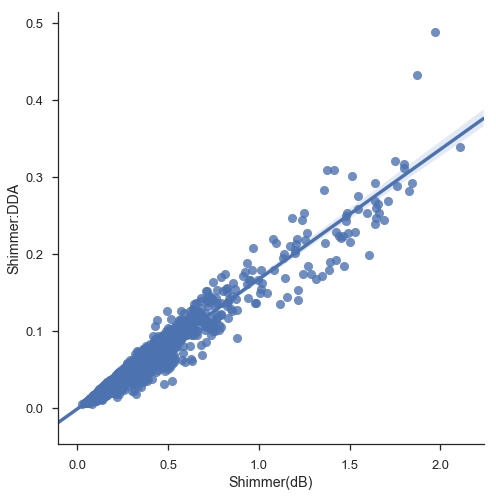

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

df1=pd.DataFrame(train_f, columns=['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'Jitter:PPQ5','Shimmer:APQ11', 'motor_UPDRS', 'age'])
g=sns.lmplot(x="Shimmer(dB)", y="Shimmer:DDA", hue="age", data=df1, palette="husl", size=7)
g=sns.lmplot(x="Shimmer(dB)", y="Shimmer:DDA", data=df1, palette="husl", size=7)
g.set_axis_labels("Shimmer(dB)", "Shimmer:DDA")


### Paired plots of each variable versus MotorUPDRS

The "Jitter" and "Shimmer" variables are not independent, the plots below show the degree of correlation among these variables, and individually, with the Motor UPDRS index.  

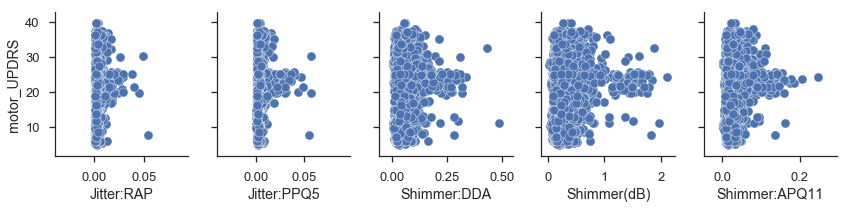

In [57]:

df2=pd.DataFrame(train_f, columns=['Jitter:RAP', 'Shimmer(dB)', 'Shimmer:DDA', 'Jitter:PPQ5','Shimmer:APQ11', 'motor_UPDRS', 'age'])
sns.pairplot(df2, x_vars=["Jitter:RAP",'Jitter:PPQ5','Shimmer:DDA', "Shimmer(dB)", 'Shimmer:APQ11'], y_vars=['motor_UPDRS'], 
             size=3, aspect=.8, kind="scatter");


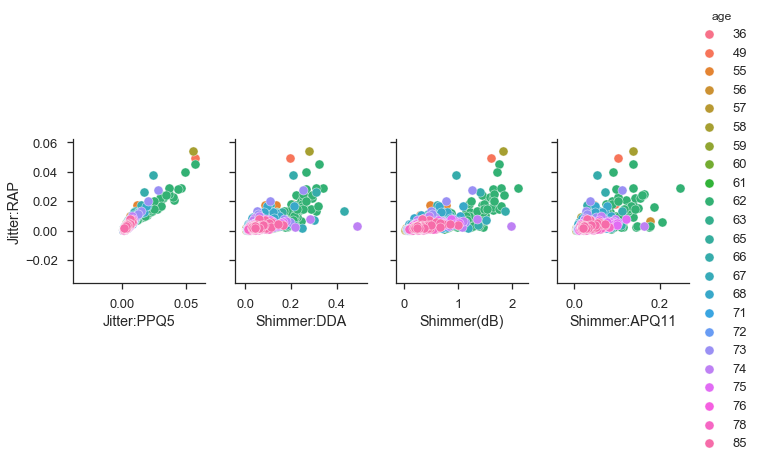

In [56]:
sns.pairplot(df2, x_vars=['Jitter:PPQ5','Shimmer:DDA', "Shimmer(dB)", 'Shimmer:APQ11'], y_vars=['Jitter:RAP'], 
             size=3, aspect=.8, kind="scatter", palette="husl", hue="age");

## Simple Neural Liner Regression Model (Similar to "Perceptron" model for binary outputs)

Below, a multiple regression model was applied to a subset of the the Parkinsons' data (training set).

No filtering was used (that is, the *f* function used was the identity function, and the model was trained to provide a 50% error between the calculated and the expected motor UPDRS index in the training set). 

In [49]:
from random import choice
from numpy import array, dot, random
import pandas as pd

# Here is the implementation with the Heaviside function.
#step_ = lambda x: 0 if x <=0 else 1

# For implementation with the sign function:
#step_ = lambda x: -1 if x < 0 else 1

training= {"JitterRAP": train_f['Jitter:RAP'], "ShimmerdB": train_f['Shimmer(dB)'], "ShimmerDDA":train_f['Shimmer:DDA'], "JitterPPQ5":train_f['Jitter:PPQ5'],"ShimmerAPQ11":train_f['Shimmer:APQ11'], "X0": 1,"motorUPDRS": train_f['motor_UPDRS']}
  
df=pd.DataFrame(training, columns=["JitterRAP", "ShimmerdB", "ShimmerDDA", "JitterPPQ5","ShimmerAPQ11","X0", "motorUPDRS"])

df.head()


JitterRAP  ShimmerdB  ShimmerDDA  JitterPPQ5  ShimmerAPQ11  X0  motorUPDRS
0    0.00064      0.091     0.01263     0.00068       0.00734   1      14.863
1    0.00388      0.626     0.09929     0.00424       0.05281   1      35.832
2    0.00132      0.163     0.02763     0.00138       0.01344   1      35.375
3    0.00291      0.302     0.04731     0.00329       0.02258   1      16.452
4    0.00411      0.468     0.08076     0.00453       0.03926   1      27.482

In [14]:
w=random.rand(6)
print("w initial=", w)
errors =[]
eta= 1/2
n=10

for i in range(n):
    for j in range(len(df)):
        x=df.iloc[j, 0:6]
        print('x=',x)
        result=dot(w,x)  # funcion de propagacion            
        print('result=', result)
        expected= df.loc[j,'motorUPDRS']
        error = expected - result         #minimizacion de error paso a paso
        print('error=',error, 'expected=', expected)
        errors.append(error)
        if error >= abs(eta*expected):  # pesos optimos se modifican en base a contener el error maximo de la prediccion 
           w+= eta*error*x            
           print('adjusted w=', w)
        i+=1
              



w initial= [ 0.21678255  0.58245915  0.88223405  0.9154806   0.48667987  0.64511992]
x= JitterRAP       0.02299
ShimmerdB       1.59300
ShimmerDDA      0.25327
JitterPPQ5      0.03993
ShimmerAPQ11    0.10275
X0              1.00000
Name: 0, dtype: float64
result= 1.88796609401
error= 23.899033906 expected= 25.787
adjusted w= [  0.49150195  19.61803966   3.9086882    1.39262481   1.71449274
  12.59463688]
x= JitterRAP       0.00199
ShimmerdB       0.28100
ShimmerDDA      0.04365
JitterPPQ5      0.00256
ShimmerAPQ11    0.03145
X0              1.00000
Name: 1, dtype: float64
result= 18.3363842643
error= -1.07738426432 expected= 17.259
x= JitterRAP       0.00272
ShimmerdB       0.21700
ShimmerDDA      0.03697
JitterPPQ5      0.00258
ShimmerAPQ11    0.01845
X0              1.00000
Name: 2, dtype: float64
result= 17.0328179324
error= 12.7641820676 expected= 29.797
x= JitterRAP       0.00171
ShimmerdB       0.16400
ShimmerDDA      0.03070
JitterPPQ5      0.00200
ShimmerAPQ11    0.01398
X0    

x= JitterRAP       0.00111
ShimmerdB       0.16500
ShimmerDDA      0.03101
JitterPPQ5      0.00122
ShimmerAPQ11    0.01342
X0              1.00000
Name: 44, dtype: float64
result= 25.6866848684
error= -10.6866848684 expected= 15.0
x= JitterRAP       0.00379
ShimmerdB       0.28100
ShimmerDDA      0.05148
JitterPPQ5      0.00367
ShimmerAPQ11    0.02216
X0              1.00000
Name: 45, dtype: float64
result= 28.2345610118
error= -10.2345610118 expected= 18.0
x= JitterRAP       0.00234
ShimmerdB       0.26100
ShimmerDDA      0.03015
JitterPPQ5      0.00359
ShimmerAPQ11    0.02292
X0              1.00000
Name: 46, dtype: float64
result= 27.7248578475
error= -12.9938578475 expected= 14.731
x= JitterRAP       0.00278
ShimmerdB       0.36800
ShimmerDDA      0.06197
JitterPPQ5      0.00474
ShimmerAPQ11    0.04189
X0              1.00000
Name: 47, dtype: float64
result= 30.1464883472
error= -0.322488347171 expected= 29.824
x= JitterRAP       0.00220
ShimmerdB       0.18700
ShimmerDDA      0.03

error= -12.6550010795 expected= 16.623
x= JitterRAP       0.00207
ShimmerdB       0.29500
ShimmerDDA      0.05126
JitterPPQ5      0.00241
ShimmerAPQ11    0.02619
X0              1.00000
Name: 82, dtype: float64
result= 28.5329852492
error= 4.72001475078 expected= 33.253
x= JitterRAP       0.00170
ShimmerdB       0.13600
ShimmerDDA      0.02468
JitterPPQ5      0.00179
ShimmerAPQ11    0.01282
X0              1.00000
Name: 83, dtype: float64
result= 25.0498346384
error= -11.8878346384 expected= 13.162
x= JitterRAP       0.00409
ShimmerdB       0.48600
ShimmerDDA      0.09616
JitterPPQ5      0.00386
ShimmerAPQ11    0.03598
X0              1.00000
Name: 84, dtype: float64
result= 32.7618234882
error= -9.43582348818 expected= 23.326
x= JitterRAP       0.00598
ShimmerdB       0.37500
ShimmerDDA      0.06646
JitterPPQ5      0.00598
ShimmerAPQ11    0.03469
X0              1.00000
Name: 85, dtype: float64
result= 30.3028771515
error= -3.58287715149 expected= 26.72
x= JitterRAP       0.00147
Shim

error= -16.1966862418 expected= 9.0906
x= JitterRAP       0.00277
ShimmerdB       0.18300
ShimmerDDA      0.03324
JitterPPQ5      0.00308
ShimmerAPQ11    0.01468
X0              1.00000
Name: 120, dtype: float64
result= 26.0806269134
error= -15.9126269134 expected= 10.168
x= JitterRAP       0.00159
ShimmerdB       0.16300
ShimmerDDA      0.02600
JitterPPQ5      0.00192
ShimmerAPQ11    0.01801
X0              1.00000
Name: 121, dtype: float64
result= 25.6332075289
error= -5.17620752892 expected= 20.457
x= JitterRAP       0.00449
ShimmerdB       0.63100
ShimmerDDA      0.10632
JitterPPQ5      0.00505
ShimmerAPQ11    0.05022
X0              1.00000
Name: 122, dtype: float64
result= 35.8839780325
error= -14.6919780325 expected= 21.192
x= JitterRAP       0.00286
ShimmerdB       0.39600
ShimmerDDA      0.06537
JitterPPQ5      0.00355
ShimmerAPQ11    0.02753
X0              1.00000
Name: 123, dtype: float64
result= 30.7222451016
error= -1.06324510162 expected= 29.659
x= JitterRAP       0.0012

x= JitterRAP       0.00296
ShimmerdB       0.16500
ShimmerDDA      0.02844
JitterPPQ5      0.00305
ShimmerAPQ11    0.01299
X0              1.00000
Name: 160, dtype: float64
result= 25.6786635184
error= -12.0546635184 expected= 13.624
x= JitterRAP       0.00279
ShimmerdB       0.29600
ShimmerDDA      0.03156
JitterPPQ5      0.00325
ShimmerAPQ11    0.02574
X0              1.00000
Name: 161, dtype: float64
result= 28.4722887579
error= -2.87428875788 expected= 25.598
x= JitterRAP       0.00372
ShimmerdB       0.34600
ShimmerDDA      0.06245
JitterPPQ5      0.00400
ShimmerAPQ11    0.03403
X0              1.00000
Name: 162, dtype: float64
result= 29.6705853254
error= -3.49358532543 expected= 26.177
x= JitterRAP       0.00253
ShimmerdB       0.29700
ShimmerDDA      0.05416
JitterPPQ5      0.00266
ShimmerAPQ11    0.02345
X0              1.00000
Name: 163, dtype: float64
result= 28.5828160515
error= -8.00681605153 expected= 20.576
x= JitterRAP       0.00206
ShimmerdB       0.22200
ShimmerDDA   

error= -10.4987888037 expected= 18.256
x= JitterRAP       0.00275
ShimmerdB       0.61800
ShimmerDDA      0.09740
JitterPPQ5      0.00315
ShimmerAPQ11    0.06578
X0              1.00000
Name: 208, dtype: float64
result= 35.5978004083
error= -8.80080040829 expected= 26.797
x= JitterRAP       0.00373
ShimmerdB       0.43500
ShimmerDDA      0.08430
JitterPPQ5      0.00282
ShimmerAPQ11    0.03455
X0              1.00000
Name: 209, dtype: float64
result= 31.6345249649
error= -15.8785249649 expected= 15.756
x= JitterRAP       0.00511
ShimmerdB       0.36200
ShimmerDDA      0.06359
JitterPPQ5      0.00488
ShimmerAPQ11    0.03560
X0              1.00000
Name: 210, dtype: float64
result= 30.0169159779
error= -3.53091597791 expected= 26.486
x= JitterRAP       0.00073
ShimmerdB       0.10300
ShimmerDDA      0.01628
JitterPPQ5      0.00093
ShimmerAPQ11    0.01051
X0              1.00000
Name: 211, dtype: float64
result= 24.3142064744
error= 3.34879352565 expected= 27.663
x= JitterRAP       0.00128

x= JitterRAP       0.00123
ShimmerdB       0.18000
ShimmerDDA      0.02809
JitterPPQ5      0.00114
ShimmerAPQ11    0.01077
X0              1.00000
Name: 253, dtype: float64
result= 25.9852857627
error= -18.5306857627 expected= 7.4546
x= JitterRAP       0.00142
ShimmerdB       0.27600
ShimmerDDA      0.04416
JitterPPQ5      0.00139
ShimmerAPQ11    0.02154
X0              1.00000
Name: 254, dtype: float64
result= 28.0931317773
error= -15.9331317773 expected= 12.16
x= JitterRAP       0.00553
ShimmerdB       0.87700
ShimmerDDA      0.08663
JitterPPQ5      0.00742
ShimmerAPQ11    0.15153
X0              1.00000
Name: 255, dtype: float64
result= 41.167475677
error= -13.486475677 expected= 27.681
x= JitterRAP       0.00135
ShimmerdB       0.11600
ShimmerDDA      0.02017
JitterPPQ5      0.00149
ShimmerAPQ11    0.01018
X0              1.00000
Name: 256, dtype: float64
result= 24.6046058192
error= 3.60839418079 expected= 28.213
x= JitterRAP       0.00170
ShimmerdB       0.15900
ShimmerDDA      0

result= 33.2552290754
error= -2.25522907539 expected= 31.0
x= JitterRAP       0.00819
ShimmerdB       0.35200
ShimmerDDA      0.05311
JitterPPQ5      0.00785
ShimmerAPQ11    0.03260
X0              1.00000
Name: 294, dtype: float64
result= 29.7628623004
error= -9.61086230035 expected= 20.152
x= JitterRAP       0.00347
ShimmerdB       0.43300
ShimmerDDA      0.07622
JitterPPQ5      0.00339
ShimmerAPQ11    0.03660
X0              1.00000
Name: 295, dtype: float64
result= 31.5630090026
error= -6.53100900256 expected= 25.032
x= JitterRAP       0.00143
ShimmerdB       0.21200
ShimmerDDA      0.03730
JitterPPQ5      0.00214
ShimmerAPQ11    0.01936
X0              1.00000
Name: 296, dtype: float64
result= 26.7145015117
error= -11.0275015117 expected= 15.687
x= JitterRAP       0.00256
ShimmerdB       0.26200
ShimmerDDA      0.04502
JitterPPQ5      0.00238
ShimmerAPQ11    0.02229
X0              1.00000
Name: 297, dtype: float64
result= 27.8054170762
error= -1.54441707622 expected= 26.261
x= Ji

error= -2.97345657088 expected= 24.268
x= JitterRAP       0.00205
ShimmerdB       0.20800
ShimmerDDA      0.04037
JitterPPQ5      0.00202
ShimmerAPQ11    0.01858
X0              1.00000
Name: 343, dtype: float64
result= 26.6418921807
error= -13.9238921807 expected= 12.718
x= JitterRAP       0.00278
ShimmerdB       0.23400
ShimmerDDA      0.04154
JitterPPQ5      0.00262
ShimmerAPQ11    0.01765
X0              1.00000
Name: 344, dtype: float64
result= 27.1935336819
error= -0.932533681856 expected= 26.261
x= JitterRAP       0.00248
ShimmerdB       0.12100
ShimmerDDA      0.02090
JitterPPQ5      0.00272
ShimmerAPQ11    0.01051
X0              1.00000
Name: 345, dtype: float64
result= 24.7158065434
error= -16.3275065434 expected= 8.3883
x= JitterRAP       0.00119
ShimmerdB       0.15000
ShimmerDDA      0.02030
JitterPPQ5      0.00140
ShimmerAPQ11    0.01319
X0              1.00000
Name: 346, dtype: float64
result= 25.3260191043
error= -19.3260191043 expected= 6.0
x= JitterRAP       0.00689


Name: 397, dtype: float64
result= 28.3366557414
error= -13.4466557414 expected= 14.89
x= JitterRAP       0.00100
ShimmerdB       0.19400
ShimmerDDA      0.03515
JitterPPQ5      0.00129
ShimmerAPQ11    0.01915
X0              1.00000
Name: 398, dtype: float64
result= 26.3248564994
error= -20.3308564994 expected= 5.994
x= JitterRAP       0.00259
ShimmerdB       0.36100
ShimmerDDA      0.06801
JitterPPQ5      0.00312
ShimmerAPQ11    0.03645
X0              1.00000
Name: 399, dtype: float64
result= 30.0121581258
error= 6.05084187417 expected= 36.063
x= JitterRAP       0.00121
ShimmerdB       0.17500
ShimmerDDA      0.02705
JitterPPQ5      0.00175
ShimmerAPQ11    0.02082
X0              1.00000
Name: 400, dtype: float64
result= 25.8948512601
error= -8.53085126011 expected= 17.364
x= JitterRAP       0.00166
ShimmerdB       0.30200
ShimmerDDA      0.03931
JitterPPQ5      0.00216
ShimmerAPQ11    0.02911
X0              1.00000
Name: 401, dtype: float64
result= 28.6350420158
error= -13.63504201

error= -17.8244177743 expected= 9.9401
x= JitterRAP       0.00164
ShimmerdB       0.11100
ShimmerDDA      0.01754
JitterPPQ5      0.00192
ShimmerAPQ11    0.00882
X0              1.00000
Name: 452, dtype: float64
result= 24.486637439
error= 7.01436256105 expected= 31.501
x= JitterRAP       0.00067
ShimmerdB       0.02600
ShimmerDDA      0.00484
JitterPPQ5      0.00097
ShimmerAPQ11    0.00249
X0              1.00000
Name: 453, dtype: float64
result= 22.6311190333
error= 5.00788096673 expected= 27.639
x= JitterRAP       0.00668
ShimmerdB       0.50500
ShimmerDDA      0.07640
JitterPPQ5      0.00686
ShimmerAPQ11    0.05161
X0              1.00000
Name: 454, dtype: float64
result= 33.1130037622
error= 3.45399623779 expected= 36.567
x= JitterRAP       0.00110
ShimmerdB       0.11200
ShimmerDDA      0.01870
JitterPPQ5      0.00126
ShimmerAPQ11    0.01196
X0              1.00000
Name: 455, dtype: float64
result= 24.5170544921
error= -18.5170544921 expected= 6.0
x= JitterRAP       0.00348
Shimm

error= -15.194916554 expected= 9.7996
x= JitterRAP       0.00285
ShimmerdB       0.25000
ShimmerDDA      0.03988
JitterPPQ5      0.00299
ShimmerAPQ11    0.02594
X0              1.00000
Name: 511, dtype: float64
result= 27.5389907211
error= 8.61400927891 expected= 36.153
x= JitterRAP       0.00191
ShimmerdB       0.28700
ShimmerDDA      0.05284
JitterPPQ5      0.00187
ShimmerAPQ11    0.02474
X0              1.00000
Name: 512, dtype: float64
result= 28.3677410499
error= 0.797258950086 expected= 29.165
x= JitterRAP       0.00432
ShimmerdB       0.15600
ShimmerDDA      0.02757
JitterPPQ5      0.00452
ShimmerAPQ11    0.01578
X0              1.00000
Name: 513, dtype: float64
result= 25.4934448302
error= 0.358555169758 expected= 25.852
x= JitterRAP       0.00174
ShimmerdB       0.13600
ShimmerDDA      0.02518
JitterPPQ5      0.00199
ShimmerAPQ11    0.01219
X0              1.00000
Name: 514, dtype: float64
result= 25.0510827476
error= -10.3910827476 expected= 14.66
x= JitterRAP       0.00198
S

Name: 572, dtype: float64
result= 25.4153379597
error= -2.45533795968 expected= 22.96
x= JitterRAP       0.00133
ShimmerdB       0.26700
ShimmerDDA      0.05122
JitterPPQ5      0.00176
ShimmerAPQ11    0.02297
X0              1.00000
Name: 573, dtype: float64
result= 27.9363465979
error= 0.789653402083 expected= 28.726
x= JitterRAP       0.00255
ShimmerdB       0.21200
ShimmerDDA      0.03058
JitterPPQ5      0.00302
ShimmerAPQ11    0.01868
X0              1.00000
Name: 574, dtype: float64
result= 26.6869401121
error= -15.9049401121 expected= 10.782
x= JitterRAP       0.00142
ShimmerdB       0.14700
ShimmerDDA      0.02508
JitterPPQ5      0.00186
ShimmerAPQ11    0.01367
X0              1.00000
Name: 575, dtype: float64
result= 25.2845296269
error= 3.40747037307 expected= 28.692
x= JitterRAP       0.00156
ShimmerdB       0.25600
ShimmerDDA      0.04808
JitterPPQ5      0.00151
ShimmerAPQ11    0.01995
X0              1.00000
Name: 576, dtype: float64
result= 27.6859490948
error= -1.92294909

result= 24.3362539846
error= 0.00874601539903 expected= 24.345
x= JitterRAP       0.00263
ShimmerdB       0.14700
ShimmerDDA      0.02830
JitterPPQ5      0.00260
ShimmerAPQ11    0.01316
X0              1.00000
Name: 622, dtype: float64
result= 25.2987402594
error= -11.9197402594 expected= 13.379
x= JitterRAP       0.00278
ShimmerdB       0.39600
ShimmerDDA      0.06968
JitterPPQ5      0.00320
ShimmerAPQ11    0.03906
X0              1.00000
Name: 623, dtype: float64
result= 30.7607547901
error= -16.9167547901 expected= 13.844
x= JitterRAP       0.00166
ShimmerdB       0.15100
ShimmerDDA      0.02592
JitterPPQ5      0.00204
ShimmerAPQ11    0.00983
X0              1.00000
Name: 624, dtype: float64
result= 25.3656159436
error= 3.2533840564 expected= 28.619
x= JitterRAP       0.00216
ShimmerdB       0.49300
ShimmerDDA      0.09335
JitterPPQ5      0.00270
ShimmerAPQ11    0.03554
X0              1.00000
Name: 625, dtype: float64
result= 32.8939690028
error= -14.4399690028 expected= 18.454
x= 

error= -11.8504330233 expected= 15.636
x= JitterRAP       0.00108
ShimmerdB       0.12500
ShimmerDDA      0.02229
JitterPPQ5      0.00134
ShimmerAPQ11    0.01189
X0              1.00000
Name: 671, dtype: float64
result= 24.8056690873
error= -16.1540690873 expected= 8.6516
x= JitterRAP       0.00245
ShimmerdB       0.14600
ShimmerDDA      0.02162
JitterPPQ5      0.00295
ShimmerAPQ11    0.01437
X0              1.00000
Name: 672, dtype: float64
result= 25.252333007
error= -0.324333007013 expected= 24.928
x= JitterRAP       0.00218
ShimmerdB       0.24400
ShimmerDDA      0.04232
JitterPPQ5      0.00191
ShimmerAPQ11    0.01660
X0              1.00000
Name: 673, dtype: float64
result= 27.404049723
error= 6.47495027697 expected= 33.879
x= JitterRAP       0.00064
ShimmerdB       0.09100
ShimmerDDA      0.01263
JitterPPQ5      0.00068
ShimmerAPQ11    0.00734
X0              1.00000
Name: 674, dtype: float64
result= 24.0401908815
error= -9.17719088149 expected= 14.863
x= JitterRAP       0.00328


error= 4.74989695106 expected= 32.71
x= JitterRAP       0.00226
ShimmerdB       0.11400
ShimmerDDA      0.01598
JitterPPQ5      0.00202
ShimmerAPQ11    0.01321
X0              1.00000
Name: 716, dtype: float64
result= 24.5516993422
error= 2.90330065775 expected= 27.455
x= JitterRAP       0.00526
ShimmerdB       0.32700
ShimmerDDA      0.05855
JitterPPQ5      0.00525
ShimmerAPQ11    0.02878
X0              1.00000
Name: 717, dtype: float64
result= 29.2473503479
error= -2.74935034786 expected= 26.498
x= JitterRAP       0.00230
ShimmerdB       0.20000
ShimmerDDA      0.02694
JitterPPQ5      0.00404
ShimmerAPQ11    0.02626
X0              1.00000
Name: 718, dtype: float64
result= 26.4342544916
error= -4.50325449165 expected= 21.931
x= JitterRAP       0.00327
ShimmerdB       0.33700
ShimmerDDA      0.06127
JitterPPQ5      0.00309
ShimmerAPQ11    0.02416
X0              1.00000
Name: 719, dtype: float64
result= 29.4567346959
error= -5.39973469587 expected= 24.057
x= JitterRAP       0.00308
S

error= -13.3960830813 expected= 19.197
x= JitterRAP       0.01851
ShimmerdB       0.67300
ShimmerDDA      0.11983
JitterPPQ5      0.01174
ShimmerAPQ11    0.03270
X0              1.00000
Name: 757, dtype: float64
result= 36.8091642348
error= -5.91716423479 expected= 30.892
x= JitterRAP       0.00165
ShimmerdB       0.09700
ShimmerDDA      0.01716
JitterPPQ5      0.00217
ShimmerAPQ11    0.01170
X0              1.00000
Name: 758, dtype: float64
result= 24.1959926677
error= 0.174007332297 expected= 24.37
x= JitterRAP       0.00220
ShimmerdB       0.50200
ShimmerDDA      0.09216
JitterPPQ5      0.00205
ShimmerAPQ11    0.03471
X0              1.00000
Name: 759, dtype: float64
result= 33.0760016701
error= -2.40600167013 expected= 30.67
x= JitterRAP       0.00068
ShimmerdB       0.12300
ShimmerDDA      0.01825
JitterPPQ5      0.00087
ShimmerAPQ11    0.01084
X0              1.00000
Name: 760, dtype: float64
result= 24.743883238
error= -10.885883238 expected= 13.858
x= JitterRAP       0.00178
Sh

error= 8.57901751093 expected= 36.709
x= JitterRAP       0.00419
ShimmerdB       0.43800
ShimmerDDA      0.07497
JitterPPQ5      0.00433
ShimmerAPQ11    0.03523
X0              1.00000
Name: 796, dtype: float64
result= 31.662206716
error= -19.880206716 expected= 11.782
x= JitterRAP       0.00813
ShimmerdB       0.33300
ShimmerDDA      0.03761
JitterPPQ5      0.00814
ShimmerAPQ11    0.03119
X0              1.00000
Name: 797, dtype: float64
result= 29.2958901157
error= -12.2958901157 expected= 17.0
x= JitterRAP       0.00180
ShimmerdB       0.12000
ShimmerDDA      0.01606
JitterPPQ5      0.00201
ShimmerAPQ11    0.01662
X0              1.00000
Name: 798, dtype: float64
result= 24.6842782876
error= 4.02772171235 expected= 28.712
x= JitterRAP       0.00270
ShimmerdB       0.20200
ShimmerDDA      0.03494
JitterPPQ5      0.00253
ShimmerAPQ11    0.01602
X0              1.00000
Name: 799, dtype: float64
result= 26.4892650321
error= -1.32426503215 expected= 25.165
x= JitterRAP       0.00366
Shim

error= 1.59906170122 expected= 27.418
x= JitterRAP       0.00207
ShimmerdB       0.14600
ShimmerDDA      0.02251
JitterPPQ5      0.00206
ShimmerAPQ11    0.01600
X0              1.00000
Name: 832, dtype: float64
result= 25.257579786
error= 1.13342021397 expected= 26.391
x= JitterRAP       0.00170
ShimmerdB       0.31000
ShimmerDDA      0.05763
JitterPPQ5      0.00165
ShimmerAPQ11    0.02392
X0              1.00000
Name: 833, dtype: float64
result= 28.8699630348
error= 0.927036965155 expected= 29.797
x= JitterRAP       0.00095
ShimmerdB       0.14200
ShimmerDDA      0.01885
JitterPPQ5      0.00098
ShimmerAPQ11    0.01186
X0              1.00000
Name: 834, dtype: float64
result= 25.1484367705
error= -15.8888367705 expected= 9.2596
x= JitterRAP       0.00185
ShimmerdB       0.23100
ShimmerDDA      0.04161
JitterPPQ5      0.00169
ShimmerAPQ11    0.01828
X0              1.00000
Name: 835, dtype: float64
result= 27.1300491553
error= 1.79395084466 expected= 28.924
x= JitterRAP       0.00276
Sh

result= 26.1643296293
error= 11.1996703707 expected= 37.364
x= JitterRAP       0.00211
ShimmerdB       0.20900
ShimmerDDA      0.03487
JitterPPQ5      0.00217
ShimmerAPQ11    0.01870
X0              1.00000
Name: 884, dtype: float64
result= 26.6403738083
error= -14.6403738083 expected= 12.0
x= JitterRAP       0.00505
ShimmerdB       0.44600
ShimmerDDA      0.07926
JitterPPQ5      0.00445
ShimmerAPQ11    0.04186
X0              1.00000
Name: 885, dtype: float64
result= 31.861224415
error= -11.142224415 expected= 20.719
x= JitterRAP       0.00264
ShimmerdB       0.18900
ShimmerDDA      0.02588
JitterPPQ5      0.00300
ShimmerAPQ11    0.02047
X0              1.00000
Name: 886, dtype: float64
result= 26.1864622135
error= 0.680537786519 expected= 26.867
x= JitterRAP       0.00591
ShimmerdB       0.79400
ShimmerDDA      0.16967
JitterPPQ5      0.00566
ShimmerAPQ11    0.05538
X0              1.00000
Name: 887, dtype: float64
result= 39.590821619
error= -22.237821619 expected= 17.353
x= JitterR

Name: 924, dtype: float64
result= 25.7174570491
error= -7.71745704906 expected= 18.0
x= JitterRAP       0.00641
ShimmerdB       0.29000
ShimmerDDA      0.05302
JitterPPQ5      0.00643
ShimmerAPQ11    0.02596
X0              1.00000
Name: 925, dtype: float64
result= 28.4425755392
error= -12.0775755392 expected= 16.365
x= JitterRAP       0.00239
ShimmerdB       0.44000
ShimmerDDA      0.06670
JitterPPQ5      0.00306
ShimmerAPQ11    0.03503
X0              1.00000
Name: 926, dtype: float64
result= 31.6666074959
error= -19.3286074959 expected= 12.338
x= JitterRAP       0.00200
ShimmerdB       0.21100
ShimmerDDA      0.03197
JitterPPQ5      0.00341
ShimmerAPQ11    0.02119
X0              1.00000
Name: 927, dtype: float64
result= 26.6765538473
error= -10.0535538473 expected= 16.623
x= JitterRAP       0.00179
ShimmerdB       0.21000
ShimmerDDA      0.02798
JitterPPQ5      0.00204
ShimmerAPQ11    0.01663
X0              1.00000
Name: 928, dtype: float64
result= 26.6284593825
error= -20.6284593

result= 38.3713102712
error= -9.97431027121 expected= 28.397
x= JitterRAP       0.00227
ShimmerdB       0.26400
ShimmerDDA      0.04507
JitterPPQ5      0.00328
ShimmerAPQ11    0.02766
X0              1.00000
Name: 984, dtype: float64
result= 27.8586218681
error= -12.7056218681 expected= 15.153
x= JitterRAP       0.00238
ShimmerdB       0.29000
ShimmerDDA      0.05233
JitterPPQ5      0.00270
ShimmerAPQ11    0.02529
X0              1.00000
Name: 985, dtype: float64
result= 28.4311576102
error= -7.05915761017 expected= 21.372
x= JitterRAP       0.00250
ShimmerdB       0.27100
ShimmerDDA      0.03845
JitterPPQ5      0.00249
ShimmerAPQ11    0.02810
X0              1.00000
Name: 986, dtype: float64
result= 27.9780403559
error= -1.55604035592 expected= 26.422
x= JitterRAP       0.00149
ShimmerdB       1.18300
ShimmerDDA      0.24683
JitterPPQ5      0.00174
ShimmerAPQ11    0.08657
X0              1.00000
Name: 987, dtype: float64
result= 48.1501352975
error= -28.8591352975 expected= 19.291
x= 

error= 1.2947374161 expected= 26.995
x= JitterRAP       0.00205
ShimmerdB       0.70700
ShimmerDDA      0.10793
JitterPPQ5      0.00259
ShimmerAPQ11    0.07275
X0              1.00000
Name: 1027, dtype: float64
result= 37.5266089212
error= -0.976608921164 expected= 36.55
x= JitterRAP       0.00425
ShimmerdB       0.35300
ShimmerDDA      0.04422
JitterPPQ5      0.00486
ShimmerAPQ11    0.03409
X0              1.00000
Name: 1028, dtype: float64
result= 29.7431848823
error= 1.67381511773 expected= 31.417
x= JitterRAP       0.00199
ShimmerdB       0.14200
ShimmerDDA      0.02160
JitterPPQ5      0.00234
ShimmerAPQ11    0.01701
X0              1.00000
Name: 1029, dtype: float64
result= 25.1717759259
error= -1.25477592591 expected= 23.917
x= JitterRAP       0.00119
ShimmerdB       0.20400
ShimmerDDA      0.03322
JitterPPQ5      0.00126
ShimmerAPQ11    0.01393
X0              1.00000
Name: 1030, dtype: float64
result= 26.5177927599
error= -2.7047927599 expected= 23.813
x= JitterRAP       0.0039

x= JitterRAP       0.00208
ShimmerdB       0.36100
ShimmerDDA      0.05802
JitterPPQ5      0.00272
ShimmerAPQ11    0.03823
X0              1.00000
Name: 1066, dtype: float64
result= 29.9727533973
error= 5.75224660272 expected= 35.725
x= JitterRAP       0.00281
ShimmerdB       0.39300
ShimmerDDA      0.07712
JitterPPQ5      0.00311
ShimmerAPQ11    0.03293
X0              1.00000
Name: 1067, dtype: float64
result= 30.7174853742
error= -0.746485374228 expected= 29.971
x= JitterRAP       0.01044
ShimmerdB       0.39500
ShimmerDDA      0.06451
JitterPPQ5      0.01018
ShimmerAPQ11    0.03408
X0              1.00000
Name: 1068, dtype: float64
result= 30.7227310714
error= -13.7227310714 expected= 17.0
x= JitterRAP       0.00438
ShimmerdB       0.42800
ShimmerDDA      0.05790
JitterPPQ5      0.00462
ShimmerAPQ11    0.03715
X0              1.00000
Name: 1069, dtype: float64
result= 31.3842761939
error= -1.72527619385 expected= 29.659
x= JitterRAP       0.00857
ShimmerdB       1.55900
ShimmerDDA 

Name: 1120, dtype: float64
result= 57.7528926957
error= -33.0628926957 expected= 24.69
x= JitterRAP       0.00099
ShimmerdB       0.26600
ShimmerDDA      0.03509
JitterPPQ5      0.00106
ShimmerAPQ11    0.02593
X0              1.00000
Name: 1121, dtype: float64
result= 27.8520025372
error= -11.0160025372 expected= 16.836
x= JitterRAP       0.00190
ShimmerdB       0.16100
ShimmerDDA      0.01566
JitterPPQ5      0.00269
ShimmerAPQ11    0.01229
X0              1.00000
Name: 1122, dtype: float64
result= 25.5386503427
error= -4.33065034272 expected= 21.208
x= JitterRAP       0.00202
ShimmerdB       0.21700
ShimmerDDA      0.03997
JitterPPQ5      0.00280
ShimmerAPQ11    0.02316
X0              1.00000
Name: 1123, dtype: float64
result= 26.8390657619
error= -1.85406576188 expected= 24.985
x= JitterRAP       0.00165
ShimmerdB       0.25400
ShimmerDDA      0.04292
JitterPPQ5      0.00202
ShimmerAPQ11    0.02055
X0              1.00000
Name: 1124, dtype: float64
result= 27.6241103712
error= -21.6

Name: 1169, dtype: float64
result= 43.6801581416
error= -17.7591581416 expected= 25.921
x= JitterRAP       0.00196
ShimmerdB       0.35200
ShimmerDDA      0.06532
JitterPPQ5      0.00232
ShimmerAPQ11    0.02902
X0              1.00000
Name: 1170, dtype: float64
result= 29.7964933555
error= -3.60649335549 expected= 26.19
x= JitterRAP       0.00440
ShimmerdB       0.16200
ShimmerDDA      0.02252
JitterPPQ5      0.00348
ShimmerAPQ11    0.01060
X0              1.00000
Name: 1171, dtype: float64
result= 25.5877246197
error= -8.5877246197 expected= 17.0
x= JitterRAP       0.00341
ShimmerdB       0.41800
ShimmerDDA      0.07479
JitterPPQ5      0.00331
ShimmerAPQ11    0.03288
X0              1.00000
Name: 1172, dtype: float64
result= 31.2343999041
error= -4.88239990411 expected= 26.352
x= JitterRAP       0.00351
ShimmerdB       0.36700
ShimmerDDA      0.06068
JitterPPQ5      0.00424
ShimmerAPQ11    0.04232
X0              1.00000
Name: 1173, dtype: float64
result= 30.120490676
error= -1.754490

result= 27.2388771749
error= 3.76112282515 expected= 31.0
x= JitterRAP       0.00220
ShimmerdB       0.19500
ShimmerDDA      0.03108
JitterPPQ5      0.00239
ShimmerAPQ11    0.01557
X0              1.00000
Name: 1212, dtype: float64
result= 26.3245052684
error= -10.8975052684 expected= 15.427
x= JitterRAP       0.00667
ShimmerdB       0.29800
ShimmerDDA      0.05338
JitterPPQ5      0.00667
ShimmerAPQ11    0.02602
X0              1.00000
Name: 1213, dtype: float64
result= 28.6130379262
error= -11.6130379262 expected= 17.0
x= JitterRAP       0.00135
ShimmerdB       0.13600
ShimmerDDA      0.02044
JitterPPQ5      0.00204
ShimmerAPQ11    0.00942
X0              1.00000
Name: 1214, dtype: float64
result= 25.026065598
error= -10.026065598 expected= 15.0
x= JitterRAP       0.00365
ShimmerdB       0.23200
ShimmerDDA      0.03622
JitterPPQ5      0.00337
ShimmerAPQ11    0.02727
X0              1.00000
Name: 1215, dtype: float64
result= 27.1481887581
error= 4.47381124195 expected= 31.622
x= Jitter

result= 24.7476909757
error= -3.04969097572 expected= 21.698
x= JitterRAP       0.00180
ShimmerdB       0.31800
ShimmerDDA      0.07053
JitterPPQ5      0.00187
ShimmerAPQ11    0.02914
X0              1.00000
Name: 1253, dtype: float64
result= 29.1022127458
error= 2.12978725416 expected= 31.232
x= JitterRAP       0.00394
ShimmerdB       0.51700
ShimmerDDA      0.09348
JitterPPQ5      0.00493
ShimmerAPQ11    0.04251
X0              1.00000
Name: 1254, dtype: float64
result= 33.4163832835
error= -13.5453832835 expected= 19.871
x= JitterRAP       0.00453
ShimmerdB       0.57700
ShimmerDDA      0.09681
JitterPPQ5      0.00423
ShimmerAPQ11    0.04390
X0              1.00000
Name: 1255, dtype: float64
result= 34.6949844712
error= -21.9359844712 expected= 12.759
x= JitterRAP       0.00182
ShimmerdB       0.30200
ShimmerDDA      0.05235
JitterPPQ5      0.00188
ShimmerAPQ11    0.02818
X0              1.00000
Name: 1256, dtype: float64
result= 28.6876270554
error= -8.1236270554 expected= 20.564
x

x= JitterRAP       0.00196
ShimmerdB       0.38200
ShimmerDDA      0.07292
JitterPPQ5      0.00242
ShimmerAPQ11    0.03591
X0              1.00000
Name: 1298, dtype: float64
result= 30.4724082531
error= -18.1144082531 expected= 12.358
x= JitterRAP       0.00467
ShimmerdB       0.50500
ShimmerDDA      0.09581
JitterPPQ5      0.00513
ShimmerAPQ11    0.04658
X0              1.00000
Name: 1299, dtype: float64
result= 33.181641113
error= -16.912641113 expected= 16.269
x= JitterRAP       0.00412
ShimmerdB       0.34600
ShimmerDDA      0.05983
JitterPPQ5      0.00383
ShimmerAPQ11    0.02620
X0              1.00000
Name: 1300, dtype: float64
result= 29.645319588
error= 5.28068041203 expected= 34.926
x= JitterRAP       0.00170
ShimmerdB       0.21400
ShimmerDDA      0.02946
JitterPPQ5      0.00179
ShimmerAPQ11    0.01651
X0              1.00000
Name: 1301, dtype: float64
result= 26.7182263117
error= 8.32477368831 expected= 35.043
x= JitterRAP       0.00196
ShimmerdB       0.17100
ShimmerDDA    

Name: 1343, dtype: float64
result= 32.3685985718
error= -6.33159857178 expected= 26.037
x= JitterRAP       0.00158
ShimmerdB       0.13500
ShimmerDDA      0.01533
JitterPPQ5      0.00232
ShimmerAPQ11    0.00879
X0              1.00000
Name: 1344, dtype: float64
result= 24.98298991
error= 7.26001008999 expected= 32.243
x= JitterRAP       0.00202
ShimmerdB       0.20100
ShimmerDDA      0.02649
JitterPPQ5      0.00278
ShimmerAPQ11    0.02364
X0              1.00000
Name: 1345, dtype: float64
result= 26.4467269339
error= -5.76472693389 expected= 20.682
x= JitterRAP       0.00193
ShimmerdB       0.19600
ShimmerDDA      0.02154
JitterPPQ5      0.00195
ShimmerAPQ11    0.02307
X0              1.00000
Name: 1346, dtype: float64
result= 26.3185151321
error= 0.548484867887 expected= 26.867
x= JitterRAP       0.00307
ShimmerdB       0.40100
ShimmerDDA      0.07486
JitterPPQ5      0.00260
ShimmerAPQ11    0.03096
X0              1.00000
Name: 1347, dtype: float64
result= 30.872224555
error= -10.3072

result= 29.2423935901
error= -17.1363935901 expected= 12.106
x= JitterRAP       0.00102
ShimmerdB       0.10300
ShimmerDDA      0.01060
JitterPPQ5      0.00137
ShimmerAPQ11    0.00594
X0              1.00000
Name: 1396, dtype: float64
result= 24.2828714395
error= -10.7148714395 expected= 13.568
x= JitterRAP       0.00958
ShimmerdB       0.57200
ShimmerDDA      0.10655
JitterPPQ5      0.00673
ShimmerAPQ11    0.04271
X0              1.00000
Name: 1397, dtype: float64
result= 34.6344533232
error= -10.3664533232 expected= 24.268
x= JitterRAP       0.00279
ShimmerdB       0.39300
ShimmerDDA      0.05562
JitterPPQ5      0.00398
ShimmerAPQ11    0.05794
X0              1.00000
Name: 1398, dtype: float64
result= 30.6742429263
error= 1.29275707369 expected= 31.967
x= JitterRAP       0.00243
ShimmerdB       0.43200
ShimmerDDA      0.04752
JitterPPQ5      0.00324
ShimmerAPQ11    0.05485
X0              1.00000
Name: 1399, dtype: float64
result= 31.4543076179
error= 0.512692382101 expected= 31.967


result= 24.4376547562
error= 7.80534524378 expected= 32.243
x= JitterRAP       0.00086
ShimmerdB       0.13200
ShimmerDDA      0.02011
JitterPPQ5      0.00095
ShimmerAPQ11    0.01213
X0              1.00000
Name: 1443, dtype: float64
result= 24.9436462871
error= -6.85064628711 expected= 18.093
x= JitterRAP       0.00376
ShimmerdB       0.17900
ShimmerDDA      0.02614
JitterPPQ5      0.00421
ShimmerAPQ11    0.01458
X0              1.00000
Name: 1444, dtype: float64
result= 25.9686296003
error= -13.9516296003 expected= 12.017
x= JitterRAP       0.00337
ShimmerdB       0.26400
ShimmerDDA      0.04794
JitterPPQ5      0.00319
ShimmerAPQ11    0.02469
X0              1.00000
Name: 1445, dtype: float64
result= 27.865660759
error= 4.74433924103 expected= 32.61
x= JitterRAP       0.00124
ShimmerdB       0.14700
ShimmerDDA      0.01914
JitterPPQ5      0.00119
ShimmerAPQ11    0.01128
X0              1.00000
Name: 1446, dtype: float64
result= 25.2542726822
error= -8.64727268219 expected= 16.607
x= 

x= JitterRAP       0.00140
ShimmerdB       0.30600
ShimmerDDA      0.05870
JitterPPQ5      0.00183
ShimmerAPQ11    0.02513
X0              1.00000
Name: 22, dtype: float64
result= 28.7925598126
error= 2.2074401874 expected= 31.0
x= JitterRAP       0.00294
ShimmerdB       0.34000
ShimmerDDA      0.06096
JitterPPQ5      0.00325
ShimmerAPQ11    0.03051
X0              1.00000
Name: 23, dtype: float64
result= 29.5302006557
error= -2.81020065572 expected= 26.72
x= JitterRAP       0.00208
ShimmerdB       0.32700
ShimmerDDA      0.05865
JitterPPQ5      0.00232
ShimmerAPQ11    0.03130
X0              1.00000
Name: 24, dtype: float64
result= 29.2466101021
error= -16.3556101021 expected= 12.891
x= JitterRAP       0.00336
ShimmerdB       0.22000
ShimmerDDA      0.04110
JitterPPQ5      0.00270
ShimmerAPQ11    0.01860
X0              1.00000
Name: 25, dtype: float64
result= 26.8991729969
error= -8.73017299694 expected= 18.169
x= JitterRAP       0.00216
ShimmerdB       0.16400
ShimmerDDA      0.0224

error= -6.0325548026 expected= 21.372
x= JitterRAP       0.00152
ShimmerdB       0.18800
ShimmerDDA      0.03549
JitterPPQ5      0.00194
ShimmerAPQ11    0.01895
X0              1.00000
Name: 73, dtype: float64
result= 26.2008150665
error= -5.36181506646 expected= 20.839
x= JitterRAP       0.00268
ShimmerdB       0.17200
ShimmerDDA      0.03328
JitterPPQ5      0.00271
ShimmerAPQ11    0.01602
X0              1.00000
Name: 74, dtype: float64
result= 25.8511515027
error= -4.1531515027 expected= 21.698
x= JitterRAP       0.00255
ShimmerdB       0.18100
ShimmerDDA      0.02890
JitterPPQ5      0.00243
ShimmerAPQ11    0.01883
X0              1.00000
Name: 75, dtype: float64
result= 26.0268938774
error= 3.68810612259 expected= 29.715
x= JitterRAP       0.00312
ShimmerdB       0.19700
ShimmerDDA      0.03104
JitterPPQ5      0.00309
ShimmerAPQ11    0.01527
X0              1.00000
Name: 76, dtype: float64
result= 26.3673402021
error= -14.4203402021 expected= 11.947
x= JitterRAP       0.00478
Shimm

error= -14.6919780325 expected= 21.192
x= JitterRAP       0.00286
ShimmerdB       0.39600
ShimmerDDA      0.06537
JitterPPQ5      0.00355
ShimmerAPQ11    0.02753
X0              1.00000
Name: 123, dtype: float64
result= 30.7222451016
error= -1.06324510162 expected= 29.659
x= JitterRAP       0.00128
ShimmerdB       0.27700
ShimmerDDA      0.04832
JitterPPQ5      0.00158
ShimmerAPQ11    0.02391
X0              1.00000
Name: 124, dtype: float64
result= 28.1361077271
error= -4.35810772714 expected= 23.778
x= JitterRAP       0.00411
ShimmerdB       0.14100
ShimmerDDA      0.02061
JitterPPQ5      0.00378
ShimmerAPQ11    0.01432
X0              1.00000
Name: 125, dtype: float64
result= 25.1447937938
error= -5.94679379382 expected= 19.198
x= JitterRAP       0.00277
ShimmerdB       0.24200
ShimmerDDA      0.03754
JitterPPQ5      0.00288
ShimmerAPQ11    0.02713
X0              1.00000
Name: 126, dtype: float64
result= 27.3627905539
error= -14.4287905539 expected= 12.934
x= JitterRAP       0.0021

error= 5.48333375772 expected= 36.391
x= JitterRAP       0.00403
ShimmerdB       0.22800
ShimmerDDA      0.04313
JitterPPQ5      0.00417
ShimmerAPQ11    0.01926
X0              1.00000
Name: 175, dtype: float64
result= 27.0796621934
error= -7.43966219345 expected= 19.64
x= JitterRAP       0.00306
ShimmerdB       0.32600
ShimmerDDA      0.02869
JitterPPQ5      0.00317
ShimmerAPQ11    0.02238
X0              1.00000
Name: 176, dtype: float64
result= 29.0855859102
error= -11.4185859102 expected= 17.667
x= JitterRAP       0.00196
ShimmerdB       0.48500
ShimmerDDA      0.08994
JitterPPQ5      0.00291
ShimmerAPQ11    0.04514
X0              1.00000
Name: 177, dtype: float64
result= 32.7289966479
error= -17.5549966479 expected= 15.174
x= JitterRAP       0.00510
ShimmerdB       0.46100
ShimmerDDA      0.07882
JitterPPQ5      0.00690
ShimmerAPQ11    0.04974
X0              1.00000
Name: 178, dtype: float64
result= 32.1929172521
error= -9.33691725212 expected= 22.856
x= JitterRAP       0.00165


error= -10.7204019769 expected= 20.27
x= JitterRAP       0.00228
ShimmerdB       0.20800
ShimmerDDA      0.03496
JitterPPQ5      0.00267
ShimmerAPQ11    0.01718
X0              1.00000
Name: 234, dtype: float64
result= 26.6177266055
error= -14.6177266055 expected= 12.0
x= JitterRAP       0.00160
ShimmerdB       0.16900
ShimmerDDA      0.02876
JitterPPQ5      0.00176
ShimmerAPQ11    0.01429
X0              1.00000
Name: 235, dtype: float64
result= 25.7640480111
error= 1.45295198891 expected= 27.217
x= JitterRAP       0.00122
ShimmerdB       0.15900
ShimmerDDA      0.02519
JitterPPQ5      0.00154
ShimmerAPQ11    0.01693
X0              1.00000
Name: 236, dtype: float64
result= 25.5429377873
error= -2.63493778729 expected= 22.908
x= JitterRAP       0.00575
ShimmerdB       0.65900
ShimmerDDA      0.11479
JitterPPQ5      0.00540
ShimmerAPQ11    0.06378
X0              1.00000
Name: 237, dtype: float64
result= 36.5345832645
error= -7.18658326446 expected= 29.348
x= JitterRAP       0.00112
Sh

result= 25.9008979928
error= -14.5958979928 expected= 11.305
x= JitterRAP       0.00369
ShimmerdB       1.20400
ShimmerDDA      0.20544
JitterPPQ5      0.00335
ShimmerAPQ11    0.11694
X0              1.00000
Name: 299, dtype: float64
result= 48.4775435529
error= -35.5365435529 expected= 12.941
x= JitterRAP       0.00170
ShimmerdB       0.30600
ShimmerDDA      0.05385
JitterPPQ5      0.00199
ShimmerAPQ11    0.02838
X0              1.00000
Name: 300, dtype: float64
result= 28.778552749
error= -10.148552749 expected= 18.63
x= JitterRAP       0.00167
ShimmerdB       0.12900
ShimmerDDA      0.02157
JitterPPQ5      0.00192
ShimmerAPQ11    0.01425
X0              1.00000
Name: 301, dtype: float64
result= 24.8922586528
error= 2.56274134721 expected= 27.455
x= JitterRAP       0.00243
ShimmerdB       0.22500
ShimmerDDA      0.03667
JitterPPQ5      0.00275
ShimmerAPQ11    0.02119
X0              1.00000
Name: 302, dtype: float64
result= 26.9901757469
error= -7.2651757469 expected= 19.725
x= Jitte

error= 4.33364914239 expected= 34.693
x= JitterRAP       0.00232
ShimmerdB       0.21300
ShimmerDDA      0.03628
JitterPPQ5      0.00251
ShimmerAPQ11    0.02004
X0              1.00000
Name: 357, dtype: float64
result= 26.7334911914
error= -12.5454911914 expected= 14.188
x= JitterRAP       0.01291
ShimmerdB       1.46500
ShimmerDDA      0.22320
JitterPPQ5      0.02193
ShimmerAPQ11    0.12339
X0              1.00000
Name: 358, dtype: float64
result= 54.0877722721
error= -34.4317722721 expected= 19.656
x= JitterRAP       0.00268
ShimmerdB       0.30100
ShimmerDDA      0.05598
JitterPPQ5      0.00310
ShimmerAPQ11    0.02754
X0              1.00000
Name: 359, dtype: float64
result= 28.6827689866
error= 6.6922310134 expected= 35.375
x= JitterRAP       0.00149
ShimmerdB       0.13000
ShimmerDDA      0.02102
JitterPPQ5      0.00120
ShimmerAPQ11    0.01238
X0              1.00000
Name: 360, dtype: float64
result= 24.9064905455
error= -8.75849054554 expected= 16.148
x= JitterRAP       0.00388
S

Name: 401, dtype: float64
result= 28.6350420158
error= -13.6350420158 expected= 15.0
x= JitterRAP       0.00205
ShimmerdB       0.22300
ShimmerDDA      0.02937
JitterPPQ5      0.00251
ShimmerAPQ11    0.01787
X0              1.00000
Name: 402, dtype: float64
result= 26.9109418463
error= -15.2969418463 expected= 11.614
x= JitterRAP       0.00093
ShimmerdB       0.14400
ShimmerDDA      0.01627
JitterPPQ5      0.00090
ShimmerAPQ11    0.00908
X0              1.00000
Name: 403, dtype: float64
result= 25.1745431535
error= 1.32645684647 expected= 26.501
x= JitterRAP       0.00176
ShimmerdB       0.47500
ShimmerDDA      0.06680
JitterPPQ5      0.00160
ShimmerAPQ11    0.06233
X0              1.00000
Name: 404, dtype: float64
result= 32.45101172
error= -8.67301171998 expected= 23.778
x= JitterRAP       0.00319
ShimmerdB       0.59800
ShimmerDDA      0.11199
JitterPPQ5      0.00304
ShimmerAPQ11    0.04773
X0              1.00000
Name: 405, dtype: float64
result= 35.2051372439
error= -7.29113724395

error= -11.3251728766 expected= 17.015
x= JitterRAP       0.00153
ShimmerdB       0.14100
ShimmerDDA      0.02544
JitterPPQ5      0.00152
ShimmerAPQ11    0.01071
X0              1.00000
Name: 444, dtype: float64
result= 25.1539408454
error= -3.63194084536 expected= 21.522
x= JitterRAP       0.00209
ShimmerdB       0.25100
ShimmerDDA      0.04317
JitterPPQ5      0.00160
ShimmerAPQ11    0.01760
X0              1.00000
Name: 445, dtype: float64
result= 27.5562752026
error= 1.25172479745 expected= 28.808
x= JitterRAP       0.02326
ShimmerdB       1.52200
ShimmerDDA      0.25374
JitterPPQ5      0.02937
ShimmerAPQ11    0.10226
X0              1.00000
Name: 446, dtype: float64
result= 55.3925730974
error= -32.3575730974 expected= 23.035
x= JitterRAP       0.00221
ShimmerdB       0.15500
ShimmerDDA      0.02829
JitterPPQ5      0.00297
ShimmerAPQ11    0.01482
X0              1.00000
Name: 447, dtype: float64
result= 25.470404954
error= -3.77140495398 expected= 21.699
x= JitterRAP       0.00192


x= JitterRAP       0.00326
ShimmerdB       0.29800
ShimmerDDA      0.05490
JitterPPQ5      0.00246
ShimmerAPQ11    0.01860
X0              1.00000
Name: 483, dtype: float64
result= 28.5982171263
error= -12.2772171263 expected= 16.321
x= JitterRAP       0.00131
ShimmerdB       0.28400
ShimmerDDA      0.05312
JitterPPQ5      0.00170
ShimmerAPQ11    0.02456
X0              1.00000
Name: 484, dtype: float64
result= 28.3048996977
error= -15.9668996977 expected= 12.338
x= JitterRAP       0.00124
ShimmerdB       0.10900
ShimmerDDA      0.01515
JitterPPQ5      0.00093
ShimmerAPQ11    0.00760
X0              1.00000
Name: 485, dtype: float64
result= 24.4307166913
error= -9.43071669127 expected= 15.0
x= JitterRAP       0.00159
ShimmerdB       0.30800
ShimmerDDA      0.05734
JitterPPQ5      0.00180
ShimmerAPQ11    0.02485
X0              1.00000
Name: 486, dtype: float64
result= 28.8285044164
error= 2.40349558356 expected= 31.232
x= JitterRAP       0.00424
ShimmerdB       0.25100
ShimmerDDA      

result= 27.6724053143
error= -8.52740531432 expected= 19.145
x= JitterRAP       0.00243
ShimmerdB       0.41900
ShimmerDDA      0.08352
JitterPPQ5      0.00243
ShimmerAPQ11    0.03498
X0              1.00000
Name: 525, dtype: float64
result= 31.2940806468
error= -12.1490806468 expected= 19.145
x= JitterRAP       0.00193
ShimmerdB       0.19100
ShimmerDDA      0.02246
JitterPPQ5      0.00227
ShimmerAPQ11    0.01162
X0              1.00000
Name: 526, dtype: float64
result= 26.1967290399
error= 1.92727096013 expected= 28.124
x= JitterRAP       0.00178
ShimmerdB       0.15500
ShimmerDDA      0.02470
JitterPPQ5      0.00215
ShimmerAPQ11    0.01353
X0              1.00000
Name: 527, dtype: float64
result= 25.4516511018
error= -17.0020511018 expected= 8.4496
x= JitterRAP       0.00212
ShimmerdB       0.32300
ShimmerDDA      0.04448
JitterPPQ5      0.00210
ShimmerAPQ11    0.02961
X0              1.00000
Name: 528, dtype: float64
result= 29.0997317138
error= -2.67973171382 expected= 26.42
x= Ji

x= JitterRAP       0.00242
ShimmerdB       0.51900
ShimmerDDA      0.09703
JitterPPQ5      0.00297
ShimmerAPQ11    0.04379
X0              1.00000
Name: 566, dtype: float64
result= 33.4721340637
error= -20.3141340637 expected= 13.158
x= JitterRAP       0.00292
ShimmerdB       0.40500
ShimmerDDA      0.07495
JitterPPQ5      0.00368
ShimmerAPQ11    0.03415
X0              1.00000
Name: 567, dtype: float64
result= 30.964045132
error= -18.602045132 expected= 12.362
x= JitterRAP       0.00235
ShimmerdB       0.27200
ShimmerDDA      0.03754
JitterPPQ5      0.00249
ShimmerAPQ11    0.03121
X0              1.00000
Name: 568, dtype: float64
result= 28.0008655341
error= -11.8618655341 expected= 16.139
x= JitterRAP       0.00173
ShimmerdB       0.64900
ShimmerDDA      0.08121
JitterPPQ5      0.00248
ShimmerAPQ11    0.07119
X0              1.00000
Name: 569, dtype: float64
result= 36.1908649439
error= -12.7438649439 expected= 23.447
x= JitterRAP       0.00190
ShimmerdB       0.29400
ShimmerDDA     

result= 28.2483657702
error= -9.39436577018 expected= 18.854
x= JitterRAP       0.00262
ShimmerdB       0.31700
ShimmerDDA      0.04382
JitterPPQ5      0.00445
ShimmerAPQ11    0.03491
X0              1.00000
Name: 608, dtype: float64
result= 28.983907306
error= -8.89190730601 expected= 20.092
x= JitterRAP       0.00275
ShimmerdB       0.33000
ShimmerDDA      0.05488
JitterPPQ5      0.00256
ShimmerAPQ11    0.03231
X0              1.00000
Name: 609, dtype: float64
result= 29.2964865195
error= -11.2034865195 expected= 18.093
x= JitterRAP       0.00126
ShimmerdB       0.19000
ShimmerDDA      0.02450
JitterPPQ5      0.00142
ShimmerAPQ11    0.01697
X0              1.00000
Name: 610, dtype: float64
result= 26.1924275338
error= 0.606572466202 expected= 26.799
x= JitterRAP       0.00260
ShimmerdB       0.41800
ShimmerDDA      0.07822
JitterPPQ5      0.00281
ShimmerAPQ11    0.02990
X0              1.00000
Name: 611, dtype: float64
result= 31.2422150456
error= -17.6682150456 expected= 13.574
x= J

result= 51.5418256526
error= -36.5398256526 expected= 15.002
x= JitterRAP       0.00185
ShimmerdB       0.63300
ShimmerDDA      0.12261
JitterPPQ5      0.00242
ShimmerAPQ11    0.05531
X0              1.00000
Name: 649, dtype: float64
result= 35.9984898135
error= -23.6404898135 expected= 12.358
x= JitterRAP       0.00300
ShimmerdB       0.16800
ShimmerDDA      0.02402
JitterPPQ5      0.00283
ShimmerAPQ11    0.02024
X0              1.00000
Name: 650, dtype: float64
result= 25.7362147252
error= -13.7362147252 expected= 12.0
x= JitterRAP       0.00586
ShimmerdB       0.39200
ShimmerDDA      0.07663
JitterPPQ5      0.00548
ShimmerAPQ11    0.03080
X0              1.00000
Name: 651, dtype: float64
result= 30.695400714
error= -4.31940071397 expected= 26.376
x= JitterRAP       0.00200
ShimmerdB       0.11900
ShimmerDDA      0.01747
JitterPPQ5      0.00186
ShimmerAPQ11    0.01284
X0              1.00000
Name: 652, dtype: float64
result= 24.6621400746
error= -0.982140074562 expected= 23.68
x= Jit

Name: 690, dtype: float64
result= 26.484937154
error= 3.23006284599 expected= 29.715
x= JitterRAP       0.00309
ShimmerdB       0.29600
ShimmerDDA      0.04063
JitterPPQ5      0.00431
ShimmerAPQ11    0.02953
X0              1.00000
Name: 691, dtype: float64
result= 28.518810188
error= -8.42781018801 expected= 20.091
x= JitterRAP       0.00178
ShimmerdB       0.24000
ShimmerDDA      0.03832
JitterPPQ5      0.00240
ShimmerAPQ11    0.02748
X0              1.00000
Name: 692, dtype: float64
result= 27.3234192083
error= -13.7274192083 expected= 13.596
x= JitterRAP       0.00236
ShimmerdB       0.19100
ShimmerDDA      0.03465
JitterPPQ5      0.00233
ShimmerAPQ11    0.01603
X0              1.00000
Name: 693, dtype: float64
result= 26.2560981198
error= -21.2183981198 expected= 5.0377
x= JitterRAP       0.00423
ShimmerdB       0.20400
ShimmerDDA      0.03480
JitterPPQ5      0.00467
ShimmerAPQ11    0.01918
X0              1.00000
Name: 694, dtype: float64
result= 26.5403234511
error= 5.3896765489

x= JitterRAP       0.00162
ShimmerdB       0.24200
ShimmerDDA      0.04466
JitterPPQ5      0.00209
ShimmerAPQ11    0.02229
X0              1.00000
Name: 732, dtype: float64
result= 27.3820844348
error= -15.3820844348 expected= 12.0
x= JitterRAP       0.00122
ShimmerdB       0.25900
ShimmerDDA      0.04764
JitterPPQ5      0.00150
ShimmerAPQ11    0.02460
X0              1.00000
Name: 733, dtype: float64
result= 27.7555298204
error= 3.24447017957 expected= 31.0
x= JitterRAP       0.00718
ShimmerdB       0.36800
ShimmerDDA      0.05448
JitterPPQ5      0.00658
ShimmerAPQ11    0.03917
X0              1.00000
Name: 734, dtype: float64
result= 30.1150103311
error= 1.58398966892 expected= 31.699
x= JitterRAP       0.00293
ShimmerdB       0.26300
ShimmerDDA      0.04171
JitterPPQ5      0.00318
ShimmerAPQ11    0.02510
X0              1.00000
Name: 735, dtype: float64
result= 27.8190405821
error= 9.12895941791 expected= 36.948
x= JitterRAP       0.00229
ShimmerdB       0.16900
ShimmerDDA      0.02

result= 29.3813835175
error= -3.67538351753 expected= 25.706
x= JitterRAP       0.00149
ShimmerdB       0.17300
ShimmerDDA      0.02922
JitterPPQ5      0.00175
ShimmerAPQ11    0.01623
X0              1.00000
Name: 777, dtype: float64
result= 25.853624769
error= -0.706624769041 expected= 25.147
x= JitterRAP       0.01027
ShimmerdB       1.20400
ShimmerDDA      0.21299
JitterPPQ5      0.01489
ShimmerAPQ11    0.09772
X0              1.00000
Name: 778, dtype: float64
result= 48.4937619302
error= -26.0447619302 expected= 22.449
x= JitterRAP       0.00057
ShimmerdB       0.11400
ShimmerDDA      0.01366
JitterPPQ5      0.00109
ShimmerAPQ11    0.01462
X0              1.00000
Name: 779, dtype: float64
result= 24.5423836541
error= -8.03238365411 expected= 16.51
x= JitterRAP       0.00346
ShimmerdB       0.33300
ShimmerDDA      0.04559
JitterPPQ5      0.00282
ShimmerAPQ11    0.03604
X0              1.00000
Name: 780, dtype: float64
result= 29.3282559354
error= 4.32674406462 expected= 33.655
x= Ji

result= 25.7984207825
error= -1.21142078247 expected= 24.587
x= JitterRAP       0.00559
ShimmerdB       0.39500
ShimmerDDA      0.06917
JitterPPQ5      0.00546
ShimmerAPQ11    0.03489
X0              1.00000
Name: 819, dtype: float64
result= 30.7345936903
error= -11.2185936903 expected= 19.516
x= JitterRAP       0.00155
ShimmerdB       0.13700
ShimmerDDA      0.02527
JitterPPQ5      0.00174
ShimmerAPQ11    0.01300
X0              1.00000
Name: 820, dtype: float64
result= 25.0735326169
error= -18.5084326169 expected= 6.5651
x= JitterRAP       0.00311
ShimmerdB       0.26700
ShimmerDDA      0.04363
JitterPPQ5      0.00328
ShimmerAPQ11    0.03388
X0              1.00000
Name: 821, dtype: float64
result= 27.9274901772
error= 3.84850982278 expected= 31.776
x= JitterRAP       0.00232
ShimmerdB       0.17000
ShimmerDDA      0.03037
JitterPPQ5      0.00222
ShimmerAPQ11    0.01632
X0              1.00000
Name: 822, dtype: float64
result= 25.7965473702
error= -10.9365473702 expected= 14.86
x= Ji

error= -14.8368246307 expected= 10.141
x= JitterRAP       0.00099
ShimmerdB       0.09900
ShimmerDDA      0.01770
JitterPPQ5      0.00111
ShimmerAPQ11    0.00928
X0              1.00000
Name: 860, dtype: float64
result= 24.2341094853
error= -14.4783094853 expected= 9.7558
x= JitterRAP       0.00271
ShimmerdB       0.32200
ShimmerDDA      0.05073
JitterPPQ5      0.00237
ShimmerAPQ11    0.02208
X0              1.00000
Name: 861, dtype: float64
result= 29.0918167873
error= -2.09681678729 expected= 26.995
x= JitterRAP       0.00183
ShimmerdB       0.29900
ShimmerDDA      0.04785
JitterPPQ5      0.00235
ShimmerAPQ11    0.02803
X0              1.00000
Name: 862, dtype: float64
result= 28.6060414208
error= -14.7210414208 expected= 13.885
x= JitterRAP       0.00144
ShimmerdB       0.41500
ShimmerDDA      0.08008
JitterPPQ5      0.00206
ShimmerAPQ11    0.03699
X0              1.00000
Name: 863, dtype: float64
result= 31.1981268429
error= -17.9071268429 expected= 13.291
x= JitterRAP       0.0008

x= JitterRAP       0.00202
ShimmerdB       0.13600
ShimmerDDA      0.02463
JitterPPQ5      0.00204
ShimmerAPQ11    0.01055
X0              1.00000
Name: 903, dtype: float64
result= 25.0460061665
error= -18.5052061665 expected= 6.5408
x= JitterRAP       0.00297
ShimmerdB       0.18800
ShimmerDDA      0.02860
JitterPPQ5      0.00290
ShimmerAPQ11    0.01814
X0              1.00000
Name: 904, dtype: float64
result= 26.1725859008
error= -16.8831859008 expected= 9.2894
x= JitterRAP       0.00290
ShimmerdB       0.24100
ShimmerDDA      0.04428
JitterPPQ5      0.00281
ShimmerAPQ11    0.02655
X0              1.00000
Name: 905, dtype: float64
result= 27.3688718602
error= -13.1808718602 expected= 14.188
x= JitterRAP       0.00252
ShimmerdB       0.32800
ShimmerDDA      0.04704
JitterPPQ5      0.00329
ShimmerAPQ11    0.02791
X0              1.00000
Name: 906, dtype: float64
result= 29.2144685725
error= 7.17653142751 expected= 36.391
x= JitterRAP       0.00135
ShimmerdB       0.10900
ShimmerDDA    

Name: 945, dtype: float64
result= 29.865509889
error= -12.597509889 expected= 17.268
x= JitterRAP       0.00090
ShimmerdB       0.13300
ShimmerDDA      0.01446
JitterPPQ5      0.00111
ShimmerAPQ11    0.01032
X0              1.00000
Name: 946, dtype: float64
result= 24.9379886942
error= -6.52098869419 expected= 18.417
x= JitterRAP       0.00181
ShimmerdB       0.20100
ShimmerDDA      0.02932
JitterPPQ5      0.00192
ShimmerAPQ11    0.01791
X0              1.00000
Name: 947, dtype: float64
result= 26.4468193879
error= -2.20481938788 expected= 24.242
x= JitterRAP       0.00125
ShimmerdB       0.15900
ShimmerDDA      0.02216
JitterPPQ5      0.00169
ShimmerAPQ11    0.01465
X0              1.00000
Name: 948, dtype: float64
result= 25.5263267376
error= -5.80132673759 expected= 19.725
x= JitterRAP       0.00378
ShimmerdB       0.37000
ShimmerDDA      0.06614
JitterPPQ5      0.00331
ShimmerAPQ11    0.03188
X0              1.00000
Name: 949, dtype: float64
result= 30.1863015622
error= -12.5913015

x= JitterRAP       0.00313
ShimmerdB       0.25400
ShimmerDDA      0.04870
JitterPPQ5      0.00269
ShimmerAPQ11    0.02478
X0              1.00000
Name: 988, dtype: float64
result= 27.6577103031
error= 6.74328969687 expected= 34.401
x= JitterRAP       0.00136
ShimmerdB       0.15100
ShimmerDDA      0.01997
JitterPPQ5      0.00180
ShimmerAPQ11    0.01868
X0              1.00000
Name: 989, dtype: float64
result= 25.3563339353
error= 1.02566606468 expected= 26.382
x= JitterRAP       0.00274
ShimmerdB       0.10500
ShimmerDDA      0.01967
JitterPPQ5      0.00247
ShimmerAPQ11    0.00894
X0              1.00000
Name: 990, dtype: float64
result= 24.3708268961
error= -4.8798268961 expected= 19.491
x= JitterRAP       0.00332
ShimmerdB       0.38100
ShimmerDDA      0.05942
JitterPPQ5      0.00441
ShimmerAPQ11    0.03984
X0              1.00000
Name: 991, dtype: float64
result= 30.4054985458
error= 6.18550145418 expected= 36.591
x= JitterRAP       0.00175
ShimmerdB       0.19900
ShimmerDDA      0

error= -2.7047927599 expected= 23.813
x= JitterRAP       0.00394
ShimmerdB       0.23100
ShimmerDDA      0.03528
JitterPPQ5      0.00341
ShimmerAPQ11    0.01653
X0              1.00000
Name: 1031, dtype: float64
result= 27.1038494348
error= -6.59084943484 expected= 20.513
x= JitterRAP       0.00182
ShimmerdB       0.23000
ShimmerDDA      0.03995
JitterPPQ5      0.00185
ShimmerAPQ11    0.01799
X0              1.00000
Name: 1032, dtype: float64
result= 27.101734718
error= 5.25226528201 expected= 32.354
x= JitterRAP       0.00181
ShimmerdB       0.13700
ShimmerDDA      0.01898
JitterPPQ5      0.00220
ShimmerAPQ11    0.01988
X0              1.00000
Name: 1033, dtype: float64
result= 25.0605109309
error= 1.15748906914 expected= 26.218
x= JitterRAP       0.00364
ShimmerdB       0.41600
ShimmerDDA      0.07610
JitterPPQ5      0.00411
ShimmerAPQ11    0.03793
X0              1.00000
Name: 1034, dtype: float64
result= 31.2082328857
error= -14.9392328857 expected= 16.269
x= JitterRAP       0.0022

x= JitterRAP       0.00275
ShimmerdB       0.15600
ShimmerDDA      0.02965
JitterPPQ5      0.00208
ShimmerAPQ11    0.01097
X0              1.00000
Name: 1073, dtype: float64
result= 25.4891536377
error= 4.43984636227 expected= 29.929
x= JitterRAP       0.00155
ShimmerdB       0.19300
ShimmerDDA      0.02688
JitterPPQ5      0.00227
ShimmerAPQ11    0.01466
X0              1.00000
Name: 1074, dtype: float64
result= 26.2626707144
error= 6.5143292856 expected= 32.777
x= JitterRAP       0.00947
ShimmerdB       0.54900
ShimmerDDA      0.07682
JitterPPQ5      0.00864
ShimmerAPQ11    0.03799
X0              1.00000
Name: 1075, dtype: float64
result= 34.0199489773
error= -15.3789489773 expected= 18.641
x= JitterRAP       0.00271
ShimmerdB       0.23600
ShimmerDDA      0.03534
JitterPPQ5      0.00423
ShimmerAPQ11    0.02406
X0              1.00000
Name: 1076, dtype: float64
result= 27.223579755
error= -0.676579755023 expected= 26.547
x= JitterRAP       0.00401
ShimmerdB       0.41700
ShimmerDDA  

result= 25.0173139152
error= 1.29168608481 expected= 26.309
x= JitterRAP       0.00103
ShimmerdB       0.06800
ShimmerDDA      0.01255
JitterPPQ5      0.00115
ShimmerAPQ11    0.00638
X0              1.00000
Name: 1116, dtype: float64
result= 23.5548894373
error= -8.55488943726 expected= 15.0
x= JitterRAP       0.00196
ShimmerdB       0.34300
ShimmerDDA      0.06521
JitterPPQ5      0.00232
ShimmerAPQ11    0.03110
X0              1.00000
Name: 1117, dtype: float64
result= 29.610398957
error= -17.119398957 expected= 12.491
x= JitterRAP       0.00404
ShimmerdB       0.28200
ShimmerDDA      0.05347
JitterPPQ5      0.00253
ShimmerAPQ11    0.01806
X0              1.00000
Name: 1118, dtype: float64
result= 28.2549918686
error= -1.83299186864 expected= 26.422
x= JitterRAP       0.00278
ShimmerdB       0.33800
ShimmerDDA      0.05745
JitterPPQ5      0.00293
ShimmerAPQ11    0.03315
X0              1.00000
Name: 1119, dtype: float64
result= 29.4776879447
error= 6.03131205532 expected= 35.509
x= Ji

Name: 1157, dtype: float64
result= 25.5059805136
error= -1.64998051358 expected= 23.856
x= JitterRAP       0.00118
ShimmerdB       0.09300
ShimmerDDA      0.01067
JitterPPQ5      0.00127
ShimmerAPQ11    0.00856
X0              1.00000
Name: 1158, dtype: float64
result= 24.0774076749
error= 5.60459232511 expected= 29.682
x= JitterRAP       0.01532
ShimmerdB       1.44400
ShimmerDDA      0.21550
JitterPPQ5      0.02219
ShimmerAPQ11    0.08064
X0              1.00000
Name: 1159, dtype: float64
result= 53.5372821283
error= -27.8482821283 expected= 25.689
x= JitterRAP       0.00269
ShimmerdB       0.22900
ShimmerDDA      0.03191
JitterPPQ5      0.00281
ShimmerAPQ11    0.02405
X0              1.00000
Name: 1160, dtype: float64
result= 27.0598614931
error= -7.18886149307 expected= 19.871
x= JitterRAP       0.00144
ShimmerdB       0.24200
ShimmerDDA      0.03896
JitterPPQ5      0.00192
ShimmerAPQ11    0.02280
X0              1.00000
Name: 1161, dtype: float64
result= 27.3588189315
error= -22.3

result= 23.5219466586
error= -1.70194665862 expected= 21.82
x= JitterRAP       0.00231
ShimmerdB       0.29100
ShimmerDDA      0.04329
JitterPPQ5      0.00321
ShimmerAPQ11    0.03245
X0              1.00000
Name: 1198, dtype: float64
result= 28.4280824376
error= 7.96291756243 expected= 36.391
x= JitterRAP       0.00139
ShimmerdB       0.22000
ShimmerDDA      0.01395
JitterPPQ5      0.00156
ShimmerAPQ11    0.01293
X0              1.00000
Name: 1199, dtype: float64
result= 26.7725726273
error= -3.46857262729 expected= 23.304
x= JitterRAP       0.00351
ShimmerdB       0.46100
ShimmerDDA      0.08472
JitterPPQ5      0.00455
ShimmerAPQ11    0.04864
X0              1.00000
Name: 1200, dtype: float64
result= 32.2114923609
error= -14.9264923609 expected= 17.285
x= JitterRAP       0.00178
ShimmerdB       0.27700
ShimmerDDA      0.05408
JitterPPQ5      0.00205
ShimmerAPQ11    0.02400
X0              1.00000
Name: 1201, dtype: float64
result= 28.1613029673
error= -9.01630296728 expected= 19.145
x

error= -8.30943693184 expected= 27.471
x= JitterRAP       0.00192
ShimmerdB       0.12600
ShimmerDDA      0.01503
JitterPPQ5      0.00203
ShimmerAPQ11    0.01042
X0              1.00000
Name: 1240, dtype: float64
result= 24.7950447063
error= -3.58704470628 expected= 21.208
x= JitterRAP       0.00359
ShimmerdB       0.30800
ShimmerDDA      0.04243
JitterPPQ5      0.00429
ShimmerAPQ11    0.03311
X0              1.00000
Name: 1241, dtype: float64
result= 28.7856555197
error= 0.389344480291 expected= 29.175
x= JitterRAP       0.00181
ShimmerdB       0.34900
ShimmerDDA      0.05286
JitterPPQ5      0.00205
ShimmerAPQ11    0.03726
X0              1.00000
Name: 1242, dtype: float64
result= 29.6957394265
error= 2.83926057353 expected= 32.535
x= JitterRAP       0.00226
ShimmerdB       0.36500
ShimmerDDA      0.04711
JitterPPQ5      0.00307
ShimmerAPQ11    0.02929
X0              1.00000
Name: 1243, dtype: float64
result= 29.9955685039
error= -5.33656850394 expected= 24.659
x= JitterRAP       0.0

x= JitterRAP       0.00175
ShimmerdB       0.18500
ShimmerDDA      0.02974
JitterPPQ5      0.00201
ShimmerAPQ11    0.02031
X0              1.00000
Name: 1283, dtype: float64
result= 26.1162945905
error= -20.1162945905 expected= 6.0
x= JitterRAP       0.01517
ShimmerdB       0.79900
ShimmerDDA      0.15108
JitterPPQ5      0.01166
ShimmerAPQ11    0.06010
X0              1.00000
Name: 1284, dtype: float64
result= 39.6399960389
error= -21.6399960389 expected= 18.0
x= JitterRAP       0.00143
ShimmerdB       0.19500
ShimmerDDA      0.04065
JitterPPQ5      0.00147
ShimmerAPQ11    0.01607
X0              1.00000
Name: 1285, dtype: float64
result= 26.3637921294
error= -14.3637921294 expected= 12.0
x= JitterRAP       0.00152
ShimmerdB       0.44300
ShimmerDDA      0.07600
JitterPPQ5      0.00222
ShimmerAPQ11    0.04831
X0              1.00000
Name: 1286, dtype: float64
result= 31.7912431891
error= 4.27175681089 expected= 36.063
x= JitterRAP       0.00211
ShimmerdB       1.16800
ShimmerDDA      0

error= 3.08883599829 expected= 34.925
x= JitterRAP       0.00329
ShimmerdB       0.14000
ShimmerDDA      0.02445
JitterPPQ5      0.00330
ShimmerAPQ11    0.01422
X0              1.00000
Name: 1324, dtype: float64
result= 25.1385470171
error= 7.47145298294 expected= 32.61
x= JitterRAP       0.00314
ShimmerdB       0.30800
ShimmerDDA      0.03939
JitterPPQ5      0.00333
ShimmerAPQ11    0.03409
X0              1.00000
Name: 1325, dtype: float64
result= 28.7731311332
error= 3.00286886685 expected= 31.776
x= JitterRAP       0.00301
ShimmerdB       0.56800
ShimmerDDA      0.09579
JitterPPQ5      0.00286
ShimmerAPQ11    0.05632
X0              1.00000
Name: 1326, dtype: float64
result= 34.5212080886
error= -3.01620808857 expected= 31.505
x= JitterRAP       0.00513
ShimmerdB       0.24600
ShimmerDDA      0.04399
JitterPPQ5      0.00461
ShimmerAPQ11    0.02225
X0              1.00000
Name: 1327, dtype: float64
result= 27.4687329039
error= -0.453732903874 expected= 27.015
x= JitterRAP       0.007

result= 30.0014119921
error= -15.7424119921 expected= 14.259
x= JitterRAP       0.00118
ShimmerdB       0.11900
ShimmerDDA      0.01940
JitterPPQ5      0.00149
ShimmerAPQ11    0.01086
X0              1.00000
Name: 1364, dtype: float64
result= 24.6656749376
error= -17.2215749376 expected= 7.4441
x= JitterRAP       0.00061
ShimmerdB       0.07600
ShimmerDDA      0.01271
JitterPPQ5      0.00068
ShimmerAPQ11    0.00655
X0              1.00000
Name: 1365, dtype: float64
result= 23.7233679492
error= -11.9103679492 expected= 11.813
x= JitterRAP       0.00294
ShimmerdB       0.43600
ShimmerDDA      0.08436
JitterPPQ5      0.00321
ShimmerAPQ11    0.03639
X0              1.00000
Name: 1366, dtype: float64
result= 31.6593220387
error= -23.1135220387 expected= 8.5458
x= JitterRAP       0.00158
ShimmerdB       0.31000
ShimmerDDA      0.05577
JitterPPQ5      0.00175
ShimmerAPQ11    0.02727
X0              1.00000
Name: 1367, dtype: float64
result= 28.8683574599
error= -4.81135745993 expected= 24.057

result= 36.8245940075
error= -11.0615940075 expected= 25.763
x= JitterRAP       0.00216
ShimmerdB       0.19200
ShimmerDDA      0.03099
JitterPPQ5      0.00230
ShimmerAPQ11    0.01872
X0              1.00000
Name: 1412, dtype: float64
result= 26.2665776897
error= -12.4085776897 expected= 13.858
x= JitterRAP       0.00115
ShimmerdB       0.14300
ShimmerDDA      0.02139
JitterPPQ5      0.00175
ShimmerAPQ11    0.01867
X0              1.00000
Name: 1413, dtype: float64
result= 25.1937078915
error= -7.24870789154 expected= 17.945
x= JitterRAP       0.00347
ShimmerdB       0.24500
ShimmerDDA      0.04082
JitterPPQ5      0.00407
ShimmerAPQ11    0.02124
X0              1.00000
Name: 1414, dtype: float64
result= 27.4309691844
error= 8.12003081565 expected= 35.551
x= JitterRAP       0.00565
ShimmerdB       0.31600
ShimmerDDA      0.05548
JitterPPQ5      0.00482
ShimmerAPQ11    0.02844
X0              1.00000
Name: 1415, dtype: float64
result= 29.0019547456
error= 4.20204525444 expected= 33.204
x

result= 26.0762868809
error= 8.90871311908 expected= 34.985
x= JitterRAP       0.00892
ShimmerdB       0.36800
ShimmerDDA      0.04153
JitterPPQ5      0.00736
ShimmerAPQ11    0.01535
X0              1.00000
Name: 1456, dtype: float64
result= 30.0193959925
error= -14.5923959925 expected= 15.427
x= JitterRAP       0.00505
ShimmerdB       0.42200
ShimmerDDA      0.05920
JitterPPQ5      0.00588
ShimmerAPQ11    0.04415
X0              1.00000
Name: 1457, dtype: float64
result= 31.2783035996
error= -10.1723035996 expected= 21.106
x= JitterRAP       0.00706
ShimmerdB       0.38800
ShimmerDDA      0.07186
JitterPPQ5      0.00636
ShimmerAPQ11    0.03476
X0              1.00000
Name: 1458, dtype: float64
result= 30.6003070263
error= -1.56230702625 expected= 29.038
x= JitterRAP       0.00326
ShimmerdB       0.53300
ShimmerDDA      0.08888
JitterPPQ5      0.00312
ShimmerAPQ11    0.04846
X0              1.00000
Name: 1459, dtype: float64
result= 33.7418153246
error= -12.7358153246 expected= 21.006


error= -1.75313726932 expected= 23.979
x= JitterRAP       0.00190
ShimmerdB       0.16900
ShimmerDDA      0.03027
JitterPPQ5      0.00205
ShimmerAPQ11    0.01533
X0              1.00000
Name: 30, dtype: float64
result= 25.7728253035
error= -13.6128253035 expected= 12.16
x= JitterRAP       0.00233
ShimmerdB       0.44200
ShimmerDDA      0.06198
JitterPPQ5      0.00315
ShimmerAPQ11    0.03338
X0              1.00000
Name: 31, dtype: float64
result= 31.6860321225
error= -14.6740321225 expected= 17.012
x= JitterRAP       0.00233
ShimmerdB       0.18800
ShimmerDDA      0.02976
JitterPPQ5      0.00259
ShimmerAPQ11    0.01614
X0              1.00000
Name: 32, dtype: float64
result= 26.1730369049
error= 8.22796309509 expected= 34.401
x= JitterRAP       0.00115
ShimmerdB       0.16000
ShimmerDDA      0.02935
JitterPPQ5      0.00128
ShimmerAPQ11    0.01560
X0              1.00000
Name: 33, dtype: float64
result= 25.5785761042
error= -11.3855761042 expected= 14.193
x= JitterRAP       0.00324
Shim

error= 3.68810612259 expected= 29.715
x= JitterRAP       0.00312
ShimmerdB       0.19700
ShimmerDDA      0.03104
JitterPPQ5      0.00309
ShimmerAPQ11    0.01527
X0              1.00000
Name: 76, dtype: float64
result= 26.3673402021
error= -14.4203402021 expected= 11.947
x= JitterRAP       0.00478
ShimmerdB       0.53700
ShimmerDDA      0.10089
JitterPPQ5      0.00403
ShimmerAPQ11    0.04471
X0              1.00000
Name: 77, dtype: float64
result= 33.8715093896
error= -25.8760093896 expected= 7.9955
x= JitterRAP       0.00276
ShimmerdB       0.29700
ShimmerDDA      0.05511
JitterPPQ5      0.00271
ShimmerAPQ11    0.02205
X0              1.00000
Name: 78, dtype: float64
result= 28.5844309153
error= 1.62156908466 expected= 30.206
x= JitterRAP       0.00154
ShimmerdB       0.33700
ShimmerDDA      0.04711
JitterPPQ5      0.00204
ShimmerAPQ11    0.03656
X0              1.00000
Name: 79, dtype: float64
result= 29.4176775445
error= -12.9826775445 expected= 16.435
x= JitterRAP       0.00141
Shim

Name: 115, dtype: float64
result= 26.1554184694
error= -19.5901184694 expected= 6.5653
x= JitterRAP       0.00206
ShimmerdB       0.44700
ShimmerDDA      0.08088
JitterPPQ5      0.00230
ShimmerAPQ11    0.04017
X0              1.00000
Name: 116, dtype: float64
result= 31.8814230263
error= -6.14042302632 expected= 25.741
x= JitterRAP       0.00373
ShimmerdB       0.25000
ShimmerDDA      0.04218
JitterPPQ5      0.00317
ShimmerAPQ11    0.01945
X0              1.00000
Name: 117, dtype: float64
result= 27.5375008733
error= -9.28150087327 expected= 18.256
x= JitterRAP       0.00181
ShimmerdB       0.23600
ShimmerDDA      0.04255
JitterPPQ5      0.00176
ShimmerAPQ11    0.02115
X0              1.00000
Name: 118, dtype: float64
result= 27.2445245871
error= -13.6085245871 expected= 13.636
x= JitterRAP       0.00110
ShimmerdB       0.14900
ShimmerDDA      0.01603
JitterPPQ5      0.00118
ShimmerAPQ11    0.01349
X0              1.00000
Name: 119, dtype: float64
result= 25.2872862418
error= -16.19668

result= 27.9670335863
error= -1.18303358634 expected= 26.784
x= JitterRAP       0.00137
ShimmerdB       0.11200
ShimmerDDA      0.01976
JitterPPQ5      0.00136
ShimmerAPQ11    0.00915
X0              1.00000
Name: 155, dtype: float64
result= 24.5166526405
error= -17.9757526405 expected= 6.5409
x= JitterRAP       0.00120
ShimmerdB       0.24700
ShimmerDDA      0.03635
JitterPPQ5      0.00167
ShimmerAPQ11    0.02880
X0              1.00000
Name: 156, dtype: float64
result= 27.4635801171
error= -21.4635801171 expected= 6.0
x= JitterRAP       0.00428
ShimmerdB       0.16800
ShimmerDDA      0.03123
JitterPPQ5      0.00371
ShimmerAPQ11    0.01505
X0              1.00000
Name: 157, dtype: float64
result= 25.758838716
error= 11.140161284 expected= 36.899
x= JitterRAP       0.00118
ShimmerdB       0.20300
ShimmerDDA      0.03648
JitterPPQ5      0.00155
ShimmerAPQ11    0.01746
X0              1.00000
Name: 158, dtype: float64
result= 26.5172268789
error= 5.2197731211 expected= 31.737
x= JitterRA

x= JitterRAP       0.00205
ShimmerdB       0.14100
ShimmerDDA      0.02034
JitterPPQ5      0.00254
ShimmerAPQ11    0.01872
X0              1.00000
Name: 196, dtype: float64
result= 25.1488809375
error= 0.246119062514 expected= 25.395
x= JitterRAP       0.00333
ShimmerdB       0.31900
ShimmerDDA      0.05056
JitterPPQ5      0.00319
ShimmerAPQ11    0.02773
X0              1.00000
Name: 197, dtype: float64
result= 29.039726277
error= -12.203726277 expected= 16.836
x= JitterRAP       0.00294
ShimmerdB       0.22500
ShimmerDDA      0.02813
JitterPPQ5      0.00340
ShimmerAPQ11    0.02177
X0              1.00000
Name: 198, dtype: float64
result= 26.9566551043
error= -1.80965510435 expected= 25.147
x= JitterRAP       0.00169
ShimmerdB       0.13800
ShimmerDDA      0.02120
JitterPPQ5      0.00197
ShimmerAPQ11    0.01355
X0              1.00000
Name: 199, dtype: float64
result= 25.078937617
error= -18.844237617 expected= 6.2347
x= JitterRAP       0.00211
ShimmerdB       0.25200
ShimmerDDA      0

result= 36.5345832645
error= -7.18658326446 expected= 29.348
x= JitterRAP       0.00112
ShimmerdB       0.30500
ShimmerDDA      0.04653
JitterPPQ5      0.00128
ShimmerAPQ11    0.03336
X0              1.00000
Name: 238, dtype: float64
result= 28.7346347283
error= -3.98063472834 expected= 24.754
x= JitterRAP       0.00269
ShimmerdB       0.18500
ShimmerDDA      0.03301
JitterPPQ5      0.00232
ShimmerAPQ11    0.01298
X0              1.00000
Name: 239, dtype: float64
result= 26.1175495374
error= -9.63154953736 expected= 16.486
x= JitterRAP       0.00492
ShimmerdB       0.42500
ShimmerDDA      0.06166
JitterPPQ5      0.00431
ShimmerAPQ11    0.04187
X0              1.00000
Name: 240, dtype: float64
result= 31.3453112257
error= 0.666688774304 expected= 32.012
x= JitterRAP       0.00141
ShimmerdB       0.20500
ShimmerDDA      0.02172
JitterPPQ5      0.00163
ShimmerAPQ11    0.01314
X0              1.00000
Name: 241, dtype: float64
result= 26.4898894422
error= -19.0458894422 expected= 7.444
x= J

x= JitterRAP       0.00341
ShimmerdB       0.52800
ShimmerDDA      0.09918
JitterPPQ5      0.00361
ShimmerAPQ11    0.04805
X0              1.00000
Name: 278, dtype: float64
result= 33.6797221723
error= -7.18872217226 expected= 26.491
x= JitterRAP       0.00923
ShimmerdB       0.52300
ShimmerDDA      0.03568
JitterPPQ5      0.00795
ShimmerAPQ11    0.02282
X0              1.00000
Name: 279, dtype: float64
result= 33.2717716121
error= -12.1647716121 expected= 21.107
x= JitterRAP       0.00196
ShimmerdB       0.18300
ShimmerDDA      0.02528
JitterPPQ5      0.00237
ShimmerAPQ11    0.01403
X0              1.00000
Name: 280, dtype: float64
result= 26.0447053166
error= 9.46529468344 expected= 35.51
x= JitterRAP       0.00374
ShimmerdB       0.24500
ShimmerDDA      0.03282
JitterPPQ5      0.00386
ShimmerAPQ11    0.02175
X0              1.00000
Name: 281, dtype: float64
result= 27.3982473219
error= 4.01875267806 expected= 31.417
x= JitterRAP       0.00193
ShimmerdB       0.21900
ShimmerDDA      

Name: 318, dtype: float64
result= 32.0157880804
error= -20.0157880804 expected= 12.0
x= JitterRAP       0.00228
ShimmerdB       0.38100
ShimmerDDA      0.06507
JitterPPQ5      0.00260
ShimmerAPQ11    0.02873
X0              1.00000
Name: 319, dtype: float64
result= 30.4058366577
error= -5.82383665767 expected= 24.582
x= JitterRAP       0.00287
ShimmerdB       0.47100
ShimmerDDA      0.08514
JitterPPQ5      0.00299
ShimmerAPQ11    0.04213
X0              1.00000
Name: 320, dtype: float64
result= 32.4093382443
error= -3.99433824432 expected= 28.415
x= JitterRAP       0.00157
ShimmerdB       0.32200
ShimmerDDA      0.06129
JitterPPQ5      0.00177
ShimmerAPQ11    0.02823
X0              1.00000
Name: 321, dtype: float64
result= 29.1458015895
error= -11.1628015895 expected= 17.983
x= JitterRAP       0.00349
ShimmerdB       0.29600
ShimmerDDA      0.04629
JitterPPQ5      0.00368
ShimmerAPQ11    0.02236
X0              1.00000
Name: 322, dtype: float64
result= 28.5287624259
error= -14.2197624

result= 24.9064905455
error= -8.75849054554 expected= 16.148
x= JitterRAP       0.00388
ShimmerdB       0.22800
ShimmerDDA      0.04183
JitterPPQ5      0.00312
ShimmerAPQ11    0.01623
X0              1.00000
Name: 361, dtype: float64
result= 27.067144625
error= 1.73985537496 expected= 28.807
x= JitterRAP       0.00073
ShimmerdB       0.09200
ShimmerDDA      0.01765
JitterPPQ5      0.00079
ShimmerAPQ11    0.00708
X0              1.00000
Name: 362, dtype: float64
result= 24.0819814207
error= 4.85601857927 expected= 28.938
x= JitterRAP       0.00271
ShimmerdB       0.49500
ShimmerDDA      0.09056
JitterPPQ5      0.00318
ShimmerAPQ11    0.04226
X0              1.00000
Name: 363, dtype: float64
result= 32.9375783156
error= -18.2145783156 expected= 14.723
x= JitterRAP       0.00164
ShimmerdB       0.16900
ShimmerDDA      0.03216
JitterPPQ5      0.00161
ShimmerAPQ11    0.01331
X0              1.00000
Name: 364, dtype: float64
result= 25.7763061683
error= 9.22069383168 expected= 34.997
x= Jitt

error= -8.53085126011 expected= 17.364
x= JitterRAP       0.00166
ShimmerdB       0.30200
ShimmerDDA      0.03931
JitterPPQ5      0.00216
ShimmerAPQ11    0.02911
X0              1.00000
Name: 401, dtype: float64
result= 28.6350420158
error= -13.6350420158 expected= 15.0
x= JitterRAP       0.00205
ShimmerdB       0.22300
ShimmerDDA      0.02937
JitterPPQ5      0.00251
ShimmerAPQ11    0.01787
X0              1.00000
Name: 402, dtype: float64
result= 26.9109418463
error= -15.2969418463 expected= 11.614
x= JitterRAP       0.00093
ShimmerdB       0.14400
ShimmerDDA      0.01627
JitterPPQ5      0.00090
ShimmerAPQ11    0.00908
X0              1.00000
Name: 403, dtype: float64
result= 25.1745431535
error= 1.32645684647 expected= 26.501
x= JitterRAP       0.00176
ShimmerdB       0.47500
ShimmerDDA      0.06680
JitterPPQ5      0.00160
ShimmerAPQ11    0.06233
X0              1.00000
Name: 404, dtype: float64
result= 32.45101172
error= -8.67301171998 expected= 23.778
x= JitterRAP       0.00319
Shi

Name: 443, dtype: float64
result= 28.3401728766
error= -11.3251728766 expected= 17.015
x= JitterRAP       0.00153
ShimmerdB       0.14100
ShimmerDDA      0.02544
JitterPPQ5      0.00152
ShimmerAPQ11    0.01071
X0              1.00000
Name: 444, dtype: float64
result= 25.1539408454
error= -3.63194084536 expected= 21.522
x= JitterRAP       0.00209
ShimmerdB       0.25100
ShimmerDDA      0.04317
JitterPPQ5      0.00160
ShimmerAPQ11    0.01760
X0              1.00000
Name: 445, dtype: float64
result= 27.5562752026
error= 1.25172479745 expected= 28.808
x= JitterRAP       0.02326
ShimmerdB       1.52200
ShimmerDDA      0.25374
JitterPPQ5      0.02937
ShimmerAPQ11    0.10226
X0              1.00000
Name: 446, dtype: float64
result= 55.3925730974
error= -32.3575730974 expected= 23.035
x= JitterRAP       0.00221
ShimmerdB       0.15500
ShimmerDDA      0.02829
JitterPPQ5      0.00297
ShimmerAPQ11    0.01482
X0              1.00000
Name: 447, dtype: float64
result= 25.470404954
error= -3.77140495

Name: 485, dtype: float64
result= 24.4307166913
error= -9.43071669127 expected= 15.0
x= JitterRAP       0.00159
ShimmerdB       0.30800
ShimmerDDA      0.05734
JitterPPQ5      0.00180
ShimmerAPQ11    0.02485
X0              1.00000
Name: 486, dtype: float64
result= 28.8285044164
error= 2.40349558356 expected= 31.232
x= JitterRAP       0.00424
ShimmerdB       0.25100
ShimmerDDA      0.03273
JitterPPQ5      0.00465
ShimmerAPQ11    0.01968
X0              1.00000
Name: 487, dtype: float64
result= 27.5217499696
error= -10.5217499696 expected= 17.0
x= JitterRAP       0.00909
ShimmerdB       0.28900
ShimmerDDA      0.04507
JitterPPQ5      0.00726
ShimmerAPQ11    0.03401
X0              1.00000
Name: 488, dtype: float64
result= 28.4054414196
error= -11.7414414196 expected= 16.664
x= JitterRAP       0.00222
ShimmerdB       0.24100
ShimmerDDA      0.04687
JitterPPQ5      0.00270
ShimmerAPQ11    0.02279
X0              1.00000
Name: 489, dtype: float64
result= 27.3723656194
error= -12.5403656194

result= 26.1967290399
error= 1.92727096013 expected= 28.124
x= JitterRAP       0.00178
ShimmerdB       0.15500
ShimmerDDA      0.02470
JitterPPQ5      0.00215
ShimmerAPQ11    0.01353
X0              1.00000
Name: 527, dtype: float64
result= 25.4516511018
error= -17.0020511018 expected= 8.4496
x= JitterRAP       0.00212
ShimmerdB       0.32300
ShimmerDDA      0.04448
JitterPPQ5      0.00210
ShimmerAPQ11    0.02961
X0              1.00000
Name: 528, dtype: float64
result= 29.0997317138
error= -2.67973171382 expected= 26.42
x= JitterRAP       0.00238
ShimmerdB       0.25500
ShimmerDDA      0.04890
JitterPPQ5      0.00300
ShimmerAPQ11    0.02231
X0              1.00000
Name: 529, dtype: float64
result= 27.6751511524
error= 5.57784884756 expected= 33.253
x= JitterRAP       0.00144
ShimmerdB       0.19600
ShimmerDDA      0.03464
JitterPPQ5      0.00210
ShimmerAPQ11    0.02178
X0              1.00000
Name: 530, dtype: float64
result= 26.370971044
error= -12.906971044 expected= 13.464
x= Jitte

result= 28.0008655341
error= -11.8618655341 expected= 16.139
x= JitterRAP       0.00173
ShimmerdB       0.64900
ShimmerDDA      0.08121
JitterPPQ5      0.00248
ShimmerAPQ11    0.07119
X0              1.00000
Name: 569, dtype: float64
result= 36.1908649439
error= -12.7438649439 expected= 23.447
x= JitterRAP       0.00190
ShimmerdB       0.29400
ShimmerDDA      0.04488
JitterPPQ5      0.00289
ShimmerAPQ11    0.03765
X0              1.00000
Name: 570, dtype: float64
result= 28.5066909002
error= 3.00430909976 expected= 31.511
x= JitterRAP       0.00292
ShimmerdB       0.20000
ShimmerDDA      0.03134
JitterPPQ5      0.00249
ShimmerAPQ11    0.02162
X0              1.00000
Name: 571, dtype: float64
result= 26.4423547547
error= -13.2673547547 expected= 13.175
x= JitterRAP       0.00316
ShimmerdB       0.15300
ShimmerDDA      0.02460
JitterPPQ5      0.00322
ShimmerAPQ11    0.01572
X0              1.00000
Name: 572, dtype: float64
result= 25.4153379597
error= -2.45533795968 expected= 22.96
x= Ji

result= 32.225442957
error= 1.563557043 expected= 33.789
x= JitterRAP       0.00096
ShimmerdB       0.13200
ShimmerDDA      0.02409
JitterPPQ5      0.00125
ShimmerAPQ11    0.01523
X0              1.00000
Name: 613, dtype: float64
result= 24.9664285189
error= 6.47857148111 expected= 31.445
x= JitterRAP       0.00080
ShimmerdB       0.09600
ShimmerDDA      0.01465
JitterPPQ5      0.00107
ShimmerAPQ11    0.01038
X0              1.00000
Name: 614, dtype: float64
result= 24.160050248
error= 3.96294975203 expected= 28.123
x= JitterRAP       0.00155
ShimmerdB       0.12600
ShimmerDDA      0.02045
JitterPPQ5      0.00148
ShimmerAPQ11    0.00883
X0              1.00000
Name: 615, dtype: float64
result= 24.813876096
error= -0.769876096019 expected= 24.044
x= JitterRAP       0.00118
ShimmerdB       0.11400
ShimmerDDA      0.02168
JitterPPQ5      0.00124
ShimmerAPQ11    0.00975
X0              1.00000
Name: 616, dtype: float64
result= 24.5676115243
error= -13.6916115243 expected= 10.876
x= JitterR

x= JitterRAP       0.00658
ShimmerdB       0.68900
ShimmerDDA      0.06847
JitterPPQ5      0.00605
ShimmerAPQ11    0.04604
X0              1.00000
Name: 657, dtype: float64
result= 36.9410997077
error= -11.4300997077 expected= 25.511
x= JitterRAP       0.00236
ShimmerdB       0.27800
ShimmerDDA      0.04935
JitterPPQ5      0.00234
ShimmerAPQ11    0.02358
X0              1.00000
Name: 658, dtype: float64
result= 28.1624866816
error= 0.377513318446 expected= 28.54
x= JitterRAP       0.00389
ShimmerdB       0.21300
ShimmerDDA      0.04048
JitterPPQ5      0.00361
ShimmerAPQ11    0.01684
X0              1.00000
Name: 659, dtype: float64
result= 26.7475959237
error= -3.31059592366 expected= 23.437
x= JitterRAP       0.00264
ShimmerdB       0.22000
ShimmerDDA      0.03534
JitterPPQ5      0.00220
ShimmerAPQ11    0.02334
X0              1.00000
Name: 660, dtype: float64
result= 26.8826205168
error= -5.56162051677 expected= 21.321
x= JitterRAP       0.00116
ShimmerdB       0.19200
ShimmerDDA    

error= -5.32332771462 expected= 25.496
x= JitterRAP       0.00231
ShimmerdB       0.22200
ShimmerDDA      0.03926
JitterPPQ5      0.00204
ShimmerAPQ11    0.01874
X0              1.00000
Name: 699, dtype: float64
result= 26.9323538941
error= -10.0633538941 expected= 16.869
x= JitterRAP       0.00208
ShimmerdB       0.15500
ShimmerDDA      0.02914
JitterPPQ5      0.00210
ShimmerAPQ11    0.01208
X0              1.00000
Name: 700, dtype: float64
result= 25.4676804938
error= -18.4689804938 expected= 6.9987
x= JitterRAP       0.00180
ShimmerdB       0.10900
ShimmerDDA      0.01690
JitterPPQ5      0.00243
ShimmerAPQ11    0.01425
X0              1.00000
Name: 701, dtype: float64
result= 24.4525543965
error= 1.85644560353 expected= 26.309
x= JitterRAP       0.00354
ShimmerdB       0.19100
ShimmerDDA      0.03222
JitterPPQ5      0.00279
ShimmerAPQ11    0.01536
X0              1.00000
Name: 702, dtype: float64
result= 26.2459535602
error= -9.24595356018 expected= 17.0
x= JitterRAP       0.00374
S

x= JitterRAP       0.00110
ShimmerdB       0.14100
ShimmerDDA      0.02228
JitterPPQ5      0.00125
ShimmerAPQ11    0.01154
X0              1.00000
Name: 742, dtype: float64
result= 25.1416237201
error= -8.34062372008 expected= 16.801
x= JitterRAP       0.00214
ShimmerdB       0.63600
ShimmerDDA      0.12812
JitterPPQ5      0.00281
ShimmerAPQ11    0.05111
X0              1.00000
Name: 743, dtype: float64
result= 36.0777460341
error= -23.0327460341 expected= 13.045
x= JitterRAP       0.00112
ShimmerdB       0.12500
ShimmerDDA      0.01869
JitterPPQ5      0.00122
ShimmerAPQ11    0.01376
X0              1.00000
Name: 744, dtype: float64
result= 24.7938547138
error= -3.47285471385 expected= 21.321
x= JitterRAP       0.00107
ShimmerdB       0.23100
ShimmerDDA      0.04143
JitterPPQ5      0.00145
ShimmerAPQ11    0.02564
X0              1.00000
Name: 745, dtype: float64
result= 27.141965281
error= -2.70296528096 expected= 24.439
x= JitterRAP       0.00320
ShimmerdB       0.49200
ShimmerDDA    

error= -2.35048671893 expected= 22.627
x= JitterRAP       0.00187
ShimmerdB       0.21400
ShimmerDDA      0.04119
JitterPPQ5      0.00199
ShimmerAPQ11    0.01926
X0              1.00000
Name: 784, dtype: float64
result= 26.7727112262
error= -16.4917112262 expected= 10.281
x= JitterRAP       0.01542
ShimmerdB       0.54400
ShimmerDDA      0.11005
JitterPPQ5      0.01145
ShimmerAPQ11    0.04126
X0              1.00000
Name: 785, dtype: float64
result= 34.0667771958
error= -8.36077719577 expected= 25.706
x= JitterRAP       0.00170
ShimmerdB       0.38000
ShimmerDDA      0.07286
JitterPPQ5      0.00208
ShimmerAPQ11    0.03543
X0              1.00000
Name: 786, dtype: float64
result= 30.4285773923
error= -4.87657739234 expected= 25.552
x= JitterRAP       0.00227
ShimmerdB       0.20100
ShimmerDDA      0.03140
JitterPPQ5      0.00239
ShimmerAPQ11    0.01899
X0              1.00000
Name: 787, dtype: float64
result= 26.4583910113
error= -16.8429910113 expected= 9.6154
x= JitterRAP       0.0042

error= -8.12640233299 expected= 23.304
x= JitterRAP       0.00142
ShimmerdB       0.27500
ShimmerDDA      0.04379
JitterPPQ5      0.00179
ShimmerAPQ11    0.02457
X0              1.00000
Name: 825, dtype: float64
result= 28.0766183358
error= -11.0646183358 expected= 17.012
x= JitterRAP       0.00193
ShimmerdB       0.29700
ShimmerDDA      0.04982
JitterPPQ5      0.00229
ShimmerAPQ11    0.02679
X0              1.00000
Name: 826, dtype: float64
result= 28.5699028892
error= 2.87509711077 expected= 31.445
x= JitterRAP       0.00223
ShimmerdB       0.26600
ShimmerDDA      0.03715
JitterPPQ5      0.00205
ShimmerAPQ11    0.02825
X0              1.00000
Name: 827, dtype: float64
result= 27.8668788506
error= -11.7678788506 expected= 16.099
x= JitterRAP       0.00117
ShimmerdB       0.11000
ShimmerDDA      0.01877
JitterPPQ5      0.00138
ShimmerAPQ11    0.01139
X0              1.00000
Name: 828, dtype: float64
result= 24.4744203428
error= -9.47442034277 expected= 15.0
x= JitterRAP       0.00272
S

result= 46.374923999
error= -15.597923999 expected= 30.777
x= JitterRAP       0.00186
ShimmerdB       0.18900
ShimmerDDA      0.03415
JitterPPQ5      0.00149
ShimmerAPQ11    0.01708
X0              1.00000
Name: 867, dtype: float64
result= 26.2123848552
error= -7.89038485516 expected= 18.322
x= JitterRAP       0.00463
ShimmerdB       0.81600
ShimmerDDA      0.17387
JitterPPQ5      0.00407
ShimmerAPQ11    0.05434
X0              1.00000
Name: 868, dtype: float64
result= 40.0666501839
error= -16.2536501839 expected= 23.813
x= JitterRAP       0.00119
ShimmerdB       0.26700
ShimmerDDA      0.04830
JitterPPQ5      0.00147
ShimmerAPQ11    0.02515
X0              1.00000
Name: 869, dtype: float64
result= 27.9276124197
error= -0.509612419704 expected= 27.418
x= JitterRAP       0.00323
ShimmerdB       0.22200
ShimmerDDA      0.03423
JitterPPQ5      0.00289
ShimmerAPQ11    0.01749
X0              1.00000
Name: 870, dtype: float64
result= 26.9106854754
error= 4.53431452457 expected= 31.445
x= Ji

error= -4.68334780791 expected= 25.763
x= JitterRAP       0.00241
ShimmerdB       0.46800
ShimmerDDA      0.09019
JitterPPQ5      0.00290
ShimmerAPQ11    0.03859
X0              1.00000
Name: 910, dtype: float64
result= 32.3605309283
error= -18.7645309283 expected= 13.596
x= JitterRAP       0.00197
ShimmerdB       0.28700
ShimmerDDA      0.05050
JitterPPQ5      0.00230
ShimmerAPQ11    0.02614
X0              1.00000
Name: 911, dtype: float64
result= 28.3611311513
error= -11.4921311513 expected= 16.869
x= JitterRAP       0.00246
ShimmerdB       0.46500
ShimmerDDA      0.08205
JitterPPQ5      0.00287
ShimmerAPQ11    0.03998
X0              1.00000
Name: 912, dtype: float64
result= 32.2658267518
error= -8.40282675176 expected= 23.863
x= JitterRAP       0.00178
ShimmerdB       0.33800
ShimmerDDA      0.05194
JitterPPQ5      0.00187
ShimmerAPQ11    0.03348
X0              1.00000
Name: 913, dtype: float64
result= 29.4532181359
error= -4.79421813587 expected= 24.659
x= JitterRAP       0.0140

error= -14.120887586 expected= 15.788
x= JitterRAP       0.01003
ShimmerdB       0.30400
ShimmerDDA      0.06467
JitterPPQ5      0.00674
ShimmerAPQ11    0.02293
X0              1.00000
Name: 953, dtype: float64
result= 28.7827658963
error= -22.7827658963 expected= 6.0
x= JitterRAP       0.00233
ShimmerdB       0.21100
ShimmerDDA      0.03540
JitterPPQ5      0.00250
ShimmerAPQ11    0.01784
X0              1.00000
Name: 954, dtype: float64
result= 26.6836972994
error= -6.11969729937 expected= 20.564
x= JitterRAP       0.00122
ShimmerdB       0.04500
ShimmerDDA      0.00797
JitterPPQ5      0.00149
ShimmerAPQ11    0.00403
X0              1.00000
Name: 955, dtype: float64
result= 23.0479319937
error= 4.59106800632 expected= 27.639
x= JitterRAP       0.00314
ShimmerdB       0.31400
ShimmerDDA      0.05061
JitterPPQ5      0.00469
ShimmerAPQ11    0.03488
X0              1.00000
Name: 956, dtype: float64
result= 28.9497413065
error= -4.25074130651 expected= 24.699
x= JitterRAP       0.00382
Shi

error= -11.4412922308 expected= 15.0
x= JitterRAP       0.00318
ShimmerdB       0.18300
ShimmerDDA      0.02716
JitterPPQ5      0.00298
ShimmerAPQ11    0.01445
X0              1.00000
Name: 993, dtype: float64
result= 26.0548216873
error= -9.05482168731 expected= 17.0
x= JitterRAP       0.00327
ShimmerdB       0.47500
ShimmerDDA      0.07563
JitterPPQ5      0.00350
ShimmerAPQ11    0.04524
X0              1.00000
Name: 994, dtype: float64
result= 32.4602989712
error= -6.96429897123 expected= 25.496
x= JitterRAP       0.00380
ShimmerdB       0.18100
ShimmerDDA      0.02774
JitterPPQ5      0.00291
ShimmerAPQ11    0.01581
X0              1.00000
Name: 995, dtype: float64
result= 26.0178498895
error= 7.62515011048 expected= 33.643
x= JitterRAP       0.00297
ShimmerdB       0.31400
ShimmerDDA      0.05092
JitterPPQ5      0.00267
ShimmerAPQ11    0.02113
X0              1.00000
Name: 996, dtype: float64
result= 28.9230618523
error= -13.4380618523 expected= 15.485
x= JitterRAP       0.00191
Shi

x= JitterRAP       0.00364
ShimmerdB       0.41600
ShimmerDDA      0.07610
JitterPPQ5      0.00411
ShimmerAPQ11    0.03793
X0              1.00000
Name: 1034, dtype: float64
result= 31.2082328857
error= -14.9392328857 expected= 16.269
x= JitterRAP       0.00228
ShimmerdB       0.19900
ShimmerDDA      0.03150
JitterPPQ5      0.00213
ShimmerAPQ11    0.01618
X0              1.00000
Name: 1035, dtype: float64
result= 26.4112364796
error= -18.7947364796 expected= 7.6165
x= JitterRAP       0.00109
ShimmerdB       0.08200
ShimmerDDA      0.01141
JitterPPQ5      0.00140
ShimmerAPQ11    0.00647
X0              1.00000
Name: 1036, dtype: float64
result= 23.8453205009
error= -6.51132050091 expected= 17.334
x= JitterRAP       0.00184
ShimmerdB       0.16400
ShimmerDDA      0.02262
JitterPPQ5      0.00167
ShimmerAPQ11    0.01264
X0              1.00000
Name: 1037, dtype: float64
result= 25.6300983115
error= -20.5923983115 expected= 5.0377
x= JitterRAP       0.00199
ShimmerdB       0.22800
ShimmerDD

Name: 1075, dtype: float64
result= 34.0199489773
error= -15.3789489773 expected= 18.641
x= JitterRAP       0.00271
ShimmerdB       0.23600
ShimmerDDA      0.03534
JitterPPQ5      0.00423
ShimmerAPQ11    0.02406
X0              1.00000
Name: 1076, dtype: float64
result= 27.223579755
error= -0.676579755023 expected= 26.547
x= JitterRAP       0.00401
ShimmerdB       0.41700
ShimmerDDA      0.06349
JitterPPQ5      0.00475
ShimmerAPQ11    0.03292
X0              1.00000
Name: 1077, dtype: float64
result= 31.1684534802
error= -17.2824534802 expected= 13.886
x= JitterRAP       0.00101
ShimmerdB       0.15400
ShimmerDDA      0.02435
JitterPPQ5      0.00143
ShimmerAPQ11    0.01624
X0              1.00000
Name: 1078, dtype: float64
result= 25.4326678857
error= -13.5526678857 expected= 11.88
x= JitterRAP       0.00324
ShimmerdB       0.19900
ShimmerDDA      0.03825
JitterPPQ5      0.00355
ShimmerAPQ11    0.02035
X0              1.00000
Name: 1079, dtype: float64
result= 26.4495806596
error= 5.249

x= JitterRAP       0.00103
ShimmerdB       0.06800
ShimmerDDA      0.01255
JitterPPQ5      0.00115
ShimmerAPQ11    0.00638
X0              1.00000
Name: 1116, dtype: float64
result= 23.5548894373
error= -8.55488943726 expected= 15.0
x= JitterRAP       0.00196
ShimmerdB       0.34300
ShimmerDDA      0.06521
JitterPPQ5      0.00232
ShimmerAPQ11    0.03110
X0              1.00000
Name: 1117, dtype: float64
result= 29.610398957
error= -17.119398957 expected= 12.491
x= JitterRAP       0.00404
ShimmerdB       0.28200
ShimmerDDA      0.05347
JitterPPQ5      0.00253
ShimmerAPQ11    0.01806
X0              1.00000
Name: 1118, dtype: float64
result= 28.2549918686
error= -1.83299186864 expected= 26.422
x= JitterRAP       0.00278
ShimmerdB       0.33800
ShimmerDDA      0.05745
JitterPPQ5      0.00293
ShimmerAPQ11    0.03315
X0              1.00000
Name: 1119, dtype: float64
result= 29.4776879447
error= 6.03131205532 expected= 35.509
x= JitterRAP       0.01395
ShimmerdB       1.63700
ShimmerDDA    

x= JitterRAP       0.00118
ShimmerdB       0.09300
ShimmerDDA      0.01067
JitterPPQ5      0.00127
ShimmerAPQ11    0.00856
X0              1.00000
Name: 1158, dtype: float64
result= 24.0774076749
error= 5.60459232511 expected= 29.682
x= JitterRAP       0.01532
ShimmerdB       1.44400
ShimmerDDA      0.21550
JitterPPQ5      0.02219
ShimmerAPQ11    0.08064
X0              1.00000
Name: 1159, dtype: float64
result= 53.5372821283
error= -27.8482821283 expected= 25.689
x= JitterRAP       0.00269
ShimmerdB       0.22900
ShimmerDDA      0.03191
JitterPPQ5      0.00281
ShimmerAPQ11    0.02405
X0              1.00000
Name: 1160, dtype: float64
result= 27.0598614931
error= -7.18886149307 expected= 19.871
x= JitterRAP       0.00144
ShimmerdB       0.24200
ShimmerDDA      0.03896
JitterPPQ5      0.00192
ShimmerAPQ11    0.02280
X0              1.00000
Name: 1161, dtype: float64
result= 27.3588189315
error= -22.3210189315 expected= 5.0378
x= JitterRAP       0.00310
ShimmerdB       0.20300
ShimmerDDA

x= JitterRAP       0.00351
ShimmerdB       0.46100
ShimmerDDA      0.08472
JitterPPQ5      0.00455
ShimmerAPQ11    0.04864
X0              1.00000
Name: 1200, dtype: float64
result= 32.2114923609
error= -14.9264923609 expected= 17.285
x= JitterRAP       0.00178
ShimmerdB       0.27700
ShimmerDDA      0.05408
JitterPPQ5      0.00205
ShimmerAPQ11    0.02400
X0              1.00000
Name: 1201, dtype: float64
result= 28.1613029673
error= -9.01630296728 expected= 19.145
x= JitterRAP       0.00378
ShimmerdB       0.41100
ShimmerDDA      0.07274
JitterPPQ5      0.00469
ShimmerAPQ11    0.03488
X0              1.00000
Name: 1202, dtype: float64
result= 31.0842654183
error= -3.97626541826 expected= 27.108
x= JitterRAP       0.00331
ShimmerdB       0.33900
ShimmerDDA      0.04871
JitterPPQ5      0.00461
ShimmerAPQ11    0.03272
X0              1.00000
Name: 1203, dtype: float64
result= 29.4639995003
error= -14.2299995003 expected= 15.234
x= JitterRAP       0.00203
ShimmerdB       0.23400
ShimmerDD

Name: 1242, dtype: float64
result= 29.6957394265
error= 2.83926057353 expected= 32.535
x= JitterRAP       0.00226
ShimmerdB       0.36500
ShimmerDDA      0.04711
JitterPPQ5      0.00307
ShimmerAPQ11    0.02929
X0              1.00000
Name: 1243, dtype: float64
result= 29.9955685039
error= -5.33656850394 expected= 24.659
x= JitterRAP       0.00275
ShimmerdB       0.26700
ShimmerDDA      0.04007
JitterPPQ5      0.00324
ShimmerAPQ11    0.03285
X0              1.00000
Name: 1244, dtype: float64
result= 27.9104706226
error= 10.0465293774 expected= 37.957
x= JitterRAP       0.00188
ShimmerdB       0.41000
ShimmerDDA      0.07239
JitterPPQ5      0.00236
ShimmerAPQ11    0.03958
X0              1.00000
Name: 1245, dtype: float64
result= 31.0660620223
error= -18.1750620223 expected= 12.891
x= JitterRAP       0.00196
ShimmerdB       0.47000
ShimmerDDA      0.08132
JitterPPQ5      0.00202
ShimmerAPQ11    0.04330
X0              1.00000
Name: 1246, dtype: float64
result= 32.3725993159
error= -24.05

error= -3.65130913958 expected= 24.388
x= JitterRAP       0.00175
ShimmerdB       0.18500
ShimmerDDA      0.02974
JitterPPQ5      0.00201
ShimmerAPQ11    0.02031
X0              1.00000
Name: 1283, dtype: float64
result= 26.1162945905
error= -20.1162945905 expected= 6.0
x= JitterRAP       0.01517
ShimmerdB       0.79900
ShimmerDDA      0.15108
JitterPPQ5      0.01166
ShimmerAPQ11    0.06010
X0              1.00000
Name: 1284, dtype: float64
result= 39.6399960389
error= -21.6399960389 expected= 18.0
x= JitterRAP       0.00143
ShimmerdB       0.19500
ShimmerDDA      0.04065
JitterPPQ5      0.00147
ShimmerAPQ11    0.01607
X0              1.00000
Name: 1285, dtype: float64
result= 26.3637921294
error= -14.3637921294 expected= 12.0
x= JitterRAP       0.00152
ShimmerdB       0.44300
ShimmerDDA      0.07600
JitterPPQ5      0.00222
ShimmerAPQ11    0.04831
X0              1.00000
Name: 1286, dtype: float64
result= 31.7912431891
error= 4.27175681089 expected= 36.063
x= JitterRAP       0.00211
Sh

Name: 1324, dtype: float64
result= 25.1385470171
error= 7.47145298294 expected= 32.61
x= JitterRAP       0.00314
ShimmerdB       0.30800
ShimmerDDA      0.03939
JitterPPQ5      0.00333
ShimmerAPQ11    0.03409
X0              1.00000
Name: 1325, dtype: float64
result= 28.7731311332
error= 3.00286886685 expected= 31.776
x= JitterRAP       0.00301
ShimmerdB       0.56800
ShimmerDDA      0.09579
JitterPPQ5      0.00286
ShimmerAPQ11    0.05632
X0              1.00000
Name: 1326, dtype: float64
result= 34.5212080886
error= -3.01620808857 expected= 31.505
x= JitterRAP       0.00513
ShimmerdB       0.24600
ShimmerDDA      0.04399
JitterPPQ5      0.00461
ShimmerAPQ11    0.02225
X0              1.00000
Name: 1327, dtype: float64
result= 27.4687329039
error= -0.453732903874 expected= 27.015
x= JitterRAP       0.00700
ShimmerdB       0.38400
ShimmerDDA      0.07813
JitterPPQ5      0.00625
ShimmerAPQ11    0.03325
X0              1.00000
Name: 1328, dtype: float64
result= 30.5394330089
error= -4.833

error= -11.0139934613 expected= 15.0
x= JitterRAP       0.00156
ShimmerdB       0.20000
ShimmerDDA      0.03633
JitterPPQ5      0.00190
ShimmerAPQ11    0.02093
X0              1.00000
Name: 1362, dtype: float64
result= 26.4604649271
error= 4.78253507292 expected= 31.243
x= JitterRAP       0.00256
ShimmerdB       0.36100
ShimmerDDA      0.06697
JitterPPQ5      0.00286
ShimmerAPQ11    0.03315
X0              1.00000
Name: 1363, dtype: float64
result= 30.0014119921
error= -15.7424119921 expected= 14.259
x= JitterRAP       0.00118
ShimmerdB       0.11900
ShimmerDDA      0.01940
JitterPPQ5      0.00149
ShimmerAPQ11    0.01086
X0              1.00000
Name: 1364, dtype: float64
result= 24.6656749376
error= -17.2215749376 expected= 7.4441
x= JitterRAP       0.00061
ShimmerdB       0.07600
ShimmerDDA      0.01271
JitterPPQ5      0.00068
ShimmerAPQ11    0.00655
X0              1.00000
Name: 1365, dtype: float64
result= 23.7233679492
error= -11.9103679492 expected= 11.813
x= JitterRAP       0.002

x= JitterRAP       0.00404
ShimmerdB       0.20000
ShimmerDDA      0.03468
JitterPPQ5      0.00385
ShimmerAPQ11    0.01697
X0              1.00000
Name: 1401, dtype: float64
result= 26.4503556598
error= -2.13935565978 expected= 24.311
x= JitterRAP       0.00660
ShimmerdB       0.33900
ShimmerDDA      0.05782
JitterPPQ5      0.00498
ShimmerAPQ11    0.02371
X0              1.00000
Name: 1402, dtype: float64
result= 29.4879243894
error= 1.40407561064 expected= 30.892
x= JitterRAP       0.00221
ShimmerdB       0.21800
ShimmerDDA      0.03356
JitterPPQ5      0.00235
ShimmerAPQ11    0.02494
X0              1.00000
Name: 1403, dtype: float64
result= 26.8359814284
error= 8.74301857161 expected= 35.579
x= JitterRAP       0.00152
ShimmerdB       0.32500
ShimmerDDA      0.05707
JitterPPQ5      0.00169
ShimmerAPQ11    0.02608
X0              1.00000
Name: 1404, dtype: float64
result= 29.1872211729
error= -10.4852211729 expected= 18.702
x= JitterRAP       0.00278
ShimmerdB       0.46100
ShimmerDDA 

x= JitterRAP       0.00143
ShimmerdB       0.20300
ShimmerDDA      0.03938
JitterPPQ5      0.00152
ShimmerAPQ11    0.01870
X0              1.00000
Name: 1438, dtype: float64
result= 26.531711156
error= -1.87271115602 expected= 24.659
x= JitterRAP       0.00324
ShimmerdB       0.17800
ShimmerDDA      0.03095
JitterPPQ5      0.00269
ShimmerAPQ11    0.01583
X0              1.00000
Name: 1439, dtype: float64
result= 25.9675891646
error= 0.985410835406 expected= 26.953
x= JitterRAP       0.00181
ShimmerdB       0.43400
ShimmerDDA      0.06074
JitterPPQ5      0.00225
ShimmerAPQ11    0.04412
X0              1.00000
Name: 1440, dtype: float64
result= 31.5304932453
error= 5.02550675473 expected= 36.556
x= JitterRAP       0.00222
ShimmerdB       0.20100
ShimmerDDA      0.03434
JitterPPQ5      0.00251
ShimmerAPQ11    0.01799
X0              1.00000
Name: 1441, dtype: float64
result= 26.4690217506
error= -12.8950217506 expected= 13.574
x= JitterRAP       0.00119
ShimmerdB       0.10900
ShimmerDDA 

error= -15.4153831794 expected= 11.117
x= JitterRAP       0.00147
ShimmerdB       0.27400
ShimmerDDA      0.05000
JitterPPQ5      0.00207
ShimmerAPQ11    0.02287
X0              1.00000
Name: 11, dtype: float64
result= 28.0788935699
error= 2.92110643012 expected= 31.0
x= JitterRAP       0.00215
ShimmerdB       0.17700
ShimmerDDA      0.02399
JitterPPQ5      0.00189
ShimmerAPQ11    0.02270
X0              1.00000
Name: 12, dtype: float64
result= 25.9282341827
error= 0.870765817328 expected= 26.799
x= JitterRAP       0.00939
ShimmerdB       1.49300
ShimmerDDA      0.22769
JitterPPQ5      0.01626
ShimmerAPQ11    0.13805
X0              1.00000
Name: 13, dtype: float64
result= 54.7127998895
error= -30.3007998895 expected= 24.412
x= JitterRAP       0.00492
ShimmerdB       0.47800
ShimmerDDA      0.09035
JitterPPQ5      0.00543
ShimmerAPQ11    0.04102
X0              1.00000
Name: 14, dtype: float64
result= 32.5809395611
error= -24.4294395611 expected= 8.1515
x= JitterRAP       0.00239
Shimm

x= JitterRAP       0.00184
ShimmerdB       0.43500
ShimmerDDA      0.08589
JitterPPQ5      0.00235
ShimmerAPQ11    0.03567
X0              1.00000
Name: 53, dtype: float64
result= 31.6415970243
error= -23.6460970243 expected= 7.9955
x= JitterRAP       0.00239
ShimmerdB       0.17800
ShimmerDDA      0.02600
JitterPPQ5      0.00251
ShimmerAPQ11    0.01059
X0              1.00000
Name: 54, dtype: float64
result= 25.9366358471
error= -10.9366358471 expected= 15.0
x= JitterRAP       0.00153
ShimmerdB       0.22400
ShimmerDDA      0.03902
JitterPPQ5      0.00209
ShimmerAPQ11    0.02827
X0              1.00000
Name: 55, dtype: float64
result= 26.9904737414
error= -13.1054737414 expected= 13.885
x= JitterRAP       0.00204
ShimmerdB       0.43800
ShimmerDDA      0.11434
JitterPPQ5      0.00177
ShimmerAPQ11    0.03943
X0              1.00000
Name: 56, dtype: float64
result= 31.8299764875
error= -9.09397648745 expected= 22.736
x= JitterRAP       0.00145
ShimmerdB       0.13500
ShimmerDDA      0.0

x= JitterRAP       0.00392
ShimmerdB       0.14000
ShimmerDDA      0.02043
JitterPPQ5      0.00344
ShimmerAPQ11    0.01476
X0              1.00000
Name: 95, dtype: float64
result= 25.1232187121
error= -14.6732187121 expected= 10.45
x= JitterRAP       0.00299
ShimmerdB       0.38400
ShimmerDDA      0.07573
JitterPPQ5      0.00341
ShimmerAPQ11    0.03206
X0              1.00000
Name: 96, dtype: float64
result= 30.5211738233
error= -3.88117382325 expected= 26.64
x= JitterRAP       0.00235
ShimmerdB       0.28600
ShimmerDDA      0.05228
JitterPPQ5      0.00264
ShimmerAPQ11    0.02962
X0              1.00000
Name: 97, dtype: float64
result= 28.3545471212
error= -13.8685471212 expected= 14.486
x= JitterRAP       0.00411
ShimmerdB       0.37900
ShimmerDDA      0.05427
JitterPPQ5      0.00439
ShimmerAPQ11    0.03146
X0              1.00000
Name: 98, dtype: float64
result= 30.3269552893
error= 1.09104471066 expected= 31.418
x= JitterRAP       0.00195
ShimmerdB       0.26700
ShimmerDDA      0.04

result= 31.6254586865
error= -2.89945868651 expected= 28.726
x= JitterRAP       0.00232
ShimmerdB       0.27100
ShimmerDDA      0.04432
JitterPPQ5      0.00247
ShimmerAPQ11    0.02187
X0              1.00000
Name: 136, dtype: float64
result= 27.991148531
error= 5.18685146902 expected= 33.178
x= JitterRAP       0.00153
ShimmerdB       0.24500
ShimmerDDA      0.04697
JitterPPQ5      0.00213
ShimmerAPQ11    0.02488
X0              1.00000
Name: 137, dtype: float64
result= 27.459623853
error= 3.77237614698 expected= 31.232
x= JitterRAP       0.00118
ShimmerdB       0.20000
ShimmerDDA      0.03296
JitterPPQ5      0.00151
ShimmerAPQ11    0.01963
X0              1.00000
Name: 138, dtype: float64
result= 26.4432454934
error= -3.95824549339 expected= 22.485
x= JitterRAP       0.00148
ShimmerdB       0.19900
ShimmerDDA      0.03540
JitterPPQ5      0.00247
ShimmerAPQ11    0.01985
X0              1.00000
Name: 139, dtype: float64
result= 26.434320311
error= -10.069320311 expected= 16.365
x= Jitter

x= JitterRAP       0.00306
ShimmerdB       0.32600
ShimmerDDA      0.02869
JitterPPQ5      0.00317
ShimmerAPQ11    0.02238
X0              1.00000
Name: 176, dtype: float64
result= 29.0855859102
error= -11.4185859102 expected= 17.667
x= JitterRAP       0.00196
ShimmerdB       0.48500
ShimmerDDA      0.08994
JitterPPQ5      0.00291
ShimmerAPQ11    0.04514
X0              1.00000
Name: 177, dtype: float64
result= 32.7289966479
error= -17.5549966479 expected= 15.174
x= JitterRAP       0.00510
ShimmerdB       0.46100
ShimmerDDA      0.07882
JitterPPQ5      0.00690
ShimmerAPQ11    0.04974
X0              1.00000
Name: 178, dtype: float64
result= 32.1929172521
error= -9.33691725212 expected= 22.856
x= JitterRAP       0.00165
ShimmerdB       0.25500
ShimmerDDA      0.03954
JitterPPQ5      0.00146
ShimmerAPQ11    0.02243
X0              1.00000
Name: 179, dtype: float64
result= 27.6336415541
error= 3.36635844589 expected= 31.0
x= JitterRAP       0.00156
ShimmerdB       0.06900
ShimmerDDA      

result= 30.6126846274
error= -16.5426846274 expected= 14.07
x= JitterRAP       0.00246
ShimmerdB       0.49600
ShimmerDDA      0.09187
JitterPPQ5      0.00228
ShimmerAPQ11    0.04535
X0              1.00000
Name: 214, dtype: float64
result= 32.9683415466
error= -5.17534154662 expected= 27.793
x= JitterRAP       0.00091
ShimmerdB       0.12900
ShimmerDDA      0.01622
JitterPPQ5      0.00087
ShimmerAPQ11    0.01023
X0              1.00000
Name: 215, dtype: float64
result= 24.8606721486
error= -13.0466721486 expected= 11.814
x= JitterRAP       0.00253
ShimmerdB       0.34700
ShimmerDDA      0.05821
JitterPPQ5      0.00308
ShimmerAPQ11    0.02910
X0              1.00000
Name: 216, dtype: float64
result= 29.6629997833
error= -17.6459997833 expected= 12.017
x= JitterRAP       0.00287
ShimmerdB       0.33800
ShimmerDDA      0.04981
JitterPPQ5      0.00315
ShimmerAPQ11    0.03344
X0              1.00000
Name: 217, dtype: float64
result= 29.446587084
error= -18.856587084 expected= 10.59
x= Jitt

error= -5.07797888423 expected= 27.222
x= JitterRAP       0.00123
ShimmerdB       0.18000
ShimmerDDA      0.02809
JitterPPQ5      0.00114
ShimmerAPQ11    0.01077
X0              1.00000
Name: 253, dtype: float64
result= 25.9852857627
error= -18.5306857627 expected= 7.4546
x= JitterRAP       0.00142
ShimmerdB       0.27600
ShimmerDDA      0.04416
JitterPPQ5      0.00139
ShimmerAPQ11    0.02154
X0              1.00000
Name: 254, dtype: float64
result= 28.0931317773
error= -15.9331317773 expected= 12.16
x= JitterRAP       0.00553
ShimmerdB       0.87700
ShimmerDDA      0.08663
JitterPPQ5      0.00742
ShimmerAPQ11    0.15153
X0              1.00000
Name: 255, dtype: float64
result= 41.167475677
error= -13.486475677 expected= 27.681
x= JitterRAP       0.00135
ShimmerdB       0.11600
ShimmerDDA      0.02017
JitterPPQ5      0.00149
ShimmerAPQ11    0.01018
X0              1.00000
Name: 256, dtype: float64
result= 24.6046058192
error= 3.60839418079 expected= 28.213
x= JitterRAP       0.00170
Sh

error= -1.54441707622 expected= 26.261
x= JitterRAP       0.00191
ShimmerdB       0.17600
ShimmerDDA      0.02564
JitterPPQ5      0.00215
ShimmerAPQ11    0.01532
X0              1.00000
Name: 298, dtype: float64
result= 25.9008979928
error= -14.5958979928 expected= 11.305
x= JitterRAP       0.00369
ShimmerdB       1.20400
ShimmerDDA      0.20544
JitterPPQ5      0.00335
ShimmerAPQ11    0.11694
X0              1.00000
Name: 299, dtype: float64
result= 48.4775435529
error= -35.5365435529 expected= 12.941
x= JitterRAP       0.00170
ShimmerdB       0.30600
ShimmerDDA      0.05385
JitterPPQ5      0.00199
ShimmerAPQ11    0.02838
X0              1.00000
Name: 300, dtype: float64
result= 28.778552749
error= -10.148552749 expected= 18.63
x= JitterRAP       0.00167
ShimmerdB       0.12900
ShimmerDDA      0.02157
JitterPPQ5      0.00192
ShimmerAPQ11    0.01425
X0              1.00000
Name: 301, dtype: float64
result= 24.8922586528
error= 2.56274134721 expected= 27.455
x= JitterRAP       0.00243
Sh

result= 27.3861222781
error= -3.43512227812 expected= 23.951
x= JitterRAP       0.00119
ShimmerdB       0.09000
ShimmerDDA      0.01032
JitterPPQ5      0.00163
ShimmerAPQ11    0.00805
X0              1.00000
Name: 341, dtype: float64
result= 24.0123853363
error= -1.05438533626 expected= 22.958
x= JitterRAP       0.00179
ShimmerdB       0.23500
ShimmerDDA      0.04538
JitterPPQ5      0.00215
ShimmerAPQ11    0.02422
X0              1.00000
Name: 342, dtype: float64
result= 27.2414565709
error= -2.97345657088 expected= 24.268
x= JitterRAP       0.00205
ShimmerdB       0.20800
ShimmerDDA      0.04037
JitterPPQ5      0.00202
ShimmerAPQ11    0.01858
X0              1.00000
Name: 343, dtype: float64
result= 26.6418921807
error= -13.9238921807 expected= 12.718
x= JitterRAP       0.00278
ShimmerdB       0.23400
ShimmerDDA      0.04154
JitterPPQ5      0.00262
ShimmerAPQ11    0.01765
X0              1.00000
Name: 344, dtype: float64
result= 27.1935336819
error= -0.932533681856 expected= 26.261
x=

result= 29.3907233473
error= -12.3787233473 expected= 17.012
x= JitterRAP       0.00248
ShimmerdB       0.40000
ShimmerDDA      0.07316
JitterPPQ5      0.00255
ShimmerAPQ11    0.03812
X0              1.00000
Name: 382, dtype: float64
result= 30.8567305255
error= -18.5187305255 expected= 12.338
x= JitterRAP       0.00206
ShimmerdB       0.32700
ShimmerDDA      0.05844
JitterPPQ5      0.00254
ShimmerAPQ11    0.03243
X0              1.00000
Name: 383, dtype: float64
result= 29.2480889802
error= -13.3020889802 expected= 15.946
x= JitterRAP       0.00164
ShimmerdB       0.27800
ShimmerDDA      0.04734
JitterPPQ5      0.00198
ShimmerAPQ11    0.02349
X0              1.00000
Name: 384, dtype: float64
result= 28.153033973
error= 0.114966026959 expected= 28.268
x= JitterRAP       0.00198
ShimmerdB       0.14200
ShimmerDDA      0.01291
JitterPPQ5      0.00239
ShimmerAPQ11    0.01284
X0              1.00000
Name: 385, dtype: float64
result= 25.127865572
error= -5.05886557204 expected= 20.069
x= Ji

x= JitterRAP       0.00186
ShimmerdB       0.21100
ShimmerDDA      0.02752
JitterPPQ5      0.00208
ShimmerAPQ11    0.02326
X0              1.00000
Name: 427, dtype: float64
result= 26.6597479115
error= 6.67425208851 expected= 33.334
x= JitterRAP       0.00099
ShimmerdB       0.13900
ShimmerDDA      0.01902
JitterPPQ5      0.00136
ShimmerAPQ11    0.00763
X0              1.00000
Name: 428, dtype: float64
result= 25.0788595427
error= -9.8988595427 expected= 15.18
x= JitterRAP       0.00370
ShimmerdB       0.40500
ShimmerDDA      0.07735
JitterPPQ5      0.00339
ShimmerAPQ11    0.03447
X0              1.00000
Name: 429, dtype: float64
result= 30.9746637438
error= -22.8231637438 expected= 8.1515
x= JitterRAP       0.00157
ShimmerdB       0.35200
ShimmerDDA      0.06420
JitterPPQ5      0.00192
ShimmerAPQ11    0.03553
X0              1.00000
Name: 430, dtype: float64
result= 29.8028989601
error= -3.87989896009 expected= 25.923
x= JitterRAP       0.00083
ShimmerdB       0.10300
ShimmerDDA      

result= 26.8597692807
error= 1.7942307193 expected= 28.654
x= JitterRAP       0.01343
ShimmerdB       0.50800
ShimmerDDA      0.05365
JitterPPQ5      0.01455
ShimmerAPQ11    0.02668
X0              1.00000
Name: 470, dtype: float64
result= 33.0497710451
error= -13.4077710451 expected= 19.642
x= JitterRAP       0.00278
ShimmerdB       0.51100
ShimmerDDA      0.09194
JitterPPQ5      0.00318
ShimmerAPQ11    0.04725
X0              1.00000
Name: 471, dtype: float64
result= 33.2892304063
error= -6.4932304063 expected= 26.796
x= JitterRAP       0.00231
ShimmerdB       0.29800
ShimmerDDA      0.05323
JitterPPQ5      0.00305
ShimmerAPQ11    0.02826
X0              1.00000
Name: 472, dtype: float64
result= 28.6091678984
error= -13.4561678984 expected= 15.153
x= JitterRAP       0.00199
ShimmerdB       0.15400
ShimmerDDA      0.02356
JitterPPQ5      0.00243
ShimmerAPQ11    0.01683
X0              1.00000
Name: 473, dtype: float64
result= 25.4323435151
error= -8.43234351512 expected= 17.0
x= Jitte

result= 27.5389907211
error= 8.61400927891 expected= 36.153
x= JitterRAP       0.00191
ShimmerdB       0.28700
ShimmerDDA      0.05284
JitterPPQ5      0.00187
ShimmerAPQ11    0.02474
X0              1.00000
Name: 512, dtype: float64
result= 28.3677410499
error= 0.797258950086 expected= 29.165
x= JitterRAP       0.00432
ShimmerdB       0.15600
ShimmerDDA      0.02757
JitterPPQ5      0.00452
ShimmerAPQ11    0.01578
X0              1.00000
Name: 513, dtype: float64
result= 25.4934448302
error= 0.358555169758 expected= 25.852
x= JitterRAP       0.00174
ShimmerdB       0.13600
ShimmerDDA      0.02518
JitterPPQ5      0.00199
ShimmerAPQ11    0.01219
X0              1.00000
Name: 514, dtype: float64
result= 25.0510827476
error= -10.3910827476 expected= 14.66
x= JitterRAP       0.00198
ShimmerdB       0.26100
ShimmerDDA      0.04220
JitterPPQ5      0.00283
ShimmerAPQ11    0.02880
X0              1.00000
Name: 515, dtype: float64
result= 27.7847602055
error= 9.16323979449 expected= 36.948
x= Jit

error= -2.57602854229 expected= 27.424
x= JitterRAP       0.00342
ShimmerdB       0.25600
ShimmerDDA      0.04529
JitterPPQ5      0.00335
ShimmerAPQ11    0.02591
X0              1.00000
Name: 555, dtype: float64
result= 27.6886641784
error= -14.7546641784 expected= 12.934
x= JitterRAP       0.00759
ShimmerdB       0.34000
ShimmerDDA      0.06144
JitterPPQ5      0.00625
ShimmerAPQ11    0.02965
X0              1.00000
Name: 556, dtype: float64
result= 29.5372392621
error= -12.6682392621 expected= 16.869
x= JitterRAP       0.00345
ShimmerdB       0.30100
ShimmerDDA      0.05115
JitterPPQ5      0.00314
ShimmerAPQ11    0.02257
X0              1.00000
Name: 557, dtype: float64
result= 28.6539443736
error= -11.9819443736 expected= 16.672
x= JitterRAP       0.00104
ShimmerdB       0.08300
ShimmerDDA      0.01417
JitterPPQ5      0.00120
ShimmerAPQ11    0.00818
X0              1.00000
Name: 558, dtype: float64
result= 23.8807292898
error= -8.15872928977 expected= 15.722
x= JitterRAP       0.0010

result= 25.9581365777
error= -6.38113657774 expected= 19.577
x= JitterRAP       0.00402
ShimmerdB       0.24900
ShimmerDDA      0.03729
JitterPPQ5      0.00330
ShimmerAPQ11    0.02039
X0              1.00000
Name: 595, dtype: float64
result= 27.4980247884
error= -18.6376247884 expected= 8.8604
x= JitterRAP       0.00149
ShimmerdB       0.15400
ShimmerDDA      0.02391
JitterPPQ5      0.00176
ShimmerAPQ11    0.01399
X0              1.00000
Name: 596, dtype: float64
result= 25.4274372984
error= 6.08256270155 expected= 31.51
x= JitterRAP       0.00169
ShimmerdB       0.18500
ShimmerDDA      0.02836
JitterPPQ5      0.00206
ShimmerAPQ11    0.01425
X0              1.00000
Name: 597, dtype: float64
result= 26.0995199051
error= -15.1875199051 expected= 10.912
x= JitterRAP       0.00199
ShimmerdB       0.18100
ShimmerDDA      0.03042
JitterPPQ5      0.00179
ShimmerAPQ11    0.01776
X0              1.00000
Name: 598, dtype: float64
result= 26.0301213871
error= -8.28512138714 expected= 17.745
x= Ji

error= -11.065624143 expected= 18.0
x= JitterRAP       0.00254
ShimmerdB       0.16700
ShimmerDDA      0.02763
JitterPPQ5      0.00307
ShimmerAPQ11    0.01504
X0              1.00000
Name: 638, dtype: float64
result= 25.7209144435
error= -14.7719144435 expected= 10.949
x= JitterRAP       0.00216
ShimmerdB       0.16500
ShimmerDDA      0.02824
JitterPPQ5      0.00213
ShimmerAPQ11    0.01277
X0              1.00000
Name: 639, dtype: float64
result= 25.6757215075
error= -13.2637215075 expected= 12.412
x= JitterRAP       0.00351
ShimmerdB       0.32000
ShimmerDDA      0.05610
JitterPPQ5      0.00294
ShimmerAPQ11    0.02576
X0              1.00000
Name: 640, dtype: float64
result= 29.0801176597
error= 0.716882340338 expected= 29.797
x= JitterRAP       0.00112
ShimmerdB       0.12400
ShimmerDDA      0.01798
JitterPPQ5      0.00141
ShimmerAPQ11    0.01483
X0              1.00000
Name: 641, dtype: float64
result= 24.7720520277
error= 3.2979479723 expected= 28.07
x= JitterRAP       0.00388
Shim

error= -4.8219940188 expected= 20.028
x= JitterRAP       0.00110
ShimmerdB       0.20800
ShimmerDDA      0.03864
JitterPPQ5      0.00126
ShimmerAPQ11    0.01674
X0              1.00000
Name: 681, dtype: float64
result= 26.6297434604
error= 4.60625653956 expected= 31.236
x= JitterRAP       0.00254
ShimmerdB       0.20000
ShimmerDDA      0.03768
JitterPPQ5      0.00218
ShimmerAPQ11    0.01582
X0              1.00000
Name: 682, dtype: float64
result= 26.457703179
error= -11.457703179 expected= 15.0
x= JitterRAP       0.00125
ShimmerdB       0.15000
ShimmerDDA      0.02477
JitterPPQ5      0.00128
ShimmerAPQ11    0.01340
X0              1.00000
Name: 683, dtype: float64
result= 25.3449766797
error= -4.16397667973 expected= 21.181
x= JitterRAP       0.00121
ShimmerdB       0.20600
ShimmerDDA      0.03998
JitterPPQ5      0.00132
ShimmerAPQ11    0.01679
X0              1.00000
Name: 684, dtype: float64
result= 26.5934911848
error= -5.64649118481 expected= 20.947
x= JitterRAP       0.00309
Shim

error= 0.493254386501 expected= 25.962
x= JitterRAP       0.00326
ShimmerdB       0.44000
ShimmerDDA      0.07855
JitterPPQ5      0.00395
ShimmerAPQ11    0.04073
X0              1.00000
Name: 723, dtype: float64
result= 31.7282966108
error= -20.7792966108 expected= 10.949
x= JitterRAP       0.00234
ShimmerdB       0.26300
ShimmerDDA      0.04555
JitterPPQ5      0.00183
ShimmerAPQ11    0.02006
X0              1.00000
Name: 724, dtype: float64
result= 27.8237340123
error= -3.28073401235 expected= 24.543
x= JitterRAP       0.00296
ShimmerdB       0.25700
ShimmerDDA      0.04099
JitterPPQ5      0.00368
ShimmerAPQ11    0.02776
X0              1.00000
Name: 725, dtype: float64
result= 27.6953096232
error= -11.0333096232 expected= 16.662
x= JitterRAP       0.00361
ShimmerdB       0.26400
ShimmerDDA      0.03987
JitterPPQ5      0.00303
ShimmerAPQ11    0.02562
X0              1.00000
Name: 726, dtype: float64
result= 27.8334660135
error= 0.858533986538 expected= 28.692
x= JitterRAP       0.0070

error= 5.1610207961 expected= 32.749
x= JitterRAP       0.00248
ShimmerdB       0.16400
ShimmerDDA      0.02578
JitterPPQ5      0.00277
ShimmerAPQ11    0.01578
X0              1.00000
Name: 763, dtype: float64
result= 25.6509229938
error= -7.33792299379 expected= 18.313
x= JitterRAP       0.00140
ShimmerdB       0.18400
ShimmerDDA      0.03183
JitterPPQ5      0.00182
ShimmerAPQ11    0.02071
X0              1.00000
Name: 764, dtype: float64
result= 26.1042800666
error= -1.63528006664 expected= 24.469
x= JitterRAP       0.00259
ShimmerdB       0.18400
ShimmerDDA      0.02840
JitterPPQ5      0.00221
ShimmerAPQ11    0.01491
X0              1.00000
Name: 765, dtype: float64
result= 26.0805119965
error= -9.93251199654 expected= 16.148
x= JitterRAP       0.01349
ShimmerdB       1.87200
ShimmerDDA      0.43283
JitterPPQ5      0.00960
ShimmerAPQ11    0.11132
X0              1.00000
Name: 766, dtype: float64
result= 63.4924167696
error= -31.0214167696 expected= 32.471
x= JitterRAP       0.00402


result= 28.9568162176
error= -10.9738162176 expected= 17.983
x= JitterRAP       0.00495
ShimmerdB       0.30300
ShimmerDDA      0.04815
JitterPPQ5      0.00558
ShimmerAPQ11    0.02865
X0              1.00000
Name: 805, dtype: float64
result= 28.698755266
error= -4.22975526596 expected= 24.469
x= JitterRAP       0.00123
ShimmerdB       0.16100
ShimmerDDA      0.01956
JitterPPQ5      0.00195
ShimmerAPQ11    0.01560
X0              1.00000
Name: 806, dtype: float64
result= 25.5596222246
error= -0.679622224628 expected= 24.88
x= JitterRAP       0.00203
ShimmerdB       0.16500
ShimmerDDA      0.03184
JitterPPQ5      0.00242
ShimmerAPQ11    0.01457
X0              1.00000
Name: 807, dtype: float64
result= 25.6944139916
error= -9.18541399163 expected= 16.509
x= JitterRAP       0.00306
ShimmerdB       0.28900
ShimmerDDA      0.03921
JitterPPQ5      0.00316
ShimmerAPQ11    0.02068
X0              1.00000
Name: 808, dtype: float64
result= 28.3477818062
error= -5.46778180617 expected= 22.88
x= Ji

result= 32.2585692722
error= -19.8705692722 expected= 12.388
x= JitterRAP       0.00208
ShimmerdB       0.17300
ShimmerDDA      0.03249
JitterPPQ5      0.00200
ShimmerAPQ11    0.01346
X0              1.00000
Name: 848, dtype: float64
result= 25.8629222691
error= -4.27992226905 expected= 21.583
x= JitterRAP       0.00331
ShimmerdB       0.31600
ShimmerDDA      0.04489
JitterPPQ5      0.00378
ShimmerAPQ11    0.02740
X0              1.00000
Name: 849, dtype: float64
result= 28.9530684728
error= -20.6432684728 expected= 8.3098
x= JitterRAP       0.00437
ShimmerdB       0.18200
ShimmerDDA      0.03141
JitterPPQ5      0.00334
ShimmerAPQ11    0.01810
X0              1.00000
Name: 850, dtype: float64
result= 26.0593283873
error= -14.5003283873 expected= 11.559
x= JitterRAP       0.00235
ShimmerdB       0.18000
ShimmerDDA      0.02177
JitterPPQ5      0.00239
ShimmerAPQ11    0.01365
X0              1.00000
Name: 851, dtype: float64
result= 25.9664044674
error= -15.5164044674 expected= 10.45
x= J

error= -13.0855348781 expected= 16.062
x= JitterRAP       0.00417
ShimmerdB       0.32400
ShimmerDDA      0.04950
JitterPPQ5      0.00344
ShimmerAPQ11    0.03320
X0              1.00000
Name: 889, dtype: float64
result= 29.1512657124
error= -15.5772657124 expected= 13.574
x= JitterRAP       0.00381
ShimmerdB       0.25400
ShimmerDDA      0.03438
JitterPPQ5      0.00412
ShimmerAPQ11    0.01985
X0              1.00000
Name: 890, dtype: float64
result= 27.5911421406
error= 2.83985785938 expected= 30.431
x= JitterRAP       0.00142
ShimmerdB       0.31900
ShimmerDDA      0.03850
JitterPPQ5      0.00237
ShimmerAPQ11    0.03835
X0              1.00000
Name: 891, dtype: float64
result= 29.0064514608
error= -12.1904514608 expected= 16.816
x= JitterRAP       0.00321
ShimmerdB       0.26600
ShimmerDDA      0.03691
JitterPPQ5      0.00264
ShimmerAPQ11    0.01608
X0              1.00000
Name: 892, dtype: float64
result= 27.8450389676
error= 0.601961032378 expected= 28.447
x= JitterRAP       0.00180

result= 27.5473027105
error= 9.35169728949 expected= 36.899
x= JitterRAP       0.00137
ShimmerdB       0.09500
ShimmerDDA      0.01648
JitterPPQ5      0.00160
ShimmerAPQ11    0.00819
X0              1.00000
Name: 931, dtype: float64
result= 24.1437131467
error= -15.9586131467 expected= 8.1851
x= JitterRAP       0.00175
ShimmerdB       0.19200
ShimmerDDA      0.03100
JitterPPQ5      0.00220
ShimmerAPQ11    0.01602
X0              1.00000
Name: 932, dtype: float64
result= 26.2613523509
error= -8.02735235094 expected= 18.234
x= JitterRAP       0.00199
ShimmerdB       0.16500
ShimmerDDA      0.02892
JitterPPQ5      0.00161
ShimmerAPQ11    0.01308
X0              1.00000
Name: 933, dtype: float64
result= 25.6783134117
error= -1.72731341168 expected= 23.951
x= JitterRAP       0.00053
ShimmerdB       0.07000
ShimmerDDA      0.01313
JitterPPQ5      0.00063
ShimmerAPQ11    0.00607
X0              1.00000
Name: 934, dtype: float64
result= 23.5978593573
error= -4.10685935728 expected= 19.491
x= J

error= -10.1898966061 expected= 17.595
x= JitterRAP       0.00250
ShimmerdB       0.27400
ShimmerDDA      0.05122
JitterPPQ5      0.00233
ShimmerAPQ11    0.02420
X0              1.00000
Name: 971, dtype: float64
result= 28.0873141749
error= 0.138685825061 expected= 28.226
x= JitterRAP       0.00397
ShimmerdB       0.44200
ShimmerDDA      0.08323
JitterPPQ5      0.00355
ShimmerAPQ11    0.03599
X0              1.00000
Name: 972, dtype: float64
result= 31.7811477057
error= 0.148852294347 expected= 31.93
x= JitterRAP       0.01514
ShimmerdB       1.15100
ShimmerDDA      0.22978
JitterPPQ5      0.01441
ShimmerAPQ11    0.07906
X0              1.00000
Name: 973, dtype: float64
result= 47.4163827791
error= -28.5623827791 expected= 18.854
x= JitterRAP       0.00090
ShimmerdB       0.10000
ShimmerDDA      0.01224
JitterPPQ5      0.00106
ShimmerAPQ11    0.00998
X0              1.00000
Name: 974, dtype: float64
result= 24.2334566747
error= 8.00954332531 expected= 32.243
x= JitterRAP       0.00104


x= JitterRAP       0.00108
ShimmerdB       0.12600
ShimmerDDA      0.02249
JitterPPQ5      0.00139
ShimmerAPQ11    0.01388
X0              1.00000
Name: 1013, dtype: float64
result= 24.8312482302
error= 4.4597517698 expected= 29.291
x= JitterRAP       0.00422
ShimmerdB       0.62800
ShimmerDDA      0.11449
JitterPPQ5      0.00495
ShimmerAPQ11    0.05232
X0              1.00000
Name: 1014, dtype: float64
result= 35.8585875252
error= -18.8585875252 expected= 17.0
x= JitterRAP       0.00118
ShimmerdB       0.14900
ShimmerDDA      0.02392
JitterPPQ5      0.00171
ShimmerAPQ11    0.01182
X0              1.00000
Name: 1015, dtype: float64
result= 25.3180640582
error= -14.0250640582 expected= 11.293
x= JitterRAP       0.00553
ShimmerdB       0.30600
ShimmerDDA      0.05031
JitterPPQ5      0.00556
ShimmerAPQ11    0.03146
X0              1.00000
Name: 1016, dtype: float64
result= 28.7763237915
error= -8.3063237915 expected= 20.47
x= JitterRAP       0.00173
ShimmerdB       0.14900
ShimmerDDA     

error= 1.43466970291 expected= 27.74
x= JitterRAP       0.00165
ShimmerdB       0.18600
ShimmerDDA      0.03204
JitterPPQ5      0.00190
ShimmerAPQ11    0.01646
X0              1.00000
Name: 1054, dtype: float64
result= 26.1397524265
error= -10.2077524265 expected= 15.932
x= JitterRAP       0.00360
ShimmerdB       0.19400
ShimmerDDA      0.03653
JitterPPQ5      0.00328
ShimmerAPQ11    0.01776
X0              1.00000
Name: 1055, dtype: float64
result= 26.3322306387
error= 4.05776936131 expected= 30.39
x= JitterRAP       0.00176
ShimmerdB       0.14700
ShimmerDDA      0.02486
JitterPPQ5      0.00259
ShimmerAPQ11    0.01111
X0              1.00000
Name: 1056, dtype: float64
result= 25.2801480766
error= -13.2801480766 expected= 12.0
x= JitterRAP       0.00151
ShimmerdB       0.20600
ShimmerDDA      0.03282
JitterPPQ5      0.00169
ShimmerAPQ11    0.01866
X0              1.00000
Name: 1057, dtype: float64
result= 26.5675958687
error= -0.737595868742 expected= 25.83
x= JitterRAP       0.00177


result= 25.8677150749
error= -1.38071507491 expected= 24.487
x= JitterRAP       0.00269
ShimmerdB       0.14000
ShimmerDDA      0.01987
JitterPPQ5      0.00268
ShimmerAPQ11    0.01363
X0              1.00000
Name: 1095, dtype: float64
result= 25.1171188607
error= -5.28311886067 expected= 19.834
x= JitterRAP       0.00253
ShimmerdB       0.24000
ShimmerDDA      0.02748
JitterPPQ5      0.00323
ShimmerAPQ11    0.03271
X0              1.00000
Name: 1096, dtype: float64
result= 27.2891146312
error= -18.8220146312 expected= 8.4671
x= JitterRAP       0.00453
ShimmerdB       0.51000
ShimmerDDA      0.09606
JitterPPQ5      0.00470
ShimmerAPQ11    0.04408
X0              1.00000
Name: 1097, dtype: float64
result= 33.282691602
error= -20.124691602 expected= 13.158
x= JitterRAP       0.00264
ShimmerdB       0.24800
ShimmerDDA      0.04549
JitterPPQ5      0.00271
ShimmerAPQ11    0.02132
X0              1.00000
Name: 1098, dtype: float64
result= 27.5114671291
error= -9.51146712911 expected= 18.0
x= 

x= JitterRAP       0.00214
ShimmerdB       0.32500
ShimmerDDA      0.04715
JitterPPQ5      0.00288
ShimmerAPQ11    0.02991
X0              1.00000
Name: 1136, dtype: float64
result= 29.1546596493
error= 7.40134035068 expected= 36.556
x= JitterRAP       0.00721
ShimmerdB       1.39800
ShimmerDDA      0.23932
JitterPPQ5      0.00799
ShimmerAPQ11    0.08602
X0              1.00000
Name: 1137, dtype: float64
result= 52.6545010929
error= -27.4155010929 expected= 25.239
x= JitterRAP       0.00164
ShimmerdB       0.18900
ShimmerDDA      0.02366
JitterPPQ5      0.00184
ShimmerAPQ11    0.02057
X0              1.00000
Name: 1138, dtype: float64
result= 26.1752061671
error= -11.1752061671 expected= 15.0
x= JitterRAP       0.00118
ShimmerdB       0.15800
ShimmerDDA      0.02686
JitterPPQ5      0.00184
ShimmerAPQ11    0.01471
X0              1.00000
Name: 1139, dtype: float64
result= 25.5252415453
error= -10.0982415453 expected= 15.427
x= JitterRAP       0.00302
ShimmerdB       0.23600
ShimmerDDA  

x= JitterRAP       0.00241
ShimmerdB       0.26200
ShimmerDDA      0.04009
JitterPPQ5      0.00325
ShimmerAPQ11    0.02370
X0              1.00000
Name: 1178, dtype: float64
result= 27.7884956953
error= 8.1105043047 expected= 35.899
x= JitterRAP       0.00232
ShimmerdB       0.35400
ShimmerDDA      0.05740
JitterPPQ5      0.00266
ShimmerAPQ11    0.03446
X0              1.00000
Name: 1179, dtype: float64
result= 29.8160005033
error= -17.1530005033 expected= 12.663
x= JitterRAP       0.00155
ShimmerdB       0.26900
ShimmerDDA      0.04549
JitterPPQ5      0.00159
ShimmerAPQ11    0.01852
X0              1.00000
Name: 1180, dtype: float64
result= 27.9462191131
error= -4.13321911305 expected= 23.813
x= JitterRAP       0.00294
ShimmerdB       0.52300
ShimmerDDA      0.07395
JitterPPQ5      0.00337
ShimmerAPQ11    0.05776
X0              1.00000
Name: 1181, dtype: float64
result= 33.485969407
error= 0.677030592973 expected= 34.163
x= JitterRAP       0.00148
ShimmerdB       0.14500
ShimmerDDA  

Name: 1220, dtype: float64
result= 30.6126186281
error= -3.7536186281 expected= 26.859
x= JitterRAP       0.00127
ShimmerdB       0.18100
ShimmerDDA      0.02843
JitterPPQ5      0.00143
ShimmerAPQ11    0.01543
X0              1.00000
Name: 1221, dtype: float64
result= 26.0166726359
error= -18.5622726359 expected= 7.4544
x= JitterRAP       0.00218
ShimmerdB       0.23900
ShimmerDDA      0.04380
JitterPPQ5      0.00276
ShimmerAPQ11    0.02032
X0              1.00000
Name: 1222, dtype: float64
result= 27.3129847321
error= -8.76298473214 expected= 18.55
x= JitterRAP       0.00137
ShimmerdB       0.09200
ShimmerDDA      0.01731
JitterPPQ5      0.00137
ShimmerAPQ11    0.00859
X0              1.00000
Name: 1223, dtype: float64
result= 24.084451516
error= -9.08445151598 expected= 15.0
x= JitterRAP       0.00269
ShimmerdB       0.15600
ShimmerDDA      0.03003
JitterPPQ5      0.00250
ShimmerAPQ11    0.01293
X0              1.00000
Name: 1224, dtype: float64
result= 25.4948758362
error= -17.57087

x= JitterRAP       0.00532
ShimmerdB       0.51200
ShimmerDDA      0.09728
JitterPPQ5      0.00580
ShimmerAPQ11    0.04559
X0              1.00000
Name: 1261, dtype: float64
result= 33.334595851
error= -24.094495851 expected= 9.2401
x= JitterRAP       0.00414
ShimmerdB       0.90500
ShimmerDDA      0.17164
JitterPPQ5      0.00425
ShimmerAPQ11    0.06725
X0              1.00000
Name: 1262, dtype: float64
result= 41.9540074713
error= -10.9540074713 expected= 31.0
x= JitterRAP       0.00197
ShimmerdB       0.16500
ShimmerDDA      0.02946
JitterPPQ5      0.00225
ShimmerAPQ11    0.01358
X0              1.00000
Name: 1263, dtype: float64
result= 25.682376796
error= -17.530876796 expected= 8.1515
x= JitterRAP       0.00114
ShimmerdB       0.19100
ShimmerDDA      0.03684
JitterPPQ5      0.00121
ShimmerAPQ11    0.01619
X0              1.00000
Name: 1264, dtype: float64
result= 26.2633583084
error= -8.00735830835 expected= 18.256
x= JitterRAP       0.00599
ShimmerdB       0.60200
ShimmerDDA     

error= 8.32477368831 expected= 35.043
x= JitterRAP       0.00196
ShimmerdB       0.17100
ShimmerDDA      0.03084
JitterPPQ5      0.00215
ShimmerAPQ11    0.01587
X0              1.00000
Name: 1302, dtype: float64
result= 25.8184604658
error= -4.81246046583 expected= 21.006
x= JitterRAP       0.00117
ShimmerdB       0.13700
ShimmerDDA      0.02228
JitterPPQ5      0.00136
ShimmerAPQ11    0.01227
X0              1.00000
Name: 1303, dtype: float64
result= 25.0589563119
error= 0.393043688084 expected= 25.452
x= JitterRAP       0.00274
ShimmerdB       0.44600
ShimmerDDA      0.05553
JitterPPQ5      0.00330
ShimmerAPQ11    0.04064
X0              1.00000
Name: 1304, dtype: float64
result= 31.7568597049
error= -7.95185970489 expected= 23.805
x= JitterRAP       0.00288
ShimmerdB       0.27300
ShimmerDDA      0.04836
JitterPPQ5      0.00297
ShimmerAPQ11    0.01865
X0              1.00000
Name: 1305, dtype: float64
result= 28.0452810288
error= 3.45571897121 expected= 31.501
x= JitterRAP       0.00

error= -0.21060908994 expected= 30.353
x= JitterRAP       0.00299
ShimmerdB       0.47100
ShimmerDDA      0.07627
JitterPPQ5      0.00349
ShimmerAPQ11    0.03973
X0              1.00000
Name: 1343, dtype: float64
result= 32.3685985718
error= -6.33159857178 expected= 26.037
x= JitterRAP       0.00158
ShimmerdB       0.13500
ShimmerDDA      0.01533
JitterPPQ5      0.00232
ShimmerAPQ11    0.00879
X0              1.00000
Name: 1344, dtype: float64
result= 24.98298991
error= 7.26001008999 expected= 32.243
x= JitterRAP       0.00202
ShimmerdB       0.20100
ShimmerDDA      0.02649
JitterPPQ5      0.00278
ShimmerAPQ11    0.02364
X0              1.00000
Name: 1345, dtype: float64
result= 26.4467269339
error= -5.76472693389 expected= 20.682
x= JitterRAP       0.00193
ShimmerdB       0.19600
ShimmerDDA      0.02154
JitterPPQ5      0.00195
ShimmerAPQ11    0.02307
X0              1.00000
Name: 1346, dtype: float64
result= 26.3185151321
error= 0.548484867887 expected= 26.867
x= JitterRAP       0.003

result= 24.8845352625
error= -9.88453526252 expected= 15.0
x= JitterRAP       0.00143
ShimmerdB       0.13400
ShimmerDDA      0.01812
JitterPPQ5      0.00154
ShimmerAPQ11    0.01094
X0              1.00000
Name: 1385, dtype: float64
result= 24.9763633538
error= -2.87236335378 expected= 22.104
x= JitterRAP       0.00395
ShimmerdB       0.27100
ShimmerDDA      0.04438
JitterPPQ5      0.00382
ShimmerAPQ11    0.02073
X0              1.00000
Name: 1386, dtype: float64
result= 27.9920559757
error= -9.68305597566 expected= 18.309
x= JitterRAP       0.00443
ShimmerdB       0.20100
ShimmerDDA      0.03463
JitterPPQ5      0.00461
ShimmerAPQ11    0.01989
X0              1.00000
Name: 1387, dtype: float64
result= 26.4777813416
error= 5.06821865839 expected= 31.546
x= JitterRAP       0.00284
ShimmerdB       0.25100
ShimmerDDA      0.04273
JitterPPQ5      0.00299
ShimmerAPQ11    0.02328
X0              1.00000
Name: 1388, dtype: float64
result= 27.5671193843
error= -18.6281193843 expected= 8.939
x= 

error= -12.2339332454 expected= 14.41
x= JitterRAP       0.00124
ShimmerdB       0.17800
ShimmerDDA      0.02781
JitterPPQ5      0.00145
ShimmerAPQ11    0.01223
X0              1.00000
Name: 1427, dtype: float64
result= 25.9451209278
error= -4.62412092775 expected= 21.321
x= JitterRAP       0.00474
ShimmerdB       0.30000
ShimmerDDA      0.05672
JitterPPQ5      0.00578
ShimmerAPQ11    0.02533
X0              1.00000
Name: 1428, dtype: float64
result= 28.6656212029
error= -15.6396212029 expected= 13.026
x= JitterRAP       0.00321
ShimmerdB       0.24100
ShimmerDDA      0.04778
JitterPPQ5      0.00281
ShimmerAPQ11    0.01987
X0              1.00000
Name: 1429, dtype: float64
result= 27.3715159589
error= -10.9305159589 expected= 16.441
x= JitterRAP       0.00164
ShimmerdB       0.26900
ShimmerDDA      0.04619
JitterPPQ5      0.00190
ShimmerAPQ11    0.02855
X0              1.00000
Name: 1430, dtype: float64
result= 27.9679003819
error= -9.79890038186 expected= 18.169
x= JitterRAP       0.0

x= JitterRAP       0.02299
ShimmerdB       1.59300
ShimmerDDA      0.25327
JitterPPQ5      0.03993
ShimmerAPQ11    0.10275
X0              1.00000
Name: 0, dtype: float64
result= 56.9005774898
error= -31.1135774898 expected= 25.787
x= JitterRAP       0.00199
ShimmerdB       0.28100
ShimmerDDA      0.04365
JitterPPQ5      0.00256
ShimmerAPQ11    0.03145
X0              1.00000
Name: 1, dtype: float64
result= 28.2162199674
error= -10.9572199674 expected= 17.259
x= JitterRAP       0.00272
ShimmerdB       0.21700
ShimmerDDA      0.03697
JitterPPQ5      0.00258
ShimmerAPQ11    0.01845
X0              1.00000
Name: 2, dtype: float64
result= 26.817973881
error= 2.979026119 expected= 29.797
x= JitterRAP       0.00171
ShimmerdB       0.16400
ShimmerDDA      0.03070
JitterPPQ5      0.00200
ShimmerAPQ11    0.01398
X0              1.00000
Name: 3, dtype: float64
result= 25.6667649574
error= -0.127764957362 expected= 25.539
x= JitterRAP       0.01494
ShimmerdB       1.68700
ShimmerDDA      0.26567


error= -17.2684975914 expected= 23.035
x= JitterRAP       0.00172
ShimmerdB       0.17500
ShimmerDDA      0.02907
JitterPPQ5      0.00200
ShimmerAPQ11    0.01572
X0              1.00000
Name: 38, dtype: float64
result= 25.8946312111
error= -19.6599312111 expected= 6.2347
x= JitterRAP       0.00159
ShimmerdB       0.21500
ShimmerDDA      0.03954
JitterPPQ5      0.00187
ShimmerAPQ11    0.01608
X0              1.00000
Name: 39, dtype: float64
result= 26.7807469174
error= -8.15474691739 expected= 18.626
x= JitterRAP       0.00225
ShimmerdB       0.29700
ShimmerDDA      0.04556
JitterPPQ5      0.00302
ShimmerAPQ11    0.03745
X0              1.00000
Name: 40, dtype: float64
result= 28.5726755875
error= -14.9766755875 expected= 13.596
x= JitterRAP       0.00390
ShimmerdB       0.30800
ShimmerDDA      0.05041
JitterPPQ5      0.00389
ShimmerAPQ11    0.02894
X0              1.00000
Name: 41, dtype: float64
result= 28.8110628726
error= 0.824937127389 expected= 29.636
x= JitterRAP       0.00300
Sh

error= 1.62156908466 expected= 30.206
x= JitterRAP       0.00154
ShimmerdB       0.33700
ShimmerDDA      0.04711
JitterPPQ5      0.00204
ShimmerAPQ11    0.03656
X0              1.00000
Name: 79, dtype: float64
result= 29.4176775445
error= -12.9826775445 expected= 16.435
x= JitterRAP       0.00141
ShimmerdB       0.34100
ShimmerDDA      0.06431
JitterPPQ5      0.00189
ShimmerAPQ11    0.03355
X0              1.00000
Name: 80, dtype: float64
result= 29.5681134586
error= 1.43188654135 expected= 31.0
x= JitterRAP       0.00237
ShimmerdB       0.32800
ShimmerDDA      0.06184
JitterPPQ5      0.00371
ShimmerAPQ11    0.02849
X0              1.00000
Name: 81, dtype: float64
result= 29.2780010795
error= -12.6550010795 expected= 16.623
x= JitterRAP       0.00207
ShimmerdB       0.29500
ShimmerDDA      0.05126
JitterPPQ5      0.00241
ShimmerAPQ11    0.02619
X0              1.00000
Name: 82, dtype: float64
result= 28.5329852492
error= 4.72001475078 expected= 33.253
x= JitterRAP       0.00170
Shimmer

x= JitterRAP       0.00110
ShimmerdB       0.14900
ShimmerDDA      0.01603
JitterPPQ5      0.00118
ShimmerAPQ11    0.01349
X0              1.00000
Name: 119, dtype: float64
result= 25.2872862418
error= -16.1966862418 expected= 9.0906
x= JitterRAP       0.00277
ShimmerdB       0.18300
ShimmerDDA      0.03324
JitterPPQ5      0.00308
ShimmerAPQ11    0.01468
X0              1.00000
Name: 120, dtype: float64
result= 26.0806269134
error= -15.9126269134 expected= 10.168
x= JitterRAP       0.00159
ShimmerdB       0.16300
ShimmerDDA      0.02600
JitterPPQ5      0.00192
ShimmerAPQ11    0.01801
X0              1.00000
Name: 121, dtype: float64
result= 25.6332075289
error= -5.17620752892 expected= 20.457
x= JitterRAP       0.00449
ShimmerdB       0.63100
ShimmerDDA      0.10632
JitterPPQ5      0.00505
ShimmerAPQ11    0.05022
X0              1.00000
Name: 122, dtype: float64
result= 35.8839780325
error= -14.6919780325 expected= 21.192
x= JitterRAP       0.00286
ShimmerdB       0.39600
ShimmerDDA   

error= -3.20849216638 expected= 24.219
x= JitterRAP       0.00296
ShimmerdB       0.16500
ShimmerDDA      0.02844
JitterPPQ5      0.00305
ShimmerAPQ11    0.01299
X0              1.00000
Name: 160, dtype: float64
result= 25.6786635184
error= -12.0546635184 expected= 13.624
x= JitterRAP       0.00279
ShimmerdB       0.29600
ShimmerDDA      0.03156
JitterPPQ5      0.00325
ShimmerAPQ11    0.02574
X0              1.00000
Name: 161, dtype: float64
result= 28.4722887579
error= -2.87428875788 expected= 25.598
x= JitterRAP       0.00372
ShimmerdB       0.34600
ShimmerDDA      0.06245
JitterPPQ5      0.00400
ShimmerAPQ11    0.03403
X0              1.00000
Name: 162, dtype: float64
result= 29.6705853254
error= -3.49358532543 expected= 26.177
x= JitterRAP       0.00253
ShimmerdB       0.29700
ShimmerDDA      0.05416
JitterPPQ5      0.00266
ShimmerAPQ11    0.02345
X0              1.00000
Name: 163, dtype: float64
result= 28.5828160515
error= -8.00681605153 expected= 20.576
x= JitterRAP       0.0020

result= 27.5886178281
error= -6.57961782807 expected= 21.009
x= JitterRAP       0.00244
ShimmerdB       0.26900
ShimmerDDA      0.04154
JitterPPQ5      0.00262
ShimmerAPQ11    0.02263
X0              1.00000
Name: 201, dtype: float64
result= 27.9390729154
error= -7.10007291536 expected= 20.839
x= JitterRAP       0.00205
ShimmerdB       0.50100
ShimmerDDA      0.08793
JitterPPQ5      0.00262
ShimmerAPQ11    0.04184
X0              1.00000
Name: 202, dtype: float64
result= 33.0509590283
error= -4.01395902826 expected= 29.037
x= JitterRAP       0.00312
ShimmerdB       0.52000
ShimmerDDA      0.10052
JitterPPQ5      0.00283
ShimmerAPQ11    0.03937
X0              1.00000
Name: 203, dtype: float64
result= 33.4999005367
error= -21.1619005367 expected= 12.338
x= JitterRAP       0.00196
ShimmerdB       0.25500
ShimmerDDA      0.03518
JitterPPQ5      0.00328
ShimmerAPQ11    0.02509
X0              1.00000
Name: 204, dtype: float64
result= 27.6229564207
error= -9.90395642071 expected= 17.719
x= 

x= JitterRAP       0.00141
ShimmerdB       0.20500
ShimmerDDA      0.02172
JitterPPQ5      0.00163
ShimmerAPQ11    0.01314
X0              1.00000
Name: 241, dtype: float64
result= 26.4898894422
error= -19.0458894422 expected= 7.444
x= JitterRAP       0.00280
ShimmerdB       0.25900
ShimmerDDA      0.04319
JitterPPQ5      0.00337
ShimmerAPQ11    0.02371
X0              1.00000
Name: 242, dtype: float64
result= 27.7387189919
error= 7.63628100812 expected= 35.375
x= JitterRAP       0.00144
ShimmerdB       0.18300
ShimmerDDA      0.02383
JitterPPQ5      0.00177
ShimmerAPQ11    0.01966
X0              1.00000
Name: 243, dtype: float64
result= 26.047778513
error= 9.46122148698 expected= 35.509
x= JitterRAP       0.00155
ShimmerdB       0.16000
ShimmerDDA      0.02796
JitterPPQ5      0.00198
ShimmerAPQ11    0.01616
X0              1.00000
Name: 244, dtype: float64
result= 25.5749671178
error= 0.0290328822216 expected= 25.604
x= JitterRAP       0.00164
ShimmerdB       0.16200
ShimmerDDA      

error= -12.1647716121 expected= 21.107
x= JitterRAP       0.00196
ShimmerdB       0.18300
ShimmerDDA      0.02528
JitterPPQ5      0.00237
ShimmerAPQ11    0.01403
X0              1.00000
Name: 280, dtype: float64
result= 26.0447053166
error= 9.46529468344 expected= 35.51
x= JitterRAP       0.00374
ShimmerdB       0.24500
ShimmerDDA      0.03282
JitterPPQ5      0.00386
ShimmerAPQ11    0.02175
X0              1.00000
Name: 281, dtype: float64
result= 27.3982473219
error= 4.01875267806 expected= 31.417
x= JitterRAP       0.00193
ShimmerdB       0.21900
ShimmerDDA      0.03727
JitterPPQ5      0.00232
ShimmerAPQ11    0.02164
X0              1.00000
Name: 282, dtype: float64
result= 26.8663651484
error= -5.49436514842 expected= 21.372
x= JitterRAP       0.00185
ShimmerdB       0.38200
ShimmerDDA      0.06154
JitterPPQ5      0.00215
ShimmerAPQ11    0.03165
X0              1.00000
Name: 283, dtype: float64
result= 30.4165702733
error= -6.84457027335 expected= 23.572
x= JitterRAP       0.00164
S

result= 28.6260442017
error= -8.03104420174 expected= 20.595
x= JitterRAP       0.00095
ShimmerdB       0.13300
ShimmerDDA      0.02609
JitterPPQ5      0.00117
ShimmerAPQ11    0.01094
X0              1.00000
Name: 324, dtype: float64
result= 24.9879171085
error= 0.842082891511 expected= 25.83
x= JitterRAP       0.00352
ShimmerdB       0.37300
ShimmerDDA      0.06130
JitterPPQ5      0.00412
ShimmerAPQ11    0.03677
X0              1.00000
Name: 325, dtype: float64
result= 30.2390953741
error= -1.07409537405 expected= 29.165
x= JitterRAP       0.00271
ShimmerdB       0.30100
ShimmerDDA      0.05488
JitterPPQ5      0.00251
ShimmerAPQ11    0.02448
X0              1.00000
Name: 326, dtype: float64
result= 28.6717741283
error= -3.43577412831 expected= 25.236
x= JitterRAP       0.00374
ShimmerdB       0.23100
ShimmerDDA      0.03581
JitterPPQ5      0.00301
ShimmerAPQ11    0.02213
X0              1.00000
Name: 327, dtype: float64
result= 27.1156020745
error= -13.5416020745 expected= 13.574
x= J

error= -18.2145783156 expected= 14.723
x= JitterRAP       0.00164
ShimmerdB       0.16900
ShimmerDDA      0.03216
JitterPPQ5      0.00161
ShimmerAPQ11    0.01331
X0              1.00000
Name: 364, dtype: float64
result= 25.7763061683
error= 9.22069383168 expected= 34.997
x= JitterRAP       0.00157
ShimmerdB       0.11100
ShimmerDDA      0.01901
JitterPPQ5      0.00216
ShimmerAPQ11    0.01410
X0              1.00000
Name: 365, dtype: float64
result= 24.5027109174
error= -6.55771091744 expected= 17.945
x= JitterRAP       0.00126
ShimmerdB       0.16400
ShimmerDDA      0.03085
JitterPPQ5      0.00166
ShimmerAPQ11    0.01371
X0              1.00000
Name: 366, dtype: float64
result= 25.6661928815
error= -1.81019288153 expected= 23.856
x= JitterRAP       0.00365
ShimmerdB       0.36700
ShimmerDDA      0.05625
JitterPPQ5      0.00442
ShimmerAPQ11    0.02619
X0              1.00000
Name: 367, dtype: float64
result= 30.0728913934
error= -12.4658913934 expected= 17.607
x= JitterRAP       0.00484

result= 25.5253934125
error= 3.16960658746 expected= 28.695
x= JitterRAP       0.00438
ShimmerdB       0.62300
ShimmerDDA      0.09963
JitterPPQ5      0.00593
ShimmerAPQ11    0.05362
X0              1.00000
Name: 407, dtype: float64
result= 35.6949719534
error= -0.219971953363 expected= 35.475
x= JitterRAP       0.00278
ShimmerdB       0.35100
ShimmerDDA      0.06499
JitterPPQ5      0.00318
ShimmerAPQ11    0.03224
X0              1.00000
Name: 408, dtype: float64
result= 29.7815591782
error= 5.59344082176 expected= 35.375
x= JitterRAP       0.00352
ShimmerdB       0.48800
ShimmerDDA      0.08262
JitterPPQ5      0.00369
ShimmerAPQ11    0.03732
X0              1.00000
Name: 409, dtype: float64
result= 32.7491427665
error= -7.23014276652 expected= 25.519
x= JitterRAP       0.00251
ShimmerdB       0.37400
ShimmerDDA      0.06300
JitterPPQ5      0.00274
ShimmerAPQ11    0.03073
X0              1.00000
Name: 410, dtype: float64
result= 30.253799218
error= -12.312799218 expected= 17.941
x= Jit

result= 25.470404954
error= -3.77140495398 expected= 21.699
x= JitterRAP       0.00192
ShimmerdB       0.16600
ShimmerDDA      0.02708
JitterPPQ5      0.00150
ShimmerAPQ11    0.01310
X0              1.00000
Name: 448, dtype: float64
result= 25.6915028807
error= -10.9115028807 expected= 14.78
x= JitterRAP       0.00091
ShimmerdB       0.09200
ShimmerDDA      0.01437
JitterPPQ5      0.00103
ShimmerAPQ11    0.00745
X0              1.00000
Name: 449, dtype: float64
result= 24.0693534658
error= -15.3482534658 expected= 8.7211
x= JitterRAP       0.00107
ShimmerdB       0.05800
ShimmerDDA      0.00859
JitterPPQ5      0.00118
ShimmerAPQ11    0.00500
X0              1.00000
Name: 450, dtype: float64
result= 23.3253908952
error= 4.31360910478 expected= 27.639
x= JitterRAP       0.00292
ShimmerdB       0.26200
ShimmerDDA      0.03468
JitterPPQ5      0.00264
ShimmerAPQ11    0.02330
X0              1.00000
Name: 451, dtype: float64
result= 27.7645177743
error= -17.8244177743 expected= 9.9401
x= Jit

result= 27.5217499696
error= -10.5217499696 expected= 17.0
x= JitterRAP       0.00909
ShimmerdB       0.28900
ShimmerDDA      0.04507
JitterPPQ5      0.00726
ShimmerAPQ11    0.03401
X0              1.00000
Name: 488, dtype: float64
result= 28.4054414196
error= -11.7414414196 expected= 16.664
x= JitterRAP       0.00222
ShimmerdB       0.24100
ShimmerDDA      0.04687
JitterPPQ5      0.00270
ShimmerAPQ11    0.02279
X0              1.00000
Name: 489, dtype: float64
result= 27.3723656194
error= -12.5403656194 expected= 14.832
x= JitterRAP       0.00217
ShimmerdB       0.26000
ShimmerDDA      0.04596
JitterPPQ5      0.00327
ShimmerAPQ11    0.02518
X0              1.00000
Name: 490, dtype: float64
result= 27.7735783233
error= -13.0505783233 expected= 14.723
x= JitterRAP       0.00226
ShimmerdB       0.14100
ShimmerDDA      0.01719
JitterPPQ5      0.00246
ShimmerAPQ11    0.01299
X0              1.00000
Name: 491, dtype: float64
result= 25.1252513101
error= -0.197251310115 expected= 24.928
x= J

error= 7.67281566738 expected= 36.709
x= JitterRAP       0.00490
ShimmerdB       0.49400
ShimmerDDA      0.08477
JitterPPQ5      0.00539
ShimmerAPQ11    0.04286
X0              1.00000
Name: 533, dtype: float64
result= 32.8976141399
error= -9.57161413994 expected= 23.326
x= JitterRAP       0.00139
ShimmerdB       0.24000
ShimmerDDA      0.04333
JitterPPQ5      0.00172
ShimmerAPQ11    0.02217
X0              1.00000
Name: 534, dtype: float64
result= 27.3335653558
error= -1.14356535579 expected= 26.19
x= JitterRAP       0.00144
ShimmerdB       0.14400
ShimmerDDA      0.01370
JitterPPQ5      0.00200
ShimmerAPQ11    0.01145
X0              1.00000
Name: 535, dtype: float64
result= 25.1699105257
error= 2.34408947432 expected= 27.514
x= JitterRAP       0.00226
ShimmerdB       0.21100
ShimmerDDA      0.03536
JitterPPQ5      0.00239
ShimmerAPQ11    0.01859
X0              1.00000
Name: 536, dtype: float64
result= 26.6847051479
error= -14.6847051479 expected= 12.0
x= JitterRAP       0.00696
Shi

error= 0.789653402083 expected= 28.726
x= JitterRAP       0.00255
ShimmerdB       0.21200
ShimmerDDA      0.03058
JitterPPQ5      0.00302
ShimmerAPQ11    0.01868
X0              1.00000
Name: 574, dtype: float64
result= 26.6869401121
error= -15.9049401121 expected= 10.782
x= JitterRAP       0.00142
ShimmerdB       0.14700
ShimmerDDA      0.02508
JitterPPQ5      0.00186
ShimmerAPQ11    0.01367
X0              1.00000
Name: 575, dtype: float64
result= 25.2845296269
error= 3.40747037307 expected= 28.692
x= JitterRAP       0.00156
ShimmerdB       0.25600
ShimmerDDA      0.04808
JitterPPQ5      0.00151
ShimmerAPQ11    0.01995
X0              1.00000
Name: 576, dtype: float64
result= 27.6859490948
error= -1.92294909479 expected= 25.763
x= JitterRAP       0.00190
ShimmerdB       0.49700
ShimmerDDA      0.08497
JitterPPQ5      0.00222
ShimmerAPQ11    0.04802
X0              1.00000
Name: 577, dtype: float64
result= 32.9649948836
error= -18.5749948836 expected= 14.39
x= JitterRAP       0.00229


x= JitterRAP       0.00080
ShimmerdB       0.09600
ShimmerDDA      0.01465
JitterPPQ5      0.00107
ShimmerAPQ11    0.01038
X0              1.00000
Name: 614, dtype: float64
result= 24.160050248
error= 3.96294975203 expected= 28.123
x= JitterRAP       0.00155
ShimmerdB       0.12600
ShimmerDDA      0.02045
JitterPPQ5      0.00148
ShimmerAPQ11    0.00883
X0              1.00000
Name: 615, dtype: float64
result= 24.813876096
error= -0.769876096019 expected= 24.044
x= JitterRAP       0.00118
ShimmerdB       0.11400
ShimmerDDA      0.02168
JitterPPQ5      0.00124
ShimmerAPQ11    0.00975
X0              1.00000
Name: 616, dtype: float64
result= 24.5676115243
error= -13.6916115243 expected= 10.876
x= JitterRAP       0.00106
ShimmerdB       0.13800
ShimmerDDA      0.01620
JitterPPQ5      0.00149
ShimmerAPQ11    0.00856
X0              1.00000
Name: 617, dtype: float64
result= 25.0479193691
error= 3.57108063087 expected= 28.619
x= JitterRAP       0.00096
ShimmerdB       0.25400
ShimmerDDA      

x= JitterRAP       0.00146
ShimmerdB       0.36300
ShimmerDDA      0.06878
JitterPPQ5      0.00190
ShimmerAPQ11    0.03271
X0              1.00000
Name: 655, dtype: float64
result= 30.0483689553
error= -13.9863689553 expected= 16.062
x= JitterRAP       0.00216
ShimmerdB       0.15700
ShimmerDDA      0.02589
JitterPPQ5      0.00240
ShimmerAPQ11    0.01669
X0              1.00000
Name: 656, dtype: float64
result= 25.5050280817
error= -1.03602808168 expected= 24.469
x= JitterRAP       0.00658
ShimmerdB       0.68900
ShimmerDDA      0.06847
JitterPPQ5      0.00605
ShimmerAPQ11    0.04604
X0              1.00000
Name: 657, dtype: float64
result= 36.9410997077
error= -11.4300997077 expected= 25.511
x= JitterRAP       0.00236
ShimmerdB       0.27800
ShimmerDDA      0.04935
JitterPPQ5      0.00234
ShimmerAPQ11    0.02358
X0              1.00000
Name: 658, dtype: float64
result= 28.1624866816
error= 0.377513318446 expected= 28.54
x= JitterRAP       0.00389
ShimmerdB       0.21300
ShimmerDDA    

result= 29.8854749163
error= -17.0514749163 expected= 12.834
x= JitterRAP       0.00179
ShimmerdB       0.11400
ShimmerDDA      0.01545
JitterPPQ5      0.00218
ShimmerAPQ11    0.01072
X0              1.00000
Name: 696, dtype: float64
result= 24.5449317405
error= -16.1566317405 expected= 8.3883
x= JitterRAP       0.00300
ShimmerdB       0.25400
ShimmerDDA      0.03645
JitterPPQ5      0.00370
ShimmerAPQ11    0.02959
X0              1.00000
Name: 697, dtype: float64
result= 27.6165436775
error= 3.21845632255 expected= 30.835
x= JitterRAP       0.00204
ShimmerdB       0.39900
ShimmerDDA      0.07150
JitterPPQ5      0.00238
ShimmerAPQ11    0.03321
X0              1.00000
Name: 698, dtype: float64
result= 30.8193277146
error= -5.32332771462 expected= 25.496
x= JitterRAP       0.00231
ShimmerdB       0.22200
ShimmerDDA      0.03926
JitterPPQ5      0.00204
ShimmerAPQ11    0.01874
X0              1.00000
Name: 699, dtype: float64
result= 26.9323538941
error= -10.0633538941 expected= 16.869
x= J

result= 27.8190405821
error= 9.12895941791 expected= 36.948
x= JitterRAP       0.00229
ShimmerdB       0.16900
ShimmerDDA      0.02649
JitterPPQ5      0.00260
ShimmerAPQ11    0.01316
X0              1.00000
Name: 736, dtype: float64
result= 25.7540217857
error= -3.01702178565 expected= 22.737
x= JitterRAP       0.00335
ShimmerdB       0.67200
ShimmerDDA      0.11301
JitterPPQ5      0.00402
ShimmerAPQ11    0.04819
X0              1.00000
Name: 737, dtype: float64
result= 36.7691799623
error= -24.0101799623 expected= 12.759
x= JitterRAP       0.00403
ShimmerdB       0.50300
ShimmerDDA      0.06865
JitterPPQ5      0.00598
ShimmerAPQ11    0.06083
X0              1.00000
Name: 738, dtype: float64
result= 33.0526679593
error= -2.15766795932 expected= 30.895
x= JitterRAP       0.00164
ShimmerdB       0.25600
ShimmerDDA      0.04582
JitterPPQ5      0.00163
ShimmerAPQ11    0.01972
X0              1.00000
Name: 739, dtype: float64
result= 27.6762785382
error= -14.0522785382 expected= 13.624
x= J

error= -26.0447619302 expected= 22.449
x= JitterRAP       0.00057
ShimmerdB       0.11400
ShimmerDDA      0.01366
JitterPPQ5      0.00109
ShimmerAPQ11    0.01462
X0              1.00000
Name: 779, dtype: float64
result= 24.5423836541
error= -8.03238365411 expected= 16.51
x= JitterRAP       0.00346
ShimmerdB       0.33300
ShimmerDDA      0.04559
JitterPPQ5      0.00282
ShimmerAPQ11    0.03604
X0              1.00000
Name: 780, dtype: float64
result= 29.3282559354
error= 4.32674406462 expected= 33.655
x= JitterRAP       0.00114
ShimmerdB       0.27000
ShimmerDDA      0.04343
JitterPPQ5      0.00122
ShimmerAPQ11    0.02099
X0              1.00000
Name: 781, dtype: float64
result= 27.962410259
error= -6.380410259 expected= 21.582
x= JitterRAP       0.00345
ShimmerdB       0.39400
ShimmerDDA      0.05186
JitterPPQ5      0.00440
ShimmerAPQ11    0.04797
X0              1.00000
Name: 782, dtype: float64
result= 30.6623178531
error= -1.19331785315 expected= 29.469
x= JitterRAP       0.00233
Shi

error= -1.21142078247 expected= 24.587
x= JitterRAP       0.00559
ShimmerdB       0.39500
ShimmerDDA      0.06917
JitterPPQ5      0.00546
ShimmerAPQ11    0.03489
X0              1.00000
Name: 819, dtype: float64
result= 30.7345936903
error= -11.2185936903 expected= 19.516
x= JitterRAP       0.00155
ShimmerdB       0.13700
ShimmerDDA      0.02527
JitterPPQ5      0.00174
ShimmerAPQ11    0.01300
X0              1.00000
Name: 820, dtype: float64
result= 25.0735326169
error= -18.5084326169 expected= 6.5651
x= JitterRAP       0.00311
ShimmerdB       0.26700
ShimmerDDA      0.04363
JitterPPQ5      0.00328
ShimmerAPQ11    0.03388
X0              1.00000
Name: 821, dtype: float64
result= 27.9274901772
error= 3.84850982278 expected= 31.776
x= JitterRAP       0.00232
ShimmerdB       0.17000
ShimmerDDA      0.03037
JitterPPQ5      0.00222
ShimmerAPQ11    0.01632
X0              1.00000
Name: 822, dtype: float64
result= 25.7965473702
error= -10.9365473702 expected= 14.86
x= JitterRAP       0.00172


x= JitterRAP       0.00099
ShimmerdB       0.09900
ShimmerDDA      0.01770
JitterPPQ5      0.00111
ShimmerAPQ11    0.00928
X0              1.00000
Name: 860, dtype: float64
result= 24.2341094853
error= -14.4783094853 expected= 9.7558
x= JitterRAP       0.00271
ShimmerdB       0.32200
ShimmerDDA      0.05073
JitterPPQ5      0.00237
ShimmerAPQ11    0.02208
X0              1.00000
Name: 861, dtype: float64
result= 29.0918167873
error= -2.09681678729 expected= 26.995
x= JitterRAP       0.00183
ShimmerdB       0.29900
ShimmerDDA      0.04785
JitterPPQ5      0.00235
ShimmerAPQ11    0.02803
X0              1.00000
Name: 862, dtype: float64
result= 28.6060414208
error= -14.7210414208 expected= 13.885
x= JitterRAP       0.00144
ShimmerdB       0.41500
ShimmerDDA      0.08008
JitterPPQ5      0.00206
ShimmerAPQ11    0.03699
X0              1.00000
Name: 863, dtype: float64
result= 31.1981268429
error= -17.9071268429 expected= 13.291
x= JitterRAP       0.00085
ShimmerdB       0.15200
ShimmerDDA   

result= 25.0460061665
error= -18.5052061665 expected= 6.5408
x= JitterRAP       0.00297
ShimmerdB       0.18800
ShimmerDDA      0.02860
JitterPPQ5      0.00290
ShimmerAPQ11    0.01814
X0              1.00000
Name: 904, dtype: float64
result= 26.1725859008
error= -16.8831859008 expected= 9.2894
x= JitterRAP       0.00290
ShimmerdB       0.24100
ShimmerDDA      0.04428
JitterPPQ5      0.00281
ShimmerAPQ11    0.02655
X0              1.00000
Name: 905, dtype: float64
result= 27.3688718602
error= -13.1808718602 expected= 14.188
x= JitterRAP       0.00252
ShimmerdB       0.32800
ShimmerDDA      0.04704
JitterPPQ5      0.00329
ShimmerAPQ11    0.02791
X0              1.00000
Name: 906, dtype: float64
result= 29.2144685725
error= 7.17653142751 expected= 36.391
x= JitterRAP       0.00135
ShimmerdB       0.10900
ShimmerDDA      0.01992
JitterPPQ5      0.00148
ShimmerAPQ11    0.00991
X0              1.00000
Name: 907, dtype: float64
result= 24.4557249247
error= -16.8089249247 expected= 7.6468
x= J

result= 29.865509889
error= -12.597509889 expected= 17.268
x= JitterRAP       0.00090
ShimmerdB       0.13300
ShimmerDDA      0.01446
JitterPPQ5      0.00111
ShimmerAPQ11    0.01032
X0              1.00000
Name: 946, dtype: float64
result= 24.9379886942
error= -6.52098869419 expected= 18.417
x= JitterRAP       0.00181
ShimmerdB       0.20100
ShimmerDDA      0.02932
JitterPPQ5      0.00192
ShimmerAPQ11    0.01791
X0              1.00000
Name: 947, dtype: float64
result= 26.4468193879
error= -2.20481938788 expected= 24.242
x= JitterRAP       0.00125
ShimmerdB       0.15900
ShimmerDDA      0.02216
JitterPPQ5      0.00169
ShimmerAPQ11    0.01465
X0              1.00000
Name: 948, dtype: float64
result= 25.5263267376
error= -5.80132673759 expected= 19.725
x= JitterRAP       0.00378
ShimmerdB       0.37000
ShimmerDDA      0.06614
JitterPPQ5      0.00331
ShimmerAPQ11    0.03188
X0              1.00000
Name: 949, dtype: float64
result= 30.1863015622
error= -12.5913015622 expected= 17.595
x= Ji

x= JitterRAP       0.00250
ShimmerdB       0.27100
ShimmerDDA      0.03845
JitterPPQ5      0.00249
ShimmerAPQ11    0.02810
X0              1.00000
Name: 986, dtype: float64
result= 27.9780403559
error= -1.55604035592 expected= 26.422
x= JitterRAP       0.00149
ShimmerdB       1.18300
ShimmerDDA      0.24683
JitterPPQ5      0.00174
ShimmerAPQ11    0.08657
X0              1.00000
Name: 987, dtype: float64
result= 48.1501352975
error= -28.8591352975 expected= 19.291
x= JitterRAP       0.00313
ShimmerdB       0.25400
ShimmerDDA      0.04870
JitterPPQ5      0.00269
ShimmerAPQ11    0.02478
X0              1.00000
Name: 988, dtype: float64
result= 27.6577103031
error= 6.74328969687 expected= 34.401
x= JitterRAP       0.00136
ShimmerdB       0.15100
ShimmerDDA      0.01997
JitterPPQ5      0.00180
ShimmerAPQ11    0.01868
X0              1.00000
Name: 989, dtype: float64
result= 25.3563339353
error= 1.02566606468 expected= 26.382
x= JitterRAP       0.00274
ShimmerdB       0.10500
ShimmerDDA     

error= 1.67381511773 expected= 31.417
x= JitterRAP       0.00199
ShimmerdB       0.14200
ShimmerDDA      0.02160
JitterPPQ5      0.00234
ShimmerAPQ11    0.01701
X0              1.00000
Name: 1029, dtype: float64
result= 25.1717759259
error= -1.25477592591 expected= 23.917
x= JitterRAP       0.00119
ShimmerdB       0.20400
ShimmerDDA      0.03322
JitterPPQ5      0.00126
ShimmerAPQ11    0.01393
X0              1.00000
Name: 1030, dtype: float64
result= 26.5177927599
error= -2.7047927599 expected= 23.813
x= JitterRAP       0.00394
ShimmerdB       0.23100
ShimmerDDA      0.03528
JitterPPQ5      0.00341
ShimmerAPQ11    0.01653
X0              1.00000
Name: 1031, dtype: float64
result= 27.1038494348
error= -6.59084943484 expected= 20.513
x= JitterRAP       0.00182
ShimmerdB       0.23000
ShimmerDDA      0.03995
JitterPPQ5      0.00185
ShimmerAPQ11    0.01799
X0              1.00000
Name: 1032, dtype: float64
result= 27.101734718
error= 5.25226528201 expected= 32.354
x= JitterRAP       0.0018

error= -0.746485374228 expected= 29.971
x= JitterRAP       0.01044
ShimmerdB       0.39500
ShimmerDDA      0.06451
JitterPPQ5      0.01018
ShimmerAPQ11    0.03408
X0              1.00000
Name: 1068, dtype: float64
result= 30.7227310714
error= -13.7227310714 expected= 17.0
x= JitterRAP       0.00438
ShimmerdB       0.42800
ShimmerDDA      0.05790
JitterPPQ5      0.00462
ShimmerAPQ11    0.03715
X0              1.00000
Name: 1069, dtype: float64
result= 31.3842761939
error= -1.72527619385 expected= 29.659
x= JitterRAP       0.00857
ShimmerdB       1.55900
ShimmerDDA      0.28671
JitterPPQ5      0.01274
ShimmerAPQ11    0.09953
X0              1.00000
Name: 1070, dtype: float64
result= 56.2734476036
error= -30.8824476036 expected= 25.391
x= JitterRAP       0.01385
ShimmerdB       0.25900
ShimmerDDA      0.04068
JitterPPQ5      0.00918
ShimmerAPQ11    0.02609
X0              1.00000
Name: 1071, dtype: float64
result= 27.7463592037
error= -10.7463592037 expected= 17.0
x= JitterRAP       0.002

error= -14.9258117396 expected= 15.255
x= JitterRAP       0.00248
ShimmerdB       0.19500
ShimmerDDA      0.02199
JitterPPQ5      0.00196
ShimmerAPQ11    0.00898
X0              1.00000
Name: 1109, dtype: float64
result= 26.2739836458
error= -15.5499836458 expected= 10.724
x= JitterRAP       0.00204
ShimmerdB       0.31900
ShimmerDDA      0.05282
JitterPPQ5      0.00266
ShimmerAPQ11    0.02656
X0              1.00000
Name: 1110, dtype: float64
result= 29.0456532304
error= -12.6296532304 expected= 16.416
x= JitterRAP       0.00111
ShimmerdB       0.24000
ShimmerDDA      0.04626
JitterPPQ5      0.00152
ShimmerAPQ11    0.02168
X0              1.00000
Name: 1111, dtype: float64
result= 27.3445149663
error= -10.1265149663 expected= 17.218
x= JitterRAP       0.00164
ShimmerdB       0.18100
ShimmerDDA      0.02935
JitterPPQ5      0.00167
ShimmerAPQ11    0.01701
X0              1.00000
Name: 1112, dtype: float64
result= 26.0239285423
error= -12.1649285423 expected= 13.859
x= JitterRAP       0.

result= 35.7525772324
error= 0.0794227675552 expected= 35.832
x= JitterRAP       0.00179
ShimmerdB       0.22700
ShimmerDDA      0.03656
JitterPPQ5      0.00195
ShimmerAPQ11    0.01626
X0              1.00000
Name: 1151, dtype: float64
result= 27.0213764878
error= -0.0263764877758 expected= 26.995
x= JitterRAP       0.00407
ShimmerdB       0.92300
ShimmerDDA      0.17694
JitterPPQ5      0.00466
ShimmerAPQ11    0.08087
X0              1.00000
Name: 1152, dtype: float64
result= 42.3803892974
error= -17.5923892974 expected= 24.788
x= JitterRAP       0.00062
ShimmerdB       0.07800
ShimmerDDA      0.01256
JitterPPQ5      0.00076
ShimmerAPQ11    0.00756
X0              1.00000
Name: 1153, dtype: float64
result= 23.7667912059
error= -16.7036912059 expected= 7.0631
x= JitterRAP       0.00208
ShimmerdB       0.10600
ShimmerDDA      0.01637
JitterPPQ5      0.00225
ShimmerAPQ11    0.01294
X0              1.00000
Name: 1154, dtype: float64
result= 24.3846976148
error= 1.0093023852 expected= 25.39

result= 24.731901865
error= -17.668901865 expected= 7.063
x= JitterRAP       0.00296
ShimmerdB       0.53700
ShimmerDDA      0.09691
JitterPPQ5      0.00351
ShimmerAPQ11    0.04981
X0              1.00000
Name: 1192, dtype: float64
result= 33.8624765855
error= 0.994523414469 expected= 34.857
x= JitterRAP       0.00178
ShimmerdB       0.14800
ShimmerDDA      0.02433
JitterPPQ5      0.00208
ShimmerAPQ11    0.01222
X0              1.00000
Name: 1193, dtype: float64
result= 25.3002890657
error= 6.20971093426 expected= 31.51
x= JitterRAP       0.00429
ShimmerdB       0.50100
ShimmerDDA      0.09084
JitterPPQ5      0.00418
ShimmerAPQ11    0.05079
X0              1.00000
Name: 1194, dtype: float64
result= 33.0827816972
error= -16.2937816972 expected= 16.789
x= JitterRAP       0.00256
ShimmerdB       0.62600
ShimmerDDA      0.06405
JitterPPQ5      0.00331
ShimmerAPQ11    0.08191
X0              1.00000
Name: 1195, dtype: float64
result= 35.6560623292
error= -8.86006232923 expected= 26.796
x= J

x= JitterRAP       0.00113
ShimmerdB       0.08800
ShimmerDDA      0.01417
JitterPPQ5      0.00137
ShimmerAPQ11    0.00704
X0              1.00000
Name: 1233, dtype: float64
result= 23.9841729999
error= 1.13182700008 expected= 25.116
x= JitterRAP       0.00363
ShimmerdB       1.02700
ShimmerDDA      0.17737
JitterPPQ5      0.00364
ShimmerAPQ11    0.08720
X0              1.00000
Name: 1234, dtype: float64
result= 44.5809359746
error= -20.7179359746 expected= 23.863
x= JitterRAP       0.00601
ShimmerdB       1.38300
ShimmerDDA      0.16180
JitterPPQ5      0.00945
ShimmerAPQ11    0.14714
X0              1.00000
Name: 1235, dtype: float64
result= 52.12702566
error= -28.31102566 expected= 23.816
x= JitterRAP       0.00359
ShimmerdB       0.29700
ShimmerDDA      0.05480
JitterPPQ5      0.00326
ShimmerAPQ11    0.02890
X0              1.00000
Name: 1236, dtype: float64
result= 28.5968068974
error= 1.06219310261 expected= 29.659
x= JitterRAP       0.00108
ShimmerdB       0.16100
ShimmerDDA     

result= 26.9201638583
error= -11.9201638583 expected= 15.0
x= JitterRAP       0.00186
ShimmerdB       0.27200
ShimmerDDA      0.04287
JitterPPQ5      0.00242
ShimmerAPQ11    0.02555
X0              1.00000
Name: 1275, dtype: float64
result= 28.0125229017
error= -0.53052290171 expected= 27.482
x= JitterRAP       0.00195
ShimmerdB       0.21000
ShimmerDDA      0.03251
JitterPPQ5      0.00202
ShimmerAPQ11    0.01933
X0              1.00000
Name: 1276, dtype: float64
result= 26.6523951108
error= -18.0008951108 expected= 8.6515
x= JitterRAP       0.00314
ShimmerdB       0.20000
ShimmerDDA      0.03257
JitterPPQ5      0.00267
ShimmerAPQ11    0.02019
X0              1.00000
Name: 1277, dtype: float64
result= 26.4452653692
error= 9.38673463077 expected= 35.832
x= JitterRAP       0.00300
ShimmerdB       0.20000
ShimmerDDA      0.02953
JitterPPQ5      0.00274
ShimmerAPQ11    0.01820
X0              1.00000
Name: 1278, dtype: float64
result= 26.4289413514
error= -6.70394135138 expected= 19.725
x=

result= 26.1940548548
error= -20.1940548548 expected= 6.0
x= JitterRAP       0.00137
ShimmerdB       0.15100
ShimmerDDA      0.02239
JitterPPQ5      0.00164
ShimmerAPQ11    0.01614
X0              1.00000
Name: 1318, dtype: float64
result= 25.3616186736
error= -6.33261867361 expected= 19.029
x= JitterRAP       0.00246
ShimmerdB       0.23600
ShimmerDDA      0.04452
JitterPPQ5      0.00267
ShimmerAPQ11    0.02317
X0              1.00000
Name: 1319, dtype: float64
result= 27.2580646845
error= -4.17806468447 expected= 23.08
x= JitterRAP       0.00369
ShimmerdB       0.13900
ShimmerDDA      0.02041
JitterPPQ5      0.00281
ShimmerAPQ11    0.01055
X0              1.00000
Name: 1320, dtype: float64
result= 25.0934151438
error= -8.09341514376 expected= 17.0
x= JitterRAP       0.00240
ShimmerdB       0.56700
ShimmerDDA      0.10412
JitterPPQ5      0.00257
ShimmerAPQ11    0.04232
X0              1.00000
Name: 1321, dtype: float64
result= 34.5088170209
error= -8.15681702087 expected= 26.352
x= Ji

result= 25.7367433322
error= -1.78574333215 expected= 23.951
x= JitterRAP       0.00158
ShimmerdB       0.25700
ShimmerDDA      0.04763
JitterPPQ5      0.00177
ShimmerAPQ11    0.02240
X0              1.00000
Name: 1360, dtype: float64
result= 27.7099510201
error= -12.7099510201 expected= 15.0
x= JitterRAP       0.00135
ShimmerdB       0.18100
ShimmerDDA      0.02605
JitterPPQ5      0.00184
ShimmerAPQ11    0.01909
X0              1.00000
Name: 1361, dtype: float64
result= 26.0139934613
error= -11.0139934613 expected= 15.0
x= JitterRAP       0.00156
ShimmerdB       0.20000
ShimmerDDA      0.03633
JitterPPQ5      0.00190
ShimmerAPQ11    0.02093
X0              1.00000
Name: 1362, dtype: float64
result= 26.4604649271
error= 4.78253507292 expected= 31.243
x= JitterRAP       0.00256
ShimmerdB       0.36100
ShimmerDDA      0.06697
JitterPPQ5      0.00286
ShimmerAPQ11    0.03315
X0              1.00000
Name: 1363, dtype: float64
result= 30.0014119921
error= -15.7424119921 expected= 14.259
x= J

x= JitterRAP       0.00404
ShimmerdB       0.20000
ShimmerDDA      0.03468
JitterPPQ5      0.00385
ShimmerAPQ11    0.01697
X0              1.00000
Name: 1401, dtype: float64
result= 26.4503556598
error= -2.13935565978 expected= 24.311
x= JitterRAP       0.00660
ShimmerdB       0.33900
ShimmerDDA      0.05782
JitterPPQ5      0.00498
ShimmerAPQ11    0.02371
X0              1.00000
Name: 1402, dtype: float64
result= 29.4879243894
error= 1.40407561064 expected= 30.892
x= JitterRAP       0.00221
ShimmerdB       0.21800
ShimmerDDA      0.03356
JitterPPQ5      0.00235
ShimmerAPQ11    0.02494
X0              1.00000
Name: 1403, dtype: float64
result= 26.8359814284
error= 8.74301857161 expected= 35.579
x= JitterRAP       0.00152
ShimmerdB       0.32500
ShimmerDDA      0.05707
JitterPPQ5      0.00169
ShimmerAPQ11    0.02608
X0              1.00000
Name: 1404, dtype: float64
result= 29.1872211729
error= -10.4852211729 expected= 18.702
x= JitterRAP       0.00278
ShimmerdB       0.46100
ShimmerDDA 

error= -6.85064628711 expected= 18.093
x= JitterRAP       0.00376
ShimmerdB       0.17900
ShimmerDDA      0.02614
JitterPPQ5      0.00421
ShimmerAPQ11    0.01458
X0              1.00000
Name: 1444, dtype: float64
result= 25.9686296003
error= -13.9516296003 expected= 12.017
x= JitterRAP       0.00337
ShimmerdB       0.26400
ShimmerDDA      0.04794
JitterPPQ5      0.00319
ShimmerAPQ11    0.02469
X0              1.00000
Name: 1445, dtype: float64
result= 27.865660759
error= 4.74433924103 expected= 32.61
x= JitterRAP       0.00124
ShimmerdB       0.14700
ShimmerDDA      0.01914
JitterPPQ5      0.00119
ShimmerAPQ11    0.01128
X0              1.00000
Name: 1446, dtype: float64
result= 25.2542726822
error= -8.64727268219 expected= 16.607
x= JitterRAP       0.00118
ShimmerdB       0.13300
ShimmerDDA      0.02356
JitterPPQ5      0.00125
ShimmerAPQ11    0.01263
X0              1.00000
Name: 1447, dtype: float64
result= 24.980633092
error= -8.832633092 expected= 16.148
x= JitterRAP       0.00388


result= 32.5421179956
error= -4.14511799563 expected= 28.397
x= JitterRAP       0.00539
ShimmerdB       0.39600
ShimmerDDA      0.06462
JitterPPQ5      0.00444
ShimmerAPQ11    0.03161
X0              1.00000
Name: 18, dtype: float64
result= 30.7290783771
error= -4.64407837715 expected= 26.085
x= JitterRAP       0.00184
ShimmerdB       0.15100
ShimmerDDA      0.02936
JitterPPQ5      0.00180
ShimmerAPQ11    0.01129
X0              1.00000
Name: 19, dtype: float64
result= 25.3824299786
error= 9.23757002139 expected= 34.62
x= JitterRAP       0.00149
ShimmerdB       0.49100
ShimmerDDA      0.07925
JitterPPQ5      0.00169
ShimmerAPQ11    0.04124
X0              1.00000
Name: 20, dtype: float64
result= 32.8014621525
error= -19.8604621525 expected= 12.941
x= JitterRAP       0.00117
ShimmerdB       0.14400
ShimmerDDA      0.02312
JitterPPQ5      0.00152
ShimmerAPQ11    0.01729
X0              1.00000
Name: 21, dtype: float64
result= 25.2191700032
error= -5.61617000322 expected= 19.603
x= Jitter

x= JitterRAP       0.00247
ShimmerdB       0.16900
ShimmerDDA      0.02237
JitterPPQ5      0.00324
ShimmerAPQ11    0.01629
X0              1.00000
Name: 59, dtype: float64
result= 25.7434678847
error= -11.3994678847 expected= 14.344
x= JitterRAP       0.00125
ShimmerdB       0.15100
ShimmerDDA      0.02227
JitterPPQ5      0.00183
ShimmerAPQ11    0.01327
X0              1.00000
Name: 60, dtype: float64
result= 25.356095848
error= 6.27090415202 expected= 31.627
x= JitterRAP       0.00168
ShimmerdB       0.20600
ShimmerDDA      0.03878
JitterPPQ5      0.00202
ShimmerAPQ11    0.02049
X0              1.00000
Name: 61, dtype: float64
result= 26.5964322277
error= -4.84943222773 expected= 21.747
x= JitterRAP       0.00435
ShimmerdB       0.29400
ShimmerDDA      0.04591
JitterPPQ5      0.00428
ShimmerAPQ11    0.02774
X0              1.00000
Name: 62, dtype: float64
result= 28.4961599195
error= 3.12584008052 expected= 31.622
x= JitterRAP       0.00200
ShimmerdB       0.17300
ShimmerDDA      0.02

x= JitterRAP       0.00411
ShimmerdB       0.37900
ShimmerDDA      0.05427
JitterPPQ5      0.00439
ShimmerAPQ11    0.03146
X0              1.00000
Name: 98, dtype: float64
result= 30.3269552893
error= 1.09104471066 expected= 31.418
x= JitterRAP       0.00195
ShimmerdB       0.26700
ShimmerDDA      0.04682
JitterPPQ5      0.00183
ShimmerAPQ11    0.01826
X0              1.00000
Name: 99, dtype: float64
result= 27.9097616841
error= 1.02823831589 expected= 28.938
x= JitterRAP       0.00178
ShimmerdB       0.50900
ShimmerDDA      0.09084
JitterPPQ5      0.00237
ShimmerAPQ11    0.04261
X0              1.00000
Name: 100, dtype: float64
result= 33.2324297137
error= -15.7224297137 expected= 17.51
x= JitterRAP       0.00065
ShimmerdB       0.07900
ShimmerDDA      0.01107
JitterPPQ5      0.00090
ShimmerAPQ11    0.00802
X0              1.00000
Name: 101, dtype: float64
result= 23.7826506448
error= -9.53265064484 expected= 14.25
x= JitterRAP       0.00137
ShimmerdB       0.20200
ShimmerDDA      0.0

error= -2.89945868651 expected= 28.726
x= JitterRAP       0.00232
ShimmerdB       0.27100
ShimmerDDA      0.04432
JitterPPQ5      0.00247
ShimmerAPQ11    0.02187
X0              1.00000
Name: 136, dtype: float64
result= 27.991148531
error= 5.18685146902 expected= 33.178
x= JitterRAP       0.00153
ShimmerdB       0.24500
ShimmerDDA      0.04697
JitterPPQ5      0.00213
ShimmerAPQ11    0.02488
X0              1.00000
Name: 137, dtype: float64
result= 27.459623853
error= 3.77237614698 expected= 31.232
x= JitterRAP       0.00118
ShimmerdB       0.20000
ShimmerDDA      0.03296
JitterPPQ5      0.00151
ShimmerAPQ11    0.01963
X0              1.00000
Name: 138, dtype: float64
result= 26.4432454934
error= -3.95824549339 expected= 22.485
x= JitterRAP       0.00148
ShimmerdB       0.19900
ShimmerDDA      0.03540
JitterPPQ5      0.00247
ShimmerAPQ11    0.01985
X0              1.00000
Name: 139, dtype: float64
result= 26.434320311
error= -10.069320311 expected= 16.365
x= JitterRAP       0.00308
Shim

result= 25.7834213053
error= -15.0594213053 expected= 10.724
x= JitterRAP       0.00178
ShimmerdB       0.25500
ShimmerDDA      0.04058
JitterPPQ5      0.00205
ShimmerAPQ11    0.02652
X0              1.00000
Name: 187, dtype: float64
result= 27.6463426147
error= -8.90334261473 expected= 18.743
x= JitterRAP       0.00142
ShimmerdB       0.13600
ShimmerDDA      0.02310
JitterPPQ5      0.00170
ShimmerAPQ11    0.01276
X0              1.00000
Name: 188, dtype: float64
result= 25.0428413005
error= 6.76715869949 expected= 31.81
x= JitterRAP       0.00353
ShimmerdB       0.29000
ShimmerDDA      0.04945
JitterPPQ5      0.00315
ShimmerAPQ11    0.02315
X0              1.00000
Name: 189, dtype: float64
result= 28.4164224039
error= -12.0884224039 expected= 16.328
x= JitterRAP       0.00244
ShimmerdB       0.26400
ShimmerDDA      0.04502
JitterPPQ5      0.00327
ShimmerAPQ11    0.02841
X0              1.00000
Name: 190, dtype: float64
result= 27.8598509565
error= -2.62385095651 expected= 25.236
x= Ji

error= -10.7204019769 expected= 20.27
x= JitterRAP       0.00228
ShimmerdB       0.20800
ShimmerDDA      0.03496
JitterPPQ5      0.00267
ShimmerAPQ11    0.01718
X0              1.00000
Name: 234, dtype: float64
result= 26.6177266055
error= -14.6177266055 expected= 12.0
x= JitterRAP       0.00160
ShimmerdB       0.16900
ShimmerDDA      0.02876
JitterPPQ5      0.00176
ShimmerAPQ11    0.01429
X0              1.00000
Name: 235, dtype: float64
result= 25.7640480111
error= 1.45295198891 expected= 27.217
x= JitterRAP       0.00122
ShimmerdB       0.15900
ShimmerDDA      0.02519
JitterPPQ5      0.00154
ShimmerAPQ11    0.01693
X0              1.00000
Name: 236, dtype: float64
result= 25.5429377873
error= -2.63493778729 expected= 22.908
x= JitterRAP       0.00575
ShimmerdB       0.65900
ShimmerDDA      0.11479
JitterPPQ5      0.00540
ShimmerAPQ11    0.06378
X0              1.00000
Name: 237, dtype: float64
result= 36.5345832645
error= -7.18658326446 expected= 29.348
x= JitterRAP       0.00112
Sh

result= 27.3025587207
error= 4.55044127931 expected= 31.853
x= JitterRAP       0.00290
ShimmerdB       0.44900
ShimmerDDA      0.07703
JitterPPQ5      0.00353
ShimmerAPQ11    0.04527
X0              1.00000
Name: 275, dtype: float64
result= 31.9188489116
error= -25.9188489116 expected= 6.0
x= JitterRAP       0.00122
ShimmerdB       0.15400
ShimmerDDA      0.02418
JitterPPQ5      0.00154
ShimmerAPQ11    0.01676
X0              1.00000
Name: 276, dtype: float64
result= 25.4331652026
error= 6.63883479741 expected= 32.072
x= JitterRAP       0.00299
ShimmerdB       0.21500
ShimmerDDA      0.03554
JitterPPQ5      0.00334
ShimmerAPQ11    0.01824
X0              1.00000
Name: 277, dtype: float64
result= 26.7707196011
error= -18.5508196011 expected= 8.2199
x= JitterRAP       0.00341
ShimmerdB       0.52800
ShimmerDDA      0.09918
JitterPPQ5      0.00361
ShimmerAPQ11    0.04805
X0              1.00000
Name: 278, dtype: float64
result= 33.6797221723
error= -7.18872217226 expected= 26.491
x= Jitte

result= 26.2330650151
error= -2.75106501508 expected= 23.482
x= JitterRAP       0.00230
ShimmerdB       0.32600
ShimmerDDA      0.05164
JitterPPQ5      0.00254
ShimmerAPQ11    0.03158
X0              1.00000
Name: 312, dtype: float64
result= 29.1971477753
error= 5.8338522247 expected= 35.031
x= JitterRAP       0.00276
ShimmerdB       0.44300
ShimmerDDA      0.08551
JitterPPQ5      0.00302
ShimmerAPQ11    0.04179
X0              1.00000
Name: 313, dtype: float64
result= 31.8209406693
error= -5.4909406693 expected= 26.33
x= JitterRAP       0.00098
ShimmerdB       0.12500
ShimmerDDA      0.02153
JitterPPQ5      0.00119
ShimmerAPQ11    0.01137
X0              1.00000
Name: 314, dtype: float64
result= 24.8012779059
error= -16.2511779059 expected= 8.5501
x= JitterRAP       0.00287
ShimmerdB       0.27000
ShimmerDDA      0.04084
JitterPPQ5      0.00400
ShimmerAPQ11    0.03251
X0              1.00000
Name: 315, dtype: float64
result= 27.9773481447
error= 0.417651855317 expected= 28.395
x= Jitt

error= -16.5690710235 expected= 9.9458
x= JitterRAP       0.00252
ShimmerdB       0.20600
ShimmerDDA      0.03145
JitterPPQ5      0.00246
ShimmerAPQ11    0.01755
X0              1.00000
Name: 353, dtype: float64
result= 26.5614381094
error= -11.5614381094 expected= 15.0
x= JitterRAP       0.00100
ShimmerdB       0.26700
ShimmerDDA      0.04265
JitterPPQ5      0.00134
ShimmerAPQ11    0.02866
X0              1.00000
Name: 354, dtype: float64
result= 27.9100715211
error= -3.15607152111 expected= 24.754
x= JitterRAP       0.00194
ShimmerdB       0.32500
ShimmerDDA      0.06327
JitterPPQ5      0.00226
ShimmerAPQ11    0.02959
X0              1.00000
Name: 355, dtype: float64
result= 29.2205876715
error= 1.77941232852 expected= 31.0
x= JitterRAP       0.00302
ShimmerdB       0.37700
ShimmerDDA      0.07240
JitterPPQ5      0.00342
ShimmerAPQ11    0.03174
X0              1.00000
Name: 356, dtype: float64
result= 30.3593508576
error= 4.33364914239 expected= 34.693
x= JitterRAP       0.00232
Shim

error= -8.53085126011 expected= 17.364
x= JitterRAP       0.00166
ShimmerdB       0.30200
ShimmerDDA      0.03931
JitterPPQ5      0.00216
ShimmerAPQ11    0.02911
X0              1.00000
Name: 401, dtype: float64
result= 28.6350420158
error= -13.6350420158 expected= 15.0
x= JitterRAP       0.00205
ShimmerdB       0.22300
ShimmerDDA      0.02937
JitterPPQ5      0.00251
ShimmerAPQ11    0.01787
X0              1.00000
Name: 402, dtype: float64
result= 26.9109418463
error= -15.2969418463 expected= 11.614
x= JitterRAP       0.00093
ShimmerdB       0.14400
ShimmerDDA      0.01627
JitterPPQ5      0.00090
ShimmerAPQ11    0.00908
X0              1.00000
Name: 403, dtype: float64
result= 25.1745431535
error= 1.32645684647 expected= 26.501
x= JitterRAP       0.00176
ShimmerdB       0.47500
ShimmerDDA      0.06680
JitterPPQ5      0.00160
ShimmerAPQ11    0.06233
X0              1.00000
Name: 404, dtype: float64
result= 32.45101172
error= -8.67301171998 expected= 23.778
x= JitterRAP       0.00319
Shi

x= JitterRAP       0.00209
ShimmerdB       0.25100
ShimmerDDA      0.04317
JitterPPQ5      0.00160
ShimmerAPQ11    0.01760
X0              1.00000
Name: 445, dtype: float64
result= 27.5562752026
error= 1.25172479745 expected= 28.808
x= JitterRAP       0.02326
ShimmerdB       1.52200
ShimmerDDA      0.25374
JitterPPQ5      0.02937
ShimmerAPQ11    0.10226
X0              1.00000
Name: 446, dtype: float64
result= 55.3925730974
error= -32.3575730974 expected= 23.035
x= JitterRAP       0.00221
ShimmerdB       0.15500
ShimmerDDA      0.02829
JitterPPQ5      0.00297
ShimmerAPQ11    0.01482
X0              1.00000
Name: 447, dtype: float64
result= 25.470404954
error= -3.77140495398 expected= 21.699
x= JitterRAP       0.00192
ShimmerdB       0.16600
ShimmerDDA      0.02708
JitterPPQ5      0.00150
ShimmerAPQ11    0.01310
X0              1.00000
Name: 448, dtype: float64
result= 25.6915028807
error= -10.9115028807 expected= 14.78
x= JitterRAP       0.00091
ShimmerdB       0.09200
ShimmerDDA      

error= -9.43071669127 expected= 15.0
x= JitterRAP       0.00159
ShimmerdB       0.30800
ShimmerDDA      0.05734
JitterPPQ5      0.00180
ShimmerAPQ11    0.02485
X0              1.00000
Name: 486, dtype: float64
result= 28.8285044164
error= 2.40349558356 expected= 31.232
x= JitterRAP       0.00424
ShimmerdB       0.25100
ShimmerDDA      0.03273
JitterPPQ5      0.00465
ShimmerAPQ11    0.01968
X0              1.00000
Name: 487, dtype: float64
result= 27.5217499696
error= -10.5217499696 expected= 17.0
x= JitterRAP       0.00909
ShimmerdB       0.28900
ShimmerDDA      0.04507
JitterPPQ5      0.00726
ShimmerAPQ11    0.03401
X0              1.00000
Name: 488, dtype: float64
result= 28.4054414196
error= -11.7414414196 expected= 16.664
x= JitterRAP       0.00222
ShimmerdB       0.24100
ShimmerDDA      0.04687
JitterPPQ5      0.00270
ShimmerAPQ11    0.02279
X0              1.00000
Name: 489, dtype: float64
result= 27.3723656194
error= -12.5403656194 expected= 14.832
x= JitterRAP       0.00217
Shi

x= JitterRAP       0.00490
ShimmerdB       0.49400
ShimmerDDA      0.08477
JitterPPQ5      0.00539
ShimmerAPQ11    0.04286
X0              1.00000
Name: 533, dtype: float64
result= 32.8976141399
error= -9.57161413994 expected= 23.326
x= JitterRAP       0.00139
ShimmerdB       0.24000
ShimmerDDA      0.04333
JitterPPQ5      0.00172
ShimmerAPQ11    0.02217
X0              1.00000
Name: 534, dtype: float64
result= 27.3335653558
error= -1.14356535579 expected= 26.19
x= JitterRAP       0.00144
ShimmerdB       0.14400
ShimmerDDA      0.01370
JitterPPQ5      0.00200
ShimmerAPQ11    0.01145
X0              1.00000
Name: 535, dtype: float64
result= 25.1699105257
error= 2.34408947432 expected= 27.514
x= JitterRAP       0.00226
ShimmerdB       0.21100
ShimmerDDA      0.03536
JitterPPQ5      0.00239
ShimmerAPQ11    0.01859
X0              1.00000
Name: 536, dtype: float64
result= 26.6847051479
error= -14.6847051479 expected= 12.0
x= JitterRAP       0.00696
ShimmerdB       0.61800
ShimmerDDA      0

result= 27.6859490948
error= -1.92294909479 expected= 25.763
x= JitterRAP       0.00190
ShimmerdB       0.49700
ShimmerDDA      0.08497
JitterPPQ5      0.00222
ShimmerAPQ11    0.04802
X0              1.00000
Name: 577, dtype: float64
result= 32.9649948836
error= -18.5749948836 expected= 14.39
x= JitterRAP       0.00229
ShimmerdB       0.31800
ShimmerDDA      0.05149
JitterPPQ5      0.00253
ShimmerAPQ11    0.02399
X0              1.00000
Name: 578, dtype: float64
result= 29.0143014118
error= -4.9573014118 expected= 24.057
x= JitterRAP       0.00126
ShimmerdB       0.15700
ShimmerDDA      0.02392
JitterPPQ5      0.00167
ShimmerAPQ11    0.01428
X0              1.00000
Name: 579, dtype: float64
result= 25.4909041767
error= -5.67290417673 expected= 19.818
x= JitterRAP       0.00515
ShimmerdB       0.19100
ShimmerDDA      0.02464
JitterPPQ5      0.00392
ShimmerAPQ11    0.01505
X0              1.00000
Name: 580, dtype: float64
result= 26.216067431
error= -5.746067431 expected= 20.47
x= Jitter

error= -16.9167547901 expected= 13.844
x= JitterRAP       0.00166
ShimmerdB       0.15100
ShimmerDDA      0.02592
JitterPPQ5      0.00204
ShimmerAPQ11    0.00983
X0              1.00000
Name: 624, dtype: float64
result= 25.3656159436
error= 3.2533840564 expected= 28.619
x= JitterRAP       0.00216
ShimmerdB       0.49300
ShimmerDDA      0.09335
JitterPPQ5      0.00270
ShimmerAPQ11    0.03554
X0              1.00000
Name: 625, dtype: float64
result= 32.8939690028
error= -14.4399690028 expected= 18.454
x= JitterRAP       0.00102
ShimmerdB       0.09300
ShimmerDDA      0.01280
JitterPPQ5      0.00111
ShimmerAPQ11    0.00729
X0              1.00000
Name: 626, dtype: float64
result= 24.0837048943
error= -9.08370489425 expected= 15.0
x= JitterRAP       0.00413
ShimmerdB       0.50000
ShimmerDDA      0.09565
JitterPPQ5      0.00423
ShimmerAPQ11    0.04318
X0              1.00000
Name: 627, dtype: float64
result= 33.0680006736
error= -11.1410006736 expected= 21.927
x= JitterRAP       0.00184
Sh

error= 5.02715717561 expected= 28.416
x= JitterRAP       0.00228
ShimmerdB       0.18400
ShimmerDDA      0.02994
JitterPPQ5      0.00201
ShimmerAPQ11    0.01608
X0              1.00000
Name: 666, dtype: float64
result= 26.0886504874
error= -1.84665048739 expected= 24.242
x= JitterRAP       0.00169
ShimmerdB       0.24300
ShimmerDDA      0.03656
JitterPPQ5      0.00228
ShimmerAPQ11    0.02035
X0              1.00000
Name: 667, dtype: float64
result= 27.3659906654
error= -9.87299066539 expected= 17.493
x= JitterRAP       0.00158
ShimmerdB       0.22400
ShimmerDDA      0.03495
JitterPPQ5      0.00173
ShimmerAPQ11    0.02000
X0              1.00000
Name: 668, dtype: float64
result= 26.957890219
error= -13.445890219 expected= 13.512
x= JitterRAP       0.00183
ShimmerdB       0.36200
ShimmerDDA      0.07147
JitterPPQ5      0.00216
ShimmerAPQ11    0.02767
X0              1.00000
Name: 669, dtype: float64
result= 30.0299590836
error= -24.0299590836 expected= 6.0
x= JitterRAP       0.00218
Shim

result= 62.0633518137
error= -54.4167518137 expected= 7.6466
x= JitterRAP       0.00244
ShimmerdB       0.33100
ShimmerDDA      0.06001
JitterPPQ5      0.00291
ShimmerAPQ11    0.03394
X0              1.00000
Name: 709, dtype: float64
result= 29.3423146363
error= -20.6392146363 expected= 8.7031
x= JitterRAP       0.00164
ShimmerdB       0.16000
ShimmerDDA      0.02662
JitterPPQ5      0.00172
ShimmerAPQ11    0.01373
X0              1.00000
Name: 710, dtype: float64
result= 25.564610654
error= 8.138389346 expected= 33.703
x= JitterRAP       0.00153
ShimmerdB       0.15600
ShimmerDDA      0.02575
JitterPPQ5      0.00155
ShimmerAPQ11    0.01565
X0              1.00000
Name: 711, dtype: float64
result= 25.4799820489
error= -11.2299820489 expected= 14.25
x= JitterRAP       0.00424
ShimmerdB       0.39700
ShimmerDDA      0.06664
JitterPPQ5      0.00447
ShimmerAPQ11    0.03071
X0              1.00000
Name: 712, dtype: float64
result= 30.7563998975
error= 0.327600102496 expected= 31.084
x= Jitte

x= JitterRAP       0.00133
ShimmerdB       0.40300
ShimmerDDA      0.07488
JitterPPQ5      0.00176
ShimmerAPQ11    0.03446
X0              1.00000
Name: 750, dtype: float64
result= 30.9187071405
error= -15.9167071405 expected= 15.002
x= JitterRAP       0.00518
ShimmerdB       0.30200
ShimmerDDA      0.04856
JitterPPQ5      0.00432
ShimmerAPQ11    0.02744
X0              1.00000
Name: 751, dtype: float64
result= 28.6755618965
error= -19.8938618965 expected= 8.7817
x= JitterRAP       0.00147
ShimmerdB       0.21900
ShimmerDDA      0.03492
JitterPPQ5      0.00144
ShimmerAPQ11    0.01789
X0              1.00000
Name: 752, dtype: float64
result= 26.8482222626
error= -6.49722226259 expected= 20.351
x= JitterRAP       0.00168
ShimmerdB       0.15500
ShimmerDDA      0.02916
JitterPPQ5      0.00172
ShimmerAPQ11    0.01254
X0              1.00000
Name: 753, dtype: float64
result= 25.4678627993
error= -10.8078627993 expected= 14.66
x= JitterRAP       0.00181
ShimmerdB       0.28700
ShimmerDDA    

error= -9.43440596558 expected= 17.135
x= JitterRAP       0.00084
ShimmerdB       0.06200
ShimmerDDA      0.00867
JitterPPQ5      0.00104
ShimmerAPQ11    0.00435
X0              1.00000
Name: 792, dtype: float64
result= 23.4084152149
error= -9.84041521486 expected= 13.568
x= JitterRAP       0.00341
ShimmerdB       0.34800
ShimmerDDA      0.06402
JitterPPQ5      0.00354
ShimmerAPQ11    0.02908
X0              1.00000
Name: 793, dtype: float64
result= 29.7094302096
error= -3.21843020957 expected= 26.491
x= JitterRAP       0.00571
ShimmerdB       0.27700
ShimmerDDA      0.04428
JitterPPQ5      0.00774
ShimmerAPQ11    0.02454
X0              1.00000
Name: 794, dtype: float64
result= 28.1312796222
error= -11.9822796222 expected= 16.149
x= JitterRAP       0.00180
ShimmerdB       0.27700
ShimmerDDA      0.04562
JitterPPQ5      0.00243
ShimmerAPQ11    0.02595
X0              1.00000
Name: 795, dtype: float64
result= 28.1299824891
error= 8.57901751093 expected= 36.709
x= JitterRAP       0.00419

result= 28.8699630348
error= 0.927036965155 expected= 29.797
x= JitterRAP       0.00095
ShimmerdB       0.14200
ShimmerDDA      0.01885
JitterPPQ5      0.00098
ShimmerAPQ11    0.01186
X0              1.00000
Name: 834, dtype: float64
result= 25.1484367705
error= -15.8888367705 expected= 9.2596
x= JitterRAP       0.00185
ShimmerdB       0.23100
ShimmerDDA      0.04161
JitterPPQ5      0.00169
ShimmerAPQ11    0.01828
X0              1.00000
Name: 835, dtype: float64
result= 27.1300491553
error= 1.79395084466 expected= 28.924
x= JitterRAP       0.00276
ShimmerdB       0.20100
ShimmerDDA      0.03096
JitterPPQ5      0.00344
ShimmerAPQ11    0.01684
X0              1.00000
Name: 836, dtype: float64
result= 26.4543625994
error= 10.0166374006 expected= 36.471
x= JitterRAP       0.00288
ShimmerdB       0.24200
ShimmerDDA      0.03499
JitterPPQ5      0.00311
ShimmerAPQ11    0.02421
X0              1.00000
Name: 837, dtype: float64
result= 27.3471768676
error= -3.66717686756 expected= 23.68
x= Jit

result= 31.6984144293
error= -12.1214144293 expected= 19.577
x= JitterRAP       0.00090
ShimmerdB       0.16500
ShimmerDDA      0.02778
JitterPPQ5      0.00143
ShimmerAPQ11    0.01938
X0              1.00000
Name: 876, dtype: float64
result= 25.6842066926
error= -13.1502066926 expected= 12.534
x= JitterRAP       0.00101
ShimmerdB       0.14400
ShimmerDDA      0.02408
JitterPPQ5      0.00130
ShimmerAPQ11    0.01544
X0              1.00000
Name: 877, dtype: float64
result= 25.2194280511
error= -8.55742805108 expected= 16.662
x= JitterRAP       0.00348
ShimmerdB       0.33800
ShimmerDDA      0.04698
JitterPPQ5      0.00462
ShimmerAPQ11    0.03681
X0              1.00000
Name: 878, dtype: float64
result= 29.4432597543
error= -1.04925975429 expected= 28.394
x= JitterRAP       0.00220
ShimmerdB       0.13500
ShimmerDDA      0.02161
JitterPPQ5      0.00236
ShimmerAPQ11    0.01503
X0              1.00000
Name: 879, dtype: float64
result= 25.0210182172
error= -1.0090182172 expected= 24.012
x= J

error= 3.79696021019 expected= 34.926
x= JitterRAP       0.00201
ShimmerdB       0.41000
ShimmerDDA      0.05886
JitterPPQ5      0.00244
ShimmerAPQ11    0.04187
X0              1.00000
Name: 919, dtype: float64
result= 31.0137682488
error= 3.32223175119 expected= 34.336
x= JitterRAP       0.00480
ShimmerdB       0.31600
ShimmerDDA      0.04080
JitterPPQ5      0.00483
ShimmerAPQ11    0.03206
X0              1.00000
Name: 920, dtype: float64
result= 28.9466714342
error= -11.6876714342 expected= 17.259
x= JitterRAP       0.00156
ShimmerdB       0.14700
ShimmerDDA      0.02600
JitterPPQ5      0.00159
ShimmerAPQ11    0.01115
X0              1.00000
Name: 921, dtype: float64
result= 25.2834821161
error= -11.8924821161 expected= 13.391
x= JitterRAP       0.00315
ShimmerdB       0.25300
ShimmerDDA      0.04480
JitterPPQ5      0.00340
ShimmerAPQ11    0.02216
X0              1.00000
Name: 922, dtype: float64
result= 27.6165751377
error= -3.98857513774 expected= 23.628
x= JitterRAP       0.00120


x= JitterRAP       0.00287
ShimmerdB       0.28300
ShimmerDDA      0.05339
JitterPPQ5      0.00316
ShimmerAPQ11    0.02241
X0              1.00000
Name: 959, dtype: float64
result= 28.2839192926
error= -19.4235192926 expected= 8.8604
x= JitterRAP       0.00124
ShimmerdB       0.19100
ShimmerDDA      0.03382
JitterPPQ5      0.00157
ShimmerAPQ11    0.01922
X0              1.00000
Name: 960, dtype: float64
result= 26.2567920236
error= -14.2567920236 expected= 12.0
x= JitterRAP       0.00242
ShimmerdB       0.24100
ShimmerDDA      0.03597
JitterPPQ5      0.00381
ShimmerAPQ11    0.02449
X0              1.00000
Name: 961, dtype: float64
result= 27.3314953681
error= -9.65049536805 expected= 17.681
x= JitterRAP       0.00133
ShimmerdB       0.13700
ShimmerDDA      0.02032
JitterPPQ5      0.00142
ShimmerAPQ11    0.01018
X0              1.00000
Name: 962, dtype: float64
result= 25.0471101747
error= -17.6030101747 expected= 7.4441
x= JitterRAP       0.00093
ShimmerdB       0.12800
ShimmerDDA     

result= 25.1576895237
error= 0.803310476263 expected= 25.961
x= JitterRAP       0.01269
ShimmerdB       0.82800
ShimmerDDA      0.13727
JitterPPQ5      0.01933
ShimmerAPQ11    0.05781
X0              1.00000
Name: 1000, dtype: float64
result= 40.1979199603
error= -16.6929199603 expected= 23.505
x= JitterRAP       0.00201
ShimmerdB       0.18400
ShimmerDDA      0.02803
JitterPPQ5      0.00213
ShimmerAPQ11    0.01854
X0              1.00000
Name: 1001, dtype: float64
result= 26.0851664616
error= -11.0851664616 expected= 15.0
x= JitterRAP       0.00192
ShimmerdB       0.12500
ShimmerDDA      0.01546
JitterPPQ5      0.00173
ShimmerAPQ11    0.00922
X0              1.00000
Name: 1002, dtype: float64
result= 24.7731895017
error= -13.6861895017 expected= 11.087
x= JitterRAP       0.00245
ShimmerdB       0.47900
ShimmerDDA      0.09995
JitterPPQ5      0.00266
ShimmerAPQ11    0.03583
X0              1.00000
Name: 1003, dtype: float64
result= 32.6275625617
error= -20.2695625617 expected= 12.358
x

result= 30.484085909
error= -3.97208590898 expected= 26.512
x= JitterRAP       0.00169
ShimmerdB       0.16000
ShimmerDDA      0.02391
JitterPPQ5      0.00182
ShimmerAPQ11    0.01267
X0              1.00000
Name: 1042, dtype: float64
result= 25.5515010036
error= -3.44750100365 expected= 22.104
x= JitterRAP       0.00239
ShimmerdB       0.62700
ShimmerDDA      0.10468
JitterPPQ5      0.00235
ShimmerAPQ11    0.05942
X0              1.00000
Name: 1043, dtype: float64
result= 35.8048059016
error= -11.4598059016 expected= 24.345
x= JitterRAP       0.00219
ShimmerdB       0.20100
ShimmerDDA      0.03601
JitterPPQ5      0.00229
ShimmerAPQ11    0.01779
X0              1.00000
Name: 1044, dtype: float64
result= 26.4753235726
error= -1.2393235726 expected= 25.236
x= JitterRAP       0.00202
ShimmerdB       0.17800
ShimmerDDA      0.03128
JitterPPQ5      0.00239
ShimmerAPQ11    0.01850
X0              1.00000
Name: 1045, dtype: float64
result= 25.9727898865
error= 3.31821011347 expected= 29.291
x=

error= -4.21001084657 expected= 23.791
x= JitterRAP       0.00426
ShimmerdB       0.21600
ShimmerDDA      0.02905
JitterPPQ5      0.00494
ShimmerAPQ11    0.01502
X0              1.00000
Name: 1084, dtype: float64
result= 26.7616331351
error= -8.76163313506 expected= 18.0
x= JitterRAP       0.00180
ShimmerdB       0.29300
ShimmerDDA      0.03976
JitterPPQ5      0.00199
ShimmerAPQ11    0.02336
X0              1.00000
Name: 1085, dtype: float64
result= 28.4368626792
error= -0.88886267917 expected= 27.548
x= JitterRAP       0.00409
ShimmerdB       0.49900
ShimmerDDA      0.08278
JitterPPQ5      0.00329
ShimmerAPQ11    0.03582
X0              1.00000
Name: 1086, dtype: float64
result= 32.9783229097
error= -3.49632290974 expected= 29.482
x= JitterRAP       0.00326
ShimmerdB       0.26600
ShimmerDDA      0.04773
JitterPPQ5      0.00340
ShimmerAPQ11    0.02547
X0              1.00000
Name: 1087, dtype: float64
result= 27.9085361055
error= 0.359463894525 expected= 28.268
x= JitterRAP       0.00

Name: 1125, dtype: float64
result= 27.8476588638
error= -9.5386588638 expected= 18.309
x= JitterRAP       0.00269
ShimmerdB       0.23200
ShimmerDDA      0.03668
JitterPPQ5      0.00312
ShimmerAPQ11    0.01919
X0              1.00000
Name: 1126, dtype: float64
result= 27.1345572593
error= 9.17744274073 expected= 36.312
x= JitterRAP       0.00172
ShimmerdB       0.19300
ShimmerDDA      0.03040
JitterPPQ5      0.00175
ShimmerAPQ11    0.01973
X0              1.00000
Name: 1127, dtype: float64
result= 26.2859948687
error= 6.26100513134 expected= 32.547
x= JitterRAP       0.00177
ShimmerdB       0.14600
ShimmerDDA      0.02915
JitterPPQ5      0.00181
ShimmerAPQ11    0.01120
X0              1.00000
Name: 1128, dtype: float64
result= 25.2761307845
error= -6.18213078451 expected= 19.094
x= JitterRAP       0.00122
ShimmerdB       0.15600
ShimmerDDA      0.02911
JitterPPQ5      0.00133
ShimmerAPQ11    0.01367
X0              1.00000
Name: 1129, dtype: float64
result= 25.4899746225
error= -11.055

error= -12.987357609 expected= 11.293
x= JitterRAP       0.00372
ShimmerdB       0.98900
ShimmerDDA      0.15612
JitterPPQ5      0.00422
ShimmerAPQ11    0.08012
X0              1.00000
Name: 1169, dtype: float64
result= 43.6801581416
error= -17.7591581416 expected= 25.921
x= JitterRAP       0.00196
ShimmerdB       0.35200
ShimmerDDA      0.06532
JitterPPQ5      0.00232
ShimmerAPQ11    0.02902
X0              1.00000
Name: 1170, dtype: float64
result= 29.7964933555
error= -3.60649335549 expected= 26.19
x= JitterRAP       0.00440
ShimmerdB       0.16200
ShimmerDDA      0.02252
JitterPPQ5      0.00348
ShimmerAPQ11    0.01060
X0              1.00000
Name: 1171, dtype: float64
result= 25.5877246197
error= -8.5877246197 expected= 17.0
x= JitterRAP       0.00341
ShimmerdB       0.41800
ShimmerDDA      0.07479
JitterPPQ5      0.00331
ShimmerAPQ11    0.03288
X0              1.00000
Name: 1172, dtype: float64
result= 31.2343999041
error= -4.88239990411 expected= 26.352
x= JitterRAP       0.00351

Name: 1211, dtype: float64
result= 27.2388771749
error= 3.76112282515 expected= 31.0
x= JitterRAP       0.00220
ShimmerdB       0.19500
ShimmerDDA      0.03108
JitterPPQ5      0.00239
ShimmerAPQ11    0.01557
X0              1.00000
Name: 1212, dtype: float64
result= 26.3245052684
error= -10.8975052684 expected= 15.427
x= JitterRAP       0.00667
ShimmerdB       0.29800
ShimmerDDA      0.05338
JitterPPQ5      0.00667
ShimmerAPQ11    0.02602
X0              1.00000
Name: 1213, dtype: float64
result= 28.6130379262
error= -11.6130379262 expected= 17.0
x= JitterRAP       0.00135
ShimmerdB       0.13600
ShimmerDDA      0.02044
JitterPPQ5      0.00204
ShimmerAPQ11    0.00942
X0              1.00000
Name: 1214, dtype: float64
result= 25.026065598
error= -10.026065598 expected= 15.0
x= JitterRAP       0.00365
ShimmerdB       0.23200
ShimmerDDA      0.03622
JitterPPQ5      0.00337
ShimmerAPQ11    0.02727
X0              1.00000
Name: 1215, dtype: float64
result= 27.1481887581
error= 4.47381124195

Name: 1252, dtype: float64
result= 24.7476909757
error= -3.04969097572 expected= 21.698
x= JitterRAP       0.00180
ShimmerdB       0.31800
ShimmerDDA      0.07053
JitterPPQ5      0.00187
ShimmerAPQ11    0.02914
X0              1.00000
Name: 1253, dtype: float64
result= 29.1022127458
error= 2.12978725416 expected= 31.232
x= JitterRAP       0.00394
ShimmerdB       0.51700
ShimmerDDA      0.09348
JitterPPQ5      0.00493
ShimmerAPQ11    0.04251
X0              1.00000
Name: 1254, dtype: float64
result= 33.4163832835
error= -13.5453832835 expected= 19.871
x= JitterRAP       0.00453
ShimmerdB       0.57700
ShimmerDDA      0.09681
JitterPPQ5      0.00423
ShimmerAPQ11    0.04390
X0              1.00000
Name: 1255, dtype: float64
result= 34.6949844712
error= -21.9359844712 expected= 12.759
x= JitterRAP       0.00182
ShimmerdB       0.30200
ShimmerDDA      0.05235
JitterPPQ5      0.00188
ShimmerAPQ11    0.02818
X0              1.00000
Name: 1256, dtype: float64
result= 28.6876270554
error= -8.12

Name: 1293, dtype: float64
result= 28.4544843588
error= -2.49848435878 expected= 25.956
x= JitterRAP       0.00406
ShimmerdB       0.25700
ShimmerDDA      0.03034
JitterPPQ5      0.00452
ShimmerAPQ11    0.02004
X0              1.00000
Name: 1294, dtype: float64
result= 27.6384065123
error= -7.07340651229 expected= 20.565
x= JitterRAP       0.00184
ShimmerdB       0.16900
ShimmerDDA      0.02820
JitterPPQ5      0.00182
ShimmerAPQ11    0.01333
X0              1.00000
Name: 1295, dtype: float64
result= 25.7601618074
error= -13.2561618074 expected= 12.504
x= JitterRAP       0.00193
ShimmerdB       0.46900
ShimmerDDA      0.09060
JitterPPQ5      0.00223
ShimmerAPQ11    0.04243
X0              1.00000
Name: 1296, dtype: float64
result= 32.3890994627
error= 4.1729005373 expected= 36.562
x= JitterRAP       0.00241
ShimmerdB       0.30900
ShimmerDDA      0.05691
JitterPPQ5      0.00230
ShimmerAPQ11    0.02482
X0              1.00000
Name: 1297, dtype: float64
result= 28.848818629
error= -10.755

x= JitterRAP       0.00219
ShimmerdB       0.18200
ShimmerDDA      0.02405
JitterPPQ5      0.00220
ShimmerAPQ11    0.01591
X0              1.00000
Name: 1333, dtype: float64
result= 26.0218104911
error= -11.0218104911 expected= 15.0
x= JitterRAP       0.00202
ShimmerdB       0.16800
ShimmerDDA      0.02793
JitterPPQ5      0.00194
ShimmerAPQ11    0.01290
X0              1.00000
Name: 1334, dtype: float64
result= 25.7374621252
error= 0.523537874821 expected= 26.261
x= JitterRAP       0.00100
ShimmerdB       0.06800
ShimmerDDA      0.00817
JitterPPQ5      0.00099
ShimmerAPQ11    0.00761
X0              1.00000
Name: 1335, dtype: float64
result= 23.5385519226
error= 4.90844807736 expected= 28.447
x= JitterRAP       0.00331
ShimmerdB       0.42300
ShimmerDDA      0.07663
JitterPPQ5      0.00353
ShimmerAPQ11    0.03739
X0              1.00000
Name: 1336, dtype: float64
result= 31.3558110897
error= -7.89481108969 expected= 23.461
x= JitterRAP       0.00193
ShimmerdB       0.11300
ShimmerDDA  

result= 30.1070158964
error= -3.31101589636 expected= 26.796
x= JitterRAP       0.00437
ShimmerdB       0.43500
ShimmerDDA      0.08817
JitterPPQ5      0.00362
ShimmerAPQ11    0.03468
X0              1.00000
Name: 1374, dtype: float64
result= 31.6524169802
error= -16.4784169802 expected= 15.174
x= JitterRAP       0.00429
ShimmerdB       0.47600
ShimmerDDA      0.07655
JitterPPQ5      0.00544
ShimmerAPQ11    0.05677
X0              1.00000
Name: 1375, dtype: float64
result= 32.5094512117
error= -1.61445121165 expected= 30.895
x= JitterRAP       0.00991
ShimmerdB       1.03800
ShimmerDDA      0.17979
JitterPPQ5      0.01497
ShimmerAPQ11    0.07882
X0              1.00000
Name: 1376, dtype: float64
result= 44.8264880909
error= -15.3444880909 expected= 29.482
x= JitterRAP       0.00267
ShimmerdB       0.30900
ShimmerDDA      0.05397
JitterPPQ5      0.00290
ShimmerAPQ11    0.02657
X0              1.00000
Name: 1377, dtype: float64
result= 28.8406757106
error= -20.0619757106 expected= 8.7787

x= JitterRAP       0.00565
ShimmerdB       0.31600
ShimmerDDA      0.05548
JitterPPQ5      0.00482
ShimmerAPQ11    0.02844
X0              1.00000
Name: 1415, dtype: float64
result= 29.0019547456
error= 4.20204525444 expected= 33.204
x= JitterRAP       0.00571
ShimmerdB       0.36800
ShimmerDDA      0.05775
JitterPPQ5      0.00657
ShimmerAPQ11    0.03332
X0              1.00000
Name: 1416, dtype: float64
result= 30.1172832705
error= -13.1172832705 expected= 17.0
x= JitterRAP       0.00157
ShimmerdB       0.13000
ShimmerDDA      0.02220
JitterPPQ5      0.00137
ShimmerAPQ11    0.01211
X0              1.00000
Name: 1417, dtype: float64
result= 24.9112192295
error= -1.19621922946 expected= 23.715
x= JitterRAP       0.00313
ShimmerdB       0.30500
ShimmerDDA      0.05978
JitterPPQ5      0.00308
ShimmerAPQ11    0.02339
X0              1.00000
Name: 1418, dtype: float64
result= 28.7755077157
error= -10.0915077157 expected= 18.684
x= JitterRAP       0.00267
ShimmerdB       0.24400
ShimmerDDA  

result= 26.0762868809
error= 8.90871311908 expected= 34.985
x= JitterRAP       0.00892
ShimmerdB       0.36800
ShimmerDDA      0.04153
JitterPPQ5      0.00736
ShimmerAPQ11    0.01535
X0              1.00000
Name: 1456, dtype: float64
result= 30.0193959925
error= -14.5923959925 expected= 15.427
x= JitterRAP       0.00505
ShimmerdB       0.42200
ShimmerDDA      0.05920
JitterPPQ5      0.00588
ShimmerAPQ11    0.04415
X0              1.00000
Name: 1457, dtype: float64
result= 31.2783035996
error= -10.1723035996 expected= 21.106
x= JitterRAP       0.00706
ShimmerdB       0.38800
ShimmerDDA      0.07186
JitterPPQ5      0.00636
ShimmerAPQ11    0.03476
X0              1.00000
Name: 1458, dtype: float64
result= 30.6003070263
error= -1.56230702625 expected= 29.038
x= JitterRAP       0.00326
ShimmerdB       0.53300
ShimmerDDA      0.08888
JitterPPQ5      0.00312
ShimmerAPQ11    0.04846
X0              1.00000
Name: 1459, dtype: float64
result= 33.7418153246
error= -12.7358153246 expected= 21.006


error= -21.5018474734 expected= 17.0
x= JitterRAP       0.00111
ShimmerdB       0.14700
ShimmerDDA      0.02225
JitterPPQ5      0.00159
ShimmerAPQ11    0.01827
X0              1.00000
Name: 28, dtype: float64
result= 25.2805215249
error= 2.84347847512 expected= 28.124
x= JitterRAP       0.00218
ShimmerdB       0.16700
ShimmerDDA      0.03087
JitterPPQ5      0.00234
ShimmerAPQ11    0.01442
X0              1.00000
Name: 29, dtype: float64
result= 25.7321372693
error= -1.75313726932 expected= 23.979
x= JitterRAP       0.00190
ShimmerdB       0.16900
ShimmerDDA      0.03027
JitterPPQ5      0.00205
ShimmerAPQ11    0.01533
X0              1.00000
Name: 30, dtype: float64
result= 25.7728253035
error= -13.6128253035 expected= 12.16
x= JitterRAP       0.00233
ShimmerdB       0.44200
ShimmerDDA      0.06198
JitterPPQ5      0.00315
ShimmerAPQ11    0.03338
X0              1.00000
Name: 31, dtype: float64
result= 31.6860321225
error= -14.6740321225 expected= 17.012
x= JitterRAP       0.00233
Shimme

result= 24.7150761756
error= -6.2980761756 expected= 18.417
x= JitterRAP       0.00737
ShimmerdB       0.21500
ShimmerDDA      0.03806
JitterPPQ5      0.00559
ShimmerAPQ11    0.02010
X0              1.00000
Name: 70, dtype: float64
result= 26.7900580576
error= -10.3750580576 expected= 16.415
x= JitterRAP       0.00136
ShimmerdB       0.18400
ShimmerDDA      0.03611
JitterPPQ5      0.00138
ShimmerAPQ11    0.01535
X0              1.00000
Name: 71, dtype: float64
result= 26.1117954296
error= 9.64920457039 expected= 35.761
x= JitterRAP       0.00182
ShimmerdB       0.24300
ShimmerDDA      0.04328
JitterPPQ5      0.00210
ShimmerAPQ11    0.02618
X0              1.00000
Name: 72, dtype: float64
result= 27.4045548026
error= -6.0325548026 expected= 21.372
x= JitterRAP       0.00152
ShimmerdB       0.18800
ShimmerDDA      0.03549
JitterPPQ5      0.00194
ShimmerAPQ11    0.01895
X0              1.00000
Name: 73, dtype: float64
result= 26.2008150665
error= -5.36181506646 expected= 20.839
x= JitterR

Name: 112, dtype: float64
result= 26.8661636551
error= -1.41416365513 expected= 25.452
x= JitterRAP       0.00226
ShimmerdB       0.29100
ShimmerDDA      0.04795
JitterPPQ5      0.00246
ShimmerAPQ11    0.02556
X0              1.00000
Name: 113, dtype: float64
result= 28.4339599624
error= 2.80904003761 expected= 31.243
x= JitterRAP       0.00195
ShimmerdB       0.35700
ShimmerDDA      0.07290
JitterPPQ5      0.00224
ShimmerAPQ11    0.03122
X0              1.00000
Name: 114, dtype: float64
result= 29.9373507745
error= 1.06264922549 expected= 31.0
x= JitterRAP       0.00098
ShimmerdB       0.18700
ShimmerDDA      0.03178
JitterPPQ5      0.00119
ShimmerAPQ11    0.01484
X0              1.00000
Name: 115, dtype: float64
result= 26.1554184694
error= -19.5901184694 expected= 6.5653
x= JitterRAP       0.00206
ShimmerdB       0.44700
ShimmerDDA      0.08088
JitterPPQ5      0.00230
ShimmerAPQ11    0.04017
X0              1.00000
Name: 116, dtype: float64
result= 31.8814230263
error= -6.1404230263

x= JitterRAP       0.00240
ShimmerdB       0.27000
ShimmerDDA      0.04167
JitterPPQ5      0.00276
ShimmerAPQ11    0.02603
X0              1.00000
Name: 154, dtype: float64
result= 27.9670335863
error= -1.18303358634 expected= 26.784
x= JitterRAP       0.00137
ShimmerdB       0.11200
ShimmerDDA      0.01976
JitterPPQ5      0.00136
ShimmerAPQ11    0.00915
X0              1.00000
Name: 155, dtype: float64
result= 24.5166526405
error= -17.9757526405 expected= 6.5409
x= JitterRAP       0.00120
ShimmerdB       0.24700
ShimmerDDA      0.03635
JitterPPQ5      0.00167
ShimmerAPQ11    0.02880
X0              1.00000
Name: 156, dtype: float64
result= 27.4635801171
error= -21.4635801171 expected= 6.0
x= JitterRAP       0.00428
ShimmerdB       0.16800
ShimmerDDA      0.03123
JitterPPQ5      0.00371
ShimmerAPQ11    0.01505
X0              1.00000
Name: 157, dtype: float64
result= 25.758838716
error= 11.140161284 expected= 36.899
x= JitterRAP       0.00118
ShimmerdB       0.20300
ShimmerDDA      0.0

error= 0.246119062514 expected= 25.395
x= JitterRAP       0.00333
ShimmerdB       0.31900
ShimmerDDA      0.05056
JitterPPQ5      0.00319
ShimmerAPQ11    0.02773
X0              1.00000
Name: 197, dtype: float64
result= 29.039726277
error= -12.203726277 expected= 16.836
x= JitterRAP       0.00294
ShimmerdB       0.22500
ShimmerDDA      0.02813
JitterPPQ5      0.00340
ShimmerAPQ11    0.02177
X0              1.00000
Name: 198, dtype: float64
result= 26.9566551043
error= -1.80965510435 expected= 25.147
x= JitterRAP       0.00169
ShimmerdB       0.13800
ShimmerDDA      0.02120
JitterPPQ5      0.00197
ShimmerAPQ11    0.01355
X0              1.00000
Name: 199, dtype: float64
result= 25.078937617
error= -18.844237617 expected= 6.2347
x= JitterRAP       0.00211
ShimmerdB       0.25200
ShimmerDDA      0.03880
JitterPPQ5      0.00332
ShimmerAPQ11    0.03251
X0              1.00000
Name: 200, dtype: float64
result= 27.5886178281
error= -6.57961782807 expected= 21.009
x= JitterRAP       0.00244
Sh

error= -14.6177266055 expected= 12.0
x= JitterRAP       0.00160
ShimmerdB       0.16900
ShimmerDDA      0.02876
JitterPPQ5      0.00176
ShimmerAPQ11    0.01429
X0              1.00000
Name: 235, dtype: float64
result= 25.7640480111
error= 1.45295198891 expected= 27.217
x= JitterRAP       0.00122
ShimmerdB       0.15900
ShimmerDDA      0.02519
JitterPPQ5      0.00154
ShimmerAPQ11    0.01693
X0              1.00000
Name: 236, dtype: float64
result= 25.5429377873
error= -2.63493778729 expected= 22.908
x= JitterRAP       0.00575
ShimmerdB       0.65900
ShimmerDDA      0.11479
JitterPPQ5      0.00540
ShimmerAPQ11    0.06378
X0              1.00000
Name: 237, dtype: float64
result= 36.5345832645
error= -7.18658326446 expected= 29.348
x= JitterRAP       0.00112
ShimmerdB       0.30500
ShimmerDDA      0.04653
JitterPPQ5      0.00128
ShimmerAPQ11    0.03336
X0              1.00000
Name: 238, dtype: float64
result= 28.7346347283
error= -3.98063472834 expected= 24.754
x= JitterRAP       0.00269
S

Name: 277, dtype: float64
result= 26.7707196011
error= -18.5508196011 expected= 8.2199
x= JitterRAP       0.00341
ShimmerdB       0.52800
ShimmerDDA      0.09918
JitterPPQ5      0.00361
ShimmerAPQ11    0.04805
X0              1.00000
Name: 278, dtype: float64
result= 33.6797221723
error= -7.18872217226 expected= 26.491
x= JitterRAP       0.00923
ShimmerdB       0.52300
ShimmerDDA      0.03568
JitterPPQ5      0.00795
ShimmerAPQ11    0.02282
X0              1.00000
Name: 279, dtype: float64
result= 33.2717716121
error= -12.1647716121 expected= 21.107
x= JitterRAP       0.00196
ShimmerdB       0.18300
ShimmerDDA      0.02528
JitterPPQ5      0.00237
ShimmerAPQ11    0.01403
X0              1.00000
Name: 280, dtype: float64
result= 26.0447053166
error= 9.46529468344 expected= 35.51
x= JitterRAP       0.00374
ShimmerdB       0.24500
ShimmerDDA      0.03282
JitterPPQ5      0.00386
ShimmerAPQ11    0.02175
X0              1.00000
Name: 281, dtype: float64
result= 27.3982473219
error= 4.018752678

result= 27.1156020745
error= -13.5416020745 expected= 13.574
x= JitterRAP       0.00232
ShimmerdB       0.27800
ShimmerDDA      0.04633
JitterPPQ5      0.00192
ShimmerAPQ11    0.02281
X0              1.00000
Name: 328, dtype: float64
result= 28.1478285723
error= -2.54982857229 expected= 25.598
x= JitterRAP       0.00170
ShimmerdB       0.22600
ShimmerDDA      0.03438
JitterPPQ5      0.00183
ShimmerAPQ11    0.02188
X0              1.00000
Name: 329, dtype: float64
result= 27.0012238679
error= -8.31722386788 expected= 18.684
x= JitterRAP       0.00429
ShimmerdB       0.51700
ShimmerDDA      0.11610
JitterPPQ5      0.00379
ShimmerAPQ11    0.04670
X0              1.00000
Name: 330, dtype: float64
result= 33.5172847176
error= -14.7472847176 expected= 18.77
x= JitterRAP       0.00114
ShimmerdB       0.32200
ShimmerDDA      0.05766
JitterPPQ5      0.00160
ShimmerAPQ11    0.02704
X0              1.00000
Name: 331, dtype: float64
result= 29.127978687
error= -11.457978687 expected= 17.67
x= Jitt

x= JitterRAP       0.00164
ShimmerdB       0.31400
ShimmerDDA      0.05623
JitterPPQ5      0.00204
ShimmerAPQ11    0.02677
X0              1.00000
Name: 375, dtype: float64
result= 28.953999592
error= -1.68699959199 expected= 27.267
x= JitterRAP       0.00306
ShimmerdB       0.31900
ShimmerDDA      0.04866
JitterPPQ5      0.00357
ShimmerAPQ11    0.02627
X0              1.00000
Name: 376, dtype: float64
result= 29.0295110245
error= -5.05051102452 expected= 23.979
x= JitterRAP       0.00103
ShimmerdB       0.17000
ShimmerDDA      0.02479
JitterPPQ5      0.00161
ShimmerAPQ11    0.02268
X0              1.00000
Name: 377, dtype: float64
result= 25.7832538698
error= -4.03625386984 expected= 21.747
x= JitterRAP       0.00219
ShimmerdB       0.22200
ShimmerDDA      0.03884
JitterPPQ5      0.00199
ShimmerAPQ11    0.01622
X0              1.00000
Name: 378, dtype: float64
result= 26.9258742607
error= 0.668125739251 expected= 27.594
x= JitterRAP       0.00385
ShimmerdB       0.59900
ShimmerDDA    

error= -2.14134407308 expected= 23.14
x= JitterRAP       0.00349
ShimmerdB       0.16800
ShimmerDDA      0.02587
JitterPPQ5      0.00255
ShimmerAPQ11    0.01547
X0              1.00000
Name: 426, dtype: float64
result= 25.7351267099
error= 7.91987329014 expected= 33.655
x= JitterRAP       0.00186
ShimmerdB       0.21100
ShimmerDDA      0.02752
JitterPPQ5      0.00208
ShimmerAPQ11    0.02326
X0              1.00000
Name: 427, dtype: float64
result= 26.6597479115
error= 6.67425208851 expected= 33.334
x= JitterRAP       0.00099
ShimmerdB       0.13900
ShimmerDDA      0.01902
JitterPPQ5      0.00136
ShimmerAPQ11    0.00763
X0              1.00000
Name: 428, dtype: float64
result= 25.0788595427
error= -9.8988595427 expected= 15.18
x= JitterRAP       0.00370
ShimmerdB       0.40500
ShimmerDDA      0.07735
JitterPPQ5      0.00339
ShimmerAPQ11    0.03447
X0              1.00000
Name: 429, dtype: float64
result= 30.9746637438
error= -22.8231637438 expected= 8.1515
x= JitterRAP       0.00157
Shi

error= -17.6919477055 expected= 13.691
x= JitterRAP       0.00319
ShimmerdB       0.43600
ShimmerDDA      0.05161
JitterPPQ5      0.00449
ShimmerAPQ11    0.04004
X0              1.00000
Name: 476, dtype: float64
result= 31.5307931162
error= -5.90579311622 expected= 25.625
x= JitterRAP       0.00225
ShimmerdB       0.17000
ShimmerDDA      0.03094
JitterPPQ5      0.00235
ShimmerAPQ11    0.01666
X0              1.00000
Name: 477, dtype: float64
result= 25.7997005664
error= -14.9237005664 expected= 10.876
x= JitterRAP       0.02334
ShimmerdB       1.44200
ShimmerDDA      0.22937
JitterPPQ5      0.02326
ShimmerAPQ11    0.07542
X0              1.00000
Name: 478, dtype: float64
result= 53.549337747
error= -24.039337747 expected= 29.51
x= JitterRAP       0.00340
ShimmerdB       0.36600
ShimmerDDA      0.06478
JitterPPQ5      0.00285
ShimmerAPQ11    0.02572
X0              1.00000
Name: 479, dtype: float64
result= 30.0843590333
error= -9.07735903326 expected= 21.007
x= JitterRAP       0.00373
S

Name: 524, dtype: float64
result= 27.6724053143
error= -8.52740531432 expected= 19.145
x= JitterRAP       0.00243
ShimmerdB       0.41900
ShimmerDDA      0.08352
JitterPPQ5      0.00243
ShimmerAPQ11    0.03498
X0              1.00000
Name: 525, dtype: float64
result= 31.2940806468
error= -12.1490806468 expected= 19.145
x= JitterRAP       0.00193
ShimmerdB       0.19100
ShimmerDDA      0.02246
JitterPPQ5      0.00227
ShimmerAPQ11    0.01162
X0              1.00000
Name: 526, dtype: float64
result= 26.1967290399
error= 1.92727096013 expected= 28.124
x= JitterRAP       0.00178
ShimmerdB       0.15500
ShimmerDDA      0.02470
JitterPPQ5      0.00215
ShimmerAPQ11    0.01353
X0              1.00000
Name: 527, dtype: float64
result= 25.4516511018
error= -17.0020511018 expected= 8.4496
x= JitterRAP       0.00212
ShimmerdB       0.32300
ShimmerDDA      0.04448
JitterPPQ5      0.00210
ShimmerAPQ11    0.02961
X0              1.00000
Name: 528, dtype: float64
result= 29.0997317138
error= -2.6797317

x= JitterRAP       0.00292
ShimmerdB       0.20000
ShimmerDDA      0.03134
JitterPPQ5      0.00249
ShimmerAPQ11    0.02162
X0              1.00000
Name: 571, dtype: float64
result= 26.4423547547
error= -13.2673547547 expected= 13.175
x= JitterRAP       0.00316
ShimmerdB       0.15300
ShimmerDDA      0.02460
JitterPPQ5      0.00322
ShimmerAPQ11    0.01572
X0              1.00000
Name: 572, dtype: float64
result= 25.4153379597
error= -2.45533795968 expected= 22.96
x= JitterRAP       0.00133
ShimmerdB       0.26700
ShimmerDDA      0.05122
JitterPPQ5      0.00176
ShimmerAPQ11    0.02297
X0              1.00000
Name: 573, dtype: float64
result= 27.9363465979
error= 0.789653402083 expected= 28.726
x= JitterRAP       0.00255
ShimmerdB       0.21200
ShimmerDDA      0.03058
JitterPPQ5      0.00302
ShimmerAPQ11    0.01868
X0              1.00000
Name: 574, dtype: float64
result= 26.6869401121
error= -15.9049401121 expected= 10.782
x= JitterRAP       0.00142
ShimmerdB       0.14700
ShimmerDDA    

x= JitterRAP       0.00278
ShimmerdB       0.39600
ShimmerDDA      0.06968
JitterPPQ5      0.00320
ShimmerAPQ11    0.03906
X0              1.00000
Name: 623, dtype: float64
result= 30.7607547901
error= -16.9167547901 expected= 13.844
x= JitterRAP       0.00166
ShimmerdB       0.15100
ShimmerDDA      0.02592
JitterPPQ5      0.00204
ShimmerAPQ11    0.00983
X0              1.00000
Name: 624, dtype: float64
result= 25.3656159436
error= 3.2533840564 expected= 28.619
x= JitterRAP       0.00216
ShimmerdB       0.49300
ShimmerDDA      0.09335
JitterPPQ5      0.00270
ShimmerAPQ11    0.03554
X0              1.00000
Name: 625, dtype: float64
result= 32.8939690028
error= -14.4399690028 expected= 18.454
x= JitterRAP       0.00102
ShimmerdB       0.09300
ShimmerDDA      0.01280
JitterPPQ5      0.00111
ShimmerAPQ11    0.00729
X0              1.00000
Name: 626, dtype: float64
result= 24.0837048943
error= -9.08370489425 expected= 15.0
x= JitterRAP       0.00413
ShimmerdB       0.50000
ShimmerDDA      0

x= JitterRAP       0.00328
ShimmerdB       0.20700
ShimmerDDA      0.03826
JitterPPQ5      0.00355
ShimmerAPQ11    0.01968
X0              1.00000
Name: 675, dtype: float64
result= 26.6167979187
error= -11.8807979187 expected= 14.736
x= JitterRAP       0.00249
ShimmerdB       0.24600
ShimmerDDA      0.04396
JitterPPQ5      0.00259
ShimmerAPQ11    0.02672
X0              1.00000
Name: 676, dtype: float64
result= 27.4725576011
error= -13.0385576011 expected= 14.434
x= JitterRAP       0.00190
ShimmerdB       1.28300
ShimmerDDA      0.13088
JitterPPQ5      0.00265
ShimmerAPQ11    0.17915
X0              1.00000
Name: 677, dtype: float64
result= 49.9395104193
error= -25.7995104193 expected= 24.14
x= JitterRAP       0.00623
ShimmerdB       0.47900
ShimmerDDA      0.08065
JitterPPQ5      0.00608
ShimmerAPQ11    0.04235
X0              1.00000
Name: 678, dtype: float64
result= 32.5653826035
error= -23.9409826035 expected= 8.6244
x= JitterRAP       0.00405
ShimmerdB       0.26400
ShimmerDDA    

Name: 723, dtype: float64
result= 31.7282966108
error= -20.7792966108 expected= 10.949
x= JitterRAP       0.00234
ShimmerdB       0.26300
ShimmerDDA      0.04555
JitterPPQ5      0.00183
ShimmerAPQ11    0.02006
X0              1.00000
Name: 724, dtype: float64
result= 27.8237340123
error= -3.28073401235 expected= 24.543
x= JitterRAP       0.00296
ShimmerdB       0.25700
ShimmerDDA      0.04099
JitterPPQ5      0.00368
ShimmerAPQ11    0.02776
X0              1.00000
Name: 725, dtype: float64
result= 27.6953096232
error= -11.0333096232 expected= 16.662
x= JitterRAP       0.00361
ShimmerdB       0.26400
ShimmerDDA      0.03987
JitterPPQ5      0.00303
ShimmerAPQ11    0.02562
X0              1.00000
Name: 726, dtype: float64
result= 27.8334660135
error= 0.858533986538 expected= 28.692
x= JitterRAP       0.00701
ShimmerdB       0.34300
ShimmerDDA      0.03950
JitterPPQ5      0.00654
ShimmerAPQ11    0.03593
X0              1.00000
Name: 727, dtype: float64
result= 29.5200794426
error= -0.309079

result= 26.0805119965
error= -9.93251199654 expected= 16.148
x= JitterRAP       0.01349
ShimmerdB       1.87200
ShimmerDDA      0.43283
JitterPPQ5      0.00960
ShimmerAPQ11    0.11132
X0              1.00000
Name: 766, dtype: float64
result= 63.4924167696
error= -31.0214167696 expected= 32.471
x= JitterRAP       0.00402
ShimmerdB       0.71300
ShimmerDDA      0.13809
JitterPPQ5      0.00457
ShimmerAPQ11    0.05958
X0              1.00000
Name: 767, dtype: float64
result= 37.7589625022
error= -6.25496250218 expected= 31.504
x= JitterRAP       0.00247
ShimmerdB       0.17900
ShimmerDDA      0.02363
JitterPPQ5      0.00364
ShimmerAPQ11    0.01691
X0              1.00000
Name: 768, dtype: float64
result= 25.9609051376
error= 5.03909486237 expected= 31.0
x= JitterRAP       0.00291
ShimmerdB       0.50900
ShimmerDDA      0.08019
JitterPPQ5      0.00383
ShimmerAPQ11    0.04019
X0              1.00000
Name: 769, dtype: float64
result= 33.1860688925
error= 3.37593110754 expected= 36.562
x= Jitt

x= JitterRAP       0.00123
ShimmerdB       0.16100
ShimmerDDA      0.01956
JitterPPQ5      0.00195
ShimmerAPQ11    0.01560
X0              1.00000
Name: 806, dtype: float64
result= 25.5596222246
error= -0.679622224628 expected= 24.88
x= JitterRAP       0.00203
ShimmerdB       0.16500
ShimmerDDA      0.03184
JitterPPQ5      0.00242
ShimmerAPQ11    0.01457
X0              1.00000
Name: 807, dtype: float64
result= 25.6944139916
error= -9.18541399163 expected= 16.509
x= JitterRAP       0.00306
ShimmerdB       0.28900
ShimmerDDA      0.03921
JitterPPQ5      0.00316
ShimmerAPQ11    0.02068
X0              1.00000
Name: 808, dtype: float64
result= 28.3477818062
error= -5.46778180617 expected= 22.88
x= JitterRAP       0.00197
ShimmerdB       0.93300
ShimmerDDA      0.11903
JitterPPQ5      0.00260
ShimmerAPQ11    0.06527
X0              1.00000
Name: 809, dtype: float64
result= 42.3160320696
error= -16.9250320696 expected= 25.391
x= JitterRAP       0.00119
ShimmerdB       0.13600
ShimmerDDA    

Name: 849, dtype: float64
result= 28.9530684728
error= -20.6432684728 expected= 8.3098
x= JitterRAP       0.00437
ShimmerdB       0.18200
ShimmerDDA      0.03141
JitterPPQ5      0.00334
ShimmerAPQ11    0.01810
X0              1.00000
Name: 850, dtype: float64
result= 26.0593283873
error= -14.5003283873 expected= 11.559
x= JitterRAP       0.00235
ShimmerdB       0.18000
ShimmerDDA      0.02177
JitterPPQ5      0.00239
ShimmerAPQ11    0.01365
X0              1.00000
Name: 851, dtype: float64
result= 25.9664044674
error= -15.5164044674 expected= 10.45
x= JitterRAP       0.00438
ShimmerdB       0.27500
ShimmerDDA      0.04670
JitterPPQ5      0.00417
ShimmerAPQ11    0.02518
X0              1.00000
Name: 852, dtype: float64
result= 28.0947734725
error= -17.1457734725 expected= 10.949
x= JitterRAP       0.00166
ShimmerdB       0.43800
ShimmerDDA      0.07667
JitterPPQ5      0.00219
ShimmerAPQ11    0.04848
X0              1.00000
Name: 853, dtype: float64
result= 31.6891521586
error= -4.9051521

error= -12.1904514608 expected= 16.816
x= JitterRAP       0.00321
ShimmerdB       0.26600
ShimmerDDA      0.03691
JitterPPQ5      0.00264
ShimmerAPQ11    0.01608
X0              1.00000
Name: 892, dtype: float64
result= 27.8450389676
error= 0.601961032378 expected= 28.447
x= JitterRAP       0.00180
ShimmerdB       0.15100
ShimmerDDA      0.02832
JitterPPQ5      0.00199
ShimmerAPQ11    0.01429
X0              1.00000
Name: 893, dtype: float64
result= 25.3837874635
error= -0.914787463501 expected= 24.469
x= JitterRAP       0.00109
ShimmerdB       0.25900
ShimmerDDA      0.03777
JitterPPQ5      0.00196
ShimmerAPQ11    0.03422
X0              1.00000
Name: 894, dtype: float64
result= 27.7323123721
error= -2.86931237212 expected= 24.863
x= JitterRAP       0.00254
ShimmerdB       0.21100
ShimmerDDA      0.02694
JitterPPQ5      0.00277
ShimmerAPQ11    0.02078
X0              1.00000
Name: 895, dtype: float64
result= 26.6541215663
error= -10.0651215663 expected= 16.589
x= JitterRAP       0.002

Name: 934, dtype: float64
result= 23.5978593573
error= -4.10685935728 expected= 19.491
x= JitterRAP       0.00169
ShimmerdB       0.22400
ShimmerDDA      0.02909
JitterPPQ5      0.00125
ShimmerAPQ11    0.01420
X0              1.00000
Name: 935, dtype: float64
result= 26.9221728893
error= -19.4675728893 expected= 7.4546
x= JitterRAP       0.00319
ShimmerdB       0.16200
ShimmerDDA      0.02748
JitterPPQ5      0.00200
ShimmerAPQ11    0.01211
X0              1.00000
Name: 936, dtype: float64
result= 25.6085378582
error= 0.767462141842 expected= 26.376
x= JitterRAP       0.00245
ShimmerdB       0.37400
ShimmerDDA      0.06280
JitterPPQ5      0.00293
ShimmerAPQ11    0.03197
X0              1.00000
Name: 937, dtype: float64
result= 30.255457661
error= 5.11954233896 expected= 35.375
x= JitterRAP       0.00042
ShimmerdB       0.10500
ShimmerDDA      0.01751
JitterPPQ5      0.00052
ShimmerAPQ11    0.00929
X0              1.00000
Name: 938, dtype: float64
result= 24.358491977
error= -14.21749197

error= 8.00954332531 expected= 32.243
x= JitterRAP       0.00104
ShimmerdB       0.13500
ShimmerDDA      0.02138
JitterPPQ5      0.00173
ShimmerAPQ11    0.01562
X0              1.00000
Name: 975, dtype: float64
result= 25.0196514779
error= 2.17734852207 expected= 27.197
x= JitterRAP       0.00418
ShimmerdB       0.27500
ShimmerDDA      0.03614
JitterPPQ5      0.00328
ShimmerAPQ11    0.02414
X0              1.00000
Name: 976, dtype: float64
result= 28.0473133185
error= -3.7793133185 expected= 24.268
x= JitterRAP       0.00783
ShimmerdB       0.49800
ShimmerDDA      0.09472
JitterPPQ5      0.00805
ShimmerAPQ11    0.04240
X0              1.00000
Name: 977, dtype: float64
result= 33.0278606203
error= -15.0278606203 expected= 18.0
x= JitterRAP       0.00219
ShimmerdB       0.28500
ShimmerDDA      0.04256
JitterPPQ5      0.00197
ShimmerAPQ11    0.02971
X0              1.00000
Name: 978, dtype: float64
result= 28.2919453049
error= -19.9748453049 expected= 8.3171
x= JitterRAP       0.00157
Shi

result= 25.3174385563
error= 10.8205614437 expected= 36.138
x= JitterRAP       0.00334
ShimmerdB       0.36600
ShimmerDDA      0.07337
JitterPPQ5      0.00270
ShimmerAPQ11    0.03186
X0              1.00000
Name: 1018, dtype: float64
result= 30.1312621606
error= -0.649262160641 expected= 29.482
x= JitterRAP       0.00807
ShimmerdB       0.98300
ShimmerDDA      0.13616
JitterPPQ5      0.01257
ShimmerAPQ11    0.05381
X0              1.00000
Name: 1019, dtype: float64
result= 43.4363791083
error= -19.2833791083 expected= 24.153
x= JitterRAP       0.00219
ShimmerdB       0.29300
ShimmerDDA      0.05260
JitterPPQ5      0.00222
ShimmerAPQ11    0.02443
X0              1.00000
Name: 1020, dtype: float64
result= 28.4930890459
error= -10.2370890459 expected= 18.256
x= JitterRAP       0.00312
ShimmerdB       0.40000
ShimmerDDA      0.08350
JitterPPQ5      0.00279
ShimmerAPQ11    0.02816
X0              1.00000
Name: 1021, dtype: float64
result= 30.8825426907
error= -4.6925426907 expected= 26.19
x

Name: 1057, dtype: float64
result= 26.5675958687
error= -0.737595868742 expected= 25.83
x= JitterRAP       0.00177
ShimmerdB       0.48100
ShimmerDDA      0.09022
JitterPPQ5      0.00213
ShimmerAPQ11    0.04552
X0              1.00000
Name: 1058, dtype: float64
result= 32.6454770865
error= -1.64547708646 expected= 31.0
x= JitterRAP       0.00165
ShimmerdB       0.23200
ShimmerDDA      0.03336
JitterPPQ5      0.00205
ShimmerAPQ11    0.01652
X0              1.00000
Name: 1059, dtype: float64
result= 27.1137574828
error= -20.4213574828 expected= 6.6924
x= JitterRAP       0.00241
ShimmerdB       0.18800
ShimmerDDA      0.02809
JitterPPQ5      0.00210
ShimmerAPQ11    0.01265
X0              1.00000
Name: 1060, dtype: float64
result= 26.159038974
error= 2.63996102604 expected= 28.799
x= JitterRAP       0.00327
ShimmerdB       0.27200
ShimmerDDA      0.04137
JitterPPQ5      0.00425
ShimmerAPQ11    0.02665
X0              1.00000
Name: 1061, dtype: float64
result= 28.0115438313
error= 8.579456

error= -9.51146712911 expected= 18.0
x= JitterRAP       0.00832
ShimmerdB       0.36700
ShimmerDDA      0.06599
JitterPPQ5      0.00838
ShimmerAPQ11    0.03313
X0              1.00000
Name: 1099, dtype: float64
result= 30.1342669284
error= -13.9572669284 expected= 16.177
x= JitterRAP       0.00209
ShimmerdB       0.25200
ShimmerDDA      0.04623
JitterPPQ5      0.00310
ShimmerAPQ11    0.02446
X0              1.00000
Name: 1100, dtype: float64
result= 27.6047416451
error= -6.76574164509 expected= 20.839
x= JitterRAP       0.00294
ShimmerdB       0.31800
ShimmerDDA      0.05124
JitterPPQ5      0.00456
ShimmerAPQ11    0.03621
X0              1.00000
Name: 1101, dtype: float64
result= 29.0387038012
error= -10.7927038012 expected= 18.246
x= JitterRAP       0.00137
ShimmerdB       0.16000
ShimmerDDA      0.02931
JitterPPQ5      0.00147
ShimmerAPQ11    0.01449
X0              1.00000
Name: 1102, dtype: float64
result= 25.5767667663
error= 0.81423323374 expected= 26.391
x= JitterRAP       0.002

error= -9.74872062918 expected= 17.482
x= JitterRAP       0.00338
ShimmerdB       0.18200
ShimmerDDA      0.03098
JitterPPQ5      0.00286
ShimmerAPQ11    0.01456
X0              1.00000
Name: 1141, dtype: float64
result= 26.0499002275
error= -14.0499002275 expected= 12.0
x= JitterRAP       0.00234
ShimmerdB       0.35400
ShimmerDDA      0.05918
JitterPPQ5      0.00388
ShimmerAPQ11    0.03286
X0              1.00000
Name: 1142, dtype: float64
result= 29.8222683366
error= -14.1352683366 expected= 15.687
x= JitterRAP       0.00205
ShimmerdB       0.24800
ShimmerDDA      0.05262
JitterPPQ5      0.00192
ShimmerAPQ11    0.01921
X0              1.00000
Name: 1143, dtype: float64
result= 27.53606009
error= -13.34306009 expected= 14.193
x= JitterRAP       0.00126
ShimmerdB       0.13600
ShimmerDDA      0.02449
JitterPPQ5      0.00171
ShimmerAPQ11    0.01229
X0              1.00000
Name: 1144, dtype: float64
result= 25.0477372026
error= -3.1337372026 expected= 21.914
x= JitterRAP       0.00255
S

result= 27.1806671488
error= -4.69566714878 expected= 22.485
x= JitterRAP       0.00102
ShimmerdB       0.15100
ShimmerDDA      0.02464
JitterPPQ5      0.00108
ShimmerAPQ11    0.01562
X0              1.00000
Name: 1184, dtype: float64
result= 25.3691237135
error= -18.3060237135 expected= 7.0631
x= JitterRAP       0.00418
ShimmerdB       0.40500
ShimmerDDA      0.08144
JitterPPQ5      0.00457
ShimmerAPQ11    0.03218
X0              1.00000
Name: 1185, dtype: float64
result= 30.9895234242
error= -19.7715234242 expected= 11.218
x= JitterRAP       0.00420
ShimmerdB       0.23900
ShimmerDDA      0.02906
JitterPPQ5      0.00356
ShimmerAPQ11    0.01705
X0              1.00000
Name: 1186, dtype: float64
result= 27.2474754963
error= -10.2474754963 expected= 17.0
x= JitterRAP       0.00241
ShimmerdB       0.23300
ShimmerDDA      0.03376
JitterPPQ5      0.00266
ShimmerAPQ11    0.01930
X0              1.00000
Name: 1187, dtype: float64
result= 27.1427889598
error= 6.19121104023 expected= 33.334
x=

Name: 1225, dtype: float64
result= 27.8663817019
error= -19.0059817019 expected= 8.8604
x= JitterRAP       0.00231
ShimmerdB       0.34000
ShimmerDDA      0.06338
JitterPPQ5      0.00240
ShimmerAPQ11    0.02832
X0              1.00000
Name: 1226, dtype: float64
result= 29.5348244901
error= -2.4218244901 expected= 27.113
x= JitterRAP       0.00417
ShimmerdB       0.22500
ShimmerDDA      0.01652
JitterPPQ5      0.00423
ShimmerAPQ11    0.01069
X0              1.00000
Name: 1227, dtype: float64
result= 26.8896653418
error= 2.79233465816 expected= 29.682
x= JitterRAP       0.00348
ShimmerdB       0.15700
ShimmerDDA      0.02382
JitterPPQ5      0.00304
ShimmerAPQ11    0.01155
X0              1.00000
Name: 1228, dtype: float64
result= 25.4885743208
error= -9.76757432078 expected= 15.721
x= JitterRAP       0.00087
ShimmerdB       0.24400
ShimmerDDA      0.03190
JitterPPQ5      0.00105
ShimmerAPQ11    0.02162
X0              1.00000
Name: 1229, dtype: float64
result= 27.3676903202
error= -17.42

x= JitterRAP       0.00318
ShimmerdB       0.27600
ShimmerDDA      0.04508
JitterPPQ5      0.00291
ShimmerAPQ11    0.02230
X0              1.00000
Name: 1266, dtype: float64
result= 28.101405947
error= -9.15340594704 expected= 18.948
x= JitterRAP       0.00173
ShimmerdB       0.45200
ShimmerDDA      0.08721
JitterPPQ5      0.00214
ShimmerAPQ11    0.03960
X0              1.00000
Name: 1267, dtype: float64
result= 32.0117266005
error= -19.7877266005 expected= 12.224
x= JitterRAP       0.00333
ShimmerdB       0.27800
ShimmerDDA      0.03790
JitterPPQ5      0.00318
ShimmerAPQ11    0.02405
X0              1.00000
Name: 1268, dtype: float64
result= 28.1170848703
error= 3.1979151297 expected= 31.315
x= JitterRAP       0.00252
ShimmerdB       0.33400
ShimmerDDA      0.05160
JitterPPQ5      0.00320
ShimmerAPQ11    0.02677
X0              1.00000
Name: 1269, dtype: float64
result= 29.3576373924
error= -13.4446373924 expected= 15.913
x= JitterRAP       0.00306
ShimmerdB       0.45300
ShimmerDDA  

Name: 1308, dtype: float64
result= 30.2057176856
error= -13.5417176856 expected= 16.664
x= JitterRAP       0.00163
ShimmerdB       0.09800
ShimmerDDA      0.01625
JitterPPQ5      0.00211
ShimmerAPQ11    0.01173
X0              1.00000
Name: 1309, dtype: float64
result= 24.2131897372
error= -0.672189737223 expected= 23.541
x= JitterRAP       0.00220
ShimmerdB       0.24400
ShimmerDDA      0.03535
JitterPPQ5      0.00302
ShimmerAPQ11    0.02993
X0              1.00000
Name: 1310, dtype: float64
result= 27.4007229061
error= -1.79672290612 expected= 25.604
x= JitterRAP       0.00110
ShimmerdB       0.11300
ShimmerDDA      0.01728
JitterPPQ5      0.00154
ShimmerAPQ11    0.01181
X0              1.00000
Name: 1311, dtype: float64
result= 24.5322780621
error= 3.4727219379 expected= 28.005
x= JitterRAP       0.00265
ShimmerdB       0.29600
ShimmerDDA      0.04773
JitterPPQ5      0.00248
ShimmerAPQ11    0.01834
X0              1.00000
Name: 1312, dtype: float64
result= 28.5253501949
error= -1.41

error= -1.67114715015 expected= 24.986
x= JitterRAP       0.00256
ShimmerdB       0.53200
ShimmerDDA      0.09642
JitterPPQ5      0.00310
ShimmerAPQ11    0.04406
X0              1.00000
Name: 1349, dtype: float64
result= 33.7439364573
error= -21.5199364573 expected= 12.224
x= JitterRAP       0.00355
ShimmerdB       0.93300
ShimmerDDA      0.15873
JitterPPQ5      0.00342
ShimmerAPQ11    0.10619
X0              1.00000
Name: 1350, dtype: float64
result= 42.5587254182
error= -15.3367254182 expected= 27.222
x= JitterRAP       0.00166
ShimmerdB       0.17100
ShimmerDDA      0.03108
JitterPPQ5      0.00189
ShimmerAPQ11    0.01321
X0              1.00000
Name: 1351, dtype: float64
result= 25.8141013138
error= -9.32710131381 expected= 16.487
x= JitterRAP       0.00224
ShimmerdB       0.16500
ShimmerDDA      0.02927
JitterPPQ5      0.00193
ShimmerAPQ11    0.01546
X0              1.00000
Name: 1352, dtype: float64
result= 25.6846917695
error= -11.4966917695 expected= 14.188
x= JitterRAP       0.

Name: 1391, dtype: float64
result= 30.8408685329
error= -3.41986853287 expected= 27.421
x= JitterRAP       0.00180
ShimmerdB       0.14500
ShimmerDDA      0.02339
JitterPPQ5      0.00192
ShimmerAPQ11    0.01362
X0              1.00000
Name: 1392, dtype: float64
result= 25.2355474856
error= -14.8765474856 expected= 10.359
x= JitterRAP       0.00282
ShimmerdB       0.21700
ShimmerDDA      0.03122
JitterPPQ5      0.00366
ShimmerAPQ11    0.02394
X0              1.00000
Name: 1393, dtype: float64
result= 26.8054738297
error= -18.1810738297 expected= 8.6244
x= JitterRAP       0.00125
ShimmerdB       0.10300
ShimmerDDA      0.01614
JitterPPQ5      0.00166
ShimmerAPQ11    0.01066
X0              1.00000
Name: 1394, dtype: float64
result= 24.3151872465
error= -5.11718724653 expected= 19.198
x= JitterRAP       0.00244
ShimmerdB       0.32600
ShimmerDDA      0.06296
JitterPPQ5      0.00266
ShimmerAPQ11    0.03027
X0              1.00000
Name: 1395, dtype: float64
result= 29.2423935901
error= -17.

Name: 1432, dtype: float64
result= 28.3130889298
error= -10.1100889298 expected= 18.203
x= JitterRAP       0.00120
ShimmerdB       0.11300
ShimmerDDA      0.01227
JitterPPQ5      0.00117
ShimmerAPQ11    0.01172
X0              1.00000
Name: 1433, dtype: float64
result= 24.5106690218
error= -1.47966902183 expected= 23.031
x= JitterRAP       0.00185
ShimmerdB       0.26900
ShimmerDDA      0.04537
JitterPPQ5      0.00212
ShimmerAPQ11    0.02196
X0              1.00000
Name: 1434, dtype: float64
result= 27.9528818897
error= -15.0788818897 expected= 12.874
x= JitterRAP       0.00416
ShimmerdB       0.28900
ShimmerDDA      0.05281
JitterPPQ5      0.00384
ShimmerAPQ11    0.02702
X0              1.00000
Name: 1435, dtype: float64
result= 28.4177839933
error= -19.1776839933 expected= 9.2401
x= JitterRAP       0.04961
ShimmerdB       1.60900
ShimmerDDA      0.19825
JitterPPQ5      0.05724
ShimmerAPQ11    0.10180
X0              1.00000
Name: 1436, dtype: float64
result= 57.0432042934
error= -26.

Name: 7, dtype: float64
result= 33.6597539249
error= -18.1297539249 expected= 15.53
x= JitterRAP       0.00268
ShimmerdB       0.42400
ShimmerDDA      0.07678
JitterPPQ5      0.00279
ShimmerAPQ11    0.03348
X0              1.00000
Name: 8, dtype: float64
result= 31.369000831
error= -13.276000831 expected= 18.093
x= JitterRAP       0.00472
ShimmerdB       0.44900
ShimmerDDA      0.07813
JitterPPQ5      0.00488
ShimmerAPQ11    0.04094
X0              1.00000
Name: 9, dtype: float64
result= 31.9183969912
error= -15.6493969912 expected= 16.269
x= JitterRAP       0.00301
ShimmerdB       0.20400
ShimmerDDA      0.03379
JitterPPQ5      0.00333
ShimmerAPQ11    0.01852
X0              1.00000
Name: 10, dtype: float64
result= 26.5323831794
error= -15.4153831794 expected= 11.117
x= JitterRAP       0.00147
ShimmerdB       0.27400
ShimmerDDA      0.05000
JitterPPQ5      0.00207
ShimmerAPQ11    0.02287
X0              1.00000
Name: 11, dtype: float64
result= 28.0788935699
error= 2.92110643012 expect

Name: 49, dtype: float64
result= 26.1624852355
error= -2.71548523552 expected= 23.447
x= JitterRAP       0.00178
ShimmerdB       0.36600
ShimmerDDA      0.06493
JitterPPQ5      0.00191
ShimmerAPQ11    0.03484
X0              1.00000
Name: 50, dtype: float64
result= 30.099447997
error= -9.50444799701 expected= 20.595
x= JitterRAP       0.00127
ShimmerdB       0.29000
ShimmerDDA      0.04730
JitterPPQ5      0.00125
ShimmerAPQ11    0.03216
X0              1.00000
Name: 51, dtype: float64
result= 28.4200030617
error= -3.76100306168 expected= 24.659
x= JitterRAP       0.00143
ShimmerdB       0.23700
ShimmerDDA      0.04102
JitterPPQ5      0.00136
ShimmerAPQ11    0.01570
X0              1.00000
Name: 52, dtype: float64
result= 27.2484826517
error= -16.3424826517 expected= 10.906
x= JitterRAP       0.00184
ShimmerdB       0.43500
ShimmerDDA      0.08589
JitterPPQ5      0.00235
ShimmerAPQ11    0.03567
X0              1.00000
Name: 53, dtype: float64
result= 31.6415970243
error= -23.6460970243 

error= -7.5570459862 expected= 26.736
x= JitterRAP       0.00118
ShimmerdB       0.12700
ShimmerDDA      0.01710
JitterPPQ5      0.00142
ShimmerAPQ11    0.01040
X0              1.00000
Name: 90, dtype: float64
result= 24.8234847939
error= -0.236484793887 expected= 24.587
x= JitterRAP       0.00125
ShimmerdB       0.09700
ShimmerDDA      0.01744
JitterPPQ5      0.00125
ShimmerAPQ11    0.00791
X0              1.00000
Name: 91, dtype: float64
result= 24.188761611
error= -9.188761611 expected= 15.0
x= JitterRAP       0.00403
ShimmerdB       0.45000
ShimmerDDA      0.07740
JitterPPQ5      0.00421
ShimmerAPQ11    0.03343
X0              1.00000
Name: 92, dtype: float64
result= 31.9214139627
error= 3.65758603734 expected= 35.579
x= JitterRAP       0.00155
ShimmerdB       0.15000
ShimmerDDA      0.01908
JitterPPQ5      0.00200
ShimmerAPQ11    0.01517
X0              1.00000
Name: 93, dtype: float64
result= 25.3255467878
error= -0.445546787805 expected= 24.88
x= JitterRAP       0.00205
Shimmerd

error= -19.8933554693 expected= 5.7377
x= JitterRAP       0.00498
ShimmerdB       0.63000
ShimmerDDA      0.09155
JitterPPQ5      0.00566
ShimmerAPQ11    0.04848
X0              1.00000
Name: 131, dtype: float64
result= 35.7990364436
error= 0.989963556403 expected= 36.789
x= JitterRAP       0.01633
ShimmerdB       0.57100
ShimmerDDA      0.10774
JitterPPQ5      0.01234
ShimmerAPQ11    0.04064
X0              1.00000
Name: 132, dtype: float64
result= 34.6259615581
error= -8.60896155811 expected= 26.017
x= JitterRAP       0.00085
ShimmerdB       0.25700
ShimmerDDA      0.05030
JitterPPQ5      0.00132
ShimmerAPQ11    0.02593
X0              1.00000
Name: 133, dtype: float64
result= 27.7265524468
error= 4.76944755319 expected= 32.496
x= JitterRAP       0.00160
ShimmerdB       0.20200
ShimmerDDA      0.03397
JitterPPQ5      0.00181
ShimmerAPQ11    0.01793
X0              1.00000
Name: 134, dtype: float64
result= 26.4871080896
error= -8.24110808957 expected= 18.246
x= JitterRAP       0.00293

x= JitterRAP       0.00254
ShimmerdB       0.35900
ShimmerDDA      0.05407
JitterPPQ5      0.00321
ShimmerAPQ11    0.03305
X0              1.00000
Name: 173, dtype: float64
result= 29.9056131897
error= -11.2756131897 expected= 18.63
x= JitterRAP       0.00267
ShimmerdB       0.40600
ShimmerDDA      0.05293
JitterPPQ5      0.00366
ShimmerAPQ11    0.04234
X0              1.00000
Name: 174, dtype: float64
result= 30.9076662423
error= 5.48333375772 expected= 36.391
x= JitterRAP       0.00403
ShimmerdB       0.22800
ShimmerDDA      0.04313
JitterPPQ5      0.00417
ShimmerAPQ11    0.01926
X0              1.00000
Name: 175, dtype: float64
result= 27.0796621934
error= -7.43966219345 expected= 19.64
x= JitterRAP       0.00306
ShimmerdB       0.32600
ShimmerDDA      0.02869
JitterPPQ5      0.00317
ShimmerAPQ11    0.02238
X0              1.00000
Name: 176, dtype: float64
result= 29.0855859102
error= -11.4185859102 expected= 17.667
x= JitterRAP       0.00196
ShimmerdB       0.48500
ShimmerDDA      

error= -5.17534154662 expected= 27.793
x= JitterRAP       0.00091
ShimmerdB       0.12900
ShimmerDDA      0.01622
JitterPPQ5      0.00087
ShimmerAPQ11    0.01023
X0              1.00000
Name: 215, dtype: float64
result= 24.8606721486
error= -13.0466721486 expected= 11.814
x= JitterRAP       0.00253
ShimmerdB       0.34700
ShimmerDDA      0.05821
JitterPPQ5      0.00308
ShimmerAPQ11    0.02910
X0              1.00000
Name: 216, dtype: float64
result= 29.6629997833
error= -17.6459997833 expected= 12.017
x= JitterRAP       0.00287
ShimmerdB       0.33800
ShimmerDDA      0.04981
JitterPPQ5      0.00315
ShimmerAPQ11    0.03344
X0              1.00000
Name: 217, dtype: float64
result= 29.446587084
error= -18.856587084 expected= 10.59
x= JitterRAP       0.00309
ShimmerdB       0.19400
ShimmerDDA      0.02589
JitterPPQ5      0.00308
ShimmerAPQ11    0.02595
X0              1.00000
Name: 218, dtype: float64
result= 26.3020613148
error= 0.539938685156 expected= 26.842
x= JitterRAP       0.00128
S

Name: 255, dtype: float64
result= 41.167475677
error= -13.486475677 expected= 27.681
x= JitterRAP       0.00135
ShimmerdB       0.11600
ShimmerDDA      0.02017
JitterPPQ5      0.00149
ShimmerAPQ11    0.01018
X0              1.00000
Name: 256, dtype: float64
result= 24.6046058192
error= 3.60839418079 expected= 28.213
x= JitterRAP       0.00170
ShimmerdB       0.15900
ShimmerDDA      0.01959
JitterPPQ5      0.00198
ShimmerAPQ11    0.02286
X0              1.00000
Name: 257, dtype: float64
result= 25.5311583033
error= 1.31184169668 expected= 26.843
x= JitterRAP       0.00124
ShimmerdB       0.27700
ShimmerDDA      0.04535
JitterPPQ5      0.00141
ShimmerAPQ11    0.02586
X0              1.00000
Name: 258, dtype: float64
result= 28.1269653682
error= -9.0979653682 expected= 19.029
x= JitterRAP       0.00220
ShimmerdB       0.43100
ShimmerDDA      0.07799
JitterPPQ5      0.00253
ShimmerAPQ11    0.04118
X0              1.00000
Name: 259, dtype: float64
result= 31.5348083551
error= -13.8648083551

result= 48.4775435529
error= -35.5365435529 expected= 12.941
x= JitterRAP       0.00170
ShimmerdB       0.30600
ShimmerDDA      0.05385
JitterPPQ5      0.00199
ShimmerAPQ11    0.02838
X0              1.00000
Name: 300, dtype: float64
result= 28.778552749
error= -10.148552749 expected= 18.63
x= JitterRAP       0.00167
ShimmerdB       0.12900
ShimmerDDA      0.02157
JitterPPQ5      0.00192
ShimmerAPQ11    0.01425
X0              1.00000
Name: 301, dtype: float64
result= 24.8922586528
error= 2.56274134721 expected= 27.455
x= JitterRAP       0.00243
ShimmerdB       0.22500
ShimmerDDA      0.03667
JitterPPQ5      0.00275
ShimmerAPQ11    0.02119
X0              1.00000
Name: 302, dtype: float64
result= 26.9901757469
error= -7.2651757469 expected= 19.725
x= JitterRAP       0.00199
ShimmerdB       0.48800
ShimmerDDA      0.08244
JitterPPQ5      0.00231
ShimmerAPQ11    0.04697
X0              1.00000
Name: 303, dtype: float64
result= 32.7632410366
error= -5.21524103663 expected= 27.548
x= Jitte

error= 2.47287029851 expected= 29.51
x= JitterRAP       0.00193
ShimmerdB       0.18300
ShimmerDDA      0.02763
JitterPPQ5      0.00193
ShimmerAPQ11    0.01506
X0              1.00000
Name: 338, dtype: float64
result= 26.0557840764
error= -18.8958840764 expected= 7.1599
x= JitterRAP       0.00123
ShimmerdB       0.25500
ShimmerDDA      0.04586
JitterPPQ5      0.00182
ShimmerAPQ11    0.02455
X0              1.00000
Name: 339, dtype: float64
result= 27.6642552741
error= -9.52525527412 expected= 18.139
x= JitterRAP       0.00293
ShimmerdB       0.24300
ShimmerDDA      0.04159
JitterPPQ5      0.00248
ShimmerAPQ11    0.01934
X0              1.00000
Name: 340, dtype: float64
result= 27.3861222781
error= -3.43512227812 expected= 23.951
x= JitterRAP       0.00119
ShimmerdB       0.09000
ShimmerDDA      0.01032
JitterPPQ5      0.00163
ShimmerAPQ11    0.00805
X0              1.00000
Name: 341, dtype: float64
result= 24.0123853363
error= -1.05438533626 expected= 22.958
x= JitterRAP       0.00179


error= -16.0272928542 expected= 19.168
x= JitterRAP       0.00458
ShimmerdB       0.35100
ShimmerDDA      0.06748
JitterPPQ5      0.00475
ShimmerAPQ11    0.02496
X0              1.00000
Name: 380, dtype: float64
result= 29.7818535443
error= 2.57214645566 expected= 32.354
x= JitterRAP       0.00136
ShimmerdB       0.33600
ShimmerDDA      0.04895
JitterPPQ5      0.00183
ShimmerAPQ11    0.02930
X0              1.00000
Name: 381, dtype: float64
result= 29.3907233473
error= -12.3787233473 expected= 17.012
x= JitterRAP       0.00248
ShimmerdB       0.40000
ShimmerDDA      0.07316
JitterPPQ5      0.00255
ShimmerAPQ11    0.03812
X0              1.00000
Name: 382, dtype: float64
result= 30.8567305255
error= -18.5187305255 expected= 12.338
x= JitterRAP       0.00206
ShimmerdB       0.32700
ShimmerDDA      0.05844
JitterPPQ5      0.00254
ShimmerAPQ11    0.03243
X0              1.00000
Name: 383, dtype: float64
result= 29.2480889802
error= -13.3020889802 expected= 15.946
x= JitterRAP       0.00164

result= 26.9130816608
error= 0.259918339211 expected= 27.173
x= JitterRAP       0.00209
ShimmerdB       0.15000
ShimmerDDA      0.01984
JitterPPQ5      0.00236
ShimmerAPQ11    0.01842
X0              1.00000
Name: 422, dtype: float64
result= 25.3354301426
error= -1.79443014263 expected= 23.541
x= JitterRAP       0.00390
ShimmerdB       0.42400
ShimmerDDA      0.08721
JitterPPQ5      0.00329
ShimmerAPQ11    0.03375
X0              1.00000
Name: 423, dtype: float64
result= 31.4144836412
error= -13.7444836412 expected= 17.67
x= JitterRAP       0.00100
ShimmerdB       0.27900
ShimmerDDA      0.04034
JitterPPQ5      0.00124
ShimmerAPQ11    0.02529
X0              1.00000
Name: 424, dtype: float64
result= 28.1466848235
error= -0.97468482352 expected= 27.172
x= JitterRAP       0.00190
ShimmerdB       0.14700
ShimmerDDA      0.02389
JitterPPQ5      0.00216
ShimmerAPQ11    0.01429
X0              1.00000
Name: 425, dtype: float64
result= 25.2813440731
error= -2.14134407308 expected= 23.14
x= Ji

error= -16.9964605601 expected= 10.768
x= JitterRAP       0.00518
ShimmerdB       0.57200
ShimmerDDA      0.11476
JitterPPQ5      0.00529
ShimmerAPQ11    0.04613
X0              1.00000
Name: 467, dtype: float64
result= 34.670784422
error= -21.755784422 expected= 12.915
x= JitterRAP       0.00346
ShimmerdB       0.26600
ShimmerDDA      0.03956
JitterPPQ5      0.00363
ShimmerAPQ11    0.02175
X0              1.00000
Name: 468, dtype: float64
result= 27.8679829467
error= -0.0259829467413 expected= 27.842
x= JitterRAP       0.00207
ShimmerdB       0.21900
ShimmerDDA      0.03634
JitterPPQ5      0.00220
ShimmerAPQ11    0.02021
X0              1.00000
Name: 469, dtype: float64
result= 26.8597692807
error= 1.7942307193 expected= 28.654
x= JitterRAP       0.01343
ShimmerdB       0.50800
ShimmerDDA      0.05365
JitterPPQ5      0.01455
ShimmerAPQ11    0.02668
X0              1.00000
Name: 470, dtype: float64
result= 33.0497710451
error= -13.4077710451 expected= 19.642
x= JitterRAP       0.00278


error= -15.194916554 expected= 9.7996
x= JitterRAP       0.00285
ShimmerdB       0.25000
ShimmerDDA      0.03988
JitterPPQ5      0.00299
ShimmerAPQ11    0.02594
X0              1.00000
Name: 511, dtype: float64
result= 27.5389907211
error= 8.61400927891 expected= 36.153
x= JitterRAP       0.00191
ShimmerdB       0.28700
ShimmerDDA      0.05284
JitterPPQ5      0.00187
ShimmerAPQ11    0.02474
X0              1.00000
Name: 512, dtype: float64
result= 28.3677410499
error= 0.797258950086 expected= 29.165
x= JitterRAP       0.00432
ShimmerdB       0.15600
ShimmerDDA      0.02757
JitterPPQ5      0.00452
ShimmerAPQ11    0.01578
X0              1.00000
Name: 513, dtype: float64
result= 25.4934448302
error= 0.358555169758 expected= 25.852
x= JitterRAP       0.00174
ShimmerdB       0.13600
ShimmerDDA      0.02518
JitterPPQ5      0.00199
ShimmerAPQ11    0.01219
X0              1.00000
Name: 514, dtype: float64
result= 25.0510827476
error= -10.3910827476 expected= 14.66
x= JitterRAP       0.00198
S

x= JitterRAP       0.00140
ShimmerdB       0.22500
ShimmerDDA      0.03230
JitterPPQ5      0.00166
ShimmerAPQ11    0.01476
X0              1.00000
Name: 552, dtype: float64
result= 26.9581088355
error= -1.6831088355 expected= 25.275
x= JitterRAP       0.00130
ShimmerdB       0.15700
ShimmerDDA      0.02494
JitterPPQ5      0.00150
ShimmerAPQ11    0.01692
X0              1.00000
Name: 553, dtype: float64
result= 25.4997634404
error= -3.01476344042 expected= 22.485
x= JitterRAP       0.00199
ShimmerdB       0.36100
ShimmerDDA      0.06520
JitterPPQ5      0.00216
ShimmerAPQ11    0.03716
X0              1.00000
Name: 554, dtype: float64
result= 30.0000285423
error= -2.57602854229 expected= 27.424
x= JitterRAP       0.00342
ShimmerdB       0.25600
ShimmerDDA      0.04529
JitterPPQ5      0.00335
ShimmerAPQ11    0.02591
X0              1.00000
Name: 555, dtype: float64
result= 27.6886641784
error= -14.7546641784 expected= 12.934
x= JitterRAP       0.00759
ShimmerdB       0.34000
ShimmerDDA    

result= 28.6328802185
error= 2.36711978153 expected= 31.0
x= JitterRAP       0.00546
ShimmerdB       0.53400
ShimmerDDA      0.06855
JitterPPQ5      0.00473
ShimmerAPQ11    0.03003
X0              1.00000
Name: 591, dtype: float64
result= 33.6475724933
error= -12.2305724933 expected= 21.417
x= JitterRAP       0.00622
ShimmerdB       0.33200
ShimmerDDA      0.03558
JitterPPQ5      0.00796
ShimmerAPQ11    0.02608
X0              1.00000
Name: 592, dtype: float64
result= 29.2558118297
error= -8.07481182965 expected= 21.181
x= JitterRAP       0.00399
ShimmerdB       0.99500
ShimmerDDA      0.16594
JitterPPQ5      0.00460
ShimmerAPQ11    0.07143
X0              1.00000
Name: 593, dtype: float64
result= 43.8323969539
error= -26.5473969539 expected= 17.285
x= JitterRAP       0.00231
ShimmerdB       0.17800
ShimmerDDA      0.02989
JitterPPQ5      0.00275
ShimmerAPQ11    0.01329
X0              1.00000
Name: 594, dtype: float64
result= 25.9581365777
error= -6.38113657774 expected= 19.577
x= Jit

Name: 629, dtype: float64
result= 25.4076309084
error= -11.2146309084 expected= 14.193
x= JitterRAP       0.00103
ShimmerdB       0.08500
ShimmerDDA      0.01139
JitterPPQ5      0.00070
ShimmerAPQ11    0.00710
X0              1.00000
Name: 630, dtype: float64
result= 23.9085076591
error= -11.0845076591 expected= 12.824
x= JitterRAP       0.00125
ShimmerdB       0.16800
ShimmerDDA      0.02112
JitterPPQ5      0.00206
ShimmerAPQ11    0.01999
X0              1.00000
Name: 631, dtype: float64
result= 25.7216424657
error= -13.7216424657 expected= 12.0
x= JitterRAP       0.00193
ShimmerdB       0.23700
ShimmerDDA      0.02832
JitterPPQ5      0.00255
ShimmerAPQ11    0.01990
X0              1.00000
Name: 632, dtype: float64
result= 27.2048954386
error= 0.344104561429 expected= 27.549
x= JitterRAP       0.00306
ShimmerdB       0.17000
ShimmerDDA      0.02898
JitterPPQ5      0.00289
ShimmerAPQ11    0.01639
X0              1.00000
Name: 633, dtype: float64
result= 25.7921766743
error= 3.245823325

x= JitterRAP       0.00183
ShimmerdB       0.36200
ShimmerDDA      0.07147
JitterPPQ5      0.00216
ShimmerAPQ11    0.02767
X0              1.00000
Name: 669, dtype: float64
result= 30.0299590836
error= -24.0299590836 expected= 6.0
x= JitterRAP       0.00218
ShimmerdB       0.24700
ShimmerDDA      0.04567
JitterPPQ5      0.00211
ShimmerAPQ11    0.01931
X0              1.00000
Name: 670, dtype: float64
result= 27.4864330233
error= -11.8504330233 expected= 15.636
x= JitterRAP       0.00108
ShimmerdB       0.12500
ShimmerDDA      0.02229
JitterPPQ5      0.00134
ShimmerAPQ11    0.01189
X0              1.00000
Name: 671, dtype: float64
result= 24.8056690873
error= -16.1540690873 expected= 8.6516
x= JitterRAP       0.00245
ShimmerdB       0.14600
ShimmerDDA      0.02162
JitterPPQ5      0.00295
ShimmerAPQ11    0.01437
X0              1.00000
Name: 672, dtype: float64
result= 25.252333007
error= -0.324333007013 expected= 24.928
x= JitterRAP       0.00218
ShimmerdB       0.24400
ShimmerDDA      

result= 25.4799820489
error= -11.2299820489 expected= 14.25
x= JitterRAP       0.00424
ShimmerdB       0.39700
ShimmerDDA      0.06664
JitterPPQ5      0.00447
ShimmerAPQ11    0.03071
X0              1.00000
Name: 712, dtype: float64
result= 30.7563998975
error= 0.327600102496 expected= 31.084
x= JitterRAP       0.00353
ShimmerdB       0.20500
ShimmerDDA      0.03334
JitterPPQ5      0.00324
ShimmerAPQ11    0.01475
X0              1.00000
Name: 713, dtype: float64
result= 26.5448175256
error= -14.5448175256 expected= 12.0
x= JitterRAP       0.00230
ShimmerdB       0.18600
ShimmerDDA      0.03073
JitterPPQ5      0.00208
ShimmerAPQ11    0.01655
X0              1.00000
Name: 714, dtype: float64
result= 26.1350165438
error= -14.5760165438 expected= 11.559
x= JitterRAP       0.00156
ShimmerdB       0.26900
ShimmerDDA      0.04587
JitterPPQ5      0.00187
ShimmerAPQ11    0.02505
X0              1.00000
Name: 715, dtype: float64
result= 27.9601030489
error= 4.74989695106 expected= 32.71
x= Jitte

result= 25.4678627993
error= -10.8078627993 expected= 14.66
x= JitterRAP       0.00181
ShimmerdB       0.28700
ShimmerDDA      0.05326
JitterPPQ5      0.00194
ShimmerAPQ11    0.02366
X0              1.00000
Name: 754, dtype: float64
result= 28.3675801374
error= 6.62941986264 expected= 34.997
x= JitterRAP       0.00206
ShimmerdB       0.27700
ShimmerDDA      0.04654
JitterPPQ5      0.00240
ShimmerAPQ11    0.02995
X0              1.00000
Name: 755, dtype: float64
result= 28.1412094194
error= -2.0562094194 expected= 26.085
x= JitterRAP       0.00465
ShimmerdB       0.48000
ShimmerDDA      0.08044
JitterPPQ5      0.00503
ShimmerAPQ11    0.04774
X0              1.00000
Name: 756, dtype: float64
result= 32.5930830813
error= -13.3960830813 expected= 19.197
x= JitterRAP       0.01851
ShimmerdB       0.67300
ShimmerDDA      0.11983
JitterPPQ5      0.01174
ShimmerAPQ11    0.03270
X0              1.00000
Name: 757, dtype: float64
result= 36.8091642348
error= -5.91716423479 expected= 30.892
x= Jit

error= -11.9822796222 expected= 16.149
x= JitterRAP       0.00180
ShimmerdB       0.27700
ShimmerDDA      0.04562
JitterPPQ5      0.00243
ShimmerAPQ11    0.02595
X0              1.00000
Name: 795, dtype: float64
result= 28.1299824891
error= 8.57901751093 expected= 36.709
x= JitterRAP       0.00419
ShimmerdB       0.43800
ShimmerDDA      0.07497
JitterPPQ5      0.00433
ShimmerAPQ11    0.03523
X0              1.00000
Name: 796, dtype: float64
result= 31.662206716
error= -19.880206716 expected= 11.782
x= JitterRAP       0.00813
ShimmerdB       0.33300
ShimmerDDA      0.03761
JitterPPQ5      0.00814
ShimmerAPQ11    0.03119
X0              1.00000
Name: 797, dtype: float64
result= 29.2958901157
error= -12.2958901157 expected= 17.0
x= JitterRAP       0.00180
ShimmerdB       0.12000
ShimmerDDA      0.01606
JitterPPQ5      0.00201
ShimmerAPQ11    0.01662
X0              1.00000
Name: 798, dtype: float64
result= 24.6842782876
error= 4.02772171235 expected= 28.712
x= JitterRAP       0.00270
Shim

error= -3.28746939646 expected= 28.415
x= JitterRAP       0.00090
ShimmerdB       0.13900
ShimmerDDA      0.02108
JitterPPQ5      0.00138
ShimmerAPQ11    0.01344
X0              1.00000
Name: 842, dtype: float64
result= 25.0980480653
error= -13.0980480653 expected= 12.0
x= JitterRAP       0.00116
ShimmerdB       0.34000
ShimmerDDA      0.06295
JitterPPQ5      0.00168
ShimmerAPQ11    0.02972
X0              1.00000
Name: 843, dtype: float64
result= 29.5339739429
error= -13.4719739429 expected= 16.062
x= JitterRAP       0.00279
ShimmerdB       0.29000
ShimmerDDA      0.05232
JitterPPQ5      0.00351
ShimmerAPQ11    0.02636
X0              1.00000
Name: 844, dtype: float64
result= 28.4344150425
error= -10.5334150425 expected= 17.901
x= JitterRAP       0.00138
ShimmerdB       0.32100
ShimmerDDA      0.05868
JitterPPQ5      0.00152
ShimmerAPQ11    0.02870
X0              1.00000
Name: 845, dtype: float64
result= 29.114234786
error= -1.84723478601 expected= 27.267
x= JitterRAP       0.00191
S

error= -12.4904712593 expected= 15.0
x= JitterRAP       0.00427
ShimmerdB       0.18600
ShimmerDDA      0.03621
JitterPPQ5      0.00448
ShimmerAPQ11    0.01764
X0              1.00000
Name: 883, dtype: float64
result= 26.1643296293
error= 11.1996703707 expected= 37.364
x= JitterRAP       0.00211
ShimmerdB       0.20900
ShimmerDDA      0.03487
JitterPPQ5      0.00217
ShimmerAPQ11    0.01870
X0              1.00000
Name: 884, dtype: float64
result= 26.6403738083
error= -14.6403738083 expected= 12.0
x= JitterRAP       0.00505
ShimmerdB       0.44600
ShimmerDDA      0.07926
JitterPPQ5      0.00445
ShimmerAPQ11    0.04186
X0              1.00000
Name: 885, dtype: float64
result= 31.861224415
error= -11.142224415 expected= 20.719
x= JitterRAP       0.00264
ShimmerdB       0.18900
ShimmerDDA      0.02588
JitterPPQ5      0.00300
ShimmerAPQ11    0.02047
X0              1.00000
Name: 886, dtype: float64
result= 26.1864622135
error= 0.680537786519 expected= 26.867
x= JitterRAP       0.00591
Shimm

Name: 925, dtype: float64
result= 28.4425755392
error= -12.0775755392 expected= 16.365
x= JitterRAP       0.00239
ShimmerdB       0.44000
ShimmerDDA      0.06670
JitterPPQ5      0.00306
ShimmerAPQ11    0.03503
X0              1.00000
Name: 926, dtype: float64
result= 31.6666074959
error= -19.3286074959 expected= 12.338
x= JitterRAP       0.00200
ShimmerdB       0.21100
ShimmerDDA      0.03197
JitterPPQ5      0.00341
ShimmerAPQ11    0.02119
X0              1.00000
Name: 927, dtype: float64
result= 26.6765538473
error= -10.0535538473 expected= 16.623
x= JitterRAP       0.00179
ShimmerdB       0.21000
ShimmerDDA      0.02798
JitterPPQ5      0.00204
ShimmerAPQ11    0.01663
X0              1.00000
Name: 928, dtype: float64
result= 26.6284593825
error= -20.6284593825 expected= 6.0
x= JitterRAP       0.00193
ShimmerdB       0.26500
ShimmerDDA      0.04941
JitterPPQ5      0.00223
ShimmerAPQ11    0.02033
X0              1.00000
Name: 929, dtype: float64
result= 27.8828347578
error= -7.549834757

result= 31.8496979197
error= -17.6966979197 expected= 14.153
x= JitterRAP       0.00096
ShimmerdB       0.15100
ShimmerDDA      0.02638
JitterPPQ5      0.00105
ShimmerAPQ11    0.01471
X0              1.00000
Name: 967, dtype: float64
result= 25.3746780168
error= -17.9201780168 expected= 7.4545
x= JitterRAP       0.00620
ShimmerdB       0.32900
ShimmerDDA      0.07481
JitterPPQ5      0.00419
ShimmerAPQ11    0.02679
X0              1.00000
Name: 968, dtype: float64
result= 29.3528766091
error= 3.73112339089 expected= 33.084
x= JitterRAP       0.00682
ShimmerdB       0.57900
ShimmerDDA      0.07341
JitterPPQ5      0.00787
ShimmerAPQ11    0.04961
X0              1.00000
Name: 969, dtype: float64
result= 34.6558102029
error= -24.3748102029 expected= 10.281
x= JitterRAP       0.00139
ShimmerdB       0.26200
ShimmerDDA      0.04085
JitterPPQ5      0.00156
ShimmerAPQ11    0.02157
X0              1.00000
Name: 970, dtype: float64
result= 27.7848966061
error= -10.1898966061 expected= 17.595
x= J

x= JitterRAP       0.00081
ShimmerdB       0.12900
ShimmerDDA      0.01847
JitterPPQ5      0.00100
ShimmerAPQ11    0.01036
X0              1.00000
Name: 1007, dtype: float64
result= 24.8704609434
error= -14.7294609434 expected= 10.141
x= JitterRAP       0.00790
ShimmerdB       0.32100
ShimmerDDA      0.04812
JitterPPQ5      0.00676
ShimmerAPQ11    0.03767
X0              1.00000
Name: 1008, dtype: float64
result= 29.0970672182
error= -7.68006721822 expected= 21.417
x= JitterRAP       0.00124
ShimmerdB       0.10500
ShimmerDDA      0.01953
JitterPPQ5      0.00134
ShimmerAPQ11    0.00960
X0              1.00000
Name: 1009, dtype: float64
result= 24.3690865766
error= -12.3690865766 expected= 12.0
x= JitterRAP       0.00216
ShimmerdB       0.42400
ShimmerDDA      0.08390
JitterPPQ5      0.00238
ShimmerAPQ11    0.03210
X0              1.00000
Name: 1010, dtype: float64
result= 31.3954527895
error= -16.3934527895 expected= 15.002
x= JitterRAP       0.00266
ShimmerdB       0.26700
ShimmerDDA 

error= -4.45150874864 expected= 26.491
x= JitterRAP       0.00206
ShimmerdB       0.17200
ShimmerDDA      0.02371
JitterPPQ5      0.00195
ShimmerAPQ11    0.01316
X0              1.00000
Name: 1050, dtype: float64
result= 25.8044906946
error= -13.8044906946 expected= 12.0
x= JitterRAP       0.00440
ShimmerdB       0.76500
ShimmerDDA      0.14272
JitterPPQ5      0.00423
ShimmerAPQ11    0.06483
X0              1.00000
Name: 1051, dtype: float64
result= 38.8820617605
error= -11.4000617605 expected= 27.482
x= JitterRAP       0.00279
ShimmerdB       0.29100
ShimmerDDA      0.04213
JitterPPQ5      0.00455
ShimmerAPQ11    0.03523
X0              1.00000
Name: 1052, dtype: float64
result= 28.4304225901
error= -6.49942259012 expected= 21.931
x= JitterRAP       0.00212
ShimmerdB       0.19500
ShimmerDDA      0.02743
JitterPPQ5      0.00215
ShimmerAPQ11    0.01364
X0              1.00000
Name: 1053, dtype: float64
result= 26.3053302971
error= 1.43466970291 expected= 27.74
x= JitterRAP       0.0016

error= -22.7656608628 expected= 7.345
x= JitterRAP       0.00156
ShimmerdB       0.37100
ShimmerDDA      0.05323
JitterPPQ5      0.00207
ShimmerAPQ11    0.03451
X0              1.00000
Name: 1091, dtype: float64
result= 30.1552129002
error= 0.0217870998005 expected= 30.177
x= JitterRAP       0.00270
ShimmerdB       0.37500
ShimmerDDA      0.06762
JitterPPQ5      0.00301
ShimmerAPQ11    0.02938
X0              1.00000
Name: 1092, dtype: float64
result= 30.2922063412
error= -10.6142063412 expected= 19.678
x= JitterRAP       0.00221
ShimmerdB       0.17400
ShimmerDDA      0.03202
JitterPPQ5      0.00241
ShimmerAPQ11    0.01691
X0              1.00000
Name: 1093, dtype: float64
result= 25.8889292204
error= -12.9549292204 expected= 12.934
x= JitterRAP       0.00172
ShimmerdB       0.17400
ShimmerDDA      0.02514
JitterPPQ5      0.00173
ShimmerAPQ11    0.02174
X0              1.00000
Name: 1094, dtype: float64
result= 25.8677150749
error= -1.38071507491 expected= 24.487
x= JitterRAP       0.

result= 27.4526813467
error= -12.4526813467 expected= 15.0
x= JitterRAP       0.00259
ShimmerdB       0.16500
ShimmerDDA      0.02748
JitterPPQ5      0.00238
ShimmerAPQ11    0.01338
X0              1.00000
Name: 1132, dtype: float64
result= 25.6742220132
error= -16.9712220132 expected= 8.703
x= JitterRAP       0.00234
ShimmerdB       0.28900
ShimmerDDA      0.04803
JitterPPQ5      0.00244
ShimmerAPQ11    0.01997
X0              1.00000
Name: 1133, dtype: float64
result= 28.3820323524
error= -7.94903235245 expected= 20.433
x= JitterRAP       0.00747
ShimmerdB       0.30700
ShimmerDDA      0.05400
JitterPPQ5      0.00691
ShimmerAPQ11    0.03156
X0              1.00000
Name: 1134, dtype: float64
result= 28.8158914094
error= -7.58389140943 expected= 21.232
x= JitterRAP       0.00275
ShimmerdB       0.49800
ShimmerDDA      0.06936
JitterPPQ5      0.00353
ShimmerAPQ11    0.05079
X0              1.00000
Name: 1135, dtype: float64
result= 32.9280146092
error= -9.0400146092 expected= 23.888
x= 

Name: 1172, dtype: float64
result= 31.2343999041
error= -4.88239990411 expected= 26.352
x= JitterRAP       0.00351
ShimmerdB       0.36700
ShimmerDDA      0.06068
JitterPPQ5      0.00424
ShimmerAPQ11    0.04232
X0              1.00000
Name: 1173, dtype: float64
result= 30.120490676
error= -1.75449067597 expected= 28.366
x= JitterRAP       0.00176
ShimmerdB       0.24500
ShimmerDDA      0.02828
JitterPPQ5      0.00204
ShimmerAPQ11    0.02105
X0              1.00000
Name: 1174, dtype: float64
result= 27.3743923903
error= 7.66860760972 expected= 35.043
x= JitterRAP       0.00208
ShimmerdB       0.26200
ShimmerDDA      0.04381
JitterPPQ5      0.00259
ShimmerAPQ11    0.02471
X0              1.00000
Name: 1175, dtype: float64
result= 27.8048107551
error= -12.8308107551 expected= 14.974
x= JitterRAP       0.00105
ShimmerdB       0.28800
ShimmerDDA      0.04943
JitterPPQ5      0.00138
ShimmerAPQ11    0.02916
X0              1.00000
Name: 1176, dtype: float64
result= 28.3814338192
error= -4.701

x= JitterRAP       0.00667
ShimmerdB       0.29800
ShimmerDDA      0.05338
JitterPPQ5      0.00667
ShimmerAPQ11    0.02602
X0              1.00000
Name: 1213, dtype: float64
result= 28.6130379262
error= -11.6130379262 expected= 17.0
x= JitterRAP       0.00135
ShimmerdB       0.13600
ShimmerDDA      0.02044
JitterPPQ5      0.00204
ShimmerAPQ11    0.00942
X0              1.00000
Name: 1214, dtype: float64
result= 25.026065598
error= -10.026065598 expected= 15.0
x= JitterRAP       0.00365
ShimmerdB       0.23200
ShimmerDDA      0.03622
JitterPPQ5      0.00337
ShimmerAPQ11    0.02727
X0              1.00000
Name: 1215, dtype: float64
result= 27.1481887581
error= 4.47381124195 expected= 31.622
x= JitterRAP       0.00282
ShimmerdB       0.74500
ShimmerDDA      0.14038
JitterPPQ5      0.00243
ShimmerAPQ11    0.04843
X0              1.00000
Name: 1216, dtype: float64
result= 38.4181157651
error= -25.3741157651 expected= 13.044
x= JitterRAP       0.00344
ShimmerdB       0.32800
ShimmerDDA      

x= JitterRAP       0.00453
ShimmerdB       0.57700
ShimmerDDA      0.09681
JitterPPQ5      0.00423
ShimmerAPQ11    0.04390
X0              1.00000
Name: 1255, dtype: float64
result= 34.6949844712
error= -21.9359844712 expected= 12.759
x= JitterRAP       0.00182
ShimmerdB       0.30200
ShimmerDDA      0.05235
JitterPPQ5      0.00188
ShimmerAPQ11    0.02818
X0              1.00000
Name: 1256, dtype: float64
result= 28.6876270554
error= -8.1236270554 expected= 20.564
x= JitterRAP       0.00255
ShimmerdB       0.30300
ShimmerDDA      0.04713
JitterPPQ5      0.00292
ShimmerAPQ11    0.03559
X0              1.00000
Name: 1257, dtype: float64
result= 28.7021539502
error= -14.6321539502 expected= 14.07
x= JitterRAP       0.00217
ShimmerdB       0.28100
ShimmerDDA      0.04639
JitterPPQ5      0.00231
ShimmerAPQ11    0.02521
X0              1.00000
Name: 1258, dtype: float64
result= 28.2160651256
error= -12.3420651256 expected= 15.874
x= JitterRAP       0.00361
ShimmerdB       0.51900
ShimmerDDA 

x= JitterRAP       0.00193
ShimmerdB       0.46900
ShimmerDDA      0.09060
JitterPPQ5      0.00223
ShimmerAPQ11    0.04243
X0              1.00000
Name: 1296, dtype: float64
result= 32.3890994627
error= 4.1729005373 expected= 36.562
x= JitterRAP       0.00241
ShimmerdB       0.30900
ShimmerDDA      0.05691
JitterPPQ5      0.00230
ShimmerAPQ11    0.02482
X0              1.00000
Name: 1297, dtype: float64
result= 28.848818629
error= -10.755818629 expected= 18.093
x= JitterRAP       0.00196
ShimmerdB       0.38200
ShimmerDDA      0.07292
JitterPPQ5      0.00242
ShimmerAPQ11    0.03591
X0              1.00000
Name: 1298, dtype: float64
result= 30.4724082531
error= -18.1144082531 expected= 12.358
x= JitterRAP       0.00467
ShimmerdB       0.50500
ShimmerDDA      0.09581
JitterPPQ5      0.00513
ShimmerAPQ11    0.04658
X0              1.00000
Name: 1299, dtype: float64
result= 33.181641113
error= -16.912641113 expected= 16.269
x= JitterRAP       0.00412
ShimmerdB       0.34600
ShimmerDDA     

error= 8.67115302969 expected= 33.178
x= JitterRAP       0.00155
ShimmerdB       0.16600
ShimmerDDA      0.02458
JitterPPQ5      0.00175
ShimmerAPQ11    0.01450
X0              1.00000
Name: 1338, dtype: float64
result= 25.6837505685
error= -0.650750568499 expected= 25.033
x= JitterRAP       0.00247
ShimmerdB       0.42000
ShimmerDDA      0.07836
JitterPPQ5      0.00353
ShimmerAPQ11    0.03549
X0              1.00000
Name: 1339, dtype: float64
result= 31.2960250036
error= -10.5770250036 expected= 20.719
x= JitterRAP       0.00386
ShimmerdB       0.40200
ShimmerDDA      0.08475
JitterPPQ5      0.00371
ShimmerAPQ11    0.03734
X0              1.00000
Name: 1340, dtype: float64
result= 30.9482629311
error= -7.48726293108 expected= 23.461
x= JitterRAP       0.00588
ShimmerdB       0.41700
ShimmerDDA      0.06116
JitterPPQ5      0.00628
ShimmerAPQ11    0.04128
X0              1.00000
Name: 1341, dtype: float64
result= 31.1770336412
error= -12.9340336412 expected= 18.243
x= JitterRAP       0.

result= 28.8406757106
error= -20.0619757106 expected= 8.7787
x= JitterRAP       0.00117
ShimmerdB       0.57300
ShimmerDDA      0.09080
JitterPPQ5      0.00157
ShimmerAPQ11    0.05773
X0              1.00000
Name: 1378, dtype: float64
result= 34.6053651715
error= -8.56136517149 expected= 26.044
x= JitterRAP       0.00169
ShimmerdB       0.50000
ShimmerDDA      0.09837
JitterPPQ5      0.00225
ShimmerAPQ11    0.04057
X0              1.00000
Name: 1379, dtype: float64
result= 33.0706014583
error= -2.07060145834 expected= 31.0
x= JitterRAP       0.00114
ShimmerdB       0.16800
ShimmerDDA      0.03084
JitterPPQ5      0.00136
ShimmerAPQ11    0.01389
X0              1.00000
Name: 1380, dtype: float64
result= 25.7501825517
error= -10.7501825517 expected= 15.0
x= JitterRAP       0.00093
ShimmerdB       0.11400
ShimmerDDA      0.01836
JitterPPQ5      0.00164
ShimmerAPQ11    0.01122
X0              1.00000
Name: 1381, dtype: float64
result= 24.5568262813
error= 6.33517371875 expected= 30.892
x= J

error= -10.0915077157 expected= 18.684
x= JitterRAP       0.00267
ShimmerdB       0.24400
ShimmerDDA      0.03493
JitterPPQ5      0.00301
ShimmerAPQ11    0.02214
X0              1.00000
Name: 1419, dtype: float64
result= 27.3850015233
error= -6.49000152334 expected= 20.895
x= JitterRAP       0.00249
ShimmerdB       0.22000
ShimmerDDA      0.03665
JitterPPQ5      0.00247
ShimmerAPQ11    0.01696
X0              1.00000
Name: 1420, dtype: float64
result= 26.8767890538
error= 1.21521094625 expected= 28.092
x= JitterRAP       0.00246
ShimmerdB       0.28500
ShimmerDDA      0.05667
JitterPPQ5      0.00232
ShimmerAPQ11    0.02292
X0              1.00000
Name: 1421, dtype: float64
result= 28.3392810024
error= -7.62028100241 expected= 20.719
x= JitterRAP       0.00147
ShimmerdB       0.13700
ShimmerDDA      0.01971
JitterPPQ5      0.00178
ShimmerAPQ11    0.01349
X0              1.00000
Name: 1422, dtype: float64
result= 25.0511637186
error= -13.0511637186 expected= 12.0
x= JitterRAP       0.002

Name: 1462, dtype: float64
result= 28.206293785
error= 3.03670621496 expected= 31.243
x= JitterRAP       0.00217
ShimmerdB       0.16400
ShimmerDDA      0.02925
JitterPPQ5      0.00214
ShimmerAPQ11    0.01207
X0              1.00000
Name: 1463, dtype: float64
result= 25.6576472282
error= -11.0116472282 expected= 14.646
x= JitterRAP       0.00216
ShimmerdB       0.19700
ShimmerDDA      0.03273
JitterPPQ5      0.00232
ShimmerAPQ11    0.01852
X0              1.00000
Name: 1464, dtype: float64
result= 26.3787607322
error= 9.13123926782 expected= 35.51
x= JitterRAP       0.00362
ShimmerdB       0.44900
ShimmerDDA      0.07811
JitterPPQ5      0.00450
ShimmerAPQ11    0.03526
X0              1.00000
Name: 1465, dtype: float64
result= 31.9068726474
error= 1.88212735259 expected= 33.789
x= JitterRAP       0.00166
ShimmerdB       0.21500
ShimmerDDA      0.03720
JitterPPQ5      0.00228
ShimmerAPQ11    0.02078
X0              1.00000
Name: 1466, dtype: float64
result= 26.7801242947
error= 9.2928757

Name: 36, dtype: float64
result= 26.572946203
error= -7.29294620298 expected= 19.28
x= JitterRAP       0.00264
ShimmerdB       0.83000
ShimmerDDA      0.15200
JitterPPQ5      0.00329
ShimmerAPQ11    0.07403
X0              1.00000
Name: 37, dtype: float64
result= 40.3034975914
error= -17.2684975914 expected= 23.035
x= JitterRAP       0.00172
ShimmerdB       0.17500
ShimmerDDA      0.02907
JitterPPQ5      0.00200
ShimmerAPQ11    0.01572
X0              1.00000
Name: 38, dtype: float64
result= 25.8946312111
error= -19.6599312111 expected= 6.2347
x= JitterRAP       0.00159
ShimmerdB       0.21500
ShimmerDDA      0.03954
JitterPPQ5      0.00187
ShimmerAPQ11    0.01608
X0              1.00000
Name: 39, dtype: float64
result= 26.7807469174
error= -8.15474691739 expected= 18.626
x= JitterRAP       0.00225
ShimmerdB       0.29700
ShimmerDDA      0.04556
JitterPPQ5      0.00302
ShimmerAPQ11    0.03745
X0              1.00000
Name: 40, dtype: float64
result= 28.5726755875
error= -14.9766755875 e

x= JitterRAP       0.00276
ShimmerdB       0.29700
ShimmerDDA      0.05511
JitterPPQ5      0.00271
ShimmerAPQ11    0.02205
X0              1.00000
Name: 78, dtype: float64
result= 28.5844309153
error= 1.62156908466 expected= 30.206
x= JitterRAP       0.00154
ShimmerdB       0.33700
ShimmerDDA      0.04711
JitterPPQ5      0.00204
ShimmerAPQ11    0.03656
X0              1.00000
Name: 79, dtype: float64
result= 29.4176775445
error= -12.9826775445 expected= 16.435
x= JitterRAP       0.00141
ShimmerdB       0.34100
ShimmerDDA      0.06431
JitterPPQ5      0.00189
ShimmerAPQ11    0.03355
X0              1.00000
Name: 80, dtype: float64
result= 29.5681134586
error= 1.43188654135 expected= 31.0
x= JitterRAP       0.00237
ShimmerdB       0.32800
ShimmerDDA      0.06184
JitterPPQ5      0.00371
ShimmerAPQ11    0.02849
X0              1.00000
Name: 81, dtype: float64
result= 29.2780010795
error= -12.6550010795 expected= 16.623
x= JitterRAP       0.00207
ShimmerdB       0.29500
ShimmerDDA      0.051

x= JitterRAP       0.00110
ShimmerdB       0.14900
ShimmerDDA      0.01603
JitterPPQ5      0.00118
ShimmerAPQ11    0.01349
X0              1.00000
Name: 119, dtype: float64
result= 25.2872862418
error= -16.1966862418 expected= 9.0906
x= JitterRAP       0.00277
ShimmerdB       0.18300
ShimmerDDA      0.03324
JitterPPQ5      0.00308
ShimmerAPQ11    0.01468
X0              1.00000
Name: 120, dtype: float64
result= 26.0806269134
error= -15.9126269134 expected= 10.168
x= JitterRAP       0.00159
ShimmerdB       0.16300
ShimmerDDA      0.02600
JitterPPQ5      0.00192
ShimmerAPQ11    0.01801
X0              1.00000
Name: 121, dtype: float64
result= 25.6332075289
error= -5.17620752892 expected= 20.457
x= JitterRAP       0.00449
ShimmerdB       0.63100
ShimmerDDA      0.10632
JitterPPQ5      0.00505
ShimmerAPQ11    0.05022
X0              1.00000
Name: 122, dtype: float64
result= 35.8839780325
error= -14.6919780325 expected= 21.192
x= JitterRAP       0.00286
ShimmerdB       0.39600
ShimmerDDA   

result= 28.4722887579
error= -2.87428875788 expected= 25.598
x= JitterRAP       0.00372
ShimmerdB       0.34600
ShimmerDDA      0.06245
JitterPPQ5      0.00400
ShimmerAPQ11    0.03403
X0              1.00000
Name: 162, dtype: float64
result= 29.6705853254
error= -3.49358532543 expected= 26.177
x= JitterRAP       0.00253
ShimmerdB       0.29700
ShimmerDDA      0.05416
JitterPPQ5      0.00266
ShimmerAPQ11    0.02345
X0              1.00000
Name: 163, dtype: float64
result= 28.5828160515
error= -8.00681605153 expected= 20.576
x= JitterRAP       0.00206
ShimmerdB       0.22200
ShimmerDDA      0.03650
JitterPPQ5      0.00214
ShimmerAPQ11    0.01697
X0              1.00000
Name: 164, dtype: float64
result= 26.9175891017
error= -6.93558910165 expected= 19.982
x= JitterRAP       0.00124
ShimmerdB       0.13000
ShimmerDDA      0.02326
JitterPPQ5      0.00123
ShimmerAPQ11    0.01144
X0              1.00000
Name: 165, dtype: float64
result= 24.9140713523
error= 0.114928647713 expected= 25.029
x= 

x= JitterRAP       0.00211
ShimmerdB       0.25200
ShimmerDDA      0.03880
JitterPPQ5      0.00332
ShimmerAPQ11    0.03251
X0              1.00000
Name: 200, dtype: float64
result= 27.5886178281
error= -6.57961782807 expected= 21.009
x= JitterRAP       0.00244
ShimmerdB       0.26900
ShimmerDDA      0.04154
JitterPPQ5      0.00262
ShimmerAPQ11    0.02263
X0              1.00000
Name: 201, dtype: float64
result= 27.9390729154
error= -7.10007291536 expected= 20.839
x= JitterRAP       0.00205
ShimmerdB       0.50100
ShimmerDDA      0.08793
JitterPPQ5      0.00262
ShimmerAPQ11    0.04184
X0              1.00000
Name: 202, dtype: float64
result= 33.0509590283
error= -4.01395902826 expected= 29.037
x= JitterRAP       0.00312
ShimmerdB       0.52000
ShimmerDDA      0.10052
JitterPPQ5      0.00283
ShimmerAPQ11    0.03937
X0              1.00000
Name: 203, dtype: float64
result= 33.4999005367
error= -21.1619005367 expected= 12.338
x= JitterRAP       0.00196
ShimmerdB       0.25500
ShimmerDDA   

Name: 242, dtype: float64
result= 27.7387189919
error= 7.63628100812 expected= 35.375
x= JitterRAP       0.00144
ShimmerdB       0.18300
ShimmerDDA      0.02383
JitterPPQ5      0.00177
ShimmerAPQ11    0.01966
X0              1.00000
Name: 243, dtype: float64
result= 26.047778513
error= 9.46122148698 expected= 35.509
x= JitterRAP       0.00155
ShimmerdB       0.16000
ShimmerDDA      0.02796
JitterPPQ5      0.00198
ShimmerAPQ11    0.01616
X0              1.00000
Name: 244, dtype: float64
result= 25.5749671178
error= 0.0290328822216 expected= 25.604
x= JitterRAP       0.00164
ShimmerdB       0.16200
ShimmerDDA      0.02835
JitterPPQ5      0.00128
ShimmerAPQ11    0.01317
X0              1.00000
Name: 245, dtype: float64
result= 25.6123069635
error= -9.54030696347 expected= 16.072
x= JitterRAP       0.00157
ShimmerdB       0.20800
ShimmerDDA      0.03360
JitterPPQ5      0.00232
ShimmerAPQ11    0.02242
X0              1.00000
Name: 246, dtype: float64
result= 26.6207219916
error= -9.12672199

error= -6.84457027335 expected= 23.572
x= JitterRAP       0.00164
ShimmerdB       0.32600
ShimmerDDA      0.05359
JitterPPQ5      0.00248
ShimmerAPQ11    0.03124
X0              1.00000
Name: 284, dtype: float64
result= 29.2042717654
error= -14.0302717654 expected= 15.174
x= JitterRAP       0.00242
ShimmerdB       0.39200
ShimmerDDA      0.07960
JitterPPQ5      0.00258
ShimmerAPQ11    0.03154
X0              1.00000
Name: 285, dtype: float64
result= 30.7033437752
error= -9.17034377517 expected= 21.533
x= JitterRAP       0.01772
ShimmerdB       1.64400
ShimmerDDA      0.29489
JitterPPQ5      0.02789
ShimmerAPQ11    0.15057
X0              1.00000
Name: 286, dtype: float64
result= 58.2156545565
error= -34.3996545565 expected= 23.816
x= JitterRAP       0.00121
ShimmerdB       0.11500
ShimmerDDA      0.01318
JitterPPQ5      0.00179
ShimmerAPQ11    0.01071
X0              1.00000
Name: 287, dtype: float64
result= 24.5556121183
error= -3.87361211833 expected= 20.682
x= JitterRAP       0.0012

error= -1.07409537405 expected= 29.165
x= JitterRAP       0.00271
ShimmerdB       0.30100
ShimmerDDA      0.05488
JitterPPQ5      0.00251
ShimmerAPQ11    0.02448
X0              1.00000
Name: 326, dtype: float64
result= 28.6717741283
error= -3.43577412831 expected= 25.236
x= JitterRAP       0.00374
ShimmerdB       0.23100
ShimmerDDA      0.03581
JitterPPQ5      0.00301
ShimmerAPQ11    0.02213
X0              1.00000
Name: 327, dtype: float64
result= 27.1156020745
error= -13.5416020745 expected= 13.574
x= JitterRAP       0.00232
ShimmerdB       0.27800
ShimmerDDA      0.04633
JitterPPQ5      0.00192
ShimmerAPQ11    0.02281
X0              1.00000
Name: 328, dtype: float64
result= 28.1478285723
error= -2.54982857229 expected= 25.598
x= JitterRAP       0.00170
ShimmerdB       0.22600
ShimmerDDA      0.03438
JitterPPQ5      0.00183
ShimmerAPQ11    0.02188
X0              1.00000
Name: 329, dtype: float64
result= 27.0012238679
error= -8.31722386788 expected= 18.684
x= JitterRAP       0.0042

result= 25.6661928815
error= -1.81019288153 expected= 23.856
x= JitterRAP       0.00365
ShimmerdB       0.36700
ShimmerDDA      0.05625
JitterPPQ5      0.00442
ShimmerAPQ11    0.02619
X0              1.00000
Name: 367, dtype: float64
result= 30.0728913934
error= -12.4658913934 expected= 17.607
x= JitterRAP       0.00484
ShimmerdB       0.43800
ShimmerDDA      0.07690
JitterPPQ5      0.00548
ShimmerAPQ11    0.03961
X0              1.00000
Name: 368, dtype: float64
result= 31.6802160029
error= -14.8882160029 expected= 16.792
x= JitterRAP       0.00235
ShimmerdB       0.18700
ShimmerDDA      0.03103
JitterPPQ5      0.00288
ShimmerAPQ11    0.01556
X0              1.00000
Name: 369, dtype: float64
result= 26.156669472
error= -17.689569472 expected= 8.4671
x= JitterRAP       0.00236
ShimmerdB       0.28400
ShimmerDDA      0.05293
JitterPPQ5      0.00262
ShimmerAPQ11    0.02412
X0              1.00000
Name: 370, dtype: float64
result= 28.3051341202
error= -15.2791341202 expected= 13.026
x= Ji

result= 35.6949719534
error= -0.219971953363 expected= 35.475
x= JitterRAP       0.00278
ShimmerdB       0.35100
ShimmerDDA      0.06499
JitterPPQ5      0.00318
ShimmerAPQ11    0.03224
X0              1.00000
Name: 408, dtype: float64
result= 29.7815591782
error= 5.59344082176 expected= 35.375
x= JitterRAP       0.00352
ShimmerdB       0.48800
ShimmerDDA      0.08262
JitterPPQ5      0.00369
ShimmerAPQ11    0.03732
X0              1.00000
Name: 409, dtype: float64
result= 32.7491427665
error= -7.23014276652 expected= 25.519
x= JitterRAP       0.00251
ShimmerdB       0.37400
ShimmerDDA      0.06300
JitterPPQ5      0.00274
ShimmerAPQ11    0.03073
X0              1.00000
Name: 410, dtype: float64
result= 30.253799218
error= -12.312799218 expected= 17.941
x= JitterRAP       0.00229
ShimmerdB       0.33000
ShimmerDDA      0.04979
JitterPPQ5      0.00285
ShimmerAPQ11    0.03238
X0              1.00000
Name: 411, dtype: float64
result= 29.275479353
error= 7.51352064701 expected= 36.789
x= Jitt

error= -3.77140495398 expected= 21.699
x= JitterRAP       0.00192
ShimmerdB       0.16600
ShimmerDDA      0.02708
JitterPPQ5      0.00150
ShimmerAPQ11    0.01310
X0              1.00000
Name: 448, dtype: float64
result= 25.6915028807
error= -10.9115028807 expected= 14.78
x= JitterRAP       0.00091
ShimmerdB       0.09200
ShimmerDDA      0.01437
JitterPPQ5      0.00103
ShimmerAPQ11    0.00745
X0              1.00000
Name: 449, dtype: float64
result= 24.0693534658
error= -15.3482534658 expected= 8.7211
x= JitterRAP       0.00107
ShimmerdB       0.05800
ShimmerDDA      0.00859
JitterPPQ5      0.00118
ShimmerAPQ11    0.00500
X0              1.00000
Name: 450, dtype: float64
result= 23.3253908952
error= 4.31360910478 expected= 27.639
x= JitterRAP       0.00292
ShimmerdB       0.26200
ShimmerDDA      0.03468
JitterPPQ5      0.00264
ShimmerAPQ11    0.02330
X0              1.00000
Name: 451, dtype: float64
result= 27.7645177743
error= -17.8244177743 expected= 9.9401
x= JitterRAP       0.00164


error= -15.9668996977 expected= 12.338
x= JitterRAP       0.00124
ShimmerdB       0.10900
ShimmerDDA      0.01515
JitterPPQ5      0.00093
ShimmerAPQ11    0.00760
X0              1.00000
Name: 485, dtype: float64
result= 24.4307166913
error= -9.43071669127 expected= 15.0
x= JitterRAP       0.00159
ShimmerdB       0.30800
ShimmerDDA      0.05734
JitterPPQ5      0.00180
ShimmerAPQ11    0.02485
X0              1.00000
Name: 486, dtype: float64
result= 28.8285044164
error= 2.40349558356 expected= 31.232
x= JitterRAP       0.00424
ShimmerdB       0.25100
ShimmerDDA      0.03273
JitterPPQ5      0.00465
ShimmerAPQ11    0.01968
X0              1.00000
Name: 487, dtype: float64
result= 27.5217499696
error= -10.5217499696 expected= 17.0
x= JitterRAP       0.00909
ShimmerdB       0.28900
ShimmerDDA      0.04507
JitterPPQ5      0.00726
ShimmerAPQ11    0.03401
X0              1.00000
Name: 488, dtype: float64
result= 28.4054414196
error= -11.7414414196 expected= 16.664
x= JitterRAP       0.00222
Shi

error= -2.67973171382 expected= 26.42
x= JitterRAP       0.00238
ShimmerdB       0.25500
ShimmerDDA      0.04890
JitterPPQ5      0.00300
ShimmerAPQ11    0.02231
X0              1.00000
Name: 529, dtype: float64
result= 27.6751511524
error= 5.57784884756 expected= 33.253
x= JitterRAP       0.00144
ShimmerdB       0.19600
ShimmerDDA      0.03464
JitterPPQ5      0.00210
ShimmerAPQ11    0.02178
X0              1.00000
Name: 530, dtype: float64
result= 26.370971044
error= -12.906971044 expected= 13.464
x= JitterRAP       0.00167
ShimmerdB       0.14100
ShimmerDDA      0.02062
JitterPPQ5      0.00239
ShimmerAPQ11    0.01577
X0              1.00000
Name: 531, dtype: float64
result= 25.1442754104
error= -13.4812754104 expected= 11.663
x= JitterRAP       0.00253
ShimmerdB       0.31900
ShimmerDDA      0.04905
JitterPPQ5      0.00297
ShimmerAPQ11    0.02965
X0              1.00000
Name: 532, dtype: float64
result= 29.0361843326
error= 7.67281566738 expected= 36.709
x= JitterRAP       0.00490
Shi

error= 0.789653402083 expected= 28.726
x= JitterRAP       0.00255
ShimmerdB       0.21200
ShimmerDDA      0.03058
JitterPPQ5      0.00302
ShimmerAPQ11    0.01868
X0              1.00000
Name: 574, dtype: float64
result= 26.6869401121
error= -15.9049401121 expected= 10.782
x= JitterRAP       0.00142
ShimmerdB       0.14700
ShimmerDDA      0.02508
JitterPPQ5      0.00186
ShimmerAPQ11    0.01367
X0              1.00000
Name: 575, dtype: float64
result= 25.2845296269
error= 3.40747037307 expected= 28.692
x= JitterRAP       0.00156
ShimmerdB       0.25600
ShimmerDDA      0.04808
JitterPPQ5      0.00151
ShimmerAPQ11    0.01995
X0              1.00000
Name: 576, dtype: float64
result= 27.6859490948
error= -1.92294909479 expected= 25.763
x= JitterRAP       0.00190
ShimmerdB       0.49700
ShimmerDDA      0.08497
JitterPPQ5      0.00222
ShimmerAPQ11    0.04802
X0              1.00000
Name: 577, dtype: float64
result= 32.9649948836
error= -18.5749948836 expected= 14.39
x= JitterRAP       0.00229


result= 29.0408316925
error= -14.0668316925 expected= 14.974
x= JitterRAP       0.00181
ShimmerdB       0.17600
ShimmerDDA      0.03069
JitterPPQ5      0.00190
ShimmerAPQ11    0.01444
X0              1.00000
Name: 620, dtype: float64
result= 25.9200338184
error= -12.9860338184 expected= 12.934
x= JitterRAP       0.00094
ShimmerdB       0.10400
ShimmerDDA      0.01397
JitterPPQ5      0.00168
ShimmerAPQ11    0.01573
X0              1.00000
Name: 621, dtype: float64
result= 24.3362539846
error= 0.00874601539903 expected= 24.345
x= JitterRAP       0.00263
ShimmerdB       0.14700
ShimmerDDA      0.02830
JitterPPQ5      0.00260
ShimmerAPQ11    0.01316
X0              1.00000
Name: 622, dtype: float64
result= 25.2987402594
error= -11.9197402594 expected= 13.379
x= JitterRAP       0.00278
ShimmerdB       0.39600
ShimmerDDA      0.06968
JitterPPQ5      0.00320
ShimmerAPQ11    0.03906
X0              1.00000
Name: 623, dtype: float64
result= 30.7607547901
error= -16.9167547901 expected= 13.844
x

error= -12.8065247946 expected= 12.664
x= JitterRAP       0.00330
ShimmerdB       0.17200
ShimmerDDA      0.02424
JitterPPQ5      0.00300
ShimmerAPQ11    0.01546
X0              1.00000
Name: 663, dtype: float64
result= 25.8130097934
error= -7.91200979339 expected= 17.901
x= JitterRAP       0.00552
ShimmerdB       0.28800
ShimmerDDA      0.04422
JitterPPQ5      0.00457
ShimmerAPQ11    0.01811
X0              1.00000
Name: 664, dtype: float64
result= 28.3462680625
error= -11.0582680625 expected= 17.288
x= JitterRAP       0.00125
ShimmerdB       0.06100
ShimmerDDA      0.00871
JitterPPQ5      0.00169
ShimmerAPQ11    0.00445
X0              1.00000
Name: 665, dtype: float64
result= 23.3888428244
error= 5.02715717561 expected= 28.416
x= JitterRAP       0.00228
ShimmerdB       0.18400
ShimmerDDA      0.02994
JitterPPQ5      0.00201
ShimmerAPQ11    0.01608
X0              1.00000
Name: 666, dtype: float64
result= 26.0886504874
error= -1.84665048739 expected= 24.242
x= JitterRAP       0.00169

x= JitterRAP       0.00249
ShimmerdB       0.23600
ShimmerDDA      0.03765
JitterPPQ5      0.00279
ShimmerAPQ11    0.01905
X0              1.00000
Name: 706, dtype: float64
result= 27.2219838863
error= -9.22198388634 expected= 18.0
x= JitterRAP       0.00193
ShimmerdB       0.24200
ShimmerDDA      0.04317
JitterPPQ5      0.00208
ShimmerAPQ11    0.02074
X0              1.00000
Name: 707, dtype: float64
result= 27.3731671372
error= -13.5141671372 expected= 13.859
x= JitterRAP       0.05451
ShimmerdB       1.82800
ShimmerDDA      0.28165
JitterPPQ5      0.05513
ShimmerAPQ11    0.13595
X0              1.00000
Name: 708, dtype: float64
result= 62.0633518137
error= -54.4167518137 expected= 7.6466
x= JitterRAP       0.00244
ShimmerdB       0.33100
ShimmerDDA      0.06001
JitterPPQ5      0.00291
ShimmerAPQ11    0.03394
X0              1.00000
Name: 709, dtype: float64
result= 29.3423146363
error= -20.6392146363 expected= 8.7031
x= JitterRAP       0.00164
ShimmerdB       0.16000
ShimmerDDA     

Name: 753, dtype: float64
result= 25.4678627993
error= -10.8078627993 expected= 14.66
x= JitterRAP       0.00181
ShimmerdB       0.28700
ShimmerDDA      0.05326
JitterPPQ5      0.00194
ShimmerAPQ11    0.02366
X0              1.00000
Name: 754, dtype: float64
result= 28.3675801374
error= 6.62941986264 expected= 34.997
x= JitterRAP       0.00206
ShimmerdB       0.27700
ShimmerDDA      0.04654
JitterPPQ5      0.00240
ShimmerAPQ11    0.02995
X0              1.00000
Name: 755, dtype: float64
result= 28.1412094194
error= -2.0562094194 expected= 26.085
x= JitterRAP       0.00465
ShimmerdB       0.48000
ShimmerDDA      0.08044
JitterPPQ5      0.00503
ShimmerAPQ11    0.04774
X0              1.00000
Name: 756, dtype: float64
result= 32.5930830813
error= -13.3960830813 expected= 19.197
x= JitterRAP       0.01851
ShimmerdB       0.67300
ShimmerDDA      0.11983
JitterPPQ5      0.01174
ShimmerAPQ11    0.03270
X0              1.00000
Name: 757, dtype: float64
result= 36.8091642348
error= -5.917164234

error= -3.34853283914 expected= 22.737
x= JitterRAP       0.00231
ShimmerdB       0.63800
ShimmerDDA      0.10751
JitterPPQ5      0.00273
ShimmerAPQ11    0.04530
X0              1.00000
Name: 802, dtype: float64
result= 36.0229476285
error= -9.53194762854 expected= 26.491
x= JitterRAP       0.01486
ShimmerdB       1.48600
ShimmerDDA      0.25360
JitterPPQ5      0.02242
ShimmerAPQ11    0.11675
X0              1.00000
Name: 803, dtype: float64
result= 54.6466170529
error= -33.3426170529 expected= 21.304
x= JitterRAP       0.00127
ShimmerdB       0.31500
ShimmerDDA      0.05157
JitterPPQ5      0.00175
ShimmerAPQ11    0.02780
X0              1.00000
Name: 804, dtype: float64
result= 28.9568162176
error= -10.9738162176 expected= 17.983
x= JitterRAP       0.00495
ShimmerdB       0.30300
ShimmerDDA      0.04815
JitterPPQ5      0.00558
ShimmerAPQ11    0.02865
X0              1.00000
Name: 805, dtype: float64
result= 28.698755266
error= -4.22975526596 expected= 24.469
x= JitterRAP       0.00123

x= JitterRAP       0.00116
ShimmerdB       0.34000
ShimmerDDA      0.06295
JitterPPQ5      0.00168
ShimmerAPQ11    0.02972
X0              1.00000
Name: 843, dtype: float64
result= 29.5339739429
error= -13.4719739429 expected= 16.062
x= JitterRAP       0.00279
ShimmerdB       0.29000
ShimmerDDA      0.05232
JitterPPQ5      0.00351
ShimmerAPQ11    0.02636
X0              1.00000
Name: 844, dtype: float64
result= 28.4344150425
error= -10.5334150425 expected= 17.901
x= JitterRAP       0.00138
ShimmerdB       0.32100
ShimmerDDA      0.05868
JitterPPQ5      0.00152
ShimmerAPQ11    0.02870
X0              1.00000
Name: 845, dtype: float64
result= 29.114234786
error= -1.84723478601 expected= 27.267
x= JitterRAP       0.00191
ShimmerdB       0.20500
ShimmerDDA      0.03579
JitterPPQ5      0.00208
ShimmerAPQ11    0.01499
X0              1.00000
Name: 846, dtype: float64
result= 26.5530519625
error= -11.5530519625 expected= 15.0
x= JitterRAP       0.00311
ShimmerdB       0.46300
ShimmerDDA      

Name: 885, dtype: float64
result= 31.861224415
error= -11.142224415 expected= 20.719
x= JitterRAP       0.00264
ShimmerdB       0.18900
ShimmerDDA      0.02588
JitterPPQ5      0.00300
ShimmerAPQ11    0.02047
X0              1.00000
Name: 886, dtype: float64
result= 26.1864622135
error= 0.680537786519 expected= 26.867
x= JitterRAP       0.00591
ShimmerdB       0.79400
ShimmerDDA      0.16967
JitterPPQ5      0.00566
ShimmerAPQ11    0.05538
X0              1.00000
Name: 887, dtype: float64
result= 39.590821619
error= -22.237821619 expected= 17.353
x= JitterRAP       0.00141
ShimmerdB       0.32400
ShimmerDDA      0.05179
JitterPPQ5      0.00225
ShimmerAPQ11    0.02758
X0              1.00000
Name: 888, dtype: float64
result= 29.1475348781
error= -13.0855348781 expected= 16.062
x= JitterRAP       0.00417
ShimmerdB       0.32400
ShimmerDDA      0.04950
JitterPPQ5      0.00344
ShimmerAPQ11    0.03320
X0              1.00000
Name: 889, dtype: float64
result= 29.1512657124
error= -15.577265712

result= 28.4425755392
error= -12.0775755392 expected= 16.365
x= JitterRAP       0.00239
ShimmerdB       0.44000
ShimmerDDA      0.06670
JitterPPQ5      0.00306
ShimmerAPQ11    0.03503
X0              1.00000
Name: 926, dtype: float64
result= 31.6666074959
error= -19.3286074959 expected= 12.338
x= JitterRAP       0.00200
ShimmerdB       0.21100
ShimmerDDA      0.03197
JitterPPQ5      0.00341
ShimmerAPQ11    0.02119
X0              1.00000
Name: 927, dtype: float64
result= 26.6765538473
error= -10.0535538473 expected= 16.623
x= JitterRAP       0.00179
ShimmerdB       0.21000
ShimmerDDA      0.02798
JitterPPQ5      0.00204
ShimmerAPQ11    0.01663
X0              1.00000
Name: 928, dtype: float64
result= 26.6284593825
error= -20.6284593825 expected= 6.0
x= JitterRAP       0.00193
ShimmerdB       0.26500
ShimmerDDA      0.04941
JitterPPQ5      0.00223
ShimmerAPQ11    0.02033
X0              1.00000
Name: 929, dtype: float64
result= 27.8828347578
error= -7.54983475783 expected= 20.333
x= Jit

x= JitterRAP       0.00620
ShimmerdB       0.32900
ShimmerDDA      0.07481
JitterPPQ5      0.00419
ShimmerAPQ11    0.02679
X0              1.00000
Name: 968, dtype: float64
result= 29.3528766091
error= 3.73112339089 expected= 33.084
x= JitterRAP       0.00682
ShimmerdB       0.57900
ShimmerDDA      0.07341
JitterPPQ5      0.00787
ShimmerAPQ11    0.04961
X0              1.00000
Name: 969, dtype: float64
result= 34.6558102029
error= -24.3748102029 expected= 10.281
x= JitterRAP       0.00139
ShimmerdB       0.26200
ShimmerDDA      0.04085
JitterPPQ5      0.00156
ShimmerAPQ11    0.02157
X0              1.00000
Name: 970, dtype: float64
result= 27.7848966061
error= -10.1898966061 expected= 17.595
x= JitterRAP       0.00250
ShimmerdB       0.27400
ShimmerDDA      0.05122
JitterPPQ5      0.00233
ShimmerAPQ11    0.02420
X0              1.00000
Name: 971, dtype: float64
result= 28.0873141749
error= 0.138685825061 expected= 28.226
x= JitterRAP       0.00397
ShimmerdB       0.44200
ShimmerDDA    

x= JitterRAP       0.00124
ShimmerdB       0.10500
ShimmerDDA      0.01953
JitterPPQ5      0.00134
ShimmerAPQ11    0.00960
X0              1.00000
Name: 1009, dtype: float64
result= 24.3690865766
error= -12.3690865766 expected= 12.0
x= JitterRAP       0.00216
ShimmerdB       0.42400
ShimmerDDA      0.08390
JitterPPQ5      0.00238
ShimmerAPQ11    0.03210
X0              1.00000
Name: 1010, dtype: float64
result= 31.3954527895
error= -16.3934527895 expected= 15.002
x= JitterRAP       0.00266
ShimmerdB       0.26700
ShimmerDDA      0.04031
JitterPPQ5      0.00326
ShimmerAPQ11    0.02309
X0              1.00000
Name: 1011, dtype: float64
result= 27.893681623
error= -7.32968162304 expected= 20.564
x= JitterRAP       0.00202
ShimmerdB       0.24600
ShimmerDDA      0.03842
JitterPPQ5      0.00244
ShimmerAPQ11    0.01898
X0              1.00000
Name: 1012, dtype: float64
result= 27.4348165986
error= -16.6528165986 expected= 10.782
x= JitterRAP       0.00108
ShimmerdB       0.12600
ShimmerDDA  

error= -13.8044906946 expected= 12.0
x= JitterRAP       0.00440
ShimmerdB       0.76500
ShimmerDDA      0.14272
JitterPPQ5      0.00423
ShimmerAPQ11    0.06483
X0              1.00000
Name: 1051, dtype: float64
result= 38.8820617605
error= -11.4000617605 expected= 27.482
x= JitterRAP       0.00279
ShimmerdB       0.29100
ShimmerDDA      0.04213
JitterPPQ5      0.00455
ShimmerAPQ11    0.03523
X0              1.00000
Name: 1052, dtype: float64
result= 28.4304225901
error= -6.49942259012 expected= 21.931
x= JitterRAP       0.00212
ShimmerdB       0.19500
ShimmerDDA      0.02743
JitterPPQ5      0.00215
ShimmerAPQ11    0.01364
X0              1.00000
Name: 1053, dtype: float64
result= 26.3053302971
error= 1.43466970291 expected= 27.74
x= JitterRAP       0.00165
ShimmerdB       0.18600
ShimmerDDA      0.03204
JitterPPQ5      0.00190
ShimmerAPQ11    0.01646
X0              1.00000
Name: 1054, dtype: float64
result= 26.1397524265
error= -10.2077524265 expected= 15.932
x= JitterRAP       0.0036

result= 30.1106608628
error= -22.7656608628 expected= 7.345
x= JitterRAP       0.00156
ShimmerdB       0.37100
ShimmerDDA      0.05323
JitterPPQ5      0.00207
ShimmerAPQ11    0.03451
X0              1.00000
Name: 1091, dtype: float64
result= 30.1552129002
error= 0.0217870998005 expected= 30.177
x= JitterRAP       0.00270
ShimmerdB       0.37500
ShimmerDDA      0.06762
JitterPPQ5      0.00301
ShimmerAPQ11    0.02938
X0              1.00000
Name: 1092, dtype: float64
result= 30.2922063412
error= -10.6142063412 expected= 19.678
x= JitterRAP       0.00221
ShimmerdB       0.17400
ShimmerDDA      0.03202
JitterPPQ5      0.00241
ShimmerAPQ11    0.01691
X0              1.00000
Name: 1093, dtype: float64
result= 25.8889292204
error= -12.9549292204 expected= 12.934
x= JitterRAP       0.00172
ShimmerdB       0.17400
ShimmerDDA      0.02514
JitterPPQ5      0.00173
ShimmerAPQ11    0.02174
X0              1.00000
Name: 1094, dtype: float64
result= 25.8677150749
error= -1.38071507491 expected= 24.487

Name: 1132, dtype: float64
result= 25.6742220132
error= -16.9712220132 expected= 8.703
x= JitterRAP       0.00234
ShimmerdB       0.28900
ShimmerDDA      0.04803
JitterPPQ5      0.00244
ShimmerAPQ11    0.01997
X0              1.00000
Name: 1133, dtype: float64
result= 28.3820323524
error= -7.94903235245 expected= 20.433
x= JitterRAP       0.00747
ShimmerdB       0.30700
ShimmerDDA      0.05400
JitterPPQ5      0.00691
ShimmerAPQ11    0.03156
X0              1.00000
Name: 1134, dtype: float64
result= 28.8158914094
error= -7.58389140943 expected= 21.232
x= JitterRAP       0.00275
ShimmerdB       0.49800
ShimmerDDA      0.06936
JitterPPQ5      0.00353
ShimmerAPQ11    0.05079
X0              1.00000
Name: 1135, dtype: float64
result= 32.9280146092
error= -9.0400146092 expected= 23.888
x= JitterRAP       0.00214
ShimmerdB       0.32500
ShimmerDDA      0.04715
JitterPPQ5      0.00288
ShimmerAPQ11    0.02991
X0              1.00000
Name: 1136, dtype: float64
result= 29.1546596493
error= 7.4013

Name: 1175, dtype: float64
result= 27.8048107551
error= -12.8308107551 expected= 14.974
x= JitterRAP       0.00105
ShimmerdB       0.28800
ShimmerDDA      0.04943
JitterPPQ5      0.00138
ShimmerAPQ11    0.02916
X0              1.00000
Name: 1176, dtype: float64
result= 28.3814338192
error= -4.70143381916 expected= 23.68
x= JitterRAP       0.00105
ShimmerdB       0.13000
ShimmerDDA      0.01880
JitterPPQ5      0.00101
ShimmerAPQ11    0.01181
X0              1.00000
Name: 1177, dtype: float64
result= 24.8956665694
error= -6.34566656943 expected= 18.55
x= JitterRAP       0.00241
ShimmerdB       0.26200
ShimmerDDA      0.04009
JitterPPQ5      0.00325
ShimmerAPQ11    0.02370
X0              1.00000
Name: 1178, dtype: float64
result= 27.7884956953
error= 8.1105043047 expected= 35.899
x= JitterRAP       0.00232
ShimmerdB       0.35400
ShimmerDDA      0.05740
JitterPPQ5      0.00266
ShimmerAPQ11    0.03446
X0              1.00000
Name: 1179, dtype: float64
result= 29.8160005033
error= -17.1530

error= -25.3741157651 expected= 13.044
x= JitterRAP       0.00344
ShimmerdB       0.32800
ShimmerDDA      0.04915
JitterPPQ5      0.00467
ShimmerAPQ11    0.03570
X0              1.00000
Name: 1217, dtype: float64
result= 29.239903786
error= -0.845903785961 expected= 28.394
x= JitterRAP       0.00185
ShimmerdB       0.19000
ShimmerDDA      0.03091
JitterPPQ5      0.00179
ShimmerAPQ11    0.01897
X0              1.00000
Name: 1218, dtype: float64
result= 26.22372758
error= -13.39972758 expected= 12.824
x= JitterRAP       0.00189
ShimmerdB       0.18800
ShimmerDDA      0.03238
JitterPPQ5      0.00219
ShimmerAPQ11    0.01749
X0              1.00000
Name: 1219, dtype: float64
result= 26.1856765803
error= -0.148676580275 expected= 26.037
x= JitterRAP       0.00255
ShimmerdB       0.39000
ShimmerDDA      0.06796
JitterPPQ5      0.00241
ShimmerAPQ11    0.03169
X0              1.00000
Name: 1220, dtype: float64
result= 30.6126186281
error= -3.7536186281 expected= 26.859
x= JitterRAP       0.0012

x= JitterRAP       0.00217
ShimmerdB       0.28100
ShimmerDDA      0.04639
JitterPPQ5      0.00231
ShimmerAPQ11    0.02521
X0              1.00000
Name: 1258, dtype: float64
result= 28.2160651256
error= -12.3420651256 expected= 15.874
x= JitterRAP       0.00361
ShimmerdB       0.51900
ShimmerDDA      0.09763
JitterPPQ5      0.00355
ShimmerAPQ11    0.05115
X0              1.00000
Name: 1259, dtype: float64
result= 33.4894741496
error= -25.4940741496 expected= 7.9954
x= JitterRAP       0.00175
ShimmerdB       0.19700
ShimmerDDA      0.03616
JitterPPQ5      0.00199
ShimmerAPQ11    0.01789
X0              1.00000
Name: 1260, dtype: float64
result= 26.3912991999
error= -5.93429919995 expected= 20.457
x= JitterRAP       0.00532
ShimmerdB       0.51200
ShimmerDDA      0.09728
JitterPPQ5      0.00580
ShimmerAPQ11    0.04559
X0              1.00000
Name: 1261, dtype: float64
result= 33.334595851
error= -24.094495851 expected= 9.2401
x= JitterRAP       0.00414
ShimmerdB       0.90500
ShimmerDDA 

x= JitterRAP       0.00467
ShimmerdB       0.50500
ShimmerDDA      0.09581
JitterPPQ5      0.00513
ShimmerAPQ11    0.04658
X0              1.00000
Name: 1299, dtype: float64
result= 33.181641113
error= -16.912641113 expected= 16.269
x= JitterRAP       0.00412
ShimmerdB       0.34600
ShimmerDDA      0.05983
JitterPPQ5      0.00383
ShimmerAPQ11    0.02620
X0              1.00000
Name: 1300, dtype: float64
result= 29.645319588
error= 5.28068041203 expected= 34.926
x= JitterRAP       0.00170
ShimmerdB       0.21400
ShimmerDDA      0.02946
JitterPPQ5      0.00179
ShimmerAPQ11    0.01651
X0              1.00000
Name: 1301, dtype: float64
result= 26.7182263117
error= 8.32477368831 expected= 35.043
x= JitterRAP       0.00196
ShimmerdB       0.17100
ShimmerDDA      0.03084
JitterPPQ5      0.00215
ShimmerAPQ11    0.01587
X0              1.00000
Name: 1302, dtype: float64
result= 25.8184604658
error= -4.81246046583 expected= 21.006
x= JitterRAP       0.00117
ShimmerdB       0.13700
ShimmerDDA    

result= 30.9482629311
error= -7.48726293108 expected= 23.461
x= JitterRAP       0.00588
ShimmerdB       0.41700
ShimmerDDA      0.06116
JitterPPQ5      0.00628
ShimmerAPQ11    0.04128
X0              1.00000
Name: 1341, dtype: float64
result= 31.1770336412
error= -12.9340336412 expected= 18.243
x= JitterRAP       0.00312
ShimmerdB       0.38700
ShimmerDDA      0.07053
JitterPPQ5      0.00333
ShimmerAPQ11    0.03267
X0              1.00000
Name: 1342, dtype: float64
result= 30.5636090899
error= -0.21060908994 expected= 30.353
x= JitterRAP       0.00299
ShimmerdB       0.47100
ShimmerDDA      0.07627
JitterPPQ5      0.00349
ShimmerAPQ11    0.03973
X0              1.00000
Name: 1343, dtype: float64
result= 32.3685985718
error= -6.33159857178 expected= 26.037
x= JitterRAP       0.00158
ShimmerdB       0.13500
ShimmerDDA      0.01533
JitterPPQ5      0.00232
ShimmerAPQ11    0.00879
X0              1.00000
Name: 1344, dtype: float64
result= 24.98298991
error= 7.26001008999 expected= 32.243
x=

error= -2.65320354267 expected= 26.548
x= JitterRAP       0.00165
ShimmerdB       0.15200
ShimmerDDA      0.01825
JitterPPQ5      0.00147
ShimmerAPQ11    0.01247
X0              1.00000
Name: 1383, dtype: float64
result= 25.3585520014
error= 7.17644799861 expected= 32.535
x= JitterRAP       0.00202
ShimmerdB       0.12900
ShimmerDDA      0.02084
JitterPPQ5      0.00201
ShimmerAPQ11    0.01152
X0              1.00000
Name: 1384, dtype: float64
result= 24.8845352625
error= -9.88453526252 expected= 15.0
x= JitterRAP       0.00143
ShimmerdB       0.13400
ShimmerDDA      0.01812
JitterPPQ5      0.00154
ShimmerAPQ11    0.01094
X0              1.00000
Name: 1385, dtype: float64
result= 24.9763633538
error= -2.87236335378 expected= 22.104
x= JitterRAP       0.00395
ShimmerdB       0.27100
ShimmerDDA      0.04438
JitterPPQ5      0.00382
ShimmerAPQ11    0.02073
X0              1.00000
Name: 1386, dtype: float64
result= 27.9920559757
error= -9.68305597566 expected= 18.309
x= JitterRAP       0.004

result= 31.4948457889
error= -10.9188457889 expected= 20.576
x= JitterRAP       0.00298
ShimmerdB       0.21300
ShimmerDDA      0.03772
JitterPPQ5      0.00350
ShimmerAPQ11    0.01749
X0              1.00000
Name: 1424, dtype: float64
result= 26.7366068322
error= -8.73660683217 expected= 18.0
x= JitterRAP       0.00410
ShimmerdB       0.29300
ShimmerDDA      0.06040
JitterPPQ5      0.00345
ShimmerAPQ11    0.02269
X0              1.00000
Name: 1425, dtype: float64
result= 28.5252806551
error= -22.5252806551 expected= 6.0
x= JitterRAP       0.00267
ShimmerdB       0.20800
ShimmerDDA      0.04054
JitterPPQ5      0.00261
ShimmerAPQ11    0.01868
X0              1.00000
Name: 1426, dtype: float64
result= 26.6439332454
error= -12.2339332454 expected= 14.41
x= JitterRAP       0.00124
ShimmerdB       0.17800
ShimmerDDA      0.02781
JitterPPQ5      0.00145
ShimmerAPQ11    0.01223
X0              1.00000
Name: 1427, dtype: float64
result= 25.9451209278
error= -4.62412092775 expected= 21.321
x= Ji

result= 31.9068726474
error= 1.88212735259 expected= 33.789
x= JitterRAP       0.00166
ShimmerdB       0.21500
ShimmerDDA      0.03720
JitterPPQ5      0.00228
ShimmerAPQ11    0.02078
X0              1.00000
Name: 1466, dtype: float64
result= 26.7801242947
error= 9.29287570533 expected= 36.073
x= JitterRAP       0.00275
ShimmerdB       0.22100
ShimmerDDA      0.04299
JitterPPQ5      0.00235
ShimmerAPQ11    0.01935
X0              1.00000
Name: 1467, dtype: float64
result= 26.9286946036
error= -11.2926946036 expected= 15.636
x= JitterRAP       0.02299
ShimmerdB       1.59300
ShimmerDDA      0.25327
JitterPPQ5      0.03993
ShimmerAPQ11    0.10275
X0              1.00000
Name: 0, dtype: float64
result= 56.9005774898
error= -31.1135774898 expected= 25.787
x= JitterRAP       0.00199
ShimmerdB       0.28100
ShimmerDDA      0.04365
JitterPPQ5      0.00256
ShimmerAPQ11    0.03145
X0              1.00000
Name: 1, dtype: float64
result= 28.2162199674
error= -10.9572199674 expected= 17.259
x= Jitt

x= JitterRAP       0.00172
ShimmerdB       0.17500
ShimmerDDA      0.02907
JitterPPQ5      0.00200
ShimmerAPQ11    0.01572
X0              1.00000
Name: 38, dtype: float64
result= 25.8946312111
error= -19.6599312111 expected= 6.2347
x= JitterRAP       0.00159
ShimmerdB       0.21500
ShimmerDDA      0.03954
JitterPPQ5      0.00187
ShimmerAPQ11    0.01608
X0              1.00000
Name: 39, dtype: float64
result= 26.7807469174
error= -8.15474691739 expected= 18.626
x= JitterRAP       0.00225
ShimmerdB       0.29700
ShimmerDDA      0.04556
JitterPPQ5      0.00302
ShimmerAPQ11    0.03745
X0              1.00000
Name: 40, dtype: float64
result= 28.5726755875
error= -14.9766755875 expected= 13.596
x= JitterRAP       0.00390
ShimmerdB       0.30800
ShimmerDDA      0.05041
JitterPPQ5      0.00389
ShimmerAPQ11    0.02894
X0              1.00000
Name: 41, dtype: float64
result= 28.8110628726
error= 0.824937127389 expected= 29.636
x= JitterRAP       0.00300
ShimmerdB       0.29800
ShimmerDDA      0

result= 33.8715093896
error= -25.8760093896 expected= 7.9955
x= JitterRAP       0.00276
ShimmerdB       0.29700
ShimmerDDA      0.05511
JitterPPQ5      0.00271
ShimmerAPQ11    0.02205
X0              1.00000
Name: 78, dtype: float64
result= 28.5844309153
error= 1.62156908466 expected= 30.206
x= JitterRAP       0.00154
ShimmerdB       0.33700
ShimmerDDA      0.04711
JitterPPQ5      0.00204
ShimmerAPQ11    0.03656
X0              1.00000
Name: 79, dtype: float64
result= 29.4176775445
error= -12.9826775445 expected= 16.435
x= JitterRAP       0.00141
ShimmerdB       0.34100
ShimmerDDA      0.06431
JitterPPQ5      0.00189
ShimmerAPQ11    0.03355
X0              1.00000
Name: 80, dtype: float64
result= 29.5681134586
error= 1.43188654135 expected= 31.0
x= JitterRAP       0.00237
ShimmerdB       0.32800
ShimmerDDA      0.06184
JitterPPQ5      0.00371
ShimmerAPQ11    0.02849
X0              1.00000
Name: 81, dtype: float64
result= 29.2780010795
error= -12.6550010795 expected= 16.623
x= JitterRA

error= -16.1966862418 expected= 9.0906
x= JitterRAP       0.00277
ShimmerdB       0.18300
ShimmerDDA      0.03324
JitterPPQ5      0.00308
ShimmerAPQ11    0.01468
X0              1.00000
Name: 120, dtype: float64
result= 26.0806269134
error= -15.9126269134 expected= 10.168
x= JitterRAP       0.00159
ShimmerdB       0.16300
ShimmerDDA      0.02600
JitterPPQ5      0.00192
ShimmerAPQ11    0.01801
X0              1.00000
Name: 121, dtype: float64
result= 25.6332075289
error= -5.17620752892 expected= 20.457
x= JitterRAP       0.00449
ShimmerdB       0.63100
ShimmerDDA      0.10632
JitterPPQ5      0.00505
ShimmerAPQ11    0.05022
X0              1.00000
Name: 122, dtype: float64
result= 35.8839780325
error= -14.6919780325 expected= 21.192
x= JitterRAP       0.00286
ShimmerdB       0.39600
ShimmerDDA      0.06537
JitterPPQ5      0.00355
ShimmerAPQ11    0.02753
X0              1.00000
Name: 123, dtype: float64
result= 30.7222451016
error= -1.06324510162 expected= 29.659
x= JitterRAP       0.0012

result= 28.4722887579
error= -2.87428875788 expected= 25.598
x= JitterRAP       0.00372
ShimmerdB       0.34600
ShimmerDDA      0.06245
JitterPPQ5      0.00400
ShimmerAPQ11    0.03403
X0              1.00000
Name: 162, dtype: float64
result= 29.6705853254
error= -3.49358532543 expected= 26.177
x= JitterRAP       0.00253
ShimmerdB       0.29700
ShimmerDDA      0.05416
JitterPPQ5      0.00266
ShimmerAPQ11    0.02345
X0              1.00000
Name: 163, dtype: float64
result= 28.5828160515
error= -8.00681605153 expected= 20.576
x= JitterRAP       0.00206
ShimmerdB       0.22200
ShimmerDDA      0.03650
JitterPPQ5      0.00214
ShimmerAPQ11    0.01697
X0              1.00000
Name: 164, dtype: float64
result= 26.9175891017
error= -6.93558910165 expected= 19.982
x= JitterRAP       0.00124
ShimmerdB       0.13000
ShimmerDDA      0.02326
JitterPPQ5      0.00123
ShimmerAPQ11    0.01144
X0              1.00000
Name: 165, dtype: float64
result= 24.9140713523
error= 0.114928647713 expected= 25.029
x= 

x= JitterRAP       0.00196
ShimmerdB       0.25500
ShimmerDDA      0.03518
JitterPPQ5      0.00328
ShimmerAPQ11    0.02509
X0              1.00000
Name: 204, dtype: float64
result= 27.6229564207
error= -9.90395642071 expected= 17.719
x= JitterRAP       0.00730
ShimmerdB       0.39200
ShimmerDDA      0.04558
JitterPPQ5      0.00930
ShimmerAPQ11    0.02824
X0              1.00000
Name: 205, dtype: float64
result= 30.566864562
error= 5.85313543803 expected= 36.42
x= JitterRAP       0.00181
ShimmerdB       0.29800
ShimmerDDA      0.05288
JitterPPQ5      0.00213
ShimmerAPQ11    0.02717
X0              1.00000
Name: 206, dtype: float64
result= 28.6041660296
error= 0.612833970367 expected= 29.217
x= JitterRAP       0.00372
ShimmerdB       0.30700
ShimmerDDA      0.04345
JitterPPQ5      0.00377
ShimmerAPQ11    0.02574
X0              1.00000
Name: 207, dtype: float64
result= 28.7547888037
error= -10.4987888037 expected= 18.256
x= JitterRAP       0.00275
ShimmerdB       0.61800
ShimmerDDA      

error= -9.54030696347 expected= 16.072
x= JitterRAP       0.00157
ShimmerdB       0.20800
ShimmerDDA      0.03360
JitterPPQ5      0.00232
ShimmerAPQ11    0.02242
X0              1.00000
Name: 246, dtype: float64
result= 26.6207219916
error= -9.12672199159 expected= 17.494
x= JitterRAP       0.00286
ShimmerdB       0.23800
ShimmerDDA      0.04414
JitterPPQ5      0.00247
ShimmerAPQ11    0.02244
X0              1.00000
Name: 247, dtype: float64
result= 27.2971597055
error= -10.1621597055 expected= 17.135
x= JitterRAP       0.00106
ShimmerdB       0.18800
ShimmerDDA      0.02715
JitterPPQ5      0.00138
ShimmerAPQ11    0.01477
X0              1.00000
Name: 248, dtype: float64
result= 26.1572628772
error= -0.618262877187 expected= 25.539
x= JitterRAP       0.00308
ShimmerdB       0.25700
ShimmerDDA      0.04525
JitterPPQ5      0.00239
ShimmerAPQ11    0.02127
X0              1.00000
Name: 249, dtype: float64
result= 27.6995663732
error= -11.2475663732 expected= 16.452
x= JitterRAP       0.001

x= JitterRAP       0.00121
ShimmerdB       0.11500
ShimmerDDA      0.01318
JitterPPQ5      0.00179
ShimmerAPQ11    0.01071
X0              1.00000
Name: 287, dtype: float64
result= 24.5556121183
error= -3.87361211833 expected= 20.682
x= JitterRAP       0.00120
ShimmerdB       0.12200
ShimmerDDA      0.02049
JitterPPQ5      0.00125
ShimmerAPQ11    0.01043
X0              1.00000
Name: 288, dtype: float64
result= 24.7322676759
error= -1.01726767588 expected= 23.715
x= JitterRAP       0.00187
ShimmerdB       0.21600
ShimmerDDA      0.03307
JitterPPQ5      0.00227
ShimmerAPQ11    0.01522
X0              1.00000
Name: 289, dtype: float64
result= 26.7738471004
error= -14.9328471004 expected= 11.841
x= JitterRAP       0.00145
ShimmerdB       0.15300
ShimmerDDA      0.02066
JitterPPQ5      0.00183
ShimmerAPQ11    0.01392
X0              1.00000
Name: 290, dtype: float64
result= 25.3927350364
error= -10.3927350364 expected= 15.0
x= JitterRAP       0.00169
ShimmerdB       0.26800
ShimmerDDA     

x= JitterRAP       0.00374
ShimmerdB       0.23100
ShimmerDDA      0.03581
JitterPPQ5      0.00301
ShimmerAPQ11    0.02213
X0              1.00000
Name: 327, dtype: float64
result= 27.1156020745
error= -13.5416020745 expected= 13.574
x= JitterRAP       0.00232
ShimmerdB       0.27800
ShimmerDDA      0.04633
JitterPPQ5      0.00192
ShimmerAPQ11    0.02281
X0              1.00000
Name: 328, dtype: float64
result= 28.1478285723
error= -2.54982857229 expected= 25.598
x= JitterRAP       0.00170
ShimmerdB       0.22600
ShimmerDDA      0.03438
JitterPPQ5      0.00183
ShimmerAPQ11    0.02188
X0              1.00000
Name: 329, dtype: float64
result= 27.0012238679
error= -8.31722386788 expected= 18.684
x= JitterRAP       0.00429
ShimmerdB       0.51700
ShimmerDDA      0.11610
JitterPPQ5      0.00379
ShimmerAPQ11    0.04670
X0              1.00000
Name: 330, dtype: float64
result= 33.5172847176
error= -14.7472847176 expected= 18.77
x= JitterRAP       0.00114
ShimmerdB       0.32200
ShimmerDDA    

error= -12.4658913934 expected= 17.607
x= JitterRAP       0.00484
ShimmerdB       0.43800
ShimmerDDA      0.07690
JitterPPQ5      0.00548
ShimmerAPQ11    0.03961
X0              1.00000
Name: 368, dtype: float64
result= 31.6802160029
error= -14.8882160029 expected= 16.792
x= JitterRAP       0.00235
ShimmerdB       0.18700
ShimmerDDA      0.03103
JitterPPQ5      0.00288
ShimmerAPQ11    0.01556
X0              1.00000
Name: 369, dtype: float64
result= 26.156669472
error= -17.689569472 expected= 8.4671
x= JitterRAP       0.00236
ShimmerdB       0.28400
ShimmerDDA      0.05293
JitterPPQ5      0.00262
ShimmerAPQ11    0.02412
X0              1.00000
Name: 370, dtype: float64
result= 28.3051341202
error= -15.2791341202 expected= 13.026
x= JitterRAP       0.00109
ShimmerdB       0.13900
ShimmerDDA      0.02496
JitterPPQ5      0.00126
ShimmerAPQ11    0.01111
X0              1.00000
Name: 371, dtype: float64
result= 25.1099755846
error= 1.68902441541 expected= 26.799
x= JitterRAP       0.00201
S

x= JitterRAP       0.00352
ShimmerdB       0.48800
ShimmerDDA      0.08262
JitterPPQ5      0.00369
ShimmerAPQ11    0.03732
X0              1.00000
Name: 409, dtype: float64
result= 32.7491427665
error= -7.23014276652 expected= 25.519
x= JitterRAP       0.00251
ShimmerdB       0.37400
ShimmerDDA      0.06300
JitterPPQ5      0.00274
ShimmerAPQ11    0.03073
X0              1.00000
Name: 410, dtype: float64
result= 30.253799218
error= -12.312799218 expected= 17.941
x= JitterRAP       0.00229
ShimmerdB       0.33000
ShimmerDDA      0.04979
JitterPPQ5      0.00285
ShimmerAPQ11    0.03238
X0              1.00000
Name: 411, dtype: float64
result= 29.275479353
error= 7.51352064701 expected= 36.789
x= JitterRAP       0.00219
ShimmerdB       0.22800
ShimmerDDA      0.03988
JitterPPQ5      0.00240
ShimmerAPQ11    0.02024
X0              1.00000
Name: 412, dtype: float64
result= 27.0644094264
error= -6.50040942635 expected= 20.564
x= JitterRAP       0.00260
ShimmerdB       0.32400
ShimmerDDA      0

x= JitterRAP       0.00292
ShimmerdB       0.26200
ShimmerDDA      0.03468
JitterPPQ5      0.00264
ShimmerAPQ11    0.02330
X0              1.00000
Name: 451, dtype: float64
result= 27.7645177743
error= -17.8244177743 expected= 9.9401
x= JitterRAP       0.00164
ShimmerdB       0.11100
ShimmerDDA      0.01754
JitterPPQ5      0.00192
ShimmerAPQ11    0.00882
X0              1.00000
Name: 452, dtype: float64
result= 24.486637439
error= 7.01436256105 expected= 31.501
x= JitterRAP       0.00067
ShimmerdB       0.02600
ShimmerDDA      0.00484
JitterPPQ5      0.00097
ShimmerAPQ11    0.00249
X0              1.00000
Name: 453, dtype: float64
result= 22.6311190333
error= 5.00788096673 expected= 27.639
x= JitterRAP       0.00668
ShimmerdB       0.50500
ShimmerDDA      0.07640
JitterPPQ5      0.00686
ShimmerAPQ11    0.05161
X0              1.00000
Name: 454, dtype: float64
result= 33.1130037622
error= 3.45399623779 expected= 36.567
x= JitterRAP       0.00110
ShimmerdB       0.11200
ShimmerDDA      0

result= 27.3723656194
error= -12.5403656194 expected= 14.832
x= JitterRAP       0.00217
ShimmerdB       0.26000
ShimmerDDA      0.04596
JitterPPQ5      0.00327
ShimmerAPQ11    0.02518
X0              1.00000
Name: 490, dtype: float64
result= 27.7735783233
error= -13.0505783233 expected= 14.723
x= JitterRAP       0.00226
ShimmerdB       0.14100
ShimmerDDA      0.01719
JitterPPQ5      0.00246
ShimmerAPQ11    0.01299
X0              1.00000
Name: 491, dtype: float64
result= 25.1252513101
error= -0.197251310115 expected= 24.928
x= JitterRAP       0.00176
ShimmerdB       0.16900
ShimmerDDA      0.02558
JitterPPQ5      0.00194
ShimmerAPQ11    0.01803
X0              1.00000
Name: 492, dtype: float64
result= 25.7578818227
error= -8.09088182275 expected= 17.667
x= JitterRAP       0.00380
ShimmerdB       0.20400
ShimmerDDA      0.02982
JitterPPQ5      0.00372
ShimmerAPQ11    0.01948
X0              1.00000
Name: 493, dtype: float64
result= 26.5184629982
error= -9.51846299825 expected= 17.0
x= J

error= -17.0020511018 expected= 8.4496
x= JitterRAP       0.00212
ShimmerdB       0.32300
ShimmerDDA      0.04448
JitterPPQ5      0.00210
ShimmerAPQ11    0.02961
X0              1.00000
Name: 528, dtype: float64
result= 29.0997317138
error= -2.67973171382 expected= 26.42
x= JitterRAP       0.00238
ShimmerdB       0.25500
ShimmerDDA      0.04890
JitterPPQ5      0.00300
ShimmerAPQ11    0.02231
X0              1.00000
Name: 529, dtype: float64
result= 27.6751511524
error= 5.57784884756 expected= 33.253
x= JitterRAP       0.00144
ShimmerdB       0.19600
ShimmerDDA      0.03464
JitterPPQ5      0.00210
ShimmerAPQ11    0.02178
X0              1.00000
Name: 530, dtype: float64
result= 26.370971044
error= -12.906971044 expected= 13.464
x= JitterRAP       0.00167
ShimmerdB       0.14100
ShimmerDDA      0.02062
JitterPPQ5      0.00239
ShimmerAPQ11    0.01577
X0              1.00000
Name: 531, dtype: float64
result= 25.1442754104
error= -13.4812754104 expected= 11.663
x= JitterRAP       0.00253
Sh

result= 28.5066909002
error= 3.00430909976 expected= 31.511
x= JitterRAP       0.00292
ShimmerdB       0.20000
ShimmerDDA      0.03134
JitterPPQ5      0.00249
ShimmerAPQ11    0.02162
X0              1.00000
Name: 571, dtype: float64
result= 26.4423547547
error= -13.2673547547 expected= 13.175
x= JitterRAP       0.00316
ShimmerdB       0.15300
ShimmerDDA      0.02460
JitterPPQ5      0.00322
ShimmerAPQ11    0.01572
X0              1.00000
Name: 572, dtype: float64
result= 25.4153379597
error= -2.45533795968 expected= 22.96
x= JitterRAP       0.00133
ShimmerdB       0.26700
ShimmerDDA      0.05122
JitterPPQ5      0.00176
ShimmerAPQ11    0.02297
X0              1.00000
Name: 573, dtype: float64
result= 27.9363465979
error= 0.789653402083 expected= 28.726
x= JitterRAP       0.00255
ShimmerdB       0.21200
ShimmerDDA      0.03058
JitterPPQ5      0.00302
ShimmerAPQ11    0.01868
X0              1.00000
Name: 574, dtype: float64
result= 26.6869401121
error= -15.9049401121 expected= 10.782
x= Ji

x= JitterRAP       0.00155
ShimmerdB       0.12600
ShimmerDDA      0.02045
JitterPPQ5      0.00148
ShimmerAPQ11    0.00883
X0              1.00000
Name: 615, dtype: float64
result= 24.813876096
error= -0.769876096019 expected= 24.044
x= JitterRAP       0.00118
ShimmerdB       0.11400
ShimmerDDA      0.02168
JitterPPQ5      0.00124
ShimmerAPQ11    0.00975
X0              1.00000
Name: 616, dtype: float64
result= 24.5676115243
error= -13.6916115243 expected= 10.876
x= JitterRAP       0.00106
ShimmerdB       0.13800
ShimmerDDA      0.01620
JitterPPQ5      0.00149
ShimmerAPQ11    0.00856
X0              1.00000
Name: 617, dtype: float64
result= 25.0479193691
error= 3.57108063087 expected= 28.619
x= JitterRAP       0.00096
ShimmerdB       0.25400
ShimmerDDA      0.04959
JitterPPQ5      0.00163
ShimmerAPQ11    0.02476
X0              1.00000
Name: 618, dtype: float64
result= 27.6588012953
error= 3.34119870467 expected= 31.0
x= JitterRAP       0.00224
ShimmerdB       0.31900
ShimmerDDA      0

error= 0.377513318446 expected= 28.54
x= JitterRAP       0.00389
ShimmerdB       0.21300
ShimmerDDA      0.04048
JitterPPQ5      0.00361
ShimmerAPQ11    0.01684
X0              1.00000
Name: 659, dtype: float64
result= 26.7475959237
error= -3.31059592366 expected= 23.437
x= JitterRAP       0.00264
ShimmerdB       0.22000
ShimmerDDA      0.03534
JitterPPQ5      0.00220
ShimmerAPQ11    0.02334
X0              1.00000
Name: 660, dtype: float64
result= 26.8826205168
error= -5.56162051677 expected= 21.321
x= JitterRAP       0.00116
ShimmerdB       0.19200
ShimmerDDA      0.02069
JitterPPQ5      0.00162
ShimmerAPQ11    0.01384
X0              1.00000
Name: 661, dtype: float64
result= 26.2131010303
error= 0.983898969732 expected= 27.197
x= JitterRAP       0.00151
ShimmerdB       0.15500
ShimmerDDA      0.02967
JitterPPQ5      0.00169
ShimmerAPQ11    0.01290
X0              1.00000
Name: 662, dtype: float64
result= 25.4705247946
error= -12.8065247946 expected= 12.664
x= JitterRAP       0.00330

result= 30.8193277146
error= -5.32332771462 expected= 25.496
x= JitterRAP       0.00231
ShimmerdB       0.22200
ShimmerDDA      0.03926
JitterPPQ5      0.00204
ShimmerAPQ11    0.01874
X0              1.00000
Name: 699, dtype: float64
result= 26.9323538941
error= -10.0633538941 expected= 16.869
x= JitterRAP       0.00208
ShimmerdB       0.15500
ShimmerDDA      0.02914
JitterPPQ5      0.00210
ShimmerAPQ11    0.01208
X0              1.00000
Name: 700, dtype: float64
result= 25.4676804938
error= -18.4689804938 expected= 6.9987
x= JitterRAP       0.00180
ShimmerdB       0.10900
ShimmerDDA      0.01690
JitterPPQ5      0.00243
ShimmerAPQ11    0.01425
X0              1.00000
Name: 701, dtype: float64
result= 24.4525543965
error= 1.85644560353 expected= 26.309
x= JitterRAP       0.00354
ShimmerdB       0.19100
ShimmerDDA      0.03222
JitterPPQ5      0.00279
ShimmerAPQ11    0.01536
X0              1.00000
Name: 702, dtype: float64
result= 26.2459535602
error= -9.24595356018 expected= 17.0
x= Jit

error= -24.0101799623 expected= 12.759
x= JitterRAP       0.00403
ShimmerdB       0.50300
ShimmerDDA      0.06865
JitterPPQ5      0.00598
ShimmerAPQ11    0.06083
X0              1.00000
Name: 738, dtype: float64
result= 33.0526679593
error= -2.15766795932 expected= 30.895
x= JitterRAP       0.00164
ShimmerdB       0.25600
ShimmerDDA      0.04582
JitterPPQ5      0.00163
ShimmerAPQ11    0.01972
X0              1.00000
Name: 739, dtype: float64
result= 27.6762785382
error= -14.0522785382 expected= 13.624
x= JitterRAP       0.00280
ShimmerdB       0.18100
ShimmerDDA      0.02753
JitterPPQ5      0.00273
ShimmerAPQ11    0.01778
X0              1.00000
Name: 740, dtype: float64
result= 26.0197960843
error= -5.1807960843 expected= 20.839
x= JitterRAP       0.00226
ShimmerdB       0.26400
ShimmerDDA      0.04064
JitterPPQ5      0.00290
ShimmerAPQ11    0.02509
X0              1.00000
Name: 741, dtype: float64
result= 27.8348540377
error= -13.1038540377 expected= 14.731
x= JitterRAP       0.00110

error= -8.03238365411 expected= 16.51
x= JitterRAP       0.00346
ShimmerdB       0.33300
ShimmerDDA      0.04559
JitterPPQ5      0.00282
ShimmerAPQ11    0.03604
X0              1.00000
Name: 780, dtype: float64
result= 29.3282559354
error= 4.32674406462 expected= 33.655
x= JitterRAP       0.00114
ShimmerdB       0.27000
ShimmerDDA      0.04343
JitterPPQ5      0.00122
ShimmerAPQ11    0.02099
X0              1.00000
Name: 781, dtype: float64
result= 27.962410259
error= -6.380410259 expected= 21.582
x= JitterRAP       0.00345
ShimmerdB       0.39400
ShimmerDDA      0.05186
JitterPPQ5      0.00440
ShimmerAPQ11    0.04797
X0              1.00000
Name: 782, dtype: float64
result= 30.6623178531
error= -1.19331785315 expected= 29.469
x= JitterRAP       0.00233
ShimmerdB       0.13300
ShimmerDDA      0.02064
JitterPPQ5      0.00336
ShimmerAPQ11    0.01566
X0              1.00000
Name: 783, dtype: float64
result= 24.9774867189
error= -2.35048671893 expected= 22.627
x= JitterRAP       0.00187
Shi

x= JitterRAP       0.00142
ShimmerdB       0.27500
ShimmerDDA      0.04379
JitterPPQ5      0.00179
ShimmerAPQ11    0.02457
X0              1.00000
Name: 825, dtype: float64
result= 28.0766183358
error= -11.0646183358 expected= 17.012
x= JitterRAP       0.00193
ShimmerdB       0.29700
ShimmerDDA      0.04982
JitterPPQ5      0.00229
ShimmerAPQ11    0.02679
X0              1.00000
Name: 826, dtype: float64
result= 28.5699028892
error= 2.87509711077 expected= 31.445
x= JitterRAP       0.00223
ShimmerdB       0.26600
ShimmerDDA      0.03715
JitterPPQ5      0.00205
ShimmerAPQ11    0.02825
X0              1.00000
Name: 827, dtype: float64
result= 27.8668788506
error= -11.7678788506 expected= 16.099
x= JitterRAP       0.00117
ShimmerdB       0.11000
ShimmerDDA      0.01877
JitterPPQ5      0.00138
ShimmerAPQ11    0.01139
X0              1.00000
Name: 828, dtype: float64
result= 24.4744203428
error= -9.47442034277 expected= 15.0
x= JitterRAP       0.00272
ShimmerdB       0.28000
ShimmerDDA      

error= -1.0090182172 expected= 24.012
x= JitterRAP       0.00284
ShimmerdB       0.44700
ShimmerDDA      0.08132
JitterPPQ5      0.00284
ShimmerAPQ11    0.04691
X0              1.00000
Name: 880, dtype: float64
result= 31.8966990062
error= -4.67469900618 expected= 27.222
x= JitterRAP       0.00276
ShimmerdB       0.21500
ShimmerDDA      0.03411
JitterPPQ5      0.00206
ShimmerAPQ11    0.01358
X0              1.00000
Name: 881, dtype: float64
result= 26.754324088
error= 4.67467591203 expected= 31.429
x= JitterRAP       0.00346
ShimmerdB       0.24700
ShimmerDDA      0.04611
JitterPPQ5      0.00318
ShimmerAPQ11    0.01933
X0              1.00000
Name: 882, dtype: float64
result= 27.4904712593
error= -12.4904712593 expected= 15.0
x= JitterRAP       0.00427
ShimmerdB       0.18600
ShimmerDDA      0.03621
JitterPPQ5      0.00448
ShimmerAPQ11    0.01764
X0              1.00000
Name: 883, dtype: float64
result= 26.1643296293
error= 11.1996703707 expected= 37.364
x= JitterRAP       0.00211
Shim

x= JitterRAP       0.00199
ShimmerdB       0.25100
ShimmerDDA      0.04123
JitterPPQ5      0.00195
ShimmerAPQ11    0.01689
X0              1.00000
Name: 930, dtype: float64
result= 27.5473027105
error= 9.35169728949 expected= 36.899
x= JitterRAP       0.00137
ShimmerdB       0.09500
ShimmerDDA      0.01648
JitterPPQ5      0.00160
ShimmerAPQ11    0.00819
X0              1.00000
Name: 931, dtype: float64
result= 24.1437131467
error= -15.9586131467 expected= 8.1851
x= JitterRAP       0.00175
ShimmerdB       0.19200
ShimmerDDA      0.03100
JitterPPQ5      0.00220
ShimmerAPQ11    0.01602
X0              1.00000
Name: 932, dtype: float64
result= 26.2613523509
error= -8.02735235094 expected= 18.234
x= JitterRAP       0.00199
ShimmerdB       0.16500
ShimmerDDA      0.02892
JitterPPQ5      0.00161
ShimmerAPQ11    0.01308
X0              1.00000
Name: 933, dtype: float64
result= 25.6783134117
error= -1.72731341168 expected= 23.951
x= JitterRAP       0.00053
ShimmerdB       0.07000
ShimmerDDA    

error= -34.6869225156 expected= 22.449
x= JitterRAP       0.00320
ShimmerdB       0.13700
ShimmerDDA      0.02240
JitterPPQ5      0.00357
ShimmerAPQ11    0.01712
X0              1.00000
Name: 981, dtype: float64
result= 25.0724405688
error= -1.0604405688 expected= 24.012
x= JitterRAP       0.00387
ShimmerdB       0.33700
ShimmerDDA      0.06348
JitterPPQ5      0.00355
ShimmerAPQ11    0.02863
X0              1.00000
Name: 982, dtype: float64
result= 29.4750820169
error= 1.75691798312 expected= 31.232
x= JitterRAP       0.00417
ShimmerdB       0.74300
ShimmerDDA      0.11561
JitterPPQ5      0.00503
ShimmerAPQ11    0.10039
X0              1.00000
Name: 983, dtype: float64
result= 38.3713102712
error= -9.97431027121 expected= 28.397
x= JitterRAP       0.00227
ShimmerdB       0.26400
ShimmerDDA      0.04507
JitterPPQ5      0.00328
ShimmerAPQ11    0.02766
X0              1.00000
Name: 984, dtype: float64
result= 27.8586218681
error= -12.7056218681 expected= 15.153
x= JitterRAP       0.00238


Name: 1029, dtype: float64
result= 25.1717759259
error= -1.25477592591 expected= 23.917
x= JitterRAP       0.00119
ShimmerdB       0.20400
ShimmerDDA      0.03322
JitterPPQ5      0.00126
ShimmerAPQ11    0.01393
X0              1.00000
Name: 1030, dtype: float64
result= 26.5177927599
error= -2.7047927599 expected= 23.813
x= JitterRAP       0.00394
ShimmerdB       0.23100
ShimmerDDA      0.03528
JitterPPQ5      0.00341
ShimmerAPQ11    0.01653
X0              1.00000
Name: 1031, dtype: float64
result= 27.1038494348
error= -6.59084943484 expected= 20.513
x= JitterRAP       0.00182
ShimmerdB       0.23000
ShimmerDDA      0.03995
JitterPPQ5      0.00185
ShimmerAPQ11    0.01799
X0              1.00000
Name: 1032, dtype: float64
result= 27.101734718
error= 5.25226528201 expected= 32.354
x= JitterRAP       0.00181
ShimmerdB       0.13700
ShimmerDDA      0.01898
JitterPPQ5      0.00220
ShimmerAPQ11    0.01988
X0              1.00000
Name: 1033, dtype: float64
result= 25.0605109309
error= 1.15748

x= JitterRAP       0.00947
ShimmerdB       0.54900
ShimmerDDA      0.07682
JitterPPQ5      0.00864
ShimmerAPQ11    0.03799
X0              1.00000
Name: 1075, dtype: float64
result= 34.0199489773
error= -15.3789489773 expected= 18.641
x= JitterRAP       0.00271
ShimmerdB       0.23600
ShimmerDDA      0.03534
JitterPPQ5      0.00423
ShimmerAPQ11    0.02406
X0              1.00000
Name: 1076, dtype: float64
result= 27.223579755
error= -0.676579755023 expected= 26.547
x= JitterRAP       0.00401
ShimmerdB       0.41700
ShimmerDDA      0.06349
JitterPPQ5      0.00475
ShimmerAPQ11    0.03292
X0              1.00000
Name: 1077, dtype: float64
result= 31.1684534802
error= -17.2824534802 expected= 13.886
x= JitterRAP       0.00101
ShimmerdB       0.15400
ShimmerDDA      0.02435
JitterPPQ5      0.00143
ShimmerAPQ11    0.01624
X0              1.00000
Name: 1078, dtype: float64
result= 25.4326678857
error= -13.5526678857 expected= 11.88
x= JitterRAP       0.00324
ShimmerdB       0.19900
ShimmerDDA

x= JitterRAP       0.00196
ShimmerdB       0.34300
ShimmerDDA      0.06521
JitterPPQ5      0.00232
ShimmerAPQ11    0.03110
X0              1.00000
Name: 1117, dtype: float64
result= 29.610398957
error= -17.119398957 expected= 12.491
x= JitterRAP       0.00404
ShimmerdB       0.28200
ShimmerDDA      0.05347
JitterPPQ5      0.00253
ShimmerAPQ11    0.01806
X0              1.00000
Name: 1118, dtype: float64
result= 28.2549918686
error= -1.83299186864 expected= 26.422
x= JitterRAP       0.00278
ShimmerdB       0.33800
ShimmerDDA      0.05745
JitterPPQ5      0.00293
ShimmerAPQ11    0.03315
X0              1.00000
Name: 1119, dtype: float64
result= 29.4776879447
error= 6.03131205532 expected= 35.509
x= JitterRAP       0.01395
ShimmerdB       1.63700
ShimmerDDA      0.23866
JitterPPQ5      0.02008
ShimmerAPQ11    0.11373
X0              1.00000
Name: 1120, dtype: float64
result= 57.7528926957
error= -33.0628926957 expected= 24.69
x= JitterRAP       0.00099
ShimmerdB       0.26600
ShimmerDDA   

result= 25.5059805136
error= -1.64998051358 expected= 23.856
x= JitterRAP       0.00118
ShimmerdB       0.09300
ShimmerDDA      0.01067
JitterPPQ5      0.00127
ShimmerAPQ11    0.00856
X0              1.00000
Name: 1158, dtype: float64
result= 24.0774076749
error= 5.60459232511 expected= 29.682
x= JitterRAP       0.01532
ShimmerdB       1.44400
ShimmerDDA      0.21550
JitterPPQ5      0.02219
ShimmerAPQ11    0.08064
X0              1.00000
Name: 1159, dtype: float64
result= 53.5372821283
error= -27.8482821283 expected= 25.689
x= JitterRAP       0.00269
ShimmerdB       0.22900
ShimmerDDA      0.03191
JitterPPQ5      0.00281
ShimmerAPQ11    0.02405
X0              1.00000
Name: 1160, dtype: float64
result= 27.0598614931
error= -7.18886149307 expected= 19.871
x= JitterRAP       0.00144
ShimmerdB       0.24200
ShimmerDDA      0.03896
JitterPPQ5      0.00192
ShimmerAPQ11    0.02280
X0              1.00000
Name: 1161, dtype: float64
result= 27.3588189315
error= -22.3210189315 expected= 5.0378


x= JitterRAP       0.00231
ShimmerdB       0.29100
ShimmerDDA      0.04329
JitterPPQ5      0.00321
ShimmerAPQ11    0.03245
X0              1.00000
Name: 1198, dtype: float64
result= 28.4280824376
error= 7.96291756243 expected= 36.391
x= JitterRAP       0.00139
ShimmerdB       0.22000
ShimmerDDA      0.01395
JitterPPQ5      0.00156
ShimmerAPQ11    0.01293
X0              1.00000
Name: 1199, dtype: float64
result= 26.7725726273
error= -3.46857262729 expected= 23.304
x= JitterRAP       0.00351
ShimmerdB       0.46100
ShimmerDDA      0.08472
JitterPPQ5      0.00455
ShimmerAPQ11    0.04864
X0              1.00000
Name: 1200, dtype: float64
result= 32.2114923609
error= -14.9264923609 expected= 17.285
x= JitterRAP       0.00178
ShimmerdB       0.27700
ShimmerDDA      0.05408
JitterPPQ5      0.00205
ShimmerAPQ11    0.02400
X0              1.00000
Name: 1201, dtype: float64
result= 28.1613029673
error= -9.01630296728 expected= 19.145
x= JitterRAP       0.00378
ShimmerdB       0.41100
ShimmerDDA

x= JitterRAP       0.00192
ShimmerdB       0.12600
ShimmerDDA      0.01503
JitterPPQ5      0.00203
ShimmerAPQ11    0.01042
X0              1.00000
Name: 1240, dtype: float64
result= 24.7950447063
error= -3.58704470628 expected= 21.208
x= JitterRAP       0.00359
ShimmerdB       0.30800
ShimmerDDA      0.04243
JitterPPQ5      0.00429
ShimmerAPQ11    0.03311
X0              1.00000
Name: 1241, dtype: float64
result= 28.7856555197
error= 0.389344480291 expected= 29.175
x= JitterRAP       0.00181
ShimmerdB       0.34900
ShimmerDDA      0.05286
JitterPPQ5      0.00205
ShimmerAPQ11    0.03726
X0              1.00000
Name: 1242, dtype: float64
result= 29.6957394265
error= 2.83926057353 expected= 32.535
x= JitterRAP       0.00226
ShimmerdB       0.36500
ShimmerDDA      0.04711
JitterPPQ5      0.00307
ShimmerAPQ11    0.02929
X0              1.00000
Name: 1243, dtype: float64
result= 29.9955685039
error= -5.33656850394 expected= 24.659
x= JitterRAP       0.00275
ShimmerdB       0.26700
ShimmerDDA

result= 26.1162945905
error= -20.1162945905 expected= 6.0
x= JitterRAP       0.01517
ShimmerdB       0.79900
ShimmerDDA      0.15108
JitterPPQ5      0.01166
ShimmerAPQ11    0.06010
X0              1.00000
Name: 1284, dtype: float64
result= 39.6399960389
error= -21.6399960389 expected= 18.0
x= JitterRAP       0.00143
ShimmerdB       0.19500
ShimmerDDA      0.04065
JitterPPQ5      0.00147
ShimmerAPQ11    0.01607
X0              1.00000
Name: 1285, dtype: float64
result= 26.3637921294
error= -14.3637921294 expected= 12.0
x= JitterRAP       0.00152
ShimmerdB       0.44300
ShimmerDDA      0.07600
JitterPPQ5      0.00222
ShimmerAPQ11    0.04831
X0              1.00000
Name: 1286, dtype: float64
result= 31.7912431891
error= 4.27175681089 expected= 36.063
x= JitterRAP       0.00211
ShimmerdB       1.16800
ShimmerDDA      0.14696
JitterPPQ5      0.00301
ShimmerAPQ11    0.14481
X0              1.00000
Name: 1287, dtype: float64
result= 47.5245042254
error= -23.3715042254 expected= 24.153
x= Jitt

result= 25.1385470171
error= 7.47145298294 expected= 32.61
x= JitterRAP       0.00314
ShimmerdB       0.30800
ShimmerDDA      0.03939
JitterPPQ5      0.00333
ShimmerAPQ11    0.03409
X0              1.00000
Name: 1325, dtype: float64
result= 28.7731311332
error= 3.00286886685 expected= 31.776
x= JitterRAP       0.00301
ShimmerdB       0.56800
ShimmerDDA      0.09579
JitterPPQ5      0.00286
ShimmerAPQ11    0.05632
X0              1.00000
Name: 1326, dtype: float64
result= 34.5212080886
error= -3.01620808857 expected= 31.505
x= JitterRAP       0.00513
ShimmerdB       0.24600
ShimmerDDA      0.04399
JitterPPQ5      0.00461
ShimmerAPQ11    0.02225
X0              1.00000
Name: 1327, dtype: float64
result= 27.4687329039
error= -0.453732903874 expected= 27.015
x= JitterRAP       0.00700
ShimmerdB       0.38400
ShimmerDDA      0.07813
JitterPPQ5      0.00625
ShimmerAPQ11    0.03325
X0              1.00000
Name: 1328, dtype: float64
result= 30.5394330089
error= -4.83343300892 expected= 25.706
x

Name: 1361, dtype: float64
result= 26.0139934613
error= -11.0139934613 expected= 15.0
x= JitterRAP       0.00156
ShimmerdB       0.20000
ShimmerDDA      0.03633
JitterPPQ5      0.00190
ShimmerAPQ11    0.02093
X0              1.00000
Name: 1362, dtype: float64
result= 26.4604649271
error= 4.78253507292 expected= 31.243
x= JitterRAP       0.00256
ShimmerdB       0.36100
ShimmerDDA      0.06697
JitterPPQ5      0.00286
ShimmerAPQ11    0.03315
X0              1.00000
Name: 1363, dtype: float64
result= 30.0014119921
error= -15.7424119921 expected= 14.259
x= JitterRAP       0.00118
ShimmerdB       0.11900
ShimmerDDA      0.01940
JitterPPQ5      0.00149
ShimmerAPQ11    0.01086
X0              1.00000
Name: 1364, dtype: float64
result= 24.6656749376
error= -17.2215749376 expected= 7.4441
x= JitterRAP       0.00061
ShimmerdB       0.07600
ShimmerDDA      0.01271
JitterPPQ5      0.00068
ShimmerAPQ11    0.00655
X0              1.00000
Name: 1365, dtype: float64
result= 23.7233679492
error= -11.910

Name: 1400, dtype: float64
result= 40.2384751171
error= -16.0994751171 expected= 24.139
x= JitterRAP       0.00404
ShimmerdB       0.20000
ShimmerDDA      0.03468
JitterPPQ5      0.00385
ShimmerAPQ11    0.01697
X0              1.00000
Name: 1401, dtype: float64
result= 26.4503556598
error= -2.13935565978 expected= 24.311
x= JitterRAP       0.00660
ShimmerdB       0.33900
ShimmerDDA      0.05782
JitterPPQ5      0.00498
ShimmerAPQ11    0.02371
X0              1.00000
Name: 1402, dtype: float64
result= 29.4879243894
error= 1.40407561064 expected= 30.892
x= JitterRAP       0.00221
ShimmerdB       0.21800
ShimmerDDA      0.03356
JitterPPQ5      0.00235
ShimmerAPQ11    0.02494
X0              1.00000
Name: 1403, dtype: float64
result= 26.8359814284
error= 8.74301857161 expected= 35.579
x= JitterRAP       0.00152
ShimmerdB       0.32500
ShimmerDDA      0.05707
JitterPPQ5      0.00169
ShimmerAPQ11    0.02608
X0              1.00000
Name: 1404, dtype: float64
result= 29.1872211729
error= -10.48

Name: 1438, dtype: float64
result= 26.531711156
error= -1.87271115602 expected= 24.659
x= JitterRAP       0.00324
ShimmerdB       0.17800
ShimmerDDA      0.03095
JitterPPQ5      0.00269
ShimmerAPQ11    0.01583
X0              1.00000
Name: 1439, dtype: float64
result= 25.9675891646
error= 0.985410835406 expected= 26.953
x= JitterRAP       0.00181
ShimmerdB       0.43400
ShimmerDDA      0.06074
JitterPPQ5      0.00225
ShimmerAPQ11    0.04412
X0              1.00000
Name: 1440, dtype: float64
result= 31.5304932453
error= 5.02550675473 expected= 36.556
x= JitterRAP       0.00222
ShimmerdB       0.20100
ShimmerDDA      0.03434
JitterPPQ5      0.00251
ShimmerAPQ11    0.01799
X0              1.00000
Name: 1441, dtype: float64
result= 26.4690217506
error= -12.8950217506 expected= 13.574
x= JitterRAP       0.00119
ShimmerdB       0.10900
ShimmerDDA      0.01509
JitterPPQ5      0.00119
ShimmerAPQ11    0.01136
X0              1.00000
Name: 1442, dtype: float64
result= 24.4376547562
error= 7.8053

In [64]:
print("w final=", w)  
results_table=[]
expected_table=[]
for j in range(len(df)):
    x=df.iloc[j, 0:6]
    result=dot(w,x)
    expected = df.loc[j, 'motorUPDRS']
    results_table.append(result)
    expected_table.append(expected)
    print("x =", df.iloc[j, 0:6], "result=", result, "expected=",df.loc[j,'motorUPDRS'])


w final= [  0.83836101   9.53913186   2.32184481   0.27543971   1.74643028
  21.36608469]
x = JitterRAP       0.00064
ShimmerdB       0.09100
ShimmerDDA      0.01263
JitterPPQ5      0.00068
ShimmerAPQ11    0.00734
X0              1.00000
Name: 0, dtype: float64 result= 22.2770132404 expected= 14.863
x = JitterRAP       0.00388
ShimmerdB       0.62600
ShimmerDDA      0.09929
JitterPPQ5      0.00424
ShimmerAPQ11    0.05281
X0              1.00000
Name: 1, dtype: float64 result= 27.6647668968 expected= 35.832
x = JitterRAP       0.00132
ShimmerdB       0.16300
ShimmerDDA      0.02763
JitterPPQ5      0.00138
ShimmerAPQ11    0.01344
X0              1.00000
Name: 2, dtype: float64 result= 23.0100745245 expected= 35.375
x = JitterRAP       0.00291
ShimmerdB       0.30200
ShimmerDDA      0.04731
JitterPPQ5      0.00329
ShimmerAPQ11    0.02258
X0              1.00000
Name: 3, dtype: float64 result= 24.3995292155 expected= 16.452
x = JitterRAP       0.00411
ShimmerdB       0.46800
ShimmerDDA    

Name: 44, dtype: float64 result= 24.4879669145 expected= 17.042
x = JitterRAP       0.00449
ShimmerdB       0.54300
ShimmerDDA      0.10160
JitterPPQ5      0.00402
ShimmerAPQ11    0.04657
X0              1.00000
Name: 45, dtype: float64 result= 26.8679354925 expected= 12.941
x = JitterRAP       0.02599
ShimmerdB       1.41300
ShimmerDDA      0.30884
JitterPPQ5      0.01732
ShimmerAPQ11    0.07218
X0              1.00000
Name: 46, dtype: float64 result= 35.7145735191 expected= 29.971
x = JitterRAP       0.00235
ShimmerdB       0.22900
ShimmerDDA      0.04406
JitterPPQ5      0.00232
ShimmerAPQ11    0.01863
X0              1.00000
Name: 47, dtype: float64 result= 23.6879915358 expected= 18.819
x = JitterRAP       0.00188
ShimmerdB       0.17100
ShimmerDDA      0.02954
JitterPPQ5      0.00199
ShimmerAPQ11    0.01353
X0              1.00000
Name: 48, dtype: float64 result= 23.0916169821 expected= 10.334
x = JitterRAP       0.00052
ShimmerdB       0.07500
ShimmerDDA      0.01230
JitterPPQ5  

x = JitterRAP       0.00123
ShimmerdB       0.17900
ShimmerDDA      0.02536
JitterPPQ5      0.00160
ShimmerAPQ11    0.01870
X0              1.00000
Name: 95, dtype: float64 result= 23.166601414 expected= 29.056
x = JitterRAP       0.00090
ShimmerdB       0.15600
ShimmerDDA      0.02565
JitterPPQ5      0.00111
ShimmerAPQ11    0.01398
X0              1.00000
Name: 96, dtype: float64 result= 22.9392199407 expected= 32.248
x = JitterRAP       0.00120
ShimmerdB       0.30700
ShimmerDDA      0.05152
JitterPPQ5      0.00165
ShimmerAPQ11    0.02674
X0              1.00000
Name: 97, dtype: float64 result= 24.462379673 expected= 13.934
x = JitterRAP       0.00329
ShimmerdB       0.30200
ShimmerDDA      0.05362
JitterPPQ5      0.00316
ShimmerAPQ11    0.02622
X0              1.00000
Name: 98, dtype: float64 result= 24.4208198326 expected= 24.543
x = JitterRAP       0.00282
ShimmerdB       0.18800
ShimmerDDA      0.03577
JitterPPQ5      0.00302
ShimmerAPQ11    0.01560
X0              1.00000
Name: 

x = JitterRAP       0.00151
ShimmerdB       0.38900
ShimmerDDA      0.05514
JitterPPQ5      0.00168
ShimmerAPQ11    0.03906
X0              1.00000
Name: 148, dtype: float64 result= 25.2747777399 expected= 27.172
x = JitterRAP       0.00297
ShimmerdB       0.55100
ShimmerDDA      0.08980
JitterPPQ5      0.00298
ShimmerAPQ11    0.05001
X0              1.00000
Name: 149, dtype: float64 result= 26.9212977327 expected= 19.517
x = JitterRAP       0.00329
ShimmerdB       0.34600
ShimmerDDA      0.04846
JitterPPQ5      0.00308
ShimmerAPQ11    0.02642
X0              1.00000
Name: 150, dtype: float64 result= 24.828888166 expected= 29.217
x = JitterRAP       0.00135
ShimmerdB       0.22200
ShimmerDDA      0.04508
JitterPPQ5      0.00170
ShimmerAPQ11    0.01959
X0              1.00000
Name: 151, dtype: float64 result= 23.624253334 expected= 24.388
x = JitterRAP       0.00210
ShimmerdB       0.28200
ShimmerDDA      0.04994
JitterPPQ5      0.00260
ShimmerAPQ11    0.02775
X0              1.00000
Na

Name: 201, dtype: float64 result= 22.608860512 expected= 25.83
x = JitterRAP       0.00247
ShimmerdB       0.16700
ShimmerDDA      0.03276
JitterPPQ5      0.00228
ShimmerAPQ11    0.01257
X0              1.00000
Name: 202, dtype: float64 result= 23.0598347324 expected= 23.951
x = JitterRAP       0.00170
ShimmerdB       0.19000
ShimmerDDA      0.03820
JitterPPQ5      0.00191
ShimmerAPQ11    0.01637
X0              1.00000
Name: 203, dtype: float64 result= 23.2977545853 expected= 19.678
x = JitterRAP       0.00138
ShimmerdB       0.19600
ShimmerDDA      0.03393
JitterPPQ5      0.00188
ShimmerAPQ11    0.02112
X0              1.00000
Name: 204, dtype: float64 result= 23.3530941042 expected= 13.616
x = JitterRAP       0.00211
ShimmerdB       0.13400
ShimmerDDA      0.01829
JitterPPQ5      0.00228
ShimmerAPQ11    0.01671
X0              1.00000
Name: 205, dtype: float64 result= 22.7183746979 expected= 26.309
x = JitterRAP       0.00226
ShimmerdB       0.21100
ShimmerDDA      0.03536
JitterPPQ

Name: 258, dtype: float64 result= 22.6316011561 expected= 19.982
x = JitterRAP       0.00255
ShimmerdB       0.30300
ShimmerDDA      0.04713
JitterPPQ5      0.00292
ShimmerAPQ11    0.03559
X0              1.00000
Name: 259, dtype: float64 result= 24.4309677506 expected= 14.07
x = JitterRAP       0.00345
ShimmerdB       0.64000
ShimmerDDA      0.12882
JitterPPQ5      0.00321
ShimmerAPQ11    0.04948
X0              1.00000
Name: 260, dtype: float64 result= 27.8604190093 expected= 8.5458
x = JitterRAP       0.00400
ShimmerdB       0.49700
ShimmerDDA      0.08064
JitterPPQ5      0.00522
ShimmerAPQ11    0.05356
X0              1.00000
Name: 261, dtype: float64 result= 26.3925968381 expected= 27.682
x = JitterRAP       0.01064
ShimmerdB       0.43900
ShimmerDDA      0.06536
JitterPPQ5      0.00852
ShimmerAPQ11    0.02789
X0              1.00000
Name: 262, dtype: float64 result= 25.7654942043 expected= 12.534
x = JitterRAP       0.00779
ShimmerdB       0.46800
ShimmerDDA      0.05825
JitterPP

x = JitterRAP       0.00181
ShimmerdB       0.33000
ShimmerDDA      0.04914
JitterPPQ5      0.00175
ShimmerAPQ11    0.03113
X0              1.00000
Name: 315, dtype: float64 result= 24.6844594883 expected= 24.659
x = JitterRAP       0.00125
ShimmerdB       0.06100
ShimmerDDA      0.00871
JitterPPQ5      0.00169
ShimmerAPQ11    0.00445
X0              1.00000
Name: 316, dtype: float64 result= 21.9774800637 expected= 28.416
x = JitterRAP       0.00495
ShimmerdB       0.17600
ShimmerDDA      0.03019
JitterPPQ5      0.00532
ShimmerAPQ11    0.01588
X0              1.00000
Name: 317, dtype: float64 result= 23.1484169342 expected= 22.157
x = JitterRAP       0.00124
ShimmerdB       0.10900
ShimmerDDA      0.01515
JitterPPQ5      0.00093
ShimmerAPQ11    0.00760
X0              1.00000
Name: 318, dtype: float64 result= 22.4555946112 expected= 15.0
x = JitterRAP       0.00399
ShimmerdB       0.68100
ShimmerDDA      0.14306
JitterPPQ5      0.00354
ShimmerAPQ11    0.05580
X0              1.00000
Na

x = JitterRAP       0.00530
ShimmerdB       0.63100
ShimmerDDA      0.09452
JitterPPQ5      0.00657
ShimmerAPQ11    0.06857
X0              1.00000
Name: 367, dtype: float64 result= 27.7307433448 expected= 19.168
x = JitterRAP       0.00127
ShimmerdB       0.17600
ShimmerDDA      0.03405
JitterPPQ5      0.00142
ShimmerAPQ11    0.01506
X0              1.00000
Name: 368, dtype: float64 result= 23.1517877989 expected= 5.8371
x = JitterRAP       0.00189
ShimmerdB       0.32600
ShimmerDDA      0.04199
JitterPPQ5      0.00206
ShimmerAPQ11    0.02090
X0              1.00000
Name: 369, dtype: float64 result= 24.6119882438 expected= 21.988
x = JitterRAP       0.00074
ShimmerdB       0.23700
ShimmerDDA      0.02468
JitterPPQ5      0.00101
ShimmerAPQ11    0.02454
X0              1.00000
Name: 370, dtype: float64 result= 23.7279180539 expected= 24.439
x = JitterRAP       0.00190
ShimmerdB       0.17900
ShimmerDDA      0.02932
JitterPPQ5      0.00191
ShimmerAPQ11    0.01568
X0              1.00000


Name: 421, dtype: float64 result= 25.3220878312 expected= 25.511
x = JitterRAP       0.00409
ShimmerdB       0.49900
ShimmerDDA      0.08278
JitterPPQ5      0.00329
ShimmerAPQ11    0.03582
X0              1.00000
Name: 422, dtype: float64 result= 26.3852060304 expected= 29.482
x = JitterRAP       0.00342
ShimmerdB       0.25600
ShimmerDDA      0.04529
JitterPPQ5      0.00335
ShimmerAPQ11    0.02591
X0              1.00000
Name: 423, dtype: float64 result= 23.9622987268 expected= 12.934
x = JitterRAP       0.00218
ShimmerdB       0.16000
ShimmerDDA      0.02501
JitterPPQ5      0.00169
ShimmerAPQ11    0.01661
X0              1.00000
Name: 424, dtype: float64 result= 22.9817164563 expected= 23.979
x = JitterRAP       0.00883
ShimmerdB       0.49400
ShimmerDDA      0.08443
JitterPPQ5      0.00775
ShimmerAPQ11    0.03887
X0              1.00000
Name: 425, dtype: float64 result= 26.3518703197 expected= 18.0
x = JitterRAP       0.00123
ShimmerdB       0.25300
ShimmerDDA      0.04404
JitterPPQ

x = JitterRAP       0.00246
ShimmerdB       0.30100
ShimmerDDA      0.04466
JitterPPQ5      0.00244
ShimmerAPQ11    0.02171
X0              1.00000
Name: 470, dtype: float64 result= 24.3817064144 expected= 6.6924
x = JitterRAP       0.00082
ShimmerdB       0.17200
ShimmerDDA      0.03001
JitterPPQ5      0.00103
ShimmerAPQ11    0.01537
X0              1.00000
Name: 471, dtype: float64 result= 23.1043077279 expected= 25.275
x = JitterRAP       0.00305
ShimmerdB       0.45900
ShimmerDDA      0.06586
JitterPPQ5      0.00338
ShimmerAPQ11    0.04178
X0              1.00000
Name: 472, dtype: float64 result= 25.9739167603 expected= 33.0
x = JitterRAP       0.00190
ShimmerdB       0.28700
ShimmerDDA      0.03881
JitterPPQ5      0.00242
ShimmerAPQ11    0.02721
X0              1.00000
Name: 473, dtype: float64 result= 24.2437061518 expected= 35.203
x = JitterRAP       0.00132
ShimmerdB       0.28300
ShimmerDDA      0.05468
JitterPPQ5      0.00125
ShimmerAPQ11    0.02096
X0              1.00000
Na

Name: 524, dtype: float64 result= 23.0658527855 expected= 15.0
x = JitterRAP       0.00175
ShimmerdB       0.19000
ShimmerDDA      0.02531
JitterPPQ5      0.00213
ShimmerAPQ11    0.01910
X0              1.00000
Name: 525, dtype: float64 result= 23.2726962751 expected= 36.556
x = JitterRAP       0.01343
ShimmerdB       0.50800
ShimmerDDA      0.05365
JitterPPQ5      0.01455
ShimmerAPQ11    0.02668
X0              1.00000
Name: 526, dtype: float64 result= 26.3983922479 expected= 19.642
x = JitterRAP       0.00179
ShimmerdB       0.14100
ShimmerDDA      0.02295
JitterPPQ5      0.00192
ShimmerAPQ11    0.01241
X0              1.00000
Name: 527, dtype: float64 result= 22.7880913338 expected= 36.899
x = JitterRAP       0.00249
ShimmerdB       0.19100
ShimmerDDA      0.03406
JitterPPQ5      0.00233
ShimmerAPQ11    0.01484
X0              1.00000
Name: 528, dtype: float64 result= 23.2957872312 expected= 14.646
x = JitterRAP       0.00136
ShimmerdB       0.14500
ShimmerDDA      0.01550
JitterPPQ

Name: 581, dtype: float64 result= 22.8876104499 expected= 6.0
x = JitterRAP       0.00068
ShimmerdB       0.07800
ShimmerDDA      0.01110
JitterPPQ5      0.00090
ShimmerAPQ11    0.00690
X0              1.00000
Name: 582, dtype: float64 result= 22.1487778055 expected= 6.5653
x = JitterRAP       0.00774
ShimmerdB       0.34000
ShimmerDDA      0.05912
JitterPPQ5      0.00758
ShimmerAPQ11    0.02702
X0              1.00000
Name: 583, dtype: float64 result= 24.8024222839 expected= 31.161
x = JitterRAP       0.00138
ShimmerdB       0.16800
ShimmerDDA      0.02433
JitterPPQ5      0.00153
ShimmerAPQ11    0.01467
X0              1.00000
Name: 584, dtype: float64 result= 23.0523478227 expected= 30.917
x = JitterRAP       0.00242
ShimmerdB       0.53900
ShimmerDDA      0.08758
JitterPPQ5      0.00325
ShimmerAPQ11    0.04598
X0              1.00000
Name: 585, dtype: float64 result= 26.794248811 expected= 36.55
x = JitterRAP       0.00176
ShimmerdB       0.27400
ShimmerDDA      0.04325
JitterPPQ5  

Name: 620, dtype: float64 result= 25.6504336163 expected= 18.093
x = JitterRAP       0.00115
ShimmerdB       0.14600
ShimmerDDA      0.02555
JitterPPQ5      0.00123
ShimmerAPQ11    0.01312
X0              1.00000
Name: 621, dtype: float64 result= 22.8423371506 expected= 18.474
x = JitterRAP       0.00284
ShimmerdB       0.19500
ShimmerDDA      0.03459
JitterPPQ5      0.00268
ShimmerAPQ11    0.01429
X0              1.00000
Name: 622, dtype: float64 result= 23.33460363 expected= 23.951
x = JitterRAP       0.00188
ShimmerdB       0.33400
ShimmerDDA      0.05975
JitterPPQ5      0.00196
ShimmerAPQ11    0.02669
X0              1.00000
Name: 623, dtype: float64 result= 24.7396131663 expected= 24.543
x = JitterRAP       0.00086
ShimmerdB       0.23200
ShimmerDDA      0.03745
JitterPPQ5      0.00121
ShimmerAPQ11    0.02935
X0              1.00000
Name: 624, dtype: float64 result= 23.7184283738 expected= 23.006
x = JitterRAP       0.01330
ShimmerdB       1.37300
ShimmerDDA      0.30874
JitterPPQ

Name: 675, dtype: float64 result= 24.8630751808 expected= 10.949
x = JitterRAP       0.00283
ShimmerdB       0.36600
ShimmerDDA      0.06332
JitterPPQ5      0.00333
ShimmerAPQ11    0.02971
X0              1.00000
Name: 676, dtype: float64 result= 25.0596023866 expected= 29.187
x = JitterRAP       0.00432
ShimmerdB       0.23800
ShimmerDDA      0.04100
JitterPPQ5      0.00391
ShimmerAPQ11    0.02094
X0              1.00000
Name: 677, dtype: float64 result= 23.7728626517 expected= 16.365
x = JitterRAP       0.00105
ShimmerdB       0.28800
ShimmerDDA      0.04943
JitterPPQ5      0.00138
ShimmerAPQ11    0.02916
X0              1.00000
Name: 678, dtype: float64 result= 24.2803097504 expected= 23.68
x = JitterRAP       0.00190
ShimmerdB       0.15700
ShimmerDDA      0.02629
JitterPPQ5      0.00219
ShimmerAPQ11    0.01669
X0              1.00000
Name: 679, dtype: float64 result= 22.9561137152 expected= 26.218
x = JitterRAP       0.01818
ShimmerdB       1.19700
ShimmerDDA      0.20469
JitterPP

x = JitterRAP       0.00389
ShimmerdB       0.20900
ShimmerDDA      0.03226
JitterPPQ5      0.00369
ShimmerAPQ11    0.02282
X0              1.00000
Name: 730, dtype: float64 result= 23.4787971011 expected= 24.986
x = JitterRAP       0.00201
ShimmerdB       0.19700
ShimmerDDA      0.03630
JitterPPQ5      0.00270
ShimmerAPQ11    0.01931
X0              1.00000
Name: 731, dtype: float64 result= 23.3657289975 expected= 17.608
x = JitterRAP       0.00400
ShimmerdB       0.36200
ShimmerDDA      0.06000
JitterPPQ5      0.00502
ShimmerAPQ11    0.03987
X0              1.00000
Name: 732, dtype: float64 result= 25.0329274416 expected= 25.921
x = JitterRAP       0.00321
ShimmerdB       0.62100
ShimmerDDA      0.11855
JitterPPQ5      0.00348
ShimmerAPQ11    0.05748
X0              1.00000
Name: 733, dtype: float64 result= 27.669174762 expected= 13.844
x = JitterRAP       0.00353
ShimmerdB       0.21200
ShimmerDDA      0.03977
JitterPPQ5      0.00402
ShimmerAPQ11    0.01903
X0              1.00000
N

Name: 785, dtype: float64 result= 26.5570326087 expected= 10.115
x = JitterRAP       0.00328
ShimmerdB       0.20700
ShimmerDDA      0.03826
JitterPPQ5      0.00355
ShimmerAPQ11    0.01968
X0              1.00000
Name: 786, dtype: float64 result= 23.4676161534 expected= 14.736
x = JitterRAP       0.00143
ShimmerdB       0.17800
ShimmerDDA      0.02909
JitterPPQ5      0.00163
ShimmerAPQ11    0.01544
X0              1.00000
Name: 787, dtype: float64 result= 23.160205336 expected= 5.8371
x = JitterRAP       0.00322
ShimmerdB       0.46200
ShimmerDDA      0.07422
JitterPPQ5      0.00304
ShimmerAPQ11    0.03368
X0              1.00000
Name: 788, dtype: float64 result= 26.0078475651 expected= 26.498
x = JitterRAP       0.00364
ShimmerdB       0.23500
ShimmerDDA      0.04332
JitterPPQ5      0.00338
ShimmerAPQ11    0.02607
X0              1.00000
Name: 789, dtype: float64 result= 23.7578750549 expected= 31.0
x = JitterRAP       0.00222
ShimmerdB       0.18100
ShimmerDDA      0.02465
JitterPPQ5

Name: 841, dtype: float64 result= 25.2643811384 expected= 26.64
x = JitterRAP       0.00268
ShimmerdB       0.31000
ShimmerDDA      0.05105
JitterPPQ5      0.00379
ShimmerAPQ11    0.02715
X0              1.00000
Name: 842, dtype: float64 result= 24.4924520532 expected= 15.913
x = JitterRAP       0.00233
ShimmerdB       0.11500
ShimmerDDA      0.01638
JitterPPQ5      0.00214
ShimmerAPQ11    0.00720
X0              1.00000
Name: 843, dtype: float64 result= 22.5162337949 expected= 20.352
x = JitterRAP       0.00287
ShimmerdB       0.19700
ShimmerDDA      0.02912
JitterPPQ5      0.00309
ShimmerAPQ11    0.01672
X0              1.00000
Name: 844, dtype: float64 result= 23.3453633093 expected= 18.0
x = JitterRAP       0.00165
ShimmerdB       0.19000
ShimmerDDA      0.03485
JitterPPQ5      0.00178
ShimmerAPQ11    0.01721
X0              1.00000
Name: 845, dtype: float64 result= 23.2913656814 expected= 15.932
x = JitterRAP       0.00205
ShimmerdB       0.29200
ShimmerDDA      0.05331
JitterPPQ5

Name: 898, dtype: float64 result= 23.1460871812 expected= 15.788
x = JitterRAP       0.00129
ShimmerdB       0.17300
ShimmerDDA      0.02622
JitterPPQ5      0.00132
ShimmerAPQ11    0.01689
X0              1.00000
Name: 899, dtype: float64 result= 23.1081755491 expected= 18.641
x = JitterRAP       0.00147
ShimmerdB       0.23500
ShimmerDDA      0.03535
JitterPPQ5      0.00145
ShimmerAPQ11    0.02091
X0              1.00000
Name: 900, dtype: float64 result= 23.7280075295 expected= 16.226
x = JitterRAP       0.00166
ShimmerdB       0.21800
ShimmerDDA      0.04190
JitterPPQ5      0.00203
ShimmerAPQ11    0.01982
X0              1.00000
Name: 901, dtype: float64 result= 23.579465806 expected= 28.692
x = JitterRAP       0.00320
ShimmerdB       0.30500
ShimmerDDA      0.04441
JitterPPQ5      0.00457
ShimmerAPQ11    0.04382
X0              1.00000
Name: 902, dtype: float64 result= 24.4591031279 expected= 29.11
x = JitterRAP       0.00849
ShimmerdB       0.82600
ShimmerDDA      0.13226
JitterPPQ

Name: 953, dtype: float64 result= 23.8867713714 expected= 18.256
x = JitterRAP       0.00134
ShimmerdB       0.31300
ShimmerDDA      0.05781
JitterPPQ5      0.00139
ShimmerAPQ11    0.02453
X0              1.00000
Name: 954, dtype: float64 result= 24.5304050134 expected= 5.8371
x = JitterRAP       0.01349
ShimmerdB       1.87200
ShimmerDDA      0.43283
JitterPPQ5      0.00960
ShimmerAPQ11    0.11132
X0              1.00000
Name: 955, dtype: float64 result= 40.4366699553 expected= 32.471
x = JitterRAP       0.00199
ShimmerdB       0.20800
ShimmerDDA      0.02806
JitterPPQ5      0.00263
ShimmerAPQ11    0.01660
X0              1.00000
Name: 956, dtype: float64 result= 23.4467585726 expected= 7.1599
x = JitterRAP       0.00542
ShimmerdB       0.71200
ShimmerDDA      0.11257
JitterPPQ5      0.00725
ShimmerAPQ11    0.06171
X0              1.00000
Name: 957, dtype: float64 result= 28.5336297149 expected= 37.364
x = JitterRAP       0.01074
ShimmerdB       1.50000
ShimmerDDA      0.21618
JitterP

Name: 1010, dtype: float64 result= 23.9246656945 expected= 13.958
x = JitterRAP       0.00118
ShimmerdB       0.16200
ShimmerDDA      0.02934
JitterPPQ5      0.00122
ShimmerAPQ11    0.01211
X0              1.00000
Name: 1011, dtype: float64 result= 23.0020215541 expected= 27.594
x = JitterRAP       0.00425
ShimmerdB       0.35500
ShimmerDDA      0.07233
JitterPPQ5      0.00407
ShimmerAPQ11    0.03060
X0              1.00000
Name: 1012, dtype: float64 result= 24.9785403789 expected= 19.577
x = JitterRAP       0.00169
ShimmerdB       0.18900
ShimmerDDA      0.03586
JitterPPQ5      0.00170
ShimmerAPQ11    0.01645
X0              1.00000
Name: 1013, dtype: float64 result= 23.2828558251 expected= 11.88
x = JitterRAP       0.00340
ShimmerdB       0.36600
ShimmerDDA      0.06478
JitterPPQ5      0.00285
ShimmerAPQ11    0.02572
X0              1.00000
Name: 1014, dtype: float64 result= 25.056369678 expected= 21.007
x = JitterRAP       0.00097
ShimmerdB       0.15400
ShimmerDDA      0.01629
Jitt

Name: 1064, dtype: float64 result= 22.5368723697 expected= 14.779
x = JitterRAP       0.00474
ShimmerdB       0.30000
ShimmerDDA      0.05672
JitterPPQ5      0.00578
ShimmerAPQ11    0.02533
X0              1.00000
Name: 1065, dtype: float64 result= 24.4093222403 expected= 13.026
x = JitterRAP       0.00300
ShimmerdB       0.20000
ShimmerDDA      0.02953
JitterPPQ5      0.00274
ShimmerAPQ11    0.01820
X0              1.00000
Name: 1066, dtype: float64 result= 23.3775299611 expected= 19.725
x = JitterRAP       0.00225
ShimmerdB       0.30400
ShimmerDDA      0.05718
JitterPPQ5      0.00177
ShimmerAPQ11    0.02093
X0              1.00000
Name: 1067, dtype: float64 result= 24.437670491 expected= 36.978
x = JitterRAP       0.00139
ShimmerdB       0.20600
ShimmerDDA      0.03237
JitterPPQ5      0.00173
ShimmerAPQ11    0.02090
X0              1.00000
Name: 1068, dtype: float64 result= 23.4444461979 expected= 16.662
x = JitterRAP       0.00207
ShimmerdB       0.14600
ShimmerDDA      0.02251
Jit

Name: 1119, dtype: float64 result= 24.4506721345 expected= 28.104
x = JitterRAP       0.00158
ShimmerdB       0.24100
ShimmerDDA      0.03996
JitterPPQ5      0.00178
ShimmerAPQ11    0.02128
X0              1.00000
Name: 1120, dtype: float64 result= 23.7967753192 expected= 16.452
x = JitterRAP       0.00151
ShimmerdB       0.55100
ShimmerDDA      0.09089
JitterPPQ5      0.00277
ShimmerAPQ11    0.06282
X0              1.00000
Name: 1121, dtype: float64 result= 26.9449184661 expected= 31.0
x = JitterRAP       0.00320
ShimmerdB       0.49200
ShimmerDDA      0.07713
JitterPPQ5      0.00419
ShimmerAPQ11    0.04888
X0              1.00000
Name: 1122, dtype: float64 result= 26.3276238181 expected= 14.343
x = JitterRAP       0.00288
ShimmerdB       0.27300
ShimmerDDA      0.04836
JitterPPQ5      0.00297
ShimmerAPQ11    0.01865
X0              1.00000
Name: 1123, dtype: float64 result= 24.1183555661 expected= 31.501
x = JitterRAP       0.00311
ShimmerdB       0.23100
ShimmerDDA      0.01843
Jitt

Name: 1169, dtype: float64 result= 29.1129692309 expected= 27.482
x = JitterRAP       0.00120
ShimmerdB       0.14000
ShimmerDDA      0.02383
JitterPPQ5      0.00151
ShimmerAPQ11    0.01516
X0              1.00000
Name: 1170, dtype: float64 result= 22.7847905453 expected= 19.17
x = JitterRAP       0.00212
ShimmerdB       0.23500
ShimmerDDA      0.04013
JitterPPQ5      0.00251
ShimmerAPQ11    0.02769
X0              1.00000
Name: 1171, dtype: float64 result= 23.7517836457 expected= 24.985
x = JitterRAP       0.00297
ShimmerdB       0.23200
ShimmerDDA      0.03327
JitterPPQ5      0.00259
ShimmerAPQ11    0.01701
X0              1.00000
Name: 1172, dtype: float64 result= 23.6893211614 expected= 16.691
x = JitterRAP       0.00671
ShimmerdB       0.28900
ShimmerDDA      0.06219
JitterPPQ5      0.00509
ShimmerAPQ11    0.02153
X0              1.00000
Name: 1173, dtype: float64 result= 24.3119173637 expected= 11.947
x = JitterRAP       0.00268
ShimmerdB       0.17200
ShimmerDDA      0.03328
Jit

Name: 1221, dtype: float64 result= 23.297075706 expected= 32.777
x = JitterRAP       0.00484
ShimmerdB       0.43800
ShimmerDDA      0.07690
JitterPPQ5      0.00548
ShimmerAPQ11    0.03961
X0              1.00000
Name: 1222, dtype: float64 result= 25.7975174939 expected= 16.792
x = JitterRAP       0.00421
ShimmerdB       0.27000
ShimmerDDA      0.05087
JitterPPQ5      0.00473
ShimmerAPQ11    0.02281
X0              1.00000
Name: 1223, dtype: float64 result= 24.104430945 expected= 18.0
x = JitterRAP       0.00517
ShimmerdB       0.77000
ShimmerDDA      0.11810
JitterPPQ5      0.00573
ShimmerAPQ11    0.06104
X0              1.00000
Name: 1224, dtype: float64 result= 29.0979407977 expected= 25.066
x = JitterRAP       0.00083
ShimmerdB       0.10300
ShimmerDDA      0.01730
JitterPPQ5      0.00102
ShimmerAPQ11    0.01054
X0              1.00000
Name: 1225, dtype: float64 result= 22.408167353 expected= 22.719
x = JitterRAP       0.00325
ShimmerdB       1.39400
ShimmerDDA      0.18942
JitterP

Name: 1272, dtype: float64 result= 23.5824171051 expected= 13.162
x = JitterRAP       0.00404
ShimmerdB       0.20000
ShimmerDDA      0.03468
JitterPPQ5      0.00385
ShimmerAPQ11    0.01697
X0              1.00000
Name: 1273, dtype: float64 result= 23.3885169861 expected= 24.311
x = JitterRAP       0.00276
ShimmerdB       0.17000
ShimmerDDA      0.03061
JitterPPQ5      0.00311
ShimmerAPQ11    0.01544
X0              1.00000
Name: 1274, dtype: float64 result= 23.0889441562 expected= 29.038
x = JitterRAP       0.00140
ShimmerdB       0.15900
ShimmerDDA      0.02699
JitterPPQ5      0.00189
ShimmerAPQ11    0.01799
X0              1.00000
Name: 1275, dtype: float64 result= 22.9785858173 expected= 18.743
x = JitterRAP       0.00399
ShimmerdB       0.38100
ShimmerDDA      0.07390
JitterPPQ5      0.00367
ShimmerAPQ11    0.02937
X0              1.00000
Name: 1276, dtype: float64 result= 25.2277268447 expected= 25.763
x = JitterRAP       0.00275
ShimmerdB       0.16500
ShimmerDDA      0.02837
Ji

Name: 1324, dtype: float64 result= 22.5051823533 expected= 9.7558
x = JitterRAP       0.00276
ShimmerdB       0.37600
ShimmerDDA      0.07065
JitterPPQ5      0.00224
ShimmerAPQ11    0.02973
X0              1.00000
Name: 1325, dtype: float64 result= 25.1716888418 expected= 32.244
x = JitterRAP       0.00622
ShimmerdB       0.33200
ShimmerDDA      0.03558
JitterPPQ5      0.00796
ShimmerAPQ11    0.02608
X0              1.00000
Name: 1326, dtype: float64 result= 24.668641716 expected= 21.181
x = JitterRAP       0.00299
ShimmerdB       0.25600
ShimmerDDA      0.03911
JitterPPQ5      0.00357
ShimmerAPQ11    0.02245
X0              1.00000
Name: 1327, dtype: float64 result= 23.9416071786 expected= 16.837
x = JitterRAP       0.00184
ShimmerdB       0.18200
ShimmerDDA      0.03299
JitterPPQ5      0.00200
ShimmerAPQ11    0.01430
X0              1.00000
Name: 1328, dtype: float64 result= 23.2058717684 expected= 13.624
x = JitterRAP       0.00181
ShimmerdB       0.29700
ShimmerDDA      0.05129
Jit

Name: 1371, dtype: float64 result= 25.3985749617 expected= 25.496
x = JitterRAP       0.00191
ShimmerdB       0.15500
ShimmerDDA      0.02770
JitterPPQ5      0.00199
ShimmerAPQ11    0.01195
X0              1.00000
Name: 1372, dtype: float64 result= 22.9319844688 expected= 5.1375
x = JitterRAP       0.00349
ShimmerdB       0.26400
ShimmerDDA      0.04840
JitterPPQ5      0.00381
ShimmerAPQ11    0.02487
X0              1.00000
Name: 1373, dtype: float64 result= 24.0442018191 expected= 14.646
x = JitterRAP       0.00367
ShimmerdB       0.42400
ShimmerDDA      0.07762
JitterPPQ5      0.00397
ShimmerAPQ11    0.03730
X0              1.00000
Name: 1374, dtype: float64 result= 25.6602103259 expected= 22.437
x = JitterRAP       0.00158
ShimmerdB       0.20100
ShimmerDDA      0.03499
JitterPPQ5      0.00184
ShimmerAPQ11    0.01919
X0              1.00000
Name: 1375, dtype: float64 result= 23.4000369632 expected= 12.0
x = JitterRAP       0.00217
ShimmerdB       0.33300
ShimmerDDA      0.05574
Jitt

x = JitterRAP       0.00219
ShimmerdB       0.27900
ShimmerDDA      0.04094
JitterPPQ5      0.00307
ShimmerAPQ11    0.02661
X0              1.00000
Name: 1421, dtype: float64 result= 24.1717129287 expected= 17.719
x = JitterRAP       0.02299
ShimmerdB       1.59300
ShimmerDDA      0.25327
JitterPPQ5      0.03993
ShimmerAPQ11    0.10275
X0              1.00000
Name: 1422, dtype: float64 result= 37.35969332 expected= 25.787
x = JitterRAP       0.00064
ShimmerdB       0.09200
ShimmerDDA      0.01459
JitterPPQ5      0.00079
ShimmerAPQ11    0.01051
X0              1.00000
Name: 1423, dtype: float64 result= 22.2966696704 expected= 18.322
x = JitterRAP       0.00097
ShimmerdB       0.12800
ShimmerDDA      0.02302
JitterPPQ5      0.00112
ShimmerAPQ11    0.01251
X0              1.00000
Name: 1424, dtype: float64 result= 22.6635119839 expected= 17.889
x = JitterRAP       0.00310
ShimmerdB       0.20300
ShimmerDDA      0.02956
JitterPPQ5      0.00323
ShimmerAPQ11    0.02365
X0              1.0000

x = JitterRAP       0.00229
ShimmerdB       0.38100
ShimmerDDA      0.06256
JitterPPQ5      0.00292
ShimmerAPQ11    0.03422
X0              1.00000
Name: 1474, dtype: float64 result= 25.2082355178 expected= 27.598
x = JitterRAP       0.00211
ShimmerdB       0.25400
ShimmerDDA      0.04406
JitterPPQ5      0.00239
ShimmerAPQ11    0.01776
X0              1.00000
Name: 1475, dtype: float64 result= 23.9247685121 expected= 34.293
x = JitterRAP       0.00260
ShimmerdB       0.37200
ShimmerDDA      0.05068
JitterPPQ5      0.00386
ShimmerAPQ11    0.05125
X0              1.00000
Name: 1476, dtype: float64 result= 25.1250603276 expected= 28.039
x = JitterRAP       0.00162
ShimmerdB       0.16400
ShimmerDDA      0.02619
JitterPPQ5      0.00191
ShimmerAPQ11    0.01488
X0              1.00000
Name: 1477, dtype: float64 result= 23.0191825508 expected= 31.0
x = JitterRAP       0.00332
ShimmerdB       0.32900
ShimmerDDA      0.04180
JitterPPQ5      0.00365
ShimmerAPQ11    0.02570
X0              1.0000

Name: 1524, dtype: float64 result= 23.9215595968 expected= 33.253
x = JitterRAP       0.00224
ShimmerdB       0.24600
ShimmerDDA      0.03635
JitterPPQ5      0.00271
ShimmerAPQ11    0.02806
X0              1.00000
Name: 1525, dtype: float64 result= 23.8487393933 expected= 32.535
x = JitterRAP       0.00365
ShimmerdB       0.16400
ShimmerDDA      0.02537
JitterPPQ5      0.00280
ShimmerAPQ11    0.01569
X0              1.00000
Name: 1526, dtype: float64 result= 23.0206402607 expected= 17.607
x = JitterRAP       0.00148
ShimmerdB       0.27500
ShimmerDDA      0.04115
JitterPPQ5      0.00172
ShimmerAPQ11    0.02165
X0              1.00000
Name: 1527, dtype: float64 result= 24.1244146145 expected= 18.626
x = JitterRAP       0.00145
ShimmerdB       0.22500
ShimmerDDA      0.03774
JitterPPQ5      0.00183
ShimmerAPQ11    0.02167
X0              1.00000
Name: 1528, dtype: float64 result= 23.6395806069 expected= 20.354
x = JitterRAP       0.00148
ShimmerdB       0.54100
ShimmerDDA      0.09833
Ji

Name: 1569, dtype: float64 result= 24.9131342911 expected= 20.152
x = JitterRAP       0.00193
ShimmerdB       0.26200
ShimmerDDA      0.03283
JitterPPQ5      0.00236
ShimmerAPQ11    0.02572
X0              1.00000
Name: 1570, dtype: float64 result= 23.9887496666 expected= 20.354
x = JitterRAP       0.00252
ShimmerdB       0.21000
ShimmerDDA      0.03102
JitterPPQ5      0.00268
ShimmerAPQ11    0.02314
X0              1.00000
Name: 1571, dtype: float64 result= 23.4845892544 expected= 12.199
x = JitterRAP       0.00296
ShimmerdB       0.47800
ShimmerDDA      0.08391
JitterPPQ5      0.00336
ShimmerAPQ11    0.04163
X0              1.00000
Name: 1572, dtype: float64 result= 26.1967266387 expected= 26.652
x = JitterRAP       0.00419
ShimmerdB       0.27700
ShimmerDDA      0.03926
JitterPPQ5      0.00403
ShimmerAPQ11    0.02088
X0              1.00000
Name: 1573, dtype: float64 result= 24.1406680643 expected= 12.011
x = JitterRAP       0.00261
ShimmerdB       0.36600
ShimmerDDA      0.06760
Ji

x = JitterRAP       0.00135
ShimmerdB       0.25000
ShimmerDDA      0.03918
JitterPPQ5      0.00168
ShimmerAPQ11    0.02394
X0              1.00000
Name: 1620, dtype: float64 result= 23.8852416046 expected= 16.662
x = JitterRAP       0.00131
ShimmerdB       0.28400
ShimmerDDA      0.05312
JitterPPQ5      0.00170
ShimmerAPQ11    0.02456
X0              1.00000
Name: 1621, dtype: float64 result= 24.2429933656 expected= 12.338
x = JitterRAP       0.00459
ShimmerdB       0.35600
ShimmerDDA      0.06243
JitterPPQ5      0.00441
ShimmerAPQ11    0.02828
X0              1.00000
Name: 1622, dtype: float64 result= 24.9614202211 expected= 16.792
x = JitterRAP       0.00141
ShimmerdB       0.13600
ShimmerDDA      0.02469
JitterPPQ5      0.00126
ShimmerAPQ11    0.01081
X0              1.00000
Name: 1623, dtype: float64 result= 22.7411410286 expected= 14.108
x = JitterRAP       0.00131
ShimmerdB       0.15400
ShimmerDDA      0.02618
JitterPPQ5      0.00163
ShimmerAPQ11    0.01296
X0              1.00

Name: 1670, dtype: float64 result= 24.7500414489 expected= 12.891
x = JitterRAP       0.00167
ShimmerdB       0.12900
ShimmerDDA      0.02157
JitterPPQ5      0.00192
ShimmerAPQ11    0.01425
X0              1.00000
Name: 1671, dtype: float64 result= 22.673530434 expected= 27.455
x = JitterRAP       0.00149
ShimmerdB       0.17500
ShimmerDDA      0.02738
JitterPPQ5      0.00161
ShimmerAPQ11    0.01714
X0              1.00000
Name: 1672, dtype: float64 result= 23.1306313101 expected= 12.0
x = JitterRAP       0.00717
ShimmerdB       0.66300
ShimmerDDA      0.12372
JitterPPQ5      0.00655
ShimmerAPQ11    0.06255
X0              1.00000
Name: 1673, dtype: float64 result= 28.0948421489 expected= 25.264
x = JitterRAP       0.00238
ShimmerdB       0.46800
ShimmerDDA      0.09275
JitterPPQ5      0.00271
ShimmerAPQ11    0.03523
X0              1.00000
Name: 1674, dtype: float64 result= 26.1100179893 expected= 8.9324
x = JitterRAP       0.00147
ShimmerdB       0.18700
ShimmerDDA      0.03322
Jitte

Name: 1717, dtype: float64 result= 23.8822159042 expected= 20.576
x = JitterRAP       0.00418
ShimmerdB       1.28600
ShimmerDDA      0.17407
JitterPPQ5      0.00608
ShimmerAPQ11    0.10818
X0              1.00000
Name: 1718, dtype: float64 result= 34.2316796415 expected= 20.678
x = JitterRAP       0.00193
ShimmerdB       0.33400
ShimmerDDA      0.06041
JitterPPQ5      0.00178
ShimmerAPQ11    0.02653
X0              1.00000
Name: 1719, dtype: float64 result= 24.740858494 expected= 26.98
x = JitterRAP       0.00196
ShimmerdB       0.17700
ShimmerDDA      0.02713
JitterPPQ5      0.00184
ShimmerAPQ11    0.01728
X0              1.00000
Name: 1720, dtype: float64 result= 23.1498309937 expected= 16.072
x = JitterRAP       0.00177
ShimmerdB       0.17400
ShimmerDDA      0.03034
JitterPPQ5      0.00223
ShimmerAPQ11    0.01841
X0              1.00000
Name: 1721, dtype: float64 result= 23.1305883191 expected= 18.741
x = JitterRAP       0.00699
ShimmerdB       0.36500
ShimmerDDA      0.06851
Jitt

Name: 1766, dtype: float64 result= 22.770063178 expected= 12.0
x = JitterRAP       0.00128
ShimmerdB       0.27100
ShimmerDDA      0.04967
JitterPPQ5      0.00167
ShimmerAPQ11    0.02569
X0              1.00000
Name: 1767, dtype: float64 result= 24.112914339 expected= 26.218
x = JitterRAP       0.00468
ShimmerdB       0.74700
ShimmerDDA      0.11027
JitterPPQ5      0.00623
ShimmerAPQ11    0.05751
X0              1.00000
Name: 1768, dtype: float64 result= 28.8539227441 expected= 31.0
x = JitterRAP       0.00210
ShimmerdB       0.21400
ShimmerDDA      0.03700
JitterPPQ5      0.00260
ShimmerAPQ11    0.01838
X0              1.00000
Name: 1769, dtype: float64 result= 23.5279432588 expected= 14.723
x = JitterRAP       0.00180
ShimmerdB       0.21100
ShimmerDDA      0.03514
JitterPPQ5      0.00194
ShimmerAPQ11    0.02010
X0              1.00000
Name: 1770, dtype: float64 result= 23.4975777935 expected= 10.633
x = JitterRAP       0.00163
ShimmerdB       0.27400
ShimmerDDA      0.05194
JitterPP

x = JitterRAP       0.01785
ShimmerdB       1.48200
ShimmerDDA      0.24883
JitterPPQ5      0.02397
ShimmerAPQ11    0.08873
X0              1.00000
Name: 1820, dtype: float64 result= 36.2573505467 expected= 21.854
x = JitterRAP       0.00256
ShimmerdB       0.41100
ShimmerDDA      0.07003
JitterPPQ5      0.00290
ShimmerAPQ11    0.04020
X0              1.00000
Name: 1821, dtype: float64 result= 25.5224181561 expected= 11.614
x = JitterRAP       0.00217
ShimmerdB       0.29600
ShimmerDDA      0.03385
JitterPPQ5      0.00267
ShimmerAPQ11    0.03034
X0              1.00000
Name: 1822, dtype: float64 result= 24.3238035324 expected= 26.42
x = JitterRAP       0.00226
ShimmerdB       0.23400
ShimmerDDA      0.04205
JitterPPQ5      0.00208
ShimmerAPQ11    0.01771
X0              1.00000
Name: 1823, dtype: float64 result= 23.7292720132 expected= 14.78
x = JitterRAP       0.00660
ShimmerdB       0.31600
ShimmerDDA      0.05503
JitterPPQ5      0.00582
ShimmerAPQ11    0.02486
X0              1.0000

Name: 1873, dtype: float64 result= 23.3546717674 expected= 12.874
x = JitterRAP       0.00222
ShimmerdB       0.17000
ShimmerDDA      0.03224
JitterPPQ5      0.00235
ShimmerAPQ11    0.01325
X0              1.00000
Name: 1874, dtype: float64 result= 23.0882420318 expected= 12.874
x = JitterRAP       0.00365
ShimmerdB       0.14700
ShimmerDDA      0.02499
JitterPPQ5      0.00310
ShimmerAPQ11    0.01076
X0              1.00000
Name: 1875, dtype: float64 result= 22.8490654487 expected= 31.429
x = JitterRAP       0.00134
ShimmerdB       0.31400
ShimmerDDA      0.05328
JitterPPQ5      0.00158
ShimmerAPQ11    0.02586
X0              1.00000
Name: 1876, dtype: float64 result= 24.531801274 expected= 29.291
x = JitterRAP       0.00153
ShimmerdB       0.11300
ShimmerDDA      0.02172
JitterPPQ5      0.00180
ShimmerAPQ11    0.00990
X0              1.00000
Name: 1877, dtype: float64 result= 22.5135052059 expected= 15.0
x = JitterRAP       0.00366
ShimmerdB       0.16600
ShimmerDDA      0.01718
Jitte

Name: 1928, dtype: float64 result= 22.9449669678 expected= 21.078
x = JitterRAP       0.00294
ShimmerdB       0.33400
ShimmerDDA      0.04549
JitterPPQ5      0.00499
ShimmerAPQ11    0.04227
X0              1.00000
Name: 1929, dtype: float64 result= 24.7354362881 expected= 21.01
x = JitterRAP       0.00197
ShimmerdB       0.23100
ShimmerDDA      0.03827
JitterPPQ5      0.00223
ShimmerAPQ11    0.01941
X0              1.00000
Name: 1930, dtype: float64 result= 23.6946451669 expected= 16.662
x = JitterRAP       0.00205
ShimmerdB       0.44000
ShimmerDDA      0.06888
JitterPPQ5      0.00305
ShimmerAPQ11    0.04194
X0              1.00000
Name: 1931, dtype: float64 result= 25.7990353991 expected= 15.636
x = JitterRAP       0.00266
ShimmerdB       0.36300
ShimmerDDA      0.05954
JitterPPQ5      0.00270
ShimmerAPQ11    0.02999
X0              1.00000
Name: 1932, dtype: float64 result= 25.0223813698 expected= 22.437
x = JitterRAP       0.00180
ShimmerdB       0.20700
ShimmerDDA      0.03513
Jit

Name: 1984, dtype: float64 result= 23.761714889 expected= 21.977
x = JitterRAP       0.00308
ShimmerdB       0.44800
ShimmerDDA      0.08298
JitterPPQ5      0.00274
ShimmerAPQ11    0.03421
X0              1.00000
Name: 1985, dtype: float64 result= 25.8953646853 expected= 29.037
x = JitterRAP       0.00273
ShimmerdB       0.17800
ShimmerDDA      0.02556
JitterPPQ5      0.00315
ShimmerAPQ11    0.01766
X0              1.00000
Name: 1986, dtype: float64 result= 23.1573948367 expected= 24.012
x = JitterRAP       0.00282
ShimmerdB       0.74500
ShimmerDDA      0.14038
JitterPPQ5      0.00243
ShimmerAPQ11    0.04843
X0              1.00000
Name: 1987, dtype: float64 result= 28.8862916184 expected= 13.044
x = JitterRAP       0.00152
ShimmerdB       0.19100
ShimmerDDA      0.03434
JitterPPQ5      0.00175
ShimmerAPQ11    0.01524
X0              1.00000
Name: 1988, dtype: float64 result= 23.2961629546 expected= 19.431
x = JitterRAP       0.00270
ShimmerdB       0.46900
ShimmerDDA      0.07177
Jit

Name: 2039, dtype: float64 result= 21.9460765329 expected= 28.199
x = JitterRAP       0.00198
ShimmerdB       0.18600
ShimmerDDA      0.03308
JitterPPQ5      0.00202
ShimmerAPQ11    0.01798
X0              1.00000
Name: 2040, dtype: float64 result= 23.2507870046 expected= 26.548
x = JitterRAP       0.00228
ShimmerdB       0.18400
ShimmerDDA      0.02994
JitterPPQ5      0.00201
ShimmerAPQ11    0.01608
X0              1.00000
Name: 2041, dtype: float64 result= 23.2213486846 expected= 24.242
x = JitterRAP       0.00187
ShimmerdB       0.23400
ShimmerDDA      0.03209
JitterPPQ5      0.00215
ShimmerAPQ11    0.01898
X0              1.00000
Name: 2042, dtype: float64 result= 23.7080567253 expected= 8.3171
x = JitterRAP       0.00372
ShimmerdB       0.29000
ShimmerDDA      0.04236
JitterPPQ5      0.00404
ShimmerAPQ11    0.02125
X0              1.00000
Name: 2043, dtype: float64 result= 24.2721294013 expected= 15.461
x = JitterRAP       0.00084
ShimmerdB       0.10500
ShimmerDDA      0.01649
Ji

Name: 2096, dtype: float64 result= 23.3789865889 expected= 30.893
x = JitterRAP       0.00132
ShimmerdB       0.16600
ShimmerDDA      0.02694
JitterPPQ5      0.00177
ShimmerAPQ11    0.01819
X0              1.00000
Name: 2097, dtype: float64 result= 23.0454928125 expected= 26.995
x = JitterRAP       0.00230
ShimmerdB       0.22800
ShimmerDDA      0.03806
JitterPPQ5      0.00244
ShimmerAPQ11    0.02048
X0              1.00000
Name: 2098, dtype: float64 result= 23.6677433658 expected= 6.0
x = JitterRAP       0.00287
ShimmerdB       0.34600
ShimmerDDA      0.05506
JitterPPQ5      0.00331
ShimmerAPQ11    0.02344
X0              1.00000
Name: 2099, dtype: float64 result= 24.8387192191 expected= 16.099
x = JitterRAP       0.00137
ShimmerdB       0.20500
ShimmerDDA      0.02783
JitterPPQ5      0.00198
ShimmerAPQ11    0.02258
X0              1.00000
Name: 2100, dtype: float64 result= 23.4273519862 expected= 25.598
x = JitterRAP       0.00153
ShimmerdB       0.40900
ShimmerDDA      0.07347
Jitte

Name: 2152, dtype: float64 result= 24.1255350345 expected= 34.401
x = JitterRAP       0.00506
ShimmerdB       0.23600
ShimmerDDA      0.03803
JitterPPQ5      0.00709
ShimmerAPQ11    0.02785
X0              1.00000
Name: 2153, dtype: float64 result= 23.7604526276 expected= 22.525
x = JitterRAP       0.00384
ShimmerdB       0.42600
ShimmerDDA      0.07019
JitterPPQ5      0.00407
ShimmerAPQ11    0.03383
X0              1.00000
Name: 2154, dtype: float64 result= 25.6561472349 expected= 15.485
x = JitterRAP       0.00344
ShimmerdB       0.52500
ShimmerDDA      0.06635
JitterPPQ5      0.00427
ShimmerAPQ11    0.05436
X0              1.00000
Name: 2155, dtype: float64 result= 26.6271793621 expected= 23.805
x = JitterRAP       0.00465
ShimmerdB       0.19200
ShimmerDDA      0.03670
JitterPPQ5      0.00414
ShimmerAPQ11    0.01805
X0              1.00000
Name: 2156, dtype: float64 result= 23.3193714802 expected= 31.545
x = JitterRAP       0.00318
ShimmerdB       0.18500
ShimmerDDA      0.02445
Ji

Name: 2210, dtype: float64 result= 22.8605518561 expected= 30.708
x = JitterRAP       0.00192
ShimmerdB       0.13400
ShimmerDDA      0.02394
JitterPPQ5      0.00217
ShimmerAPQ11    0.01232
X0              1.00000
Name: 2211, dtype: float64 result= 22.7236367052 expected= 12.0
x = JitterRAP       0.00591
ShimmerdB       0.79400
ShimmerDDA      0.16967
JitterPPQ5      0.00566
ShimmerAPQ11    0.05538
X0              1.00000
Name: 2212, dtype: float64 result= 29.4373338103 expected= 17.353
x = JitterRAP       0.00157
ShimmerdB       0.24400
ShimmerDDA      0.03360
JitterPPQ5      0.00175
ShimmerAPQ11    0.02063
X0              1.00000
Name: 2213, dtype: float64 result= 23.8094739553 expected= 35.976
x = JitterRAP       0.00188
ShimmerdB       0.12200
ShimmerDDA      0.02138
JitterPPQ5      0.00194
ShimmerAPQ11    0.00938
X0              1.00000
Name: 2214, dtype: float64 result= 22.5979918096 expected= 21.192
x = JitterRAP       0.00271
ShimmerdB       0.17200
ShimmerDDA      0.02170
Jitt

Name: 2266, dtype: float64 result= 24.767271442 expected= 16.328
x = JitterRAP       0.00121
ShimmerdB       0.12100
ShimmerDDA      0.01835
JitterPPQ5      0.00125
ShimmerAPQ11    0.00990
X0              1.00000
Name: 2267, dtype: float64 result= 22.5815738764 expected= 25.1
x = JitterRAP       0.00285
ShimmerdB       0.94000
ShimmerDDA      0.14331
JitterPPQ5      0.00335
ShimmerAPQ11    0.07691
X0              1.00000
Name: 2268, dtype: float64 result= 30.8032422261 expected= 23.505
x = JitterRAP       0.00302
ShimmerdB       0.32700
ShimmerDDA      0.05542
JitterPPQ5      0.00399
ShimmerAPQ11    0.02954
X0              1.00000
Name: 2269, dtype: float64 result= 24.6692778557 expected= 11.782
x = JitterRAP       0.00105
ShimmerdB       0.38700
ShimmerDDA      0.04921
JitterPPQ5      0.00134
ShimmerAPQ11    0.04393
X0              1.00000
Name: 2270, dtype: float64 result= 25.2499567564 expected= 25.667
x = JitterRAP       0.00106
ShimmerdB       0.11800
ShimmerDDA      0.01668
Jitte

x = JitterRAP       0.00203
ShimmerdB       0.16300
ShimmerDDA      0.02897
JitterPPQ5      0.00208
ShimmerAPQ11    0.01292
X0              1.00000
Name: 2323, dtype: float64 result= 23.0130656969 expected= 13.162
x = JitterRAP       0.00142
ShimmerdB       0.20300
ShimmerDDA      0.02801
JitterPPQ5      0.00185
ShimmerAPQ11    0.01709
X0              1.00000
Name: 2324, dtype: float64 result= 23.3991098632 expected= 12.0
x = JitterRAP       0.00321
ShimmerdB       0.56300
ShimmerDDA      0.10418
JitterPPQ5      0.00303
ShimmerAPQ11    0.04830
X0              1.00000
Name: 2325, dtype: float64 result= 27.0663840263 expected= 26.98
x = JitterRAP       0.00166
ShimmerdB       0.18100
ShimmerDDA      0.03277
JitterPPQ5      0.00191
ShimmerAPQ11    0.01583
X0              1.00000
Name: 2326, dtype: float64 result= 23.1983181745 expected= 15.721
x = JitterRAP       0.00590
ShimmerdB       0.48400
ShimmerDDA      0.08956
JitterPPQ5      0.00607
ShimmerAPQ11    0.03707
X0              1.00000

Name: 2361, dtype: float64 result= 24.6844870907 expected= 37.298
x = JitterRAP       0.00285
ShimmerdB       0.31700
ShimmerDDA      0.05520
JitterPPQ5      0.00296
ShimmerAPQ11    0.02801
X0              1.00000
Name: 2362, dtype: float64 result= 24.5702774687 expected= 21.533
x = JitterRAP       0.00319
ShimmerdB       0.23400
ShimmerDDA      0.03690
JitterPPQ5      0.00329
ShimmerAPQ11    0.02043
X0              1.00000
Name: 2363, dtype: float64 result= 23.7231777605 expected= 20.27
x = JitterRAP       0.00810
ShimmerdB       0.28800
ShimmerDDA      0.05114
JitterPPQ5      0.00758
ShimmerAPQ11    0.02556
X0              1.00000
Name: 2364, dtype: float64 result= 24.2856111274 expected= 8.7817
x = JitterRAP       0.00238
ShimmerdB       0.23800
ShimmerDDA      0.03476
JitterPPQ5      0.00256
ShimmerAPQ11    0.02524
X0              1.00000
Name: 2365, dtype: float64 result= 23.7638857263 expected= 13.977
x = JitterRAP       0.00112
ShimmerdB       0.30500
ShimmerDDA      0.04653
Jit

Name: 2418, dtype: float64 result= 23.8011779407 expected= 22.96
x = JitterRAP       0.00257
ShimmerdB       0.45700
ShimmerDDA      0.08598
JitterPPQ5      0.00319
ShimmerAPQ11    0.03767
X0              1.00000
Name: 2419, dtype: float64 result= 25.993921439 expected= 5.9941
x = JitterRAP       0.00260
ShimmerdB       0.33300
ShimmerDDA      0.06183
JitterPPQ5      0.00286
ShimmerAPQ11    0.02701
X0              1.00000
Name: 2420, dtype: float64 result= 24.736313845 expected= 19.291
x = JitterRAP       0.00068
ShimmerdB       0.09600
ShimmerDDA      0.01228
JitterPPQ5      0.00074
ShimmerAPQ11    0.00709
X0              1.00000
Name: 2421, dtype: float64 result= 22.3235097072 expected= 15.0
x = JitterRAP       0.01708
ShimmerdB       0.64000
ShimmerDDA      0.09526
JitterPPQ5      0.01838
ShimmerAPQ11    0.04752
X0              1.00000
Name: 2422, dtype: float64 result= 27.7946801749 expected= 17.0
x = JitterRAP       0.00183
ShimmerdB       0.30000
ShimmerDDA      0.05689
JitterPPQ

x = JitterRAP       0.00747
ShimmerdB       0.30700
ShimmerDDA      0.05400
JitterPPQ5      0.00691
ShimmerAPQ11    0.03156
X0              1.00000
Name: 2471, dtype: float64 result= 24.4832609785 expected= 21.232
x = JitterRAP       0.00342
ShimmerdB       0.41000
ShimmerDDA      0.06896
JitterPPQ5      0.00272
ShimmerAPQ11    0.03212
X0              1.00000
Name: 2472, dtype: float64 result= 25.496954905 expected= 29.037
x = JitterRAP       0.00131
ShimmerdB       0.12200
ShimmerDDA      0.02389
JitterPPQ5      0.00138
ShimmerAPQ11    0.00966
X0              1.00000
Name: 2473, dtype: float64 result= 22.6036765285 expected= 15.721
x = JitterRAP       0.00252
ShimmerdB       0.51000
ShimmerDDA      0.10025
JitterPPQ5      0.00228
ShimmerAPQ11    0.03740
X0              1.00000
Name: 2474, dtype: float64 result= 26.5318640487 expected= 11.643
x = JitterRAP       0.00229
ShimmerdB       0.31800
ShimmerDDA      0.05149
JitterPPQ5      0.00253
ShimmerAPQ11    0.02399
X0              1.000

Name: 2523, dtype: float64 result= 25.1734710949 expected= 28.394
x = JitterRAP       0.00078
ShimmerdB       0.05200
ShimmerDDA      0.00899
JitterPPQ5      0.00114
ShimmerAPQ11    0.00605
X0              1.00000
Name: 2524, dtype: float64 result= 21.8945267605 expected= 22.308
x = JitterRAP       0.00195
ShimmerdB       0.10700
ShimmerDDA      0.01686
JitterPPQ5      0.00125
ShimmerAPQ11    0.00974
X0              1.00000
Name: 2525, dtype: float64 result= 22.4449074399 expected= 23.715
x = JitterRAP       0.00335
ShimmerdB       0.45100
ShimmerDDA      0.07321
JitterPPQ5      0.00401
ShimmerAPQ11    0.05540
X0              1.00000
Name: 2526, dtype: float64 result= 25.9388806806 expected= 25.921
x = JitterRAP       0.00119
ShimmerdB       0.19400
ShimmerDDA      0.02817
JitterPPQ5      0.00133
ShimmerAPQ11    0.02291
X0              1.00000
Name: 2527, dtype: float64 result= 23.3234573442 expected= 18.093
x = JitterRAP       0.00250
ShimmerdB       0.14400
ShimmerDDA      0.01808
Ji

Name: 2581, dtype: float64 result= 22.836958964 expected= 24.928
x = JitterRAP       0.00093
ShimmerdB       0.11600
ShimmerDDA      0.00998
JitterPPQ5      0.00103
ShimmerAPQ11    0.00714
X0              1.00000
Name: 2582, dtype: float64 result= 22.5093288906 expected= 30.892
x = JitterRAP       0.00265
ShimmerdB       0.54600
ShimmerDDA      0.09253
JitterPPQ5      0.00308
ShimmerAPQ11    0.05255
X0              1.00000
Name: 2583, dtype: float64 result= 26.8841359111 expected= 35.725
x = JitterRAP       0.00202
ShimmerdB       0.13400
ShimmerDDA      0.02237
JitterPPQ5      0.00219
ShimmerAPQ11    0.01047
X0              1.00000
Name: 2584, dtype: float64 result= 22.7168498578 expected= 9.7996
x = JitterRAP       0.00285
ShimmerdB       0.14500
ShimmerDDA      0.02076
JitterPPQ5      0.00272
ShimmerAPQ11    0.01126
X0              1.00000
Name: 2585, dtype: float64 result= 22.8202636407 expected= 10.59
x = JitterRAP       0.00255
ShimmerdB       0.21200
ShimmerDDA      0.03058
Jitt

Name: 2620, dtype: float64 result= 32.8029741137 expected= 21.486
x = JitterRAP       0.00155
ShimmerdB       0.20200
ShimmerDDA      0.03516
JitterPPQ5      0.00190
ShimmerAPQ11    0.02174
X0              1.00000
Name: 2621, dtype: float64 result= 23.4144155815 expected= 22.178
x = JitterRAP       0.00120
ShimmerdB       0.20200
ShimmerDDA      0.03211
JitterPPQ5      0.00127
ShimmerAPQ11    0.01926
X0              1.00000
Name: 2622, dtype: float64 result= 23.4025358543 expected= 23.339
x = JitterRAP       0.00133
ShimmerdB       0.14500
ShimmerDDA      0.02623
JitterPPQ5      0.00158
ShimmerAPQ11    0.01366
X0              1.00000
Name: 2623, dtype: float64 result= 22.8355672545 expected= 15.874
x = JitterRAP       0.00219
ShimmerdB       0.16800
ShimmerDDA      0.02631
JitterPPQ5      0.00237
ShimmerAPQ11    0.01455
X0              1.00000
Name: 2624, dtype: float64 result= 23.0576459456 expected= 5.1376
x = JitterRAP       0.00089
ShimmerdB       0.10600
ShimmerDDA      0.01783
Ji

Name: 2677, dtype: float64 result= 25.1478294277 expected= 30.777
x = JitterRAP       0.00300
ShimmerdB       0.82700
ShimmerDDA      0.13597
JitterPPQ5      0.00351
ShimmerAPQ11    0.05902
X0              1.00000
Name: 2678, dtype: float64 result= 29.6772041718 expected= 25.239
x = JitterRAP       0.01282
ShimmerdB       0.68100
ShimmerDDA      0.08206
JitterPPQ5      0.01267
ShimmerAPQ11    0.04912
X0              1.00000
Name: 2679, dtype: float64 result= 28.1527863394 expected= 31.417
x = JitterRAP       0.00155
ShimmerdB       0.15000
ShimmerDDA      0.01908
JitterPPQ5      0.00200
ShimmerAPQ11    0.01517
X0              1.00000
Name: 2680, dtype: float64 result= 22.8695989572 expected= 24.88
x = JitterRAP       0.00450
ShimmerdB       0.53600
ShimmerDDA      0.08702
JitterPPQ5      0.00471
ShimmerAPQ11    0.05792
X0              1.00000
Name: 2681, dtype: float64 result= 26.7873294928 expected= 21.927
x = JitterRAP       0.00303
ShimmerdB       0.19300
ShimmerDDA      0.03687
Jit

Name: 2734, dtype: float64 result= 22.640500403 expected= 25.395
x = JitterRAP       0.00326
ShimmerdB       0.22200
ShimmerDDA      0.03230
JitterPPQ5      0.00384
ShimmerAPQ11    0.01573
X0              1.00000
Name: 2735, dtype: float64 result= 23.5900296469 expected= 10.949
x = JitterRAP       0.00224
ShimmerdB       0.31900
ShimmerDDA      0.05163
JitterPPQ5      0.00296
ShimmerAPQ11    0.02636
X0              1.00000
Name: 2736, dtype: float64 result= 24.5776737362 expected= 14.974
x = JitterRAP       0.00121
ShimmerdB       0.13400
ShimmerDDA      0.01100
JitterPPQ5      0.00204
ShimmerAPQ11    0.01495
X0              1.00000
Name: 2737, dtype: float64 result= 22.6975541015 expected= 22.958
x = JitterRAP       0.00288
ShimmerdB       0.34000
ShimmerDDA      0.07241
JitterPPQ5      0.00284
ShimmerAPQ11    0.02686
X0              1.00000
Name: 2738, dtype: float64 result= 24.8276201539 expected= 29.797
x = JitterRAP       0.00248
ShimmerdB       0.19500
ShimmerDDA      0.02199
Jit

Name: 2791, dtype: float64 result= 22.9586912638 expected= 20.433
x = JitterRAP       0.00570
ShimmerdB       0.82300
ShimmerDDA      0.15064
JitterPPQ5      0.00568
ShimmerAPQ11    0.06231
X0              1.00000
Name: 2792, dtype: float64 result= 29.6817161423 expected= 22.449
x = JitterRAP       0.00144
ShimmerdB       0.20000
ShimmerDDA      0.03227
JitterPPQ5      0.00146
ShimmerAPQ11    0.01650
X0              1.00000
Name: 2793, dtype: float64 result= 23.3792624784 expected= 9.0904
x = JitterRAP       0.00104
ShimmerdB       0.08300
ShimmerDDA      0.00976
JitterPPQ5      0.00072
ShimmerAPQ11    0.00650
X0              1.00000
Name: 2794, dtype: float64 result= 22.1929158514 expected= 15.0
x = JitterRAP       0.00713
ShimmerdB       0.96100
ShimmerDDA      0.17938
JitterPPQ5      0.01016
ShimmerAPQ11    0.08715
X0              1.00000
Name: 2795, dtype: float64 result= 31.1106603132 expected= 25.391
x = JitterRAP       0.00239
ShimmerdB       0.44000
ShimmerDDA      0.06670
Jitt

Name: 2848, dtype: float64 result= 22.896476961 expected= 6.0
x = JitterRAP       0.00388
ShimmerdB       0.22800
ShimmerDDA      0.04183
JitterPPQ5      0.00312
ShimmerAPQ11    0.01623
X0              1.00000
Name: 2849, dtype: float64 result= 23.6705863015 expected= 28.807
x = JitterRAP       0.00121
ShimmerdB       0.16400
ShimmerDDA      0.02550
JitterPPQ5      0.00152
ShimmerAPQ11    0.01200
X0              1.00000
Name: 2850, dtype: float64 result= 23.0120996091 expected= 28.314
x = JitterRAP       0.03979
ShimmerdB       1.71000
ShimmerDDA      0.26838
JitterPPQ5      0.04917
ShimmerAPQ11    0.09025
X0              1.00000
Name: 2851, dtype: float64 result= 38.5056539721 expected= 21.304
x = JitterRAP       0.00355
ShimmerdB       1.36400
ShimmerDDA      0.21423
JitterPPQ5      0.00516
ShimmerAPQ11    0.10876
X0              1.00000
Name: 2852, dtype: float64 result= 35.0692085719 expected= 28.856
x = JitterRAP       0.00225
ShimmerdB       0.17600
ShimmerDDA      0.03361
Jitter

Name: 2906, dtype: float64 result= 25.1493997556 expected= 10.029
x = JitterRAP       0.00584
ShimmerdB       0.50400
ShimmerDDA      0.09820
JitterPPQ5      0.00603
ShimmerAPQ11    0.03768
X0              1.00000
Name: 2907, dtype: float64 result= 26.4741747336 expected= 17.0
x = JitterRAP       0.00421
ShimmerdB       0.41700
ShimmerDDA      0.07619
JitterPPQ5      0.00421
ShimmerAPQ11    0.03451
X0              1.00000
Name: 2908, dtype: float64 result= 25.5857624447 expected= 25.032
x = JitterRAP       0.00219
ShimmerdB       0.36900
ShimmerDDA      0.06330
JitterPPQ5      0.00248
ShimmerAPQ11    0.03255
X0              1.00000
Name: 2909, dtype: float64 result= 25.0923625325 expected= 13.045
x = JitterRAP       0.00229
ShimmerdB       0.41300
ShimmerDDA      0.06979
JitterPPQ5      0.00294
ShimmerAPQ11    0.04533
X0              1.00000
Name: 2910, dtype: float64 result= 25.5496830246 expected= 36.988
x = JitterRAP       0.00207
ShimmerdB       0.30800
ShimmerDDA      0.04521
Jitt

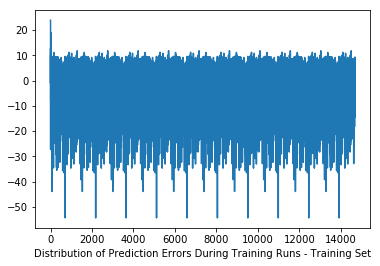

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import plot

plot(errors)
plt.xlabel('Distribution of Prediction Errors During Training Runs - Training Set')

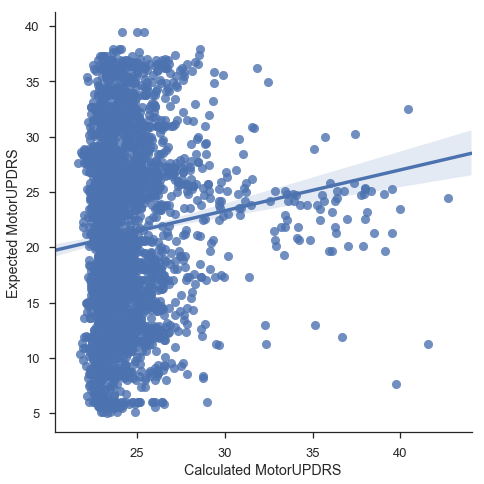

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
table=[results_table, expected_table]
table2=np.transpose(table)
df=pd.DataFrame(table2, columns=['Calculated Results', 'Expected Results'])
sns.set(style="ticks", context="talk")
pal=sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g=sns.lmplot(x="Calculated Results", y="Expected Results", data=df, palette=pal, size=7)
g.set_axis_labels("Calculated MotorUPDRS", "Expected MotorUPDRS")

## Results for the validation test

The *W* vector obtained during training is used  below to validate the results obtained and evaluate performance of the algorithm.

A preview of the data in the validation dataset is shown in the table below.

In [8]:
from random import choice
from numpy import array, dot, random
import pandas as pd

validation= {"JitterRAP": valid_f['Jitter:RAP'], "ShimmerdB": valid_f['Shimmer(dB)'], "ShimmerDDA":valid_f['Shimmer:DDA'], "JitterPPQ5":valid_f['Jitter:PPQ5'],"ShimmerAPQ11":valid_f['Shimmer:APQ11'], "X0": 1,"motorUPDRS": valid_f['motor_UPDRS']}
  
df=pd.DataFrame(validation, columns=["JitterRAP", "ShimmerdB", "ShimmerDDA", "JitterPPQ5","ShimmerAPQ11","X0", "motorUPDRS"])

df.head()


JitterRAP  ShimmerdB  ShimmerDDA  JitterPPQ5  ShimmerAPQ11  X0  motorUPDRS
0    0.02299      1.593     0.25327     0.03993       0.10275   1      25.787
1    0.00199      0.281     0.04365     0.00256       0.03145   1      17.259
2    0.00272      0.217     0.03697     0.00258       0.01845   1      29.797
3    0.00171      0.164     0.03070     0.00200       0.01398   1      25.539
4    0.01494      1.687     0.26567     0.02632       0.11652   1      19.656

#### The *Weights* vector obtained from the algorithm training step is applied below to calculate expected outputs of the Motor UPDRS index on the validation set.


In [12]:
wval= [  0.83836101,   9.53913186,   2.32184481,   0.27543971,   1.74643028,
  21.36608469]

results_val=[]
expected_val=[]
errorsval=[]
for j in range(len(df)):
    x=df.iloc[j, 0:6]
    resultval=dot(wval,x)  
    expectedval = df.loc[j, 'motorUPDRS']
    results_val.append(resultval)
    expected_val.append(expectedval)
    errorval=resultval-expectedval
    errorsval.append(errorval)
    print("x =", df.iloc[j, 0:6], "result=", resultval, "expected=",df.loc[j,'motorUPDRS'])




x = JitterRAP       0.02299
ShimmerdB       1.59300
ShimmerDDA      0.25327
JitterPPQ5      0.03993
ShimmerAPQ11    0.10275
X0              1.00000
Name: 0, dtype: float64 result= 37.3596933165 expected= 25.787
x = JitterRAP       0.00199
ShimmerdB       0.28100
ShimmerDDA      0.04365
JitterPPQ5      0.00256
ShimmerAPQ11    0.03145
X0              1.00000
Name: 1, dtype: float64 result= 24.205227965 expected= 17.259
x = JitterRAP       0.00272
ShimmerdB       0.21700
ShimmerDDA      0.03697
JitterPPQ5      0.00258
ShimmerAPQ11    0.01845
X0              1.00000
Name: 2, dtype: float64 result= 23.5571275213 expected= 29.797
x = JitterRAP       0.00171
ShimmerdB       0.16400
ShimmerDDA      0.03070
JitterPPQ5      0.00200
ShimmerAPQ11    0.01398
X0              1.00000
Name: 3, dtype: float64 result= 23.0281825228 expected= 25.539
x = JitterRAP       0.01494
ShimmerdB       1.68700
ShimmerDDA      0.26567
JitterPPQ5      0.02632
ShimmerAPQ11    0.11652
X0              1.00000
Name: 4, 

Name: 40, dtype: float64 result= 24.3731120561 expected= 13.596
x = JitterRAP       0.00390
ShimmerdB       0.30800
ShimmerDDA      0.05041
JitterPPQ5      0.00389
ShimmerAPQ11    0.02894
X0              1.00000
Name: 41, dtype: float64 result= 24.4760642605 expected= 29.636
x = JitterRAP       0.00300
ShimmerdB       0.29800
ShimmerDDA      0.05114
JitterPPQ5      0.00289
ShimmerAPQ11    0.03213
X0              1.00000
Name: 42, dtype: float64 result= 24.3869090366 expected= 36.709
x = JitterRAP       0.00195
ShimmerdB       0.20000
ShimmerDDA      0.03423
JitterPPQ5      0.00223
ShimmerAPQ11    0.02053
X0              1.00000
Name: 43, dtype: float64 result= 23.391491058 expected= 10.782
x = JitterRAP       0.00111
ShimmerdB       0.16500
ShimmerDDA      0.03101
JitterPPQ5      0.00122
ShimmerAPQ11    0.01342
X0              1.00000
Name: 44, dtype: float64 result= 23.036745566 expected= 15.0
x = JitterRAP       0.00379
ShimmerdB       0.28100
ShimmerDDA      0.05148
JitterPPQ5      

Name: 87, dtype: float64 result= 22.9183487988 expected= 23.339
x = JitterRAP       0.00115
ShimmerdB       0.11200
ShimmerDDA      0.01714
JitterPPQ5      0.00121
ShimmerAPQ11    0.01163
X0              1.00000
Name: 88, dtype: float64 result= 22.4958722597 expected= 15.0
x = JitterRAP       0.00222
ShimmerdB       0.55600
ShimmerDDA      0.10983
JitterPPQ5      0.00226
ShimmerAPQ11    0.03813
X0              1.00000
Name: 89, dtype: float64 result= 26.9939252614 expected= 26.736
x = JitterRAP       0.00118
ShimmerdB       0.12700
ShimmerDDA      0.01710
JitterPPQ5      0.00142
ShimmerAPQ11    0.01040
X0              1.00000
Name: 90, dtype: float64 result= 22.6368012478 expected= 24.587
x = JitterRAP       0.00125
ShimmerdB       0.09700
ShimmerDDA      0.01744
JitterPPQ5      0.00125
ShimmerAPQ11    0.00791
X0              1.00000
Name: 91, dtype: float64 result= 22.3470799683 expected= 15.0
x = JitterRAP       0.00403
ShimmerdB       0.45000
ShimmerDDA      0.07740
JitterPPQ5      

x = JitterRAP       0.01633
ShimmerdB       0.57100
ShimmerDDA      0.10774
JitterPPQ5      0.01234
ShimmerAPQ11    0.04064
X0              1.00000
Name: 132, dtype: float64 result= 27.1511488298 expected= 26.017
x = JitterRAP       0.00085
ShimmerdB       0.25700
ShimmerDDA      0.05030
JitterPPQ5      0.00132
ShimmerAPQ11    0.02593
X0              1.00000
Name: 133, dtype: float64 result= 23.9807914964 expected= 32.496
x = JitterRAP       0.00160
ShimmerdB       0.20200
ShimmerDDA      0.03397
JitterPPQ5      0.00181
ShimmerAPQ11    0.01793
X0              1.00000
Name: 134, dtype: float64 result= 23.4050158123 expected= 18.246
x = JitterRAP       0.00293
ShimmerdB       0.43500
ShimmerDDA      0.08219
JitterPPQ5      0.00306
ShimmerAPQ11    0.03446
X0              1.00000
Name: 135, dtype: float64 result= 25.7699207048 expected= 28.726
x = JitterRAP       0.00232
ShimmerdB       0.27100
ShimmerDDA      0.04432
JitterPPQ5      0.00247
ShimmerAPQ11    0.02187
X0              1.00000


x = JitterRAP       0.00196
ShimmerdB       0.48500
ShimmerDDA      0.08994
JitterPPQ5      0.00291
ShimmerAPQ11    0.04514
X0              1.00000
Name: 177, dtype: float64 result= 26.2826689443 expected= 15.174
x = JitterRAP       0.00510
ShimmerdB       0.46100
ShimmerDDA      0.07882
JitterPPQ5      0.00690
ShimmerAPQ11    0.04974
X0              1.00000
Name: 178, dtype: float64 result= 26.0396759027 expected= 22.856
x = JitterRAP       0.00165
ShimmerdB       0.25500
ShimmerDDA      0.03954
JitterPPQ5      0.00146
ShimmerAPQ11    0.02243
X0              1.00000
Name: 179, dtype: float64 result= 23.9313269269 expected= 31.0
x = JitterRAP       0.00156
ShimmerdB       0.06900
ShimmerDDA      0.01102
JitterPPQ5      0.00177
ShimmerAPQ11    0.00793
X0              1.00000
Name: 180, dtype: float64 result= 22.0655160817 expected= 17.0
x = JitterRAP       0.00292
ShimmerdB       0.63500
ShimmerDDA      0.11190
JitterPPQ5      0.00360
ShimmerAPQ11    0.05075
X0              1.00000
Name

Name: 227, dtype: float64 result= 23.382901055 expected= 31.0
x = JitterRAP       0.00408
ShimmerdB       0.26100
ShimmerDDA      0.04315
JitterPPQ5      0.00444
ShimmerAPQ11    0.02203
X0              1.00000
Name: 228, dtype: float64 result= 23.9991030333 expected= 10.59
x = JitterRAP       0.00333
ShimmerdB       0.34900
ShimmerDDA      0.05793
JitterPPQ5      0.00333
ShimmerAPQ11    0.02974
X0              1.00000
Name: 229, dtype: float64 result= 24.8853939719 expected= 9.7017
x = JitterRAP       0.00401
ShimmerdB       0.30500
ShimmerDDA      0.05804
JitterPPQ5      0.00414
ShimmerAPQ11    0.02813
X0              1.00000
Name: 230, dtype: float64 result= 24.4639090119 expected= 19.64
x = JitterRAP       0.00181
ShimmerdB       0.19100
ShimmerDDA      0.02964
JitterPPQ5      0.00220
ShimmerAPQ11    0.02299
X0              1.00000
Name: 231, dtype: float64 result= 23.2991521884 expected= 18.314
x = JitterRAP       0.00112
ShimmerdB       0.08700
ShimmerDDA      0.00955
JitterPPQ5  

Name: 275, dtype: float64 result= 25.9104710487 expected= 6.0
x = JitterRAP       0.00122
ShimmerdB       0.15400
ShimmerDDA      0.02418
JitterPPQ5      0.00154
ShimmerAPQ11    0.01676
X0              1.00000
Name: 276, dtype: float64 result= 22.921970353 expected= 32.072
x = JitterRAP       0.00299
ShimmerdB       0.21500
ShimmerDDA      0.03554
JitterPPQ5      0.00334
ShimmerAPQ11    0.01824
X0              1.00000
Name: 277, dtype: float64 result= 23.5347979608 expected= 8.2199
x = JitterRAP       0.00341
ShimmerdB       0.52800
ShimmerDDA      0.09918
JitterPPQ5      0.00361
ShimmerAPQ11    0.04805
X0              1.00000
Name: 278, dtype: float64 result= 26.7207960037 expected= 26.491
x = JitterRAP       0.00923
ShimmerdB       0.52300
ShimmerDDA      0.03568
JitterPPQ5      0.00795
ShimmerAPQ11    0.02282
X0              1.00000
Name: 279, dtype: float64 result= 26.4876754324 expected= 21.107
x = JitterRAP       0.00196
ShimmerdB       0.18300
ShimmerDDA      0.02528
JitterPPQ5 

Name: 318, dtype: float64 result= 25.9453346096 expected= 12.0
x = JitterRAP       0.00228
ShimmerdB       0.38100
ShimmerDDA      0.06507
JitterPPQ5      0.00260
ShimmerAPQ11    0.02873
X0              1.00000
Name: 319, dtype: float64 result= 25.2043789187 expected= 24.582
x = JitterRAP       0.00287
ShimmerdB       0.47100
ShimmerDDA      0.08514
JitterPPQ5      0.00299
ShimmerAPQ11    0.04213
X0              1.00000
Name: 320, dtype: float64 result= 26.1335044317 expected= 28.415
x = JitterRAP       0.00157
ShimmerdB       0.32200
ShimmerDDA      0.06129
JitterPPQ5      0.00177
ShimmerAPQ11    0.02823
X0              1.00000
Name: 321, dtype: float64 result= 24.6310964992 expected= 17.983
x = JitterRAP       0.00349
ShimmerdB       0.29600
ShimmerDDA      0.04629
JitterPPQ5      0.00368
ShimmerAPQ11    0.02236
X0              1.00000
Name: 322, dtype: float64 result= 24.3401355959 expected= 14.309
x = JitterRAP       0.00210
ShimmerdB       0.29900
ShimmerDDA      0.05520
JitterPPQ

Name: 364, dtype: float64 result= 23.0779318604 expected= 34.997
x = JitterRAP       0.00157
ShimmerdB       0.11100
ShimmerDDA      0.01901
JitterPPQ5      0.00216
ShimmerAPQ11    0.01410
X0              1.00000
Name: 365, dtype: float64 result= 22.4956024398 expected= 17.945
x = JitterRAP       0.00126
ShimmerdB       0.16400
ShimmerDDA      0.03085
JitterPPQ5      0.00166
ShimmerAPQ11    0.01371
X0              1.00000
Name: 366, dtype: float64 result= 23.0275883514 expected= 23.856
x = JitterRAP       0.00365
ShimmerdB       0.36700
ShimmerDDA      0.05625
JitterPPQ5      0.00442
ShimmerAPQ11    0.02619
X0              1.00000
Name: 367, dtype: float64 result= 25.0475663234 expected= 17.607
x = JitterRAP       0.00484
ShimmerdB       0.43800
ShimmerDDA      0.07690
JitterPPQ5      0.00548
ShimmerAPQ11    0.03961
X0              1.00000
Name: 368, dtype: float64 result= 25.7975174909 expected= 16.792
x = JitterRAP       0.00235
ShimmerdB       0.18700
ShimmerDDA      0.03103
JitterP

Name: 412, dtype: float64 result= 23.6714467399 expected= 20.564
x = JitterRAP       0.00260
ShimmerdB       0.32400
ShimmerDDA      0.04436
JitterPPQ5      0.00402
ShimmerAPQ11    0.03449
X0              1.00000
Name: 413, dtype: float64 result= 24.623281835 expected= 21.01
x = JitterRAP       0.00118
ShimmerdB       0.16200
ShimmerDDA      0.02934
JitterPPQ5      0.00122
ShimmerAPQ11    0.01211
X0              1.00000
Name: 414, dtype: float64 result= 23.0020215512 expected= 27.594
x = JitterRAP       0.00141
ShimmerdB       0.27900
ShimmerDDA      0.05170
JitterPPQ5      0.00187
ShimmerAPQ11    0.02599
X0              1.00000
Name: 415, dtype: float64 result= 24.1946287399 expected= 14.39
x = JitterRAP       0.00200
ShimmerdB       0.25900
ShimmerDDA      0.04449
JitterPPQ5      0.00204
ShimmerAPQ11    0.01831
X0              1.00000
Name: 416, dtype: float64 result= 23.9742344748 expected= 25.539
x = JitterRAP       0.00043
ShimmerdB       0.03000
ShimmerDDA      0.00515
JitterPPQ5

Name: 458, dtype: float64 result= 25.4967027092 expected= 31.0
x = JitterRAP       0.00126
ShimmerdB       0.12600
ShimmerDDA      0.02129
JitterPPQ5      0.00151
ShimmerAPQ11    0.01030
X0              1.00000
Name: 459, dtype: float64 result= 22.6369078611 expected= 10.141
x = JitterRAP       0.00212
ShimmerdB       0.22300
ShimmerDDA      0.03943
JitterPPQ5      0.00235
ShimmerAPQ11    0.02327
X0              1.00000
Name: 460, dtype: float64 result= 23.6279254769 expected= 25.243
x = JitterRAP       0.00251
ShimmerdB       0.19900
ShimmerDDA      0.03599
JitterPPQ5      0.00292
ShimmerAPQ11    0.02130
X0              1.00000
Name: 461, dtype: float64 result= 23.3880426599 expected= 13.596
x = JitterRAP       0.00136
ShimmerdB       0.18600
ShimmerDDA      0.03513
JitterPPQ5      0.00160
ShimmerAPQ11    0.01875
X0              1.00000
Name: 462, dtype: float64 result= 23.2562560664 expected= 17.466
x = JitterRAP       0.01808
ShimmerdB       1.19800
ShimmerDDA      0.20111
JitterPPQ

Name: 505, dtype: float64 result= 24.4739314429 expected= 33.253
x = JitterRAP       0.00513
ShimmerdB       0.40900
ShimmerDDA      0.06728
JitterPPQ5      0.00515
ShimmerAPQ11    0.03587
X0              1.00000
Name: 506, dtype: float64 result= 25.4921671002 expected= 33.806
x = JitterRAP       0.00140
ShimmerdB       0.18100
ShimmerDDA      0.02763
JitterPPQ5      0.00146
ShimmerAPQ11    0.01838
X0              1.00000
Name: 507, dtype: float64 result= 23.1904953647 expected= 11.264
x = JitterRAP       0.00369
ShimmerdB       0.36700
ShimmerDDA      0.04974
JitterPPQ5      0.00360
ShimmerAPQ11    0.04304
X0              1.00000
Name: 508, dtype: float64 result= 25.0616861378 expected= 34.012
x = JitterRAP       0.00155
ShimmerdB       0.18800
ShimmerDDA      0.03132
JitterPPQ5      0.00193
ShimmerAPQ11    0.01736
X0              1.00000
Name: 509, dtype: float64 result= 23.264310747 expected= 19.145
x = JitterRAP       0.00202
ShimmerdB       0.13400
ShimmerDDA      0.02237
JitterPP

Name: 555, dtype: float64 result= 23.9622987238 expected= 12.934
x = JitterRAP       0.00759
ShimmerdB       0.34000
ShimmerDDA      0.06144
JitterPPQ5      0.00625
ShimmerAPQ11    0.02965
X0              1.00000
Name: 556, dtype: float64 result= 24.8119099836 expected= 16.869
x = JitterRAP       0.00345
ShimmerdB       0.30100
ShimmerDDA      0.05115
JitterPPQ5      0.00314
ShimmerAPQ11    0.02257
X0              1.00000
Name: 557, dtype: float64 result= 24.3992998995 expected= 16.672
x = JitterRAP       0.00104
ShimmerdB       0.08300
ShimmerDDA      0.01417
JitterPPQ5      0.00120
ShimmerAPQ11    0.00818
X0              1.00000
Name: 558, dtype: float64 result= 22.2062213981 expected= 15.722
x = JitterRAP       0.00100
ShimmerdB       0.09900
ShimmerDDA      0.01382
JitterPPQ5      0.00126
ShimmerAPQ11    0.01243
X0              1.00000
Name: 559, dtype: float64 result= 22.3654401828 expected= 21.793
x = JitterRAP       0.00151
ShimmerdB       0.24300
ShimmerDDA      0.04673
JitterP

Name: 606, dtype: float64 result= 24.7009004963 expected= 9.7017
x = JitterRAP       0.00255
ShimmerdB       0.28200
ShimmerDDA      0.04941
JitterPPQ5      0.00266
ShimmerAPQ11    0.02407
X0              1.00000
Name: 607, dtype: float64 result= 24.2157492936 expected= 18.854
x = JitterRAP       0.00262
ShimmerdB       0.31700
ShimmerDDA      0.04382
JitterPPQ5      0.00445
ShimmerAPQ11    0.03491
X0              1.00000
Name: 608, dtype: float64 result= 24.5561228228 expected= 20.092
x = JitterRAP       0.00275
ShimmerdB       0.33000
ShimmerDDA      0.05488
JitterPPQ5      0.00256
ShimmerAPQ11    0.03231
X0              1.00000
Name: 609, dtype: float64 result= 24.7008588278 expected= 18.093
x = JitterRAP       0.00126
ShimmerdB       0.19000
ShimmerDDA      0.02450
JitterPPQ5      0.00142
ShimmerAPQ11    0.01697
X0              1.00000
Name: 610, dtype: float64 result= 23.2664893224 expected= 26.799
x = JitterRAP       0.00260
ShimmerdB       0.41800
ShimmerDDA      0.07822
JitterP

Name: 660, dtype: float64 result= 23.5903286179 expected= 21.321
x = JitterRAP       0.00116
ShimmerdB       0.19200
ShimmerDDA      0.02069
JitterPPQ5      0.00162
ShimmerAPQ11    0.01384
X0              1.00000
Name: 661, dtype: float64 result= 23.2712262824 expected= 27.197
x = JitterRAP       0.00151
ShimmerdB       0.15500
ShimmerDDA      0.02967
JitterPPQ5      0.00169
ShimmerAPQ11    0.01290
X0              1.00000
Name: 662, dtype: float64 result= 22.9377996327 expected= 12.664
x = JitterRAP       0.00330
ShimmerdB       0.17200
ShimmerDDA      0.02424
JitterPPQ5      0.00300
ShimmerAPQ11    0.01546
X0              1.00000
Name: 663, dtype: float64 result= 23.0936896107 expected= 17.901
x = JitterRAP       0.00552
ShimmerdB       0.28800
ShimmerDDA      0.04422
JitterPPQ5      0.00457
ShimmerAPQ11    0.01811
X0              1.00000
Name: 664, dtype: float64 result= 24.2535410078 expected= 17.288
x = JitterRAP       0.00125
ShimmerdB       0.06100
ShimmerDDA      0.00871
JitterP

x = JitterRAP       0.00230
ShimmerdB       0.18600
ShimmerDDA      0.03073
JitterPPQ5      0.00208
ShimmerAPQ11    0.01655
X0              1.00000
Name: 714, dtype: float64 result= 23.243118073 expected= 11.559
x = JitterRAP       0.00156
ShimmerdB       0.26900
ShimmerDDA      0.04587
JitterPPQ5      0.00187
ShimmerAPQ11    0.02505
X0              1.00000
Name: 715, dtype: float64 result= 24.0841851757 expected= 32.71
x = JitterRAP       0.00226
ShimmerdB       0.11400
ShimmerDDA      0.01598
JitterPPQ5      0.00202
ShimmerAPQ11    0.01321
X0              1.00000
Name: 716, dtype: float64 result= 22.5161702302 expected= 27.455
x = JitterRAP       0.00526
ShimmerdB       0.32700
ShimmerDDA      0.05855
JitterPPQ5      0.00525
ShimmerAPQ11    0.02878
X0              1.00000
Name: 717, dtype: float64 result= 24.6774429227 expected= 26.498
x = JitterRAP       0.00230
ShimmerdB       0.20000
ShimmerDDA      0.02694
JitterPPQ5      0.00404
ShimmerAPQ11    0.02626
X0              1.00000
Na

Name: 765, dtype: float64 result= 23.2160446971 expected= 16.148
x = JitterRAP       0.01349
ShimmerdB       1.87200
ShimmerDDA      0.43283
JitterPPQ5      0.00960
ShimmerAPQ11    0.11132
X0              1.00000
Name: 766, dtype: float64 result= 40.436669951 expected= 32.471
x = JitterRAP       0.00402
ShimmerdB       0.71300
ShimmerDDA      0.13809
JitterPPQ5      0.00457
ShimmerAPQ11    0.05958
X0              1.00000
Name: 767, dtype: float64 result= 28.5967905428 expected= 31.504
x = JitterRAP       0.00247
ShimmerdB       0.17900
ShimmerDDA      0.02363
JitterPPQ5      0.00364
ShimmerAPQ11    0.01691
X0              1.00000
Name: 768, dtype: float64 result= 23.1610599741 expected= 31.0
x = JitterRAP       0.00291
ShimmerdB       0.50900
ShimmerDDA      0.08019
JitterPPQ5      0.00383
ShimmerAPQ11    0.04019
X0              1.00000
Name: 769, dtype: float64 result= 26.4813751396 expected= 36.562
x = JitterRAP       0.00180
ShimmerdB       0.36000
ShimmerDDA      0.06208
JitterPPQ5

x = JitterRAP       0.00610
ShimmerdB       0.42000
ShimmerDDA      0.06765
JitterPPQ5      0.00600
ShimmerAPQ11    0.03340
X0              1.00000
Name: 816, dtype: float64 result= 25.5946902844 expected= 18.0
x = JitterRAP       0.00799
ShimmerdB       0.46100
ShimmerDDA      0.07068
JitterPPQ5      0.00708
ShimmerAPQ11    0.03604
X0              1.00000
Name: 817, dtype: float64 result= 25.9993224335 expected= 5.5373
x = JitterRAP       0.00271
ShimmerdB       0.17200
ShimmerDDA      0.02170
JitterPPQ5      0.00303
ShimmerAPQ11    0.01343
X0              1.00000
Name: 818, dtype: float64 result= 23.0837605016 expected= 24.587
x = JitterRAP       0.00559
ShimmerdB       0.39500
ShimmerDDA      0.06917
JitterPPQ5      0.00546
ShimmerAPQ11    0.03489
X0              1.00000
Name: 819, dtype: float64 result= 25.3617670715 expected= 19.516
x = JitterRAP       0.00155
ShimmerdB       0.13700
ShimmerDDA      0.02527
JitterPPQ5      0.00174
ShimmerAPQ11    0.01300
X0              1.00000
Na

Name: 866, dtype: float64 result= 32.5484940662 expected= 30.777
x = JitterRAP       0.00186
ShimmerdB       0.18900
ShimmerDDA      0.03415
JitterPPQ5      0.00149
ShimmerAPQ11    0.01708
X0              1.00000
Name: 867, dtype: float64 result= 23.2800703976 expected= 18.322
x = JitterRAP       0.00463
ShimmerdB       0.81600
ShimmerDDA      0.17387
JitterPPQ5      0.00407
ShimmerAPQ11    0.05434
X0              1.00000
Name: 868, dtype: float64 result= 29.6536191174 expected= 23.813
x = JitterRAP       0.00119
ShimmerdB       0.26700
ShimmerDDA      0.04830
JitterPPQ5      0.00147
ShimmerAPQ11    0.02515
X0              1.00000
Name: 869, dtype: float64 result= 24.0705032685 expected= 27.418
x = JitterRAP       0.00323
ShimmerdB       0.22200
ShimmerDDA      0.03423
JitterPPQ5      0.00289
ShimmerAPQ11    0.01749
X0              1.00000
Name: 870, dtype: float64 result= 23.5972977032 expected= 31.445
x = JitterRAP       0.00212
ShimmerdB       0.38100
ShimmerDDA      0.06341
JitterP

x = JitterRAP       0.01409
ShimmerdB       0.76100
ShimmerDDA      0.10818
JitterPPQ5      0.01067
ShimmerAPQ11    0.05332
X0              1.00000
Name: 914, dtype: float64 result= 28.9844123179 expected= 19.198
x = JitterRAP       0.00097
ShimmerdB       0.12900
ShimmerDDA      0.01883
JitterPPQ5      0.00109
ShimmerAPQ11    0.01066
X0              1.00000
Name: 915, dtype: float64 result= 22.660083424 expected= 34.294
x = JitterRAP       0.00118
ShimmerdB       0.12200
ShimmerDDA      0.02268
JitterPPQ5      0.00137
ShimmerAPQ11    0.01073
X0              1.00000
Name: 916, dtype: float64 result= 22.6026240325 expected= 16.801
x = JitterRAP       0.00245
ShimmerdB       0.21900
ShimmerDDA      0.03313
JitterPPQ5      0.00289
ShimmerAPQ11    0.02422
X0              1.00000
Name: 917, dtype: float64 result= 23.5772258325 expected= 31.0
x = JitterRAP       0.00252
ShimmerdB       0.41200
ShimmerDDA      0.07907
JitterPPQ5      0.00279
ShimmerAPQ11    0.03518
X0              1.00000
Nam

Name: 966, dtype: float64 result= 25.8748272489 expected= 14.153
x = JitterRAP       0.00096
ShimmerdB       0.15100
ShimmerDDA      0.02638
JitterPPQ5      0.00105
ShimmerAPQ11    0.01471
X0              1.00000
Name: 967, dtype: float64 result= 22.8945278946 expected= 7.4545
x = JitterRAP       0.00620
ShimmerdB       0.32900
ShimmerDDA      0.07481
JitterPPQ5      0.00419
ShimmerAPQ11    0.02679
X0              1.00000
Name: 968, dtype: float64 result= 24.73129508 expected= 33.084
x = JitterRAP       0.00682
ShimmerdB       0.57900
ShimmerDDA      0.07341
JitterPPQ5      0.00787
ShimmerAPQ11    0.04961
X0              1.00000
Name: 969, dtype: float64 result= 27.1542144032 expected= 10.281
x = JitterRAP       0.00139
ShimmerdB       0.26200
ShimmerDDA      0.04085
JitterPPQ5      0.00156
ShimmerAPQ11    0.02157
X0              1.00000
Name: 970, dtype: float64 result= 23.9994501067 expected= 17.595
x = JitterRAP       0.00250
ShimmerdB       0.27400
ShimmerDDA      0.05122
JitterPPQ

Name: 1020, dtype: float64 result= 24.3282921405 expected= 18.256
x = JitterRAP       0.00312
ShimmerdB       0.40000
ShimmerDDA      0.08350
JitterPPQ5      0.00279
ShimmerAPQ11    0.02816
X0              1.00000
Name: 1021, dtype: float64 result= 25.4281751155 expected= 26.19
x = JitterRAP       0.00099
ShimmerdB       0.16500
ShimmerDDA      0.02751
JitterPPQ5      0.00124
ShimmerAPQ11    0.01574
X0              1.00000
Name: 1022, dtype: float64 result= 23.0325757329 expected= 18.702
x = JitterRAP       0.00228
ShimmerdB       0.11000
ShimmerDDA      0.01491
JitterPPQ5      0.00304
ShimmerAPQ11    0.01474
X0              1.00000
Name: 1023, dtype: float64 result= 22.4784990829 expected= 21.698
x = JitterRAP       0.00158
ShimmerdB       0.17400
ShimmerDDA      0.03174
JitterPPQ5      0.00206
ShimmerAPQ11    0.01580
X0              1.00000
Name: 1024, dtype: float64 result= 23.1290746025 expected= 24.37
x = JitterRAP       0.00231
ShimmerdB       0.38600
ShimmerDDA      0.06608
Jitt

Name: 1070, dtype: float64 result= 37.0878034467 expected= 25.391
x = JitterRAP       0.01385
ShimmerdB       0.25900
ShimmerDDA      0.04068
JitterPPQ5      0.00918
ShimmerAPQ11    0.02609
X0              1.00000
Name: 1071, dtype: float64 result= 23.9908766911 expected= 17.0
x = JitterRAP       0.00281
ShimmerdB       0.34500
ShimmerDDA      0.05490
JitterPPQ5      0.00221
ShimmerAPQ11    0.03361
X0              1.00000
Name: 1072, dtype: float64 result= 24.8462164997 expected= 27.113
x = JitterRAP       0.00275
ShimmerdB       0.15600
ShimmerDDA      0.02965
JitterPPQ5      0.00208
ShimmerAPQ11    0.01097
X0              1.00000
Name: 1073, dtype: float64 result= 22.9450687063 expected= 29.929
x = JitterRAP       0.00155
ShimmerdB       0.19300
ShimmerDDA      0.02688
JitterPPQ5      0.00227
ShimmerAPQ11    0.01466
X0              1.00000
Name: 1074, dtype: float64 result= 23.2970757031 expected= 32.777
x = JitterRAP       0.00947
ShimmerdB       0.54900
ShimmerDDA      0.07682
Jitt

x = JitterRAP       0.00202
ShimmerdB       0.21700
ShimmerDDA      0.03997
JitterPPQ5      0.00280
ShimmerAPQ11    0.02316
X0              1.00000
Name: 1123, dtype: float64 result= 23.5717924864 expected= 24.985
x = JitterRAP       0.00165
ShimmerdB       0.25400
ShimmerDDA      0.04292
JitterPPQ5      0.00202
ShimmerAPQ11    0.02055
X0              1.00000
Name: 1124, dtype: float64 result= 23.9265065878 expected= 6.0
x = JitterRAP       0.00245
ShimmerdB       0.26300
ShimmerDDA      0.04897
JitterPPQ5      0.00283
ShimmerAPQ11    0.02453
X0              1.00000
Name: 1125, dtype: float64 result= 24.0342505231 expected= 18.309
x = JitterRAP       0.00269
ShimmerdB       0.23200
ShimmerDDA      0.03668
JitterPPQ5      0.00312
ShimmerAPQ11    0.01919
X0              1.00000
Name: 1126, dtype: float64 result= 23.7009571092 expected= 36.312
x = JitterRAP       0.00172
ShimmerdB       0.19300
ShimmerDDA      0.03040
JitterPPQ5      0.00175
ShimmerAPQ11    0.01973
X0              1.00000

Name: 1176, dtype: float64 result= 24.2803097475 expected= 23.68
x = JitterRAP       0.00105
ShimmerdB       0.13000
ShimmerDDA      0.01880
JitterPPQ5      0.00101
ShimmerAPQ11    0.01181
X0              1.00000
Name: 1177, dtype: float64 result= 22.671606329 expected= 18.55
x = JitterRAP       0.00241
ShimmerdB       0.26200
ShimmerDDA      0.04009
JitterPPQ5      0.00325
ShimmerAPQ11    0.02370
X0              1.00000
Name: 1178, dtype: float64 result= 24.0027260225 expected= 35.899
x = JitterRAP       0.00232
ShimmerdB       0.35400
ShimmerDDA      0.05740
JitterPPQ5      0.00266
ShimmerAPQ11    0.03446
X0              1.00000
Name: 1179, dtype: float64 result= 24.9390709152 expected= 12.663
x = JitterRAP       0.00155
ShimmerdB       0.26900
ShimmerDDA      0.04549
JitterPPQ5      0.00159
ShimmerAPQ11    0.01852
X0              1.00000
Name: 1180, dtype: float64 result= 24.0718131782 expected= 23.813
x = JitterRAP       0.00294
ShimmerdB       0.52300
ShimmerDDA      0.07395
Jitte

Name: 1224, dtype: float64 result= 22.9494393937 expected= 7.924
x = JitterRAP       0.00281
ShimmerdB       0.26400
ShimmerDDA      0.04822
JitterPPQ5      0.00324
ShimmerAPQ11    0.02456
X0              1.00000
Name: 1225, dtype: float64 result= 24.0425154046 expected= 8.8604
x = JitterRAP       0.00231
ShimmerdB       0.34000
ShimmerDDA      0.06338
JitterPPQ5      0.00240
ShimmerAPQ11    0.02832
X0              1.00000
Name: 1226, dtype: float64 result= 24.8086046212 expected= 27.113
x = JitterRAP       0.00417
ShimmerdB       0.22500
ShimmerDDA      0.01652
JitterPPQ5      0.00423
ShimmerAPQ11    0.01069
X0              1.00000
Name: 1227, dtype: float64 result= 23.5740766498 expected= 29.682
x = JitterRAP       0.00348
ShimmerdB       0.15700
ShimmerDDA      0.02382
JitterPPQ5      0.00304
ShimmerAPQ11    0.01155
X0              1.00000
Name: 1228, dtype: float64 result= 22.9429608382 expected= 15.721
x = JitterRAP       0.00087
ShimmerdB       0.24400
ShimmerDDA      0.03190
Jit

Name: 1274, dtype: float64 result= 23.6082829287 expected= 15.0
x = JitterRAP       0.00186
ShimmerdB       0.27200
ShimmerDDA      0.04287
JitterPPQ5      0.00242
ShimmerAPQ11    0.02555
X0              1.00000
Name: 1275, dtype: float64 result= 24.1071132522 expected= 27.482
x = JitterRAP       0.00195
ShimmerdB       0.21000
ShimmerDDA      0.03251
JitterPPQ5      0.00202
ShimmerAPQ11    0.01933
X0              1.00000
Name: 1276, dtype: float64 result= 23.4807352449 expected= 8.6515
x = JitterRAP       0.00314
ShimmerdB       0.20000
ShimmerDDA      0.03257
JitterPPQ5      0.00267
ShimmerAPQ11    0.02019
X0              1.00000
Name: 1277, dtype: float64 result= 23.3881618524 expected= 35.832
x = JitterRAP       0.00300
ShimmerdB       0.20000
ShimmerDDA      0.02953
JitterPPQ5      0.00274
ShimmerAPQ11    0.01820
X0              1.00000
Name: 1278, dtype: float64 result= 23.3775299582 expected= 19.725
x = JitterRAP       0.00258
ShimmerdB       0.14200
ShimmerDDA      0.02364
Jitt

Name: 1321, dtype: float64 result= 27.0931518122 expected= 26.352
x = JitterRAP       0.00149
ShimmerdB       0.24200
ShimmerDDA      0.03779
JitterPPQ5      0.00195
ShimmerAPQ11    0.02667
X0              1.00000
Name: 1322, dtype: float64 result= 23.8106606764 expected= 20.028
x = JitterRAP       0.00425
ShimmerdB       0.44600
ShimmerDDA      0.07569
JitterPPQ5      0.00383
ShimmerAPQ11    0.03701
X0              1.00000
Name: 1323, dtype: float64 result= 25.8655312863 expected= 34.925
x = JitterRAP       0.00329
ShimmerdB       0.14000
ShimmerDDA      0.02445
JitterPPQ5      0.00330
ShimmerAPQ11    0.01422
X0              1.00000
Name: 1324, dtype: float64 result= 22.7868336534 expected= 32.61
x = JitterRAP       0.00314
ShimmerdB       0.30800
ShimmerDDA      0.03939
JitterPPQ5      0.00333
ShimmerAPQ11    0.03409
X0              1.00000
Name: 1325, dtype: float64 result= 24.458680246 expected= 31.776
x = JitterRAP       0.00301
ShimmerdB       0.56800
ShimmerDDA      0.09579
Jitt

Name: 1370, dtype: float64 result= 22.7333871304 expected= 20.352
x = JitterRAP       0.00264
ShimmerdB       0.24300
ShimmerDDA      0.04269
JitterPPQ5      0.00355
ShimmerAPQ11    0.01842
X0              1.00000
Name: 1371, dtype: float64 result= 23.8185736167 expected= 10.168
x = JitterRAP       0.00246
ShimmerdB       0.35200
ShimmerDDA      0.06530
JitterPPQ5      0.00250
ShimmerAPQ11    0.02819
X0              1.00000
Name: 1372, dtype: float64 result= 24.9274584078 expected= 26.736
x = JitterRAP       0.00261
ShimmerdB       0.36600
ShimmerDDA      0.06760
JitterPPQ5      0.00268
ShimmerAPQ11    0.03203
X0              1.00000
Name: 1373, dtype: float64 result= 25.0732281224 expected= 26.796
x = JitterRAP       0.00437
ShimmerdB       0.43500
ShimmerDDA      0.08817
JitterPPQ5      0.00362
ShimmerAPQ11    0.03468
X0              1.00000
Name: 1374, dtype: float64 result= 25.7855510375 expected= 15.174
x = JitterRAP       0.00429
ShimmerdB       0.47600
ShimmerDDA      0.07655
Ji

x = JitterRAP       0.00246
ShimmerdB       0.28500
ShimmerDDA      0.05667
JitterPPQ5      0.00232
ShimmerAPQ11    0.02292
X0              1.00000
Name: 1421, dtype: float64 result= 24.2590457857 expected= 20.719
x = JitterRAP       0.00147
ShimmerdB       0.13700
ShimmerDDA      0.01971
JitterPPQ5      0.00178
ShimmerAPQ11    0.01349
X0              1.00000
Name: 1422, dtype: float64 result= 22.7439913339 expected= 12.0
x = JitterRAP       0.00262
ShimmerdB       0.42800
ShimmerDDA      0.08679
JitterPPQ5      0.00288
ShimmerAPQ11    0.03329
X0              1.00000
Name: 1423, dtype: float64 result= 25.7114744734 expected= 20.576
x = JitterRAP       0.00298
ShimmerdB       0.21300
ShimmerDDA      0.03772
JitterPPQ5      0.00350
ShimmerAPQ11    0.01749
X0              1.00000
Name: 1424, dtype: float64 result= 23.5195071828 expected= 18.0
x = JitterRAP       0.00410
ShimmerdB       0.29300
ShimmerDDA      0.06040
JitterPPQ5      0.00345
ShimmerAPQ11    0.02269
X0              1.00000


### Comparison of basic statistics of errors obtained during algorithm training and those obtained during validation.

Basic Statistics of Error data
Mean(training)                            -7.431
Mean(valid.)                               3.055
Median(training)                          -7.944
Median(valid.)                             3.477
Stdev(training)                            9.071
Stdev(valid.)                              8.145

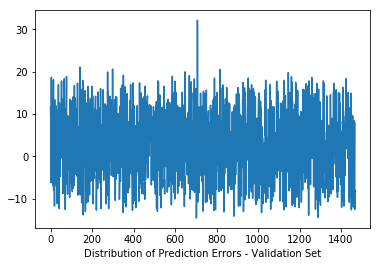

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import plot, ylim
from numpy import mean
from numpy import std
from numpy import median
import matplotlib.pyplot as plt

#ylim([-1, 1])
plot(errorsval)
plt.xlabel('Distribution of Prediction Errors - Validation Set')

data = [mean(errors),mean(errorsval), median(errors), median(errorsval), std(errors), std(errorsval)]
df = pd.DataFrame(data, index=["Mean(training)", "Mean(valid.)", "Median(training)", "Median(valid.)", "Stdev(training)",
                              "Stdev(valid.)"], columns=["Basic Statistics of Error data"])
df.round(3)


## Multiple Linear Regression Model

In [77]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

training2= {"JitterRAP": train_f['Jitter:RAP'], "ShimmerdB": train_f['Shimmer(dB)'], "ShimmerDDA":train_f['Shimmer:DDA'], "JitterPPQ5":train_f['Jitter:PPQ5'],"ShimmerAPQ11":train_f['Shimmer:APQ11'], "motorUPDRS": train_f['motor_UPDRS']}
  
df=pd.DataFrame(training2, columns=["JitterRAP", "ShimmerdB", "ShimmerDDA", "JitterPPQ5","ShimmerAPQ11", "motorUPDRS"])

X=df.drop('motorUPDRS', axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
lm.fit(X, df.motorUPDRS)

print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 19.3440367414
Number of coefficients: 5


## The Linear Multiple Regression Model Calculations

The results indicate that this set of 5 variables alone is not a good choice to predict the results of the Motor UPDRS Index.

The coefficients show that the variables' have opposite effects on the predicted value, and nullify each others' effect.
We must remember as well that given the previous analysis, the Jitter and Shimmer groups of variables are 

In [79]:
tabla = zip(X.columns, lm.coef_)
dict2=dict(tabla)
df2=pd.DataFrame(data=dict2, index = ['Estimated Coefficients']).T
df2

Estimated Coefficients
JitterPPQ5               -342.888870
JitterRAP                 338.228343
ShimmerAPQ11              101.185648
ShimmerDDA                -66.848902
ShimmerdB                   8.051702

Mean Square Error of the Model = 65


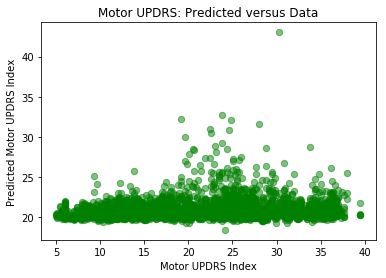

In [89]:
plt.scatter(df.motorUPDRS, lm.predict(X), c='g', s=40, alpha=0.5)
plt.ylabel("Predicted Motor UPDRS Index")
plt.xlabel("Motor UPDRS Index")
plt.title("Motor UPDRS: Predicted versus Data")

# Note: The Mean Square Error should be calculated with the validation dataset.

MeanSquarError=np.mean((df.motorUPDRS - lm.predict(X))**2)
print("Mean Square Error of the Model =", round(MeanSquarError))


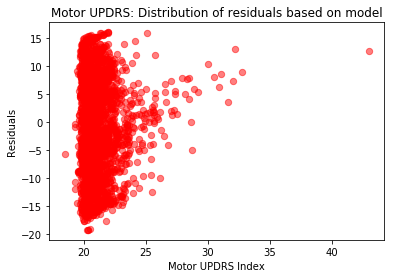

In [92]:

plt.scatter(lm.predict(X), lm.predict(X) - df.motorUPDRS, c='r', s=40, alpha=0.5)
plt.xlabel("Motor UPDRS Index")
plt.ylabel("Residuals")
plt.title("Motor UPDRS: Distribution of residuals based on model")
